In [66]:


import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(5, 8, 5,dilation=4,padding="same")
        torch.nn.init.xavier_uniform_(self.conv1.weight)
        self.pool = nn.MaxPool2d(3, 2)
        self.pool2 = nn.AvgPool2d(3, 2)
        
        self.conv2 = nn.Conv2d(8, 16, 5,dilation=3,padding="same")
        torch.nn.init.xavier_uniform_(self.conv2.weight)
        
        self.conv3 = nn.Conv2d(16, 24, 3,dilation=2)
        self.conv4 = nn.Conv2d(24, 48, 2)
        self.conv5 = nn.Conv2d(48, 64, 2)
        self.conv6 = nn.Conv2d(64, 128, 1)
        
        self.fc1 = nn.Linear(1152, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 16)
        self.fc6 = nn.Linear(16, 8)
        
        self.batch1=nn.BatchNorm2d(8)
        self.batch2=nn.BatchNorm2d(16)
        self.batch3=nn.BatchNorm2d(24)
        self.batch4=nn.BatchNorm2d(64)
        
        self.dropout1=nn.Dropout2d(p=0.2)
        

    def forward(self, x):
        x = self.dropout1(self.batch1(F.relu(self.conv1(x))))
        x = self.pool(self.batch2(F.relu(self.conv2(x))))
        x = self.pool2(self.batch3(F.relu(self.conv3(x))))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        x = self.fc6(x)
        return x


net = Net().to(device)



In [67]:
df = pd.read_parquet("data/F_BTCUSDT_1m.parquet")
tc = ["Open",
"High",
"Low",
"Close",
"Volume"]
for i in tc:
    df[i]=df[i].astype("float")

In [68]:
df

OpenTime      Open      High       Low     Close    Volume  \
0       2019-10-01 00:00:00   8209.67   8216.04   8209.22   8211.91     3.282   
1       2019-10-01 00:01:00   8215.93   8216.90   8210.87   8215.00     2.821   
2       2019-10-01 00:02:00   8215.00   8215.00   8213.00   8214.58     1.241   
3       2019-10-01 00:03:00   8214.31   8215.00   8213.04   8214.72     0.548   
4       2019-10-01 00:04:00   8214.72   8215.00   8214.72   8215.00     1.055   
...                     ...       ...       ...       ...       ...       ...   
1583995 2022-10-04 23:55:00  20357.50  20375.00  20355.20  20355.30   954.064   
1583996 2022-10-04 23:56:00  20355.20  20370.70  20353.30  20353.30   371.426   
1583997 2022-10-04 23:57:00  20353.40  20355.30  20323.50  20330.00  1098.885   
1583998 2022-10-04 23:58:00  20329.90  20360.40  20329.90  20344.00   595.273   
1583999 2022-10-04 23:59:00  20344.10  20344.10  20322.70  20322.70   337.727   

             CloseTime      QuoteAsset  NumberOfTrades  \
0        1569877259999     26949.57673              33   
1        1569877319999     23173.71997              18   
2        1569877379999     10192.89112              27   
3        1569877439999      4501.69900              23   
4        1569877499999      8666.78673              17   
...                ...             ...             ...   
1583995  1664916959999  19430279.00560            5093   
1583996  1664917019999   7562153.35400            3115   
1583997  1664917079999  22345525.97800            6736   
1583998  1664917139999  12111296.57470            3793   
1583999  1664917199999   6866758.18540            2858   

        TakerBuybaseassetvolume TakerBuyquoteassetvolume Ignore  
0                         1.650              13550.96373      0  
1                         2.711              22270.40007      0  
2                         0.400               3285.73147      0  
3                         0.361               2965.55218      0  
4                         0.948               7787.78280      0  
...                         ...                      ...    ...  
1583995                 509.076           10367821.83960      0  
1583996                 163.501            3328771.53970      0  
1583997                 442.725            9001848.01150      0  
1583998                 384.144            7815856.88280      0  
1583999                 101.121            2056048.84150      0  

[1584000 rows x 12 columns]

In [69]:
from comet_ml.integration.pytorch import load_model
model = Net()

# Load the model state dict from a Comet Experiment
checkpoint = load_model("experiment://c9d790db2d0544c7a0fcd25ae43ecb90/4_layer_w_volume_classic_CNN_mse_target3")
model.load_state_dict(checkpoint['model_state_dict'])
#optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
model.to(device)


Net(
  (conv1): Conv2d(5, 8, kernel_size=(5, 5), stride=(1, 1), padding=same, dilation=(4, 4))
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool2): AvgPool2d(kernel_size=3, stride=2, padding=0)
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=same, dilation=(3, 3))
  (conv3): Conv2d(16, 24, kernel_size=(3, 3), stride=(1, 1), dilation=(2, 2))
  (conv4): Conv2d(24, 48, kernel_size=(2, 2), stride=(1, 1))
  (conv5): Conv2d(48, 64, kernel_size=(2, 2), stride=(1, 1))
  (conv6): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
  (fc1): Linear(in_features=1152, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=16, bias=True)
  (fc6): Linear(in_features=16, out_features=8, bias=True)
  (batch1): BatchNorm2d(8, eps=1e-05, momen

In [70]:
import os
import pandas as pd
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
class HilbertImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.img_labels = pd.read_parquet(os.path.join(self.img_dir, annotations_file))
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, -1])
        image = np.load(img_path)
        label = self.img_labels.iloc[idx, :-1].values.astype("float64")
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
train_ds = HilbertImageDataset(annotations_file="target_line_3.parquet",img_dir="imgs/train_4layer_w_volume/")
test_ds = HilbertImageDataset(annotations_file="target_line_3.parquet",img_dir="imgs/test_4layer_w_volume/")
trainloader = DataLoader(train_ds, batch_size=64, shuffle=True)
testloader = DataLoader(test_ds, batch_size=64, shuffle=True)

In [45]:
dataiter = iter(testloader)
cols = list(pd.concat([pd.read_parquet("imgs/train_4layer_w_volume/target_line_3.parquet"),
pd.read_parquet("imgs/test_4layer_w_volume/target_line_3.parquet")]).iloc[:,:-1].columns)
fcs = [[i+"_target",i+"_pred"] for i in cols]
fullcols = [item for sublist in fcs for item in sublist]
tl = []
for images, labels in dataiter:
    images = images.float().to(device)
    labels = labels.float().to(device)
    outputs = model(images)
    evaldf = pd.DataFrame(labels.cpu(),columns=[i+"_target" for i in cols]).join(pd.DataFrame(outputs.cpu().tolist(),columns=[i+"_pred" for i in cols]))
    tl.append(evaldf[fullcols])
tf = pd.concat(tl)

In [17]:
ohlc_mean,ohlc_std,vol_mean,vol_std = 28001.938870730588, 17834.47169281324, 248.00923831004107, 426.5438396373735

In [19]:
output

[-0.0019143521785736084,
 0.0038129761815071106,
 -0.0019336976110935211,
 0.0026785344816744328,
 -0.002102701924741268,
 0.003281146287918091,
 -0.00102111732121557,
 0.0018742382526397705]

In [106]:
data = np.array(range(32*32))
locs = decode(data, 2, 5)

position_history = []
output_history=[]
verbose = 1
open_position=False
profit_margin=1.0
current_position={}
margin=2
for i in tqdm(range(1424680,len(df))):
    if verbose>0:
        print(profit_margin)
    current_ts = df.iloc[i]
    if not open_position:
        pos_dict_open = {}
        temp_f = df.iloc[i-32*32:i]
        lv = temp_f.Close.iloc[-1]
        o1 = np.zeros((5,32,32))
        vals = temp_f[["Open","High","Low","Close","Volume"]].values
        for j in range(len(data)):
            o1[:,locs[j][0],locs[j][1]] = vals[j]
        ohlc = o1[:4,:,:]
        vol = o1[-1:,:,:]
        ohlc = (ohlc-ohlc_mean)/ohlc_std
        vol = (vol-vol_mean)/vol_std
        on1 = torch.Tensor(np.concatenate((ohlc,vol),axis=0).reshape((1,*o1.shape)))
        output=model(on1.to(device)).tolist()[0]
        output_history.append(output)
        short = min(output[::2])
        long = max(output[1::2])
        short_index = output.index(short)//2
        long_index = output.index(long)//2
        low_slope = ((-((output[2]/output[0])-1)) + (-((output[4]/output[2])-1)) + (-((output[6]/output[4])-1)))/3
        high_slope = ((((output[3]/output[1])-1)) + (((output[5]/output[3])-1)) + (((output[7]/output[5])-1)))/3

        print(low_slope,high_slope)

        
        if abs(low_slope)<abs(high_slope):
            print(i)
            open_position=True
            if long_index==0:
                stop_loss=output[0]/5
            else:
                stop_loss = min(output[::2][:long_index])/5
            pos_dict_open["status"]="Opened"
            pos_dict_open["time"]=current_ts["OpenTime"]
            pos_dict_open["price"]=current_ts["Close"]
            pos_dict_open["type"]="long"
            current_position["type"]="long"
            pos_dict_open["take_profit"]=lv*(1+long)
            current_position["take_profit"]=lv*(1+long)
            pos_dict_open["stop_loss"]=lv*(1+(stop_loss))
            current_position["stop_loss"]=lv*(1+(stop_loss))
            pos_dict_open["take_profit_ratio"]=(1+long*margin)
            current_position["take_profit_ratio"]=(1+long*margin)
            pos_dict_open["stop_loss_ratio"]=(1+(stop_loss)*margin)
            current_position["stop_loss_ratio"]=(1+(stop_loss)*margin)
            pos_dict_open["result"]=None
            if verbose==2:
                print("\nOpened Position",pos_dict_open)
        
        elif abs(high_slope)<abs(low_slope):
            print(i)
            open_position=True
            if short_index == 0:
                stop_loss = output[1]/5
            else:
                stop_loss = max(output[1::2][:short_index])/5
            pos_dict_open["status"]="Opened"
            pos_dict_open["time"]=current_ts["OpenTime"]
            pos_dict_open["price"]=current_ts["Close"]
            pos_dict_open["type"]="short"
            current_position["type"]="short"
            pos_dict_open["take_profit"]=lv*(1+short)
            current_position["take_profit"]=lv*(1+short)
            pos_dict_open["stop_loss"]=lv*(1+(stop_loss))
            current_position["stop_loss"]=lv*(1+(stop_loss))
            pos_dict_open["take_profit_ratio"]=(1-short*margin)
            current_position["take_profit_ratio"]=(1-short*margin)
            pos_dict_open["stop_loss_ratio"]=(1-(stop_loss)*margin)
            current_position["stop_loss_ratio"]=(1-(stop_loss)*margin)
            pos_dict_open["result"]=None
            if verbose==2:
                print("\nOpened Position",pos_dict_open)

        position_history.append(pos_dict_open)
        
        #print(current_position)
        continue #skip current candle
    elif open_position:
        pos_dict_closed={}
        current = df.iloc[i]
        if current_position["type"]=="long":
            if current.Low<current_position["stop_loss"]:
                pos_dict_closed["status"]="Closed"
                pos_dict_closed["time"]=current_ts["OpenTime"]
                pos_dict_closed["price"]=current_ts["Low"]
                pos_dict_closed["result"] = "loss"
                profit_margin*=current_position["stop_loss_ratio"]*0.99985

                open_position=False
            elif current.High>current_position["take_profit"]:
                pos_dict_closed["status"]="Closed"
                pos_dict_closed["time"]=current_ts["OpenTime"]
                pos_dict_closed["price"]=current_ts["High"]
                pos_dict_closed["result"] = "profit"
                profit_margin*=current_position["take_profit_ratio"]*0.99985
                open_position=False
        elif current_position["type"]=="short":
            if current.High>current_position["stop_loss"]:
                pos_dict_closed["status"]="Closed"
                pos_dict_closed["time"]=current_ts["OpenTime"]
                pos_dict_closed["price"]=current_ts["High"]
                pos_dict_closed["result"] = "loss"
                profit_margin*=current_position["stop_loss_ratio"]*0.99985
                open_position=False
            elif current.Low<current_position["take_profit"]:
                pos_dict_closed["status"]="Closed"
                pos_dict_closed["time"]=current_ts["OpenTime"]
                pos_dict_closed["price"]=current_ts["Low"]
                pos_dict_closed["result"] = "profit"
                profit_margin*=current_position["take_profit_ratio"]*0.99985

                open_position=False
        else:
            print("Error")
            break
        
        if not open_position:
            pos_dict_closed["type"] = current_position["type"]
            pos_dict_closed["take_profit"] = current_position["take_profit"]
            pos_dict_closed["stop_loss"] = current_position["stop_loss"]
            pos_dict_closed["take_profit_ratio"] = current_position["take_profit_ratio"]
            pos_dict_closed["stop_loss_ratio"] = current_position["stop_loss_ratio"]
            position_history.append(pos_dict_closed)
            if verbose==2:
                print("\nClosed Position", pos_dict_closed)
        
                
        

    if i>=1424681+1440*90:
        break


  0%|                                      | 75/159320 [00:00<03:32, 749.49it/s]

1.0
0.18563919428433806 0.07931790679632673
1424680
1.0
1.0
1.0
1.0042854782524053
0.2622937599812211 0.18149356372360673
1424684
1.0042854782524053
1.0035864025925962
-0.009110115609997601 0.19308082118444814
1424686
1.0035864025925962
1.0030879804178685
8.862048064333786 0.20703754169605063
1424688
1.0030879804178685
1.0045543759621296
0.3207581811423121 0.15591258762157803
1424690
1.0045543759621296
1.006577254849499
0.3230928316264841 0.16334539163029058
1424692
1.006577254849499
1.0058153226073798
0.31187350289128357 0.1722711681808212
1424694
1.0058153226073798
1.005085712540011
0.3179926874085558 0.15276452296226997
1424696
1.005085712540011
1.004282387174645
0.2949936742474201 0.13647304244216094
1424698
1.004282387174645
1.0034009580254315
0.21482734890338848 0.18539767567001775
1424700
1.0034009580254315
1.0027140496269056
0.3187730868579301 0.15356707214107834
1424702
1.0027140496269056
1.0019160480483547
0.31601987458044656 0.15091677345618634
1424704
1.0019160480483547
1.0

  0%|                                    | 452/159320 [00:00<02:08, 1233.84it/s]

0.18608588392422365 0.07954395184251939
1424853
1.0240366235826397
1.0225723630870949
0.1835548159950552 0.07826399974077809
1424855
1.0225723630870949
1.0210867784425146
0.24298758981186372 0.10848231761346878
1424857
1.0210867784425146
1.0199935168108767
0.17280019585120876 0.051221050028131564
1424859
1.0199935168108767
1.0199935168108767
1.0199935168108767
1.0199935168108767
1.0199935168108767
1.0199935168108767
1.0277915133461042
0.21398887804599742 0.09368500652941998
1424866
1.0277915133461042
1.0277915133461042
1.026533941686911
0.17158523502814582 0.07222021832613346
1424869
1.026533941686911
1.0249183909454351
0.21609036680837732 0.09475288380220863
1424871
1.0249183909454351
1.0236774503040864
0.19642621828699855 0.08477764330752909
1424873
1.0236774503040864
1.0223011729994986
0.20258948250297548 0.08790077983743094
1424875
1.0223011729994986
1.0223011729994986
1.020973277307141
0.1891279515736682 0.08108294539617707
1424878
1.020973277307141
1.0252397300268916
0.2622421542

  0%|▏                                   | 734/159320 [00:00<01:59, 1322.97it/s]

1.075445686077755
0.1731623348579019 0.05062215636454803
1425132
1.075445686077755
1.075445686077755
1.075445686077755
1.075445686077755
1.075445686077755
1.075445686077755
1.0838022995904242
0.16707517371988315 0.069946867325872
1425139
1.0838022995904242
1.082040343545116
0.17740168942651105 0.042956468831580295
1425141
1.082040343545116
1.079161473298828
0.18059786385006305 0.07676960563622866
1425143
1.079161473298828
1.0775636149801442
0.19259194681062272 0.08283625693341645
1425145
1.0775636149801442
1.0760822831544097
0.19631135259802043 0.08471954877770911
1425147
1.0760822831544097
1.0746346009483845
0.16730683597494167 0.07006340237238977
1425149
1.0746346009483845
1.0728905180100208
0.1677118010270228 0.058910434056118476
1425151
1.0728905180100208
1.0796335148068266
0.162249680193521 0.06595887429349634
1425153
1.0796335148068266
1.085397762520355
0.18153360535291818 0.033978963912078476
1425155
1.085397762520355
1.0816726981681057
0.1809591779605043 0.035341068685179056
14

  1%|▏                                   | 867/159320 [00:00<02:12, 1193.27it/s]

1.1146499749901997
1.1127885672647864
0.16569949706690212 0.06925394596081136
1425415
1.1127885672647864
1.1127885672647864
1.1127885672647864
1.118370934962048
0.1718196322799589 0.05280555643417665
1425419
1.118370934962048
1.1159667684309533
0.16639306394946562 0.06960310849837097
1425421
1.1159667684309533
1.1141433696769305
0.1652051516531403 0.06227732113248744
1425423
1.1141433696769305
1.1121107574626774
0.18668390999190257 0.07984653718394612
1425425
1.1121107574626774
1.1121107574626774
1.1168405360251443
0.17926218053754786 0.07609496318532046
1425428
1.1168405360251443
1.1151723757324032
0.1822592935543458 0.07760947775699556
1425430
1.1151723757324032
1.1200725305658625
0.19065363087049292 0.08185519075451024
1425432
1.1200725305658625
1.1185149384610718
0.20042956068870976 0.08680569507758917
1425434
1.1185149384610718
1.1170446898802153
0.1777559725180455 0.07533435159285314
1425436
1.1170446898802153
1.115359496594264
0.18718857903054475 0.0801016530053698
1425438
1.115

  1%|▏                                  | 1105/159320 [00:00<02:19, 1133.32it/s]

0.2021610847131972 0.08768371293942252
1425617
1.139213081485698
1.1435682132600855
0.25892140683931236 0.11672846570862172
1425619
1.1435682132600855
1.142420546222599
0.2453466669870686 0.10969546954052485
1425621
1.142420546222599
1.141209429647039
0.2380480882034474 0.10594830438802101
1425623
1.141209429647039
1.1399614376423972
0.18096481954795574 0.07695537563144957
1425625
1.1399614376423972
1.1399614376423972
1.1450195976522177
0.24565120870677118 0.10985262331990105
1425628
1.1450195976522177
1.1450195976522177
1.1450195976522177
1.1450195976522177
1.1438072685632377
0.26295247100146424 0.11883967881366901
1425633
1.1438072685632377
1.1426771816970167
0.22967789228848046 0.10166992132124257
1425635
1.1426771816970167
1.1426771816970167
1.1426771816970167
1.1463765915119848
0.21364539561675655 0.0935102910899313
1425639
1.1463765915119848
1.1463765915119848
1.1504524350278702
0.19452082079790176 0.08381236938083214
1425642
1.1504524350278702
1.1488886387328947
0.23146750259066

  1%|▎                                  | 1348/159320 [00:01<02:16, 1161.14it/s]

0.17669236787518616 0.07479723658495696
1425829
1.2345702546574433
1.2326944422254893
0.1850016765679425 0.07899578443646742
1425831
1.2326944422254893
1.2326944422254893
1.2326944422254893
1.2326944422254893
1.2326944422254893
1.2380018753964037
0.20482840490074292 0.08903594285089478
1425837
1.2380018753964037
1.2364131819055928
0.1973825711218905 0.08526175057446639
1425839
1.2364131819055928
1.2347599274920162
0.2033808099756227 0.08830183334670409
1425841
1.2347599274920162
1.233162957973686
0.22153782682778336 0.0975228255058922
1425843
1.233162957973686
1.233162957973686
1.233162957973686
1.231709033002372
0.2264843761976583 0.10004147226774607
1425847
1.231709033002372
1.230290319495682
0.19933610945574934 0.0862518960472114
1425849
1.230290319495682
1.228663266002831
0.16155538443064069 0.06678291675617143
1425851
1.228663266002831
1.2265689363260752
0.19075774292029016 0.08190746907469666
1425853
1.2265689363260752
1.2248643004190873
0.2099589048867554 0.09163900292642117
142

  1%|▎                                  | 1606/159320 [00:01<02:18, 1140.13it/s]

0.2543834823824445 0.11436607189436072
1426084
1.223919908215969
1.2273961362786598
0.24659109189389095 0.11033656525483522
1426086
1.2273961362786598
1.2261016538766925
0.22427291058730356 0.09891490537765117
1426088
1.2261016538766925
1.2261016538766925
1.2246747139970473
0.2399421142663265 0.10691906573765686
1426091
1.2246747139970473
1.2233463518139034
0.2768848222952078 0.12626607889179775
1426093
1.2233463518139034
1.2221993693083668
0.23435821827287173 0.10406013490320505
1426095
1.2221993693083668
1.2208410072067555
0.16603706897663909 0.06942388112430035
1426097
1.2208410072067555
1.2208410072067555
1.2208410072067555
1.2208410072067555
1.218840985804681
0.2302507005836292 0.10196232295448153
1426102
1.218840985804681
1.2174611682113738
0.17359386756599995 0.07323330234592733
1426104
1.2174611682113738
1.2155718220680398
0.16367133691661143 0.06823311142941209
1426106
1.2155718220680398
1.2135447388615177
0.20904958590453848 0.09117747889422927
1426108
1.2135447388615177
1.21

  1%|▍                                  | 1722/159320 [00:01<02:26, 1076.09it/s]

0.18416748294476834 0.07857400256164349
1426303
1.2507060390718776
1.2488960567198624
0.1643303520523192 0.0685646523992347
1426305
1.2488960567198624
1.255235448911667
0.1622401402526561 0.06751308087404702
1426307
1.255235448911667
1.255235448911667
1.255235448911667
1.255235448911667
1.253119182571954
0.20820372778671345 0.09074775400726853
1426312
1.253119182571954
1.253119182571954
1.253119182571954
1.253119182571954
1.2515396346883805
0.22373960411460717 0.09864349999789106
1426317
1.2515396346883805
1.2500794229428265
0.1685408506779477 0.07068518959480641
1426319
1.2500794229428265
1.2500794229428265
1.2480687749480852
0.21908531058409256 0.09627491497013112
1426322
1.2480687749480852
1.2523634396318655
0.2484778137614977 0.11130917227654095
1426324
1.2523634396318655
1.2560290488164296
0.2008591315712163 0.08702354929263534
1426326
1.2560290488164296
1.2543819679231396
0.1886805279650665 0.08085666382718093
1426328
1.2543819679231396
1.2526167123054506
0.21753553219428545 0.09

  1%|▍                                  | 1939/159320 [00:01<02:29, 1051.12it/s]

0.1728896150792867 0.05107369533700704
1426507
1.274120356020294
1.2712871573036935
0.2710455911630589 0.12312452111486179
1426509
1.2712871573036935
1.2712871573036935
1.2700691048091908
0.2299838188130661 0.101825989168622
1426512
1.2700691048091908
1.274173901170036
0.2624299440572893 0.11856623177477059
1426514
1.274173901170036
1.2729124816367787
0.23553393003645182 0.10466185413226019
1426516
1.2729124816367787
1.2715050865623716
0.22737969136114386 0.1004980584251649
1426518
1.2715050865623716
1.2715050865623716
1.2715050865623716
1.270046596583889
0.24665431218461706 0.11036949607363937
1426522
1.270046596583889
1.270046596583889
1.270046596583889
1.2737991543451297
0.28694875848450274 0.13182624090069908
1426526
1.2737991543451297
1.2768898929556651
0.22562398063576528 0.09960326348204336
1426528
1.2768898929556651
1.2754132350458054
0.28881938370982346 0.13288787697135127
1426530
1.2754132350458054
1.2742684032414393
0.28856251674534966 0.13274023418192324
1426532
1.274268403

  1%|▍                                  | 2151/159320 [00:01<02:30, 1046.86it/s]

0.1807011590164259 0.07682197629297072
1426713
1.2522779384862883
1.257845590955033
0.16345613025715863 0.06449093137194255
1426715
1.257845590955033
1.257845590955033
1.257845590955033
1.257845590955033
1.257845590955033
1.2556276877694827
0.20099970677239154 0.08709471104057158
1426721
1.2556276877694827
1.2604646223323273
0.17624675859892394 0.07457222620424442
1426723
1.2604646223323273
1.2585437007711768
0.17860627160608225 0.07576374617220309
1426725
1.2585437007711768
1.2566557339558049
0.20817856347404637 0.09073542786663798
1426727
1.2566557339558049
1.25507152372736
0.2036525704707466 0.0884396106893645
1426729
1.25507152372736
1.25507152372736
1.2598232141713852
0.20393156879367838 0.08858078730363887
1426732
1.2598232141713852
1.2581986798386375
0.18515461594569246 0.07907310711905102
1426734
1.2581986798386375
1.2581986798386375
1.2581986798386375
1.2563891177924726
0.20378745863426725 0.08850800123732099
1426738
1.2563891177924726
1.2547677521614915
0.1954415781945581 0.0

  1%|▌                                  | 2361/159320 [00:02<02:30, 1042.08it/s]

0.28720407422389377 0.1319700216251165
1426926
1.248716726416158
1.2475892576426297
0.31833153627003324 0.16914474118431588
1426928
1.2475892576426297
1.2466709579522919
0.24468962787338763 0.10935739255134973
1426930
1.2466709579522919
1.2453456877006408
0.3169869711282264 0.15179672398783464
1426932
1.2453456877006408
1.2479293347298364
0.2593500372447884 0.1169526022656181
1426934
1.2479293347298364
1.2466790288544267
0.186314978708524 0.0796598493819091
1426936
1.2466790288544267
1.2466790288544267
1.2466790288544267
1.2466790288544267
1.2448989436140154
-39.48280485148526 0.2512127883819906
1426941
1.2448989436140154
1.2442210399140494
0.21047877997717854 0.09190251247689614
1426943
1.2442210399140494
1.2442210399140494
1.2442210399140494
1.2442210399140494
1.2442210399140494
1.2487319013850995
-1.0550717501920814 0.2678661775105146
1426949
1.2487319013850995
1.2500813823337558
0.1908379683220367 0.08194833879075902
1426951
1.2500813823337558
1.2483449046399158
0.2361173353457262 

  2%|▌                                  | 2583/159320 [00:02<02:26, 1073.08it/s]

0.2277785521841806 0.1007011997200854
1427136
1.2328350096636371
1.2314234771706198
0.23848844188853544 0.10617423257823218
1427138
1.2314234771706198
1.2300794004492082
0.29766731550170505 0.13807605437826467
1427140
1.2300794004492082
1.2290103349855748
0.22822115513650473 0.10092710721112541
1427142
1.2290103349855748
1.2290103349855748
1.2290103349855748
1.2330219511413003
0.3209625978471611 0.16704670687564213
1427146
1.2330219511413003
1.2321052642802939
0.3068692400953757 0.1439520467520583
1427148
1.2321052642802939
1.2310710450638225
0.30667400267836215 0.14381970237457828
1427150
1.2310710450638225
1.2300369057307905
2.165403876611266 0.21519382645472243
1427152
1.2300369057307905
1.229285888812675
2.8576389046396033 0.2377124386725201
1427154
1.229285888812675
1.230816798967908
0.18028852415833238 0.18732597534308393
1427156
1.230816798967908
1.230191905566523
0.2505360187149211 0.11237273709610045
1427158
1.230191905566523
1.2337548033519525
-0.15568298588744636 0.195358656

  2%|▌                                  | 2800/159320 [00:02<02:35, 1009.49it/s]

0.2594793266076016 0.11701990988025268
1427362
1.2639876761510411
1.2627219204659084
0.28031533930522323 0.12813742153706642
1427364
1.2627219204659084
1.2627219204659084
1.2627219204659084
1.2627219204659084
1.2627219204659084
1.2627219204659084
1.2658836617215299
0.32209310899507493 0.15799774454906268
1427371
1.2658836617215299
1.264899298640484
0.2880075937486082 0.13242502989260133
1427373
1.264899298640484
1.2637605453176475
0.29689489392842056 0.13760884711957247
1427375
1.2637605453176475
1.2666844026531485
0.20963615405394442 0.18572062178571028
1427377
1.2666844026531485
1.2658184370313632
-0.038594494856348804 0.19362683418573892
1427379
1.2658184370313632
1.2651910651709914
2.215456708165497 0.23164801865754434
1427381
1.2651910651709914
1.2644599525535134
0.32322557118616263 0.16227307725834406
1427383
1.2644599525535134
1.2668950216725257
0.3076266859303599 0.17371050239773714
1427385
1.2668950216725257
1.2659820850870036
0.2107648108805629 0.09204764094438833
1427387
1.2

  2%|▋                                  | 3033/159320 [00:02<02:31, 1034.82it/s]

-0.7853524509925863 0.2713801570479503
1427553
1.2545456459369735
1.2538993088595332
0.2763674841280696 0.12598621599166301
1427555
1.2538993088595332
1.2538993088595332
1.2538993088595332
1.2538993088595332
1.2538993088595332
1.2538993088595332
1.2538993088595332
1.2538993088595332
1.2538993088595332
1.2538993088595332
1.2538993088595332
1.2538993088595332
1.2538993088595332
1.2538993088595332
1.2538993088595332
1.2538993088595332
1.2538993088595332
1.2538993088595332
1.2570984254503763
-0.011794680394633458 0.29947917001372226
1427574
1.2570984254503763
1.2566349659979354
0.307880056670611 0.14464871090154116
1427576
1.2566349659979354
1.2555843749295992
0.189801093867889 0.18684469992119082
1427578
1.2555843749295992
1.2576476929991283
-7.697612707573248 0.25390254649872995
1427580
1.2576476929991283
1.259096646498055
5.924122238296639 0.24522185716349407
1427582
1.259096646498055
1.258398871030281
-0.20506123871055829 0.28735333246334477
1427584
1.258398871030281
1.258398871030281


  2%|▋                                  | 3292/159320 [00:02<02:13, 1169.45it/s]

0.16325604408612127 0.06802412699563139
1427777
1.329084239178531
1.329084239178531
1.329084239178531
1.3268608507150845
0.1860951429933205 0.07954882497377314
1427781
1.3268608507150845
1.3249636943751886
0.16458541292732956 0.0630739876606684
1427783
1.3249636943751886
1.3249636943751886
1.3249636943751886
1.322576316094409
0.1668849971526097 0.06004818617457478
1427787
1.322576316094409
1.3200754858187018
0.17633004167603994 0.045019073074444936
1427789
1.3200754858187018
1.3167321658683937
0.1790443567277783 0.0395999461456259
1427791
1.3167321658683937
1.3167321658683937
1.3167321658683937
1.3167321658683937
1.3167321658683937
1.3167321658683937
1.3310233629829062
0.1797613733812227 0.03805227339459868
1427798
1.3310233629829062
1.3310233629829062
1.3310233629829062
1.3310233629829062
1.3310233629829062
1.3310233629829062
1.3310233629829062
1.3310233629829062
1.3310233629829062
1.3310233629829062
1.326991086240024
0.1792025492893654 0.03926325227530936
1427809
1.326991086240024
1.

  2%|▊                                  | 3589/159320 [00:03<01:58, 1310.71it/s]

0.17118435922078504 0.07201804652986155
1428068
1.3037575905124208
1.3100049283674098
0.16944632667276147 0.056429699372321895
1428070
1.3100049283674098
1.3100049283674098
1.3100049283674098
1.3100049283674098
1.3100049283674098
1.3073704017368648
0.17760577288156917 0.07525850487524706
1428076
1.3073704017368648
1.3073704017368648
1.3073704017368648
1.3133227223607074
0.17172430440227293 0.052956753438408145
1428080
1.3133227223607074
1.3105076156556048
0.16757372804826168 0.05910239319250291
1428082
1.3105076156556048
1.3079904615415283
0.16490997765055584 0.06265808021350901
1428084
1.3079904615415283
1.3079904615415283
1.3079904615415283
1.3079904615415283
1.3079904615415283
1.3079904615415283
1.3079904615415283
1.3079904615415283
1.3079904615415283
1.3079904615415283
1.3056183829480315
0.16337475741340138 0.06808384354679313
1428095
1.3056183829480315
1.3056183829480315
1.3056183829480315
1.3056183829480315
1.3056183829480315
1.3056183829480315
1.3034362242796145
0.16204076581251

  2%|▊                                  | 3841/159320 [00:03<02:18, 1121.69it/s]

0.17499836926832188 0.07394212035264854
1428332
1.3838687496315982
1.3902995448555646
0.17943824877776351 0.07618400683968492
1428334
1.3902995448555646
1.396540616864416
0.17278154280258082 0.07282343720613782
1428336
1.396540616864416
1.3943610983892014
0.1696034556638476 0.0712209422929289
1428338
1.3943610983892014
1.3921355152698704
0.164661699089059 0.06297631937583574
1428340
1.3921355152698704
1.3896233084234377
0.1826771836830777 0.07782068085337683
1428342
1.3896233084234377
1.3875931690727887
0.17464188421278837 0.04808966037849016
1428344
1.3875931690727887
1.3843114349220158
0.16547126481223626 0.06913900616464523
1428346
1.3843114349220158
1.3912695017988836
0.1633525728069597 0.06461857050362829
1428348
1.3912695017988836
1.3912695017988836
1.3989239553551776
0.17199858231602683 0.07242857471778286
1428351
1.3989239553551776
1.396728728985124
0.1642700732541524 0.0685342552966186
1428353
1.396728728985124
1.4038222182596098
0.1617026841196555 0.06724256788901668
1428355


  2%|▊                                  | 3956/159320 [00:03<02:22, 1089.19it/s]

0.17475122987879144 0.04789728326691852
1428526
1.510592315281632
1.52325764110527
0.17345526838012246 0.05013130334846513
1428528
1.52325764110527
1.52325764110527
1.5352539619070262
0.16227687357957932 0.06592624457739242
1428531
1.5352539619070262
1.5326041387087181
0.1659628671553971 0.06128483498575765
1428533
1.5326041387087181
1.5297637086930718
0.16297168323666159 0.06788103742443463
1428535
1.5297637086930718
1.5376211281173624
0.17302997792205163 0.05084188558281085
1428537
1.5376211281173624
1.5341861241301196
0.1816008506314916 0.033816477385897104
1428539
1.5341861241301196
1.5341861241301196
1.5547837943125629
0.16849364369397904 0.07066131980189534
1428542
1.5547837943125629
1.55228219604293
0.1705525648634312 0.0547755523592011
1428544
1.55228219604293
1.5490661078453851
0.16276400648476855 0.0677764511733372
1428546
1.5490661078453851
1.5464649436301408
0.16714851123647553 0.0699837583662436
1428548
1.5464649436301408
1.543952183755494
0.18611699561248107 0.07955988427

  3%|▉                                  | 4180/159320 [00:03<02:20, 1102.77it/s]

0.17339211417134381 0.050238064756566746
1428742
1.6143172536820294
1.6106666880593192
0.17492842200765532 0.047583016619786034
1428744
1.6106666880593192
1.6106666880593192
1.6106666880593192
1.606815524645157
0.16414745649717355 0.06362827723257984
1428748
1.606815524645157
1.6039449099746823
0.18066896357053777 0.07680577113889982
1428750
1.6039449099746823
1.6110778013382654
0.20168089880515563 0.08744013902446839
1428752
1.6110778013382654
1.6172562665627253
0.1822497328453423 0.07760468736319437
1428754
1.6172562665627253
1.6148871007748866
0.17716804856770307 0.07503744124683627
1428756
1.6148871007748866
1.6124412618097812
0.16827452275846766 0.058119878086255926
1428758
1.6124412618097812
1.609292322800297
0.1849005257128319 0.07894471658478364
1428760
1.609292322800297
1.6162263527081302
0.2048280571405693 0.08903578652707082
1428762
1.6162263527081302
1.6222990995570612
0.1632357349969884 0.0680138404084382
1428764
1.6222990995570612
1.6195847773375354
0.17557851696395252 0.

  3%|▉                                  | 4404/159320 [00:03<02:21, 1091.73it/s]

0.2189217922867485 0.09619204973539593
1428970
1.6807371449391548
1.6787303082239886
0.22921963628261 0.10143623921190703
1428972
1.6787303082239886
1.6841791427826711
0.19938922613191198 0.08627886014892787
1428974
1.6841791427826711
1.6819524876562995
0.17524001422605653 0.07406413780766459
1428976
1.6819524876562995
1.6793716549466962
0.180554294349926 0.07674763714334532
1428978
1.6793716549466962
1.6868464939486614
0.17226207083695053 0.07256136080424636
1428980
1.6868464939486614
1.6948589782648888
0.1720787375327525 0.07246906739253996
1428982
1.6948589782648888
1.6922008619553053
0.16447198883905353 0.06863604232816427
1428984
1.6922008619553053
1.6893960000047408
0.17609120244385748 0.04546594785792405
1428986
1.6893960000047408
1.6851612095935693
0.16950786071061083 0.05633901862943291
1428988
1.6851612095935693
1.6817667689602551
0.169096731981584 0.05694052410598042
1428990
1.6817667689602551
1.6928579830223491
0.1771385477928156 0.04347179658592978
1428992
1.69285798302234

  3%|█                                  | 4619/159320 [00:04<02:29, 1031.98it/s]

0.2710118438678257 0.12310676305840744
1429167
1.6566571050776226
1.6566571050776226
1.6550696230120772
0.16146507091648113 0.06688899826529571
1429170
1.6550696230120772
1.6522527853125744
0.20252178511114385 0.08786640666167482
1429172
1.6522527853125744
1.6501058326641618
0.20181674057234786 0.08750892461623623
1429174
1.6501058326641618
1.6564283369558468
0.16849066932559642 0.07065985275378532
1429176
1.6564283369558468
1.6564283369558468
1.6564283369558468
1.6564283369558468
1.6564283369558468
1.6564283369558468
1.6645442085088473
0.19054729600315498 0.0818012792917429
1429183
1.6645442085088473
1.6622279835589457
0.22929234998554537 0.10147314211747682
1429185
1.6622279835589457
1.667621075400744
0.19810413799046 0.08562760375954888
1429187
1.667621075400744
1.665400329055544
0.2675865857072101 0.12128475823497271
1429189
1.665400329055544
1.6698322042347171
0.16956002110514024 0.07119902025326268
1429191
1.6698322042347171
1.667166099678429
0.2786861427365636 0.1272464169502376

  3%|█                                   | 4824/159320 [00:04<02:36, 984.30it/s]

0.16193859658860918 0.06632985319241398
1429370
1.750423678499505
1.7474202747807384
0.21361091561509962 0.09349290704778013
1429372
1.7474202747807384
1.7474202747807384
1.7474202747807384
1.7452781102160806
0.18798858914148794 0.08050642563752992
1429376
1.7452781102160806
1.7428116431386576
0.218999569691388 0.09623150343089926
1429378
1.7428116431386576
1.7488117701151398
0.26498323861290846 0.11990912140062886
1429380
1.7488117701151398
1.7470973483576941
0.25767541741253375 0.11607808654064755
1429382
1.7470973483576941
1.7453353896968637
0.30043803159403587 0.1397779783182385
1429384
1.7453353896968637
1.7438340041631626
0.2646208175478185 0.11971746825997305
1429386
1.7438340041631626
1.7485419755245808
0.2976412595276432 0.13806115288008522
1429388
1.7485419755245808
1.7470221724280897
0.1955873203372117 0.08435280897877355
1429390
1.7470221724280897
1.7446620661721048
0.2488494218783719 0.11150135949399069
1429392
1.7446620661721048
1.7428390991813545
0.2878703031559456 0.132

  3%|█▏                                  | 5020/159320 [00:04<02:39, 966.77it/s]

0.17654485591466476 0.07472259017122203
1429560
1.7461698004339536
1.743514022652251
0.2508847195252361 0.11255305059184961
1429562
1.743514022652251
1.7417073173731237
0.2831637741626689 0.12970976988178587
1429564
1.7417073173731237
1.7460098783780105
0.19488649573580766 0.08399782511116953
1429566
1.7460098783780105
1.7460098783780105
1.7530180487034432
0.22960840658406353 0.10163474350908792
1429569
1.7530180487034432
1.7586956138970888
0.255762680984851 0.11508269223247862
1429571
1.7586956138970888
1.756908504876159
0.2140665057623382 0.09372421670708923
1429573
1.756908504876159
1.7547596474453002
0.2232484493077838 0.09839332957152695
1429575
1.7547596474453002
1.7606524760859745
0.3042793067431318 0.14222791687304145
1429577
1.7606524760859745
1.7645794181775694
0.28566657612353646 0.13110424126953776
1429579
1.7645794181775694
1.762977248429539
0.23550142091408388 0.10464488259667899
1429581
1.762977248429539
1.768504227975291
0.16513340273171664 0.06896881272280482
1429583
1

  3%|█▏                                  | 5214/159320 [00:04<02:43, 943.32it/s]

0.23891995387262863 0.10639508753553828
1429750
1.757799660908774
1.7558846235937478
0.24206908217827072 0.10801040343642891
1429752
1.7558846235937478
1.753997294174537
0.1702368619139798 0.07154029430829723
1429754
1.753997294174537
1.7512103428785524
0.1910119238404139 0.08203629795842309
1429756
1.7512103428785524
1.758431238447181
0.17317078782431342 0.05060789638458777
1429758
1.758431238447181
1.758431238447181
1.758431238447181
1.758431238447181
1.758431238447181
1.758431238447181
1.758431238447181
1.758431238447181
1.7721001962132217
0.20816218618062854 0.09072700143981609
1429767
1.7721001962132217
1.7698659922717386
0.19430493160556506 0.08370316972574587
1429769
1.7698659922717386
1.767457216560798
0.23341976332635483 0.10358075010841912
1429771
1.767457216560798
1.7654846414998424
0.22113366522860853 0.09731712575096223
1429773
1.7654846414998424
1.76339905849765
0.18536857425155015 0.07918131780572064
1429775
1.76339905849765
1.760866297481563
0.21874392430819364 0.096101

  3%|█▏                                  | 5403/159320 [00:05<02:45, 929.12it/s]

0.24729112165692127 0.11069733285637877
1429941
1.7674192334204195
1.7655606055837398
0.20349056276835184 0.08835727006768242
1429943
1.7655606055837398
1.7632784838098305
0.28622108650198763 0.13141568659625155
1429945
1.7632784838098305
1.761680719691228
0.2070856966013984 0.09018062347545219
1429947
1.761680719691228
1.7682051996097061
0.29115298213042307 0.1342258274337507
1429949
1.7682051996097061
1.772410631157682
0.21646170923283659 0.0949416190027454
1429951
1.772410631157682
1.7702685957183257
0.3115317734683189 0.1472777504526334
1429953
1.7702685957183257
1.7688104897490005
0.2129277026698989 0.09314593935861966
1429955
1.7688104897490005
1.766634586252872
0.2990259042084789 0.13890490410142742
1429957
1.766634586252872
1.770679615036952
0.2842927551346665 0.1303360221441312
1429959
1.770679615036952
1.770679615036952
1.7750304454484283
0.25229543650566416 0.11328292500510902
1429962
1.7750304454484283
1.773201546178224
0.21099426993282808 0.09216401006623713
1429964
1.7732

  4%|█▎                                  | 5603/159320 [00:05<02:39, 964.75it/s]

0.18715474203403715 0.08008477464367274
1430125
1.7799298974370772
1.7774015611272895
0.25012782694987906 0.11216165398319163
1430127
1.7774015611272895
1.7825600460671078
0.25131595365906106 0.11277646848643426
1430129
1.7825600460671078
1.7807161100721351
0.2932820894145775 0.13546360928205134
1430131
1.7807161100721351
1.7849084101209154
0.25842827259974277 0.11647098164015017
1430133
1.7849084101209154
1.7898764381031753
0.2263460407613741 0.09997121302033556
1430135
1.7898764381031753
1.7878134879502654
0.25887772807102194 0.1167053641822841
1430137
1.7878134879502654
1.7927785076834206
0.192196211824424 0.08263575063849937
1430139
1.7927785076834206
1.7903081990843954
0.22823942162049002 0.10093623705510772
1430141
1.7903081990843954
1.7882627313523047
0.18194191901140364 0.07744888710176397
1430143
1.7882627313523047
1.7856378614562913
0.2530518788848465 0.11367498498481088
1430145
1.7856378614562913
1.7838036250339786
0.24270808535746405 0.10833870175699616
1430147
1.7838036250

  4%|█▎                                 | 5824/159320 [00:05<02:32, 1009.18it/s]

0.17118622164177846 0.07201907956975966
1430339
1.8252213523703933
1.8252213523703933
1.8252213523703933
1.8252213523703933
1.8252213523703933
1.8252213523703933
1.8252213523703933
1.8339672808082281
0.2421191463173137 0.1080361821022227
1430347
1.8339672808082281
1.831996443946674
0.22368848595159138 0.09861748872530034
1430349
1.831996443946674
1.8298584809964993
0.20557567087264217 0.08941497746820688
1430351
1.8298584809964993
1.8275196548205668
0.20259136901759023 0.08790162426880825
1430353
1.8275196548205668
1.825145858658579
0.22538897271103378 0.09948348622197756
1430355
1.825145858658579
1.8230328515427179
0.16684329904339182 0.06010467522461908
1430357
1.8230328515427179
1.8195889017010036
0.18868359719312996 0.08085809647264115
1430359
1.8195889017010036
1.817028295102157
0.21033531957179172 0.09182969762129523
1430361
1.817028295102157
1.817028295102157
1.8236217322694905
0.1761441105377669 0.07452032002709756
1430364
1.8236217322694905
1.82084063831676
0.22564363049016956

  4%|█▎                                  | 6028/159320 [00:05<02:36, 977.24it/s]

0.29208643832536985 0.13476608247244415
1430542
1.8797688815196278
1.8842197794684863
0.23002502147734935 0.1018471299189548
1430544
1.8842197794684863
1.8820845141352556
0.2617618745651918 0.11821496130899367
1430546
1.8820845141352556
1.880216445360882
0.2588975488523453 0.11671600208981776
1430548
1.880216445360882
1.880216445360882
1.8783293122327107
0.3195300980449706 0.15440008731326046
1430551
1.8783293122327107
1.8768410535674978
0.22649043923863524 0.1000447714561491
1430553
1.8768410535674978
1.8746793257541876
0.2963848501494669 0.13730287235745167
1430555
1.8746793257541876
1.8790273368025037
0.25058472784324376 0.11239786190623165
1430557
1.8790273368025037
1.877077832698923
0.22096691236960156 0.09723264650014322
1430559
1.877077832698923
1.8748586498772437
0.27436949653998116 0.1249067859032666
1430561
1.8748586498772437
1.8748586498772437
1.8730844073907684
0.2954782474309277 0.13676111437984673
1430564
1.8730844073907684
1.8774478128713041
0.2556017090409212 0.11499936

  4%|█▍                                  | 6230/159320 [00:05<02:35, 984.26it/s]

0.1935802298124214 0.08333619782688022
1430737
1.8859574922877067
1.8859574922877067
1.8833798478817911
0.1949572815623173 0.08403349154362098
1430740
1.8833798478817911
1.880826259990142
0.1952922331743587 0.08420312244237609
1430742
1.880826259990142
1.8782810652630006
0.1874363891781499 0.08022702512269934
1430744
1.8782810652630006
1.8862259217703685
0.17730135841482084 0.07510469633541599
1430746
1.8862259217703685
1.8833716724916445
0.236942640039986 0.10538241356467486
1430748
1.8833716724916445
1.8892300869665968
0.1706202108620498 0.07173332484606192
1430750
1.8892300869665968
1.8862364430778429
0.19601273466248956 0.08456817786319863
1430752
1.8862364430778429
1.8836944885366014
0.16839972247677193 0.07061409767887716
1430754
1.8836944885366014
1.8806616222699444
0.16402726715701443 0.06841216411582585
1430756
1.8806616222699444
1.8806616222699444
1.8902329426146542
0.17393075880561373 0.04932446563560977
1430759
1.8902329426146542
1.8858774214838754
0.16797858474069963 0.058

  4%|█▍                                  | 6435/159320 [00:06<02:34, 992.48it/s]

0.16827751287198864 0.07055248986059548
1430937
1.8889269797449315
1.8889269797449315
1.8858829850021388
0.18112977948439632 0.07703859517263267
1430940
1.8858829850021388
1.883100280551826
0.1719891612239085 0.07242385842972014
1430942
1.883100280551826
1.8801450769216064
0.20283529992085295 0.08802565367410271
1430944
1.8801450769216064
1.887301177108522
0.1876056593526637 0.08031261879198477
1430946
1.887301177108522
1.8846277370227476
0.19540125963897534 0.08425819501015601
1430948
1.8846277370227476
1.8846277370227476
1.8846277370227476
1.8820789985133037
0.20532356383311504 0.08928712955601319
1430952
1.8820789985133037
1.8891281645458013
0.19000953550160357 0.0815288981970268
1430954
1.8891281645458013
1.896973134675646
0.16301411017189069 0.06503384736478934
1430956
1.896973134675646
1.8936554327979485
0.18929336007879397 0.08116657831668923
1430958
1.8936554327979485
1.9015593298388962
0.1816549153313768 0.07730386236507392
1430960
1.9015593298388962
1.8987629947536713
0.17673

  4%|█▍                                  | 6637/159320 [00:06<02:33, 993.87it/s]

0.16256659348634553 0.06767706356621439
1431137
1.9752469095263978
1.9719250883995894
0.1626637488350349 0.06772591101863697
1431139
1.9719250883995894
1.9719250883995894
1.9719250883995894
1.9719250883995894
1.9686113219115529
0.16441217868982347 0.06860597305818772
1431144
1.9686113219115529
1.9686113219115529
1.9686113219115529
1.9785968921328578
0.179924229037811 0.07642941458330492
1431148
1.9785968921328578
1.9874459323772031
0.21208846084074084 0.09271988248912355
1431150
1.9874459323772031
1.984990613205071
0.1868177480851846 0.07991433338123559
1431152
1.984990613205071
1.9821651290735138
0.16452228026078106 0.06866125467762156
1431154
1.9821651290735138
1.9788808890738683
0.19334525137508293 0.08321735190690649
1431156
1.9788808890738683
1.9761725242980808
0.18218337419968386 0.07757090939421689
1431158
1.9761725242980808
1.9732763287789765
0.20146780745859824 0.08733216121102168
1431160
1.9732763287789765
1.9808543941435632
0.19717105960838174 0.0851549470369604
1431162
1.98

  4%|█▌                                  | 6840/159320 [00:06<02:33, 996.18it/s]

0.17204497414613087 0.07245202611942385
1431339
2.0542277378854705
2.0510052430154833
0.1996736220223343 0.08642284835291573
1431341
2.0510052430154833
2.0510052430154833
2.0482979084629758
0.21840745162354325 0.09593010040933314
1431344
2.0482979084629758
2.0458460389251623
0.22048269942928836 0.09698586161049276
1431346
2.0458460389251623
2.052828082691887
0.1683326000222426 0.058037826410017236
1431348
2.052828082691887
2.0488134877808024
0.22933501996642466 0.1014950747580593
1431350
2.0488134877808024
2.0488134877808024
2.0464843897226315
0.2138076469662982 0.09359285174779142
1431353
2.0464843897226315
2.043978090126884
0.18658186611068758 0.07979465600708702
1431355
2.043978090126884
2.041064389768565
0.19040946661946598 0.08173132967604406
1431357
2.041064389768565
2.049516303633726
0.23230414165926336 0.10301087535722746
1431359
2.049516303633726
2.049516303633726
2.0472175040588043
0.1970902237554839 0.08511366258269411
1431362
2.0472175040588043
2.044475536654372
0.190109626

  4%|█▌                                  | 7041/159320 [00:06<02:34, 983.13it/s]

0.20771846189688595 0.09050208497824201
1431542
2.0653276353742736
2.0729460630830694
0.3118887643469535 0.1475469110014754
1431544
2.0729460630830694
2.0712412261382873
0.2608199300065593 0.11772101712152912
1431546
2.0712412261382873
2.0691778865690162
0.1771775141675497 0.07504204272895487
1431548
2.0691778865690162
2.0660441931914866
0.273017556473321 0.12417998060658327
1431550
2.0660441931914866
2.0640791824469913
0.18110450477096074 0.07702589882133555
1431552
2.0640791824469913
2.0732280921764175
0.26169255308943895 0.11817832212372519
1431554
2.0732280921764175
2.071169746869837
0.2659690515038372 0.12042930506316245
1431556
2.071169746869837
2.0767248400621483
0.16938365143026066 0.07111012628081988
1431558
2.0767248400621483
2.0767248400621483
2.0767248400621483
2.086824648580045
0.17060861291282525 0.07172770629745233
1431562
2.086824648580045
2.0835176359978496
0.22167779833596035 0.09759411884620162
1431564
2.0835176359978496
2.0810627741554932
0.20916314837270902 0.09123

  5%|█▋                                  | 7238/159320 [00:06<02:37, 964.82it/s]

0.21139879414407048 0.09236980031521307
1431737
2.0625326538354063
2.069967726005671
0.2403491308438395 0.1071281056696014
1431739
2.069967726005671
2.067726425155915
0.17081405812445263 0.05437555908363804
1431741
2.067726425155915
2.067726425155915
2.0634107757644076
0.18926313634600114 0.08115138888532092
1431744
2.0634107757644076
2.060517239103883
0.3148435227792053 0.17103391424123993
1431746
2.060517239103883
2.064258309293606
0.29907846726878423 0.1389377907001993
1431748
2.064258309293606
2.0624735873490296
0.26508725383251047 0.11996390483499915
1431750
2.0624735873490296
2.0680291328211617
0.2208969758497686 0.09719657342308596
1431752
2.0680291328211617
2.0655833647631674
0.32045292730189556 0.1555098943906378
1431754
2.0655833647631674
2.063956273751243
0.2859184914981949 0.13124653793451269
1431756
2.063956273751243
2.0689887762425165
0.2691826629142901 0.12213180523542984
1431758
2.0689887762425165
2.0669925158622053
0.26836954878908187 0.12170054398730697
1431760
2.0669

  5%|█▋                                  | 7440/159320 [00:07<02:34, 984.34it/s]

0.19177774210455287 0.08242416431576154
1431927
2.0663306397614445
2.0634763411539296
0.18993863991033103 0.08149314791367734
1431929
2.0634763411539296
2.0634763411539296
2.0634763411539296
2.0634763411539296
2.0720496299138507
0.19964580290220968 0.08640877988007493
1431934
2.0720496299138507
2.0693140937553283
0.1932195610122731 0.08315355529127866
1431936
2.0693140937553283
2.0664798628776677
0.25935560590902434 0.11695571917968368
1431938
2.0664798628776677
2.0664798628776677
2.0644094965134183
0.27816124196367975 0.12696006440168006
1431941
2.0644094965134183
2.0624830225561186
0.2142761306575157 0.09383064114626612
1431943
2.0624830225561186
2.059963076839629
0.24074405589049833 0.10733041326960462
1431945
2.059963076839629
2.0662414711990835
0.20073441258066582 0.08696014444322801
1431947
2.0662414711990835
2.0662414711990835
2.0635300520941526
0.21315974351216904 0.09326371807115356
1431950
2.0635300520941526
2.0708885691092025
0.2364015461743769 0.105105079425677
1431952
2.07

  5%|█▋                                 | 7668/159320 [00:07<02:22, 1065.34it/s]

0.3228367264486399 0.16423105805845695
1432134
2.1264284193997525
2.1248258071008115
0.31562117577597276 0.15056552649574784
1432136
2.1248258071008115
2.129274200806781
0.301756826361439 0.14060570081201348
1432138
2.129274200806781
2.1274515556807385
0.322675654012428 0.15925654199404216
1432140
2.1274515556807385
2.1274515556807385
2.131635368434193
0.2870794116528658 0.13190082918780807
1432143
2.131635368434193
2.136804320221592
0.29588265633778177 0.17661109410248452
1432145
2.136804320221592
2.140546416881091
0.26921338793556654 0.12214858526542886
1432147
2.140546416881091
2.1384813566082053
0.31809562380012607 0.16929566414490582
1432149
2.1384813566082053
2.142408755022922
0.28382679756482554 0.1787378089507836
1432151
2.142408755022922
2.140899376112425
0.31350225091457967 0.14880358820566583
1432153
2.140899376112425
2.1391509236666364
0.2581562407990376 0.11632887552730946
1432155
2.1391509236666364
2.1391509236666364
2.1391509236666364
2.1391509236666364
2.139150923666636

  5%|█▋                                 | 7907/159320 [00:07<02:17, 1099.51it/s]

0.18111292214840136 0.034980651377911696
1432365
2.1506158555888564
2.1506158555888564
2.143469989387563
0.18016139818326016 0.037165322594203576
1432368
2.143469989387563
2.143469989387563
2.143469989387563
2.143469989387563
2.143469989387563
2.143469989387563
2.143469989387563
2.1368074144285236
0.1613628463586253 0.06707163794883057
1432376
2.1368074144285236
2.1331803146738326
0.17266074812026763 0.05144968350822543
1432378
2.1331803146738326
2.128472111369764
0.18633605159365452 0.028580683415813362
1432380
2.128472111369764
2.128472111369764
2.128472111369764
2.128472111369764
2.119623021685051
0.16311342316491836 0.06795218272193622
1432385
2.119623021685051
2.119623021685051
2.1304967147047353
0.16519615722300462 0.06900063176039854
1432388
2.1304967147047353
2.1304967147047353
2.141230686266357
0.18732107792330935 0.02790437818331537
1432391
2.141230686266357
2.1320932675023263
0.1674037044612687 0.07011222052440802
1432393
2.1320932675023263
2.1320932675023263
2.1426354396466

  5%|█▊                                 | 8018/159320 [00:07<02:23, 1054.89it/s]

0.29760700631594045 0.13803871136077242
1432595
2.1393437995310975
2.1442763084766354
0.20113210972546977 0.08716162978177933
1432597
2.1442763084766354
2.152529319026844
0.18746626029117472 0.08024225211658498
1432599
2.152529319026844
2.161632237555366
0.25068814106882803 0.11245121644251614
1432601
2.161632237555366
2.1593904704986056
0.2544858468745605 0.11441878635586859
1432603
2.1593904704986056
2.157185011426303
0.24009926811256907 0.10699981286619009
1432605
2.157185011426303
2.1637823229057056
0.23234517492673337 0.10303136501793149
1432607
2.1637823229057056
2.1706843276780985
0.25705428478181386 0.11575500955174194
1432609
2.1706843276780985
2.168489821216704
0.23903630125875983 0.1064545636114893
1432611
2.168489821216704
2.168489821216704
2.1751595269077217
0.24918190677694538 0.11167276729758839
1432614
2.1751595269077217
2.172889828655577
0.27603510682792703 0.1258062424286547
1432616
2.172889828655577
2.1784423788556495
0.31414956590109894 0.17134620951765409
1432618
2

  5%|█▊                                 | 8230/159320 [00:07<02:23, 1054.85it/s]

0.2994926632895341 0.13919358655569283
1432796
2.230335478541081
2.228410136974326
0.2941327394639269 0.13596363633518338
1432798
2.228410136974326
2.228410136974326
2.228410136974326
2.2264481614489164
0.31142907973870787 0.14719940277010654
1432802
2.2264481614489164
2.2246135125203694
0.31466984505727175 0.14975814369751342
1432804
2.2246135125203694
2.222806226325847
0.25327679930142905 0.11379130753613705
1432806
2.222806226325847
2.2205249849672968
0.3230951446989699 0.1633281384975148
1432808
2.2205249849672968
2.2247703314026945
0.29650899944399317 0.13737705332124117
1432810
2.2247703314026945
2.2247703314026945
2.2247703314026945
2.222828522901619
0.2491687780158589 0.11166631337445865
1432814
2.222828522901619
2.2205089658390085
0.2657238474263289 0.12030006315354487
1432816
2.2205089658390085
2.2205089658390085
2.2205089658390085
2.2205089658390085
2.226471702867601
0.3008815237578974 0.14005462846283465
1432821
2.226471702867601
2.2245595902730213
0.26584956525937103 0.120

  5%|█▊                                 | 8442/159320 [00:08<02:28, 1015.70it/s]

0.30043211922210006 0.1397744046680661
1433010
2.3492719065615875
2.3472509531512005
0.2580131711386882 0.11625435632508867
1433012
2.3472509531512005
2.3472509531512005
2.353797668509028
0.29676653698072386 0.13753195066536192
1433015
2.353797668509028
2.3517451882864018
0.2845370799132649 0.13047267325394088
1433017
2.3517451882864018
2.3575170845016364
0.17957266837144917 0.07625209634164902
1433019
2.3575170845016364
2.3540029849911033
0.30027941823031584 0.13967966213370217
1433021
2.3540029849911033
2.3540029849911033
2.351976809567078
0.29153816263555277 0.13444923373396467
1433024
2.351976809567078
2.357560371975225
0.2877893675130837 0.13230179788085714
1433026
2.357560371975225
2.355436251099598
0.3190726077880007 0.1538889781816947
1433028
2.355436251099598
2.355436251099598
2.360249003773261
0.16934742941361536 0.07109204632765787
1433031
2.360249003773261
2.360249003773261
2.3717311358514905
0.31586472810500305 0.15077933915972244
1433034
2.3717311358514905
2.3698150644534

  5%|█▉                                 | 8680/159320 [00:08<02:15, 1111.79it/s]

0.18754045230102598 0.08027984283885514
1433208
2.4416857740805487
2.4520060112731894
0.16932844814951695 0.056602727352757065
1433210
2.4520060112731894
2.447089866391664
0.20209989021239935 0.08765253037372951
1433212
2.447089866391664
2.4439027449051554
0.2003720708759595 0.08677686027634952
1433214
2.4439027449051554
2.4439027449051554
2.4439027449051554
2.4406892933680187
0.2357471398762724 0.10477039776958119
1433218
2.4406892933680187
2.43799326824125
0.20495406176820175 0.08909977753115002
1433220
2.43799326824125
2.43799326824125
2.43799326824125
2.434866766728288
0.21301671382658163 0.09319102555030308
1433224
2.434866766728288
2.431872867659279
0.1807913136429696 0.07686750263249424
1433226
2.431872867659279
2.4282766425639464
0.20495661543691024 0.0891008562430445
1433228
2.4282766425639464
2.4282766425639464
2.4251626442372496
0.2703707146578903 0.12276512266865502
1433231
2.4251626442372496
2.4251626442372496
2.422833163299732
0.23646538288040495 0.10513836165432422
14332

  6%|█▉                                 | 8929/159320 [00:08<02:06, 1185.06it/s]

0.21197436208242013 0.09266201188986833
1433462
2.4996768116837305
2.5086557492811585
0.21985598119722408 0.09666706415391062
1433464
2.5086557492811585
2.505673924526319
0.21076314433795496 0.09204684647131882
1433466
2.505673924526319
2.5025572749081264
0.22193029288031949 0.09772245960165186
1433468
2.5025572749081264
2.4996122447842684
0.20982987338303669 0.0915734807614742
1433470
2.4996122447842684
2.4964881088773403
0.2309502706062512 0.10231892341214055
1433472
2.4964881088773403
2.493670833197725
0.22901168608916234 0.10133006763451986
1433474
2.493670833197725
2.501774281423312
0.21979081999346697 0.09663397044074373
1433476
2.501774281423312
2.498799698646566
0.22468653036593275 0.09912551224572308
1433478
2.498799698646566
2.507121843830769
0.22185357315647847 0.0976832138897588
1433480
2.507121843830769
2.5041703555667176
0.17931229142861535 0.07612013243431075
1433482
2.5041703555667176
2.5041703555667176
2.5041703555667176
2.5154224832511507
0.177996225729714 0.075455753

  6%|██                                 | 9166/159320 [00:08<02:15, 1107.82it/s]

0.21334626218300826 0.0933586943464942
1433711
2.489183653079378
2.489183653079378
2.486128077196162
0.25570138905277556 0.11505074630778896
1433714
2.486128077196162
2.4836011680082546
0.3089455254741939 0.14539258618924758
1433716
2.4836011680082546
2.48900681355777
0.2174990878903507 0.0954686928441149
1433718
2.48900681355777
2.4860141022745887
0.19433522492660302 0.08371862247890742
1433720
2.4860141022745887
2.482631251055828
0.22071156398959801 0.09710216322491227
1433722
2.482631251055828
2.4796925277032806
0.24215173169847126 0.10805316921371295
1433724
2.4796925277032806
2.4796925277032806
2.4796925277032806
2.477028148511333
0.25805821236488136 0.11627763873630188
1433728
2.477028148511333
2.474533805138817
0.21450233357024776 0.09394580912643531
1433730
2.474533805138817
2.4715138501513367
0.17936909360890615 0.0761491126248987
1433732
2.4715138501513367
2.4715138501513367
2.4715138501513367
2.467824893080121
0.23358779779821673 0.10366636521958976
1433736
2.467824893080121

  6%|██                                 | 9433/159320 [00:08<02:02, 1227.68it/s]

0.18086395560399718 0.07690423529948649
1433921
2.5101005181889784
2.5101005181889784
2.5212467123198112
0.16476929377165647 0.06283871441302342
1433924
2.5212467123198112
2.535691976651742
0.16258504534874793 0.06555520539326835
1433926
2.535691976651742
2.531291414657137
0.1695539691721227 0.05627122093185962
1433928
2.531291414657137
2.531291414657137
2.531291414657137
2.548265648292218
0.18501103342680814 0.02946780527158044
1433932
2.548265648292218
2.538016613230917
0.16440370266305784 0.06330459407032778
1433934
2.538016613230917
2.5524033720341492
0.18086680543327383 0.03555596439116223
1433936
2.5524033720341492
2.5524033720341492
2.5524033720341492
2.5524033720341492
2.5524033720341492
2.544074279836392
0.17922353442313269 0.03921857013147534
1433942
2.544074279836392
2.544074279836392
2.572049051318483
0.1805703466390284 0.036239645958613474
1433945
2.572049051318483
2.6035068565690254
0.1866759235845075 0.02834896330204606
1433947
2.6035068565690254
2.5925865428623527
0.181

  6%|██▏                                | 9677/159320 [00:09<02:14, 1112.91it/s]

0.2367418135298394 0.10527958920133403
1434190
2.6353864589112983
2.6324880353211304
0.198407022640298 0.08578109631843696
1434192
2.6324880353211304
2.6289883731032075
0.18402837437914818 0.07850351487868086
1434194
2.6289883731032075
2.6251804384758413
0.23326919231071486 0.10350394044113671
1434196
2.6251804384758413
2.633511621377428
0.1786860192107619 0.07580419901532061
1434198
2.633511621377428
2.633511621377428
2.633511621377428
2.633511621377428
2.633511621377428
2.633511621377428
2.633511621377428
2.633511621377428
2.633511621377428
2.633511621377428
2.6454019752157243
0.20392299545337886 0.08857683453229596
1434209
2.6454019752157243
2.6553999012892104
0.2570013384917272 0.11572722086949035
1434211
2.6553999012892104
2.66284352058677
0.19430409321161765 0.08370291509156569
1434213
2.66284352058677
2.6592193906130945
0.19984380446416858 0.08650879520081071
1434215
2.6592193906130945
2.6695418871564844
0.16296626945639162 0.06787824454361173
1434217
2.6695418871564844
2.665066

  6%|██▏                                | 9901/159320 [00:09<02:20, 1064.67it/s]

0.2670493872901986 0.12100014587372103
1434396
2.735951625730475
2.7432513602039945
0.26997853852568704 0.12255561451579455
1434398
2.7432513602039945
2.7432513602039945
2.7406124503911875
0.2565667660602224 0.11550115724262604
1434401
2.7406124503911875
2.7406124503911875
2.7378364202923526
0.3121599665149071 0.14775471473180968
1434404
2.7378364202923526
2.735587378951946
0.2752329126596919 0.125372546460259
1434406
2.735587378951946
2.735587378951946
2.733006864677765
0.27759031491255753 0.12664923225334926
1434409
2.733006864677765
2.7399392303294308
0.3030033866181299 0.14140136997254157
1434411
2.7399392303294308
2.746090020205081
0.2912483620859039 0.1342810209614231
1434413
2.746090020205081
2.743646735903705
0.32253012110347545 0.1589028536258699
1434415
2.743646735903705
2.741523121178741
0.29898101769677426 0.13887817421277185
1434417
2.741523121178741
2.741523121178741
2.7391519931227495
0.3040759307956241 0.14209624450115785
1434420
2.7391519931227495
2.7368278241416797
0.

  6%|██▏                               | 10115/159320 [00:09<02:23, 1039.23it/s]

4.290086693761363 0.20877754848498398
1434600
2.7910014407890196
2.7950425045929306
0.24414020253371102 0.10907515066843543
1434602
2.7950425045929306
2.8034098995120504
0.1741123234089685 0.07349514105393518
1434604
2.8034098995120504
2.7990749111650035
0.22103529090139196 0.09726702911057528
1434606
2.7990749111650035
2.795766773700031
0.23568344992433765 0.10473784488831299
1434608
2.795766773700031
2.792677659889099
0.2792629241675799 0.12756146528284554
1434610
2.792677659889099
2.792677659889099
2.7997052899121764
0.28578930821922405 0.13117348627049918
1434613
2.7997052899121764
2.7997052899121764
2.806535961983882
0.2952077278199455 0.13659963044653547
1434616
2.806535961983882
2.8040746676177766
0.24352828059568257 0.10876003792076687
1434618
2.8040746676177766
2.8040746676177766
2.8010792256812813
0.2787234519050327 0.12726657818615264
1434621
2.8010792256812813
2.7984706946943874
0.24840250445185252 0.11127022726742293
1434623
2.7984706946943874
2.7984706946943874
2.79847069

  6%|██▏                               | 10353/159320 [00:09<02:13, 1114.37it/s]

10.686769839828875 0.2068024583284038
1434807
2.8689965776493143
2.86719128498067
2.9619440701188413 0.2108838290947549
1434809
2.86719128498067
2.8712950406786084
0.32051008427330036 0.15558535613986105
1434811
2.8712950406786084
2.8690341693664054
0.17271466005390493 0.05136151555048263
1434813
2.8690341693664054
2.8690341693664054
2.862690797590675
0.2067648127791765 0.0900182895475301
1434816
2.862690797590675
2.8590549421212956
0.2697633966198334 0.1224411397991156
1434818
2.8590549421212956
2.8563024135712287
0.1644668823185448 0.06863331506931465
1434820
2.8563024135712287
2.8515678370813897
0.20150345779532206 0.08735021479557999
1434822
2.8515678370813897
2.862516313212219
0.16256551398802976 0.0676766186646784
1434824
2.862516313212219
2.862516313212219
2.862516313212219
2.862516313212219
2.8577023067402387
0.18696452174067413 0.07998841838933712
1434829
2.8577023067402387
2.8577023067402387
2.8698313256732435
0.21231284113621382 0.09283420296945695
1434832
2.8698313256732435

  7%|██▎                               | 10609/159320 [00:09<02:09, 1150.97it/s]

0.21270246584319027 0.09303194816822673
1435046
2.8225349714445183
2.8225349714445183
2.8225349714445183
2.8225349714445183
2.8225349714445183
2.8326283269588823
0.2116568355852487 0.09250039927970229
1435052
2.8326283269588823
2.8291211225736785
0.20056771962994854 0.08687623383866117
1435054
2.8291211225736785
2.8291211225736785
2.825405202739409
0.20602867208966916 0.0896448726759483
1435057
2.825405202739409
2.821802642126979
0.2298461738772939 0.10175604681137285
1435059
2.821802642126979
2.8186022756057976
0.2045644522710642 0.08890198355410617
1435061
2.8186022756057976
2.8186022756057976
2.8186022756057976
2.8292107885773037
0.2588557725230181 0.11669398489241171
1435065
2.8292107885773037
2.8263707053474376
0.23783598901388434 0.1058398089253707
1435067
2.8263707053474376
2.835120117769427
0.25768721345792084 0.11608480057834647
1435069
2.835120117769427
2.835120117769427
2.835120117769427
2.835120117769427
2.84304038957576
0.23588763398362558 0.10484248421436337
1435074
2.843

  7%|██▎                               | 10856/159320 [00:10<02:05, 1186.31it/s]

0.20696056052937575 0.09011725620634999
1435291
2.8353241309879387
2.831726752983063
0.23592651029257036 0.10486288769439582
1435293
2.831726752983063
2.8286012554102866
0.20683989018734164 0.09005611997416334
1435295
2.8286012554102866
2.8250101204061906
0.19106915780595166 0.08206522512314125
1435297
2.8250101204061906
2.8250101204061906
2.8250101204061906
2.821091331815346
0.2137005851336641 0.09353856063421699
1435301
2.821091331815346
2.817634515153418
0.20354141928805733 0.08838328569486131
1435303
2.817634515153418
2.813993514054697
0.2116206790095365 0.09248249734619807
1435305
2.813993514054697
2.8105087507659436
0.17753483018061275 0.042693645967219696
1435307
2.8105087507659436
2.8105087507659436
2.8105087507659436
2.8105087507659436
2.8105087507659436
2.8105087507659436
2.8105087507659436
2.8105087507659436
2.8105087507659436
2.802982456314622
0.2303340490458885 0.10200430408086587
1435317
2.802982456314622
2.7998104627606226
0.26189112718993973 0.11828241865902918
1435319


  7%|██▎                               | 10995/159320 [00:10<01:59, 1244.15it/s]

0.209152932400979 0.0912298674415178
1435539
2.8299823459999653
2.826432838765539
0.21357503094035404 0.09347442282816165
1435541
2.826432838765539
2.8229672739805176
0.2721552021686874 0.12371724891556202
1435543
2.8229672739805176
2.820273707750651
0.28749898307381894 0.13213663479679114
1435545
2.820273707750651
2.827098992096253
0.1699785517346678 0.07140987963495564
1435547
2.827098992096253
2.822598674855188
0.2809034080423258 0.1284603249109096
1435549
2.822598674855188
2.8199909991084695
0.27057739666743735 0.12287514594533255
1435551
2.8199909991084695
2.8199909991084695
2.8199909991084695
2.8199909991084695
2.8199909991084695
2.8199909991084695
2.8199909991084695
2.8199909991084695
2.8199909991084695
2.8199909991084695
2.8199909991084695
2.8199909991084695
2.8199909991084695
2.8199909991084695
2.8199909991084695
2.81728436065577
0.219787087210213 0.0966322454739541
1435567
2.81728436065577
2.8269386072850957
0.2567293454782655 0.11558591908969655
1435569
2.8269386072850957
2.

  7%|██▍                               | 11240/159320 [00:10<02:13, 1111.12it/s]

0.17273651649923194 0.05132581835850769
1435788
2.8785972289545914
2.8785972289545914
2.8785972289545914
2.8785972289545914
2.8785972289545914
2.900542409891695
0.17994690334720342 0.07644105025299693
1435794
2.900542409891695
2.900542409891695
2.8962294637365154
0.19207851432652945 0.08257624844053153
1435797
2.8962294637365154
2.908082670921654
0.19030785853993729 0.08168000334824417
1435799
2.908082670921654
2.904030236239898
0.18779476608935883 0.08040851279957295
1435801
2.904030236239898
2.8999213259953422
0.1683410645991642 0.07058478492479321
1435803
2.8999213259953422
2.8952502898034833
0.21217997863143945 0.09276612071343293
1435805
2.8952502898034833
2.891675124953847
0.20432969131805148 0.08878288558224708
1435807
2.891675124953847
2.887954340969267
0.2262946862436959 0.09994471061110695
1435809
2.887954340969267
2.8846249852157673
0.2087997223389015 0.09105068665378498
1435811
2.8846249852157673
2.8810002754814277
0.1779490380370636 0.07543210250839656
1435813
2.8810002754

  7%|██▍                               | 11474/159320 [00:10<02:09, 1137.52it/s]

0.2646208175478185 0.11971746825997305
1435994
2.906499822993075
2.903646520912312
0.2964395958057161 0.1373356763042525
1435996
2.903646520912312
2.9011115412528774
0.20441154273204576 0.08882485941485992
1435998
2.9011115412528774
2.8973802739171175
0.19967739275125285 0.08642495591107165
1436000
2.8973802739171175
2.8935558010350158
0.28360910437664594 0.12995664941813742
1436002
2.8935558010350158
2.8909088380122854
0.3203777439301071 0.16760659420323545
1436004
2.8909088380122854
2.8887653550146015
0.3119004467809536 0.17226330335021392
1436006
2.8887653550146015
2.8866697933393697
0.32319662243880926 0.16136543514063525
1436008
2.8866697933393697
2.88446311743809
0.2805836716253657 0.12828546288012507
1436010
2.88446311743809
2.8817951844711716
4.056679960382337 0.24231271513021768
1436012
2.8817951844711716
2.880184144741497
0.32281092776275505 0.16429768285592394
1436014
2.880184144741497
2.8780141598726052
0.24264104453695337 0.1083045404941216
1436016
2.8780141598726052
2.874

  7%|██▍                               | 11709/159320 [00:10<02:10, 1134.96it/s]

0.28488615077849744 0.13066825406791202
1436245
2.896304402963541
2.903401026869502
0.24583412407056607 0.10994620000257833
1436247
2.903401026869502
2.900329282767945
0.30993320802665947 0.14609929982711412
1436249
2.900329282767945
2.897924468155889
0.3230654868446018 0.16347976143245643
1436251
2.897924468155889
2.895732328926782
0.30491907490795195 0.17449078937598225
1436253
2.895732328926782
2.900872927653278
0.23068183054796285 0.10218185420906478
1436255
2.900872927653278
2.900872927653278
2.9102119561870925
0.30869806893586765 0.14521856475208125
1436258
2.9102119561870925
2.9165545657873935
0.31788313909070065 0.1526567318286878
1436260
2.9165545657873935
2.9165545657873935
2.9165545657873935
2.9225674387663383
0.30533589660945026 0.14292177538349563
1436264
2.9225674387663383
2.9290507544652833
0.31865840991748756 0.16892827179177175
1436266
2.9290507544652833
2.926892591213494
0.20404307147751907 0.08863759077671951
1436268
2.926892591213494
2.923120662876052
0.245201573584

  8%|██▌                               | 11963/159320 [00:11<02:02, 1203.24it/s]

0.24244795465301947 0.10820513566451306
1436461
2.9358457671175437
2.9358457671175437
2.9447132810109258
0.22453407070253895 0.09904782640696301
1436464
2.9447132810109258
2.9412904261023343
0.23784155057804124 0.1058428590962351
1436466
2.9412904261023343
2.9412904261023343
2.9412904261023343
2.9412904261023343
2.9412904261023343
2.9412904261023343
2.9412904261023343
2.9412904261023343
2.9412904261023343
2.9412904261023343
2.9380710415775506
0.2707349563731661 0.12295852759911485
1436477
2.9380710415775506
2.9352527273798046
0.23469028816895124 0.10422985796089705
1436479
2.9352527273798046
2.93199524898858
0.23646379163390507 0.10513674985297095
1436481
2.93199524898858
2.93199524898858
2.93199524898858
2.93199524898858
2.92876667846764
0.2372612568338913 0.1055456359530003
1436486
2.92876667846764
2.92876667846764
2.92876667846764
2.9255528899545453
0.2641636684936327 0.11947727279667501
1436490
2.9255528899545453
2.922675858430621
0.24778138635499347 0.1109499433084253
1436492
2.92

  8%|██▌                               | 12255/159320 [00:11<01:49, 1341.88it/s]

0.17646201100879466 0.0447698789527308
1436716
2.994050241444307
2.994050241444307
2.994050241444307
2.994050241444307
2.994050241444307
2.994050241444307
2.994050241444307
2.994050241444307
2.994050241444307
2.994050241444307
2.994050241444307
3.0215752091864587
0.17968266812865552 0.07630766597474481
1436728
3.0215752091864587
3.01707451536555
0.17103368791824658 0.0719418838018057
1436730
3.01707451536555
3.01707451536555
3.01707451536555
3.031549538192748
0.19420515740824854 0.0836525826538959
1436734
3.031549538192748
3.031549538192748
3.04377478699939
0.2185208028867414 0.09598781409994821
1436737
3.04377478699939
3.040133324261195
0.17652018995718585 0.07471036862992268
1436739
3.040133324261195
3.040133324261195
3.054092408825465
0.1992214276215599 0.08619364224591601
1436742
3.054092408825465
3.054092408825465
3.06599687432642
0.17674907817138527 0.07482598420258502
1436745
3.06599687432642
3.0613401689040574
0.17463995967771137 0.07376137090509576
1436747
3.0613401689040574
3

  8%|██▋                               | 12517/159320 [00:11<02:01, 1205.13it/s]

0.2777560602627884 0.12673975070122626
1437014
3.0695748778679612
3.066706138430515
0.2299759416762979 0.10182194863817362
1437016
3.066706138430515
3.0632300547551896
0.25904216650921735 0.11679163234919472
1437018
3.0632300547551896
3.0601572972308104
0.2792997516986853 0.1275808606891612
1437020
3.0601572972308104
3.0573135076936375
0.2049834979843336 0.08911456231323929
1437022
3.0573135076936375
3.0533934040128026
0.19139856748486062 0.08223213228415611
1437024
3.0533934040128026
3.049166121136605
0.21790214622622336 0.09567369760510995
1437026
3.049166121136605
3.045507150908323
0.23283414186496246 0.10328134202850137
1437028
3.045507150908323
3.045507150908323
3.045507150908323
3.045507150908323
3.045507150908323
3.045507150908323
3.0551954661554372
0.30475627357282675 0.14254020136406031
1437035
3.0551954661554372
3.052609862186445
0.23538732515723584 0.10458667116411557
1437037
3.052609862186445
3.049232561919655
0.26587414538934245 0.12037907560308163
1437039
3.04923256191965

  8%|██▋                               | 12759/159320 [00:11<02:09, 1130.21it/s]

0.27925899652221037 0.1275587225640732
1437240
3.065084972312587
3.0622361765289994
0.28210670511147545 0.12912347645248898
1437242
3.0622361765289994
3.0594195215986106
0.2128355638276741 0.09309930810410816
1437244
3.0594195215986106
3.0594195215986106
3.070351056793363
0.2753396551399428 0.12543020833512228
1437247
3.070351056793363
3.0674558981752647
0.22312776238070545 0.09833229125602472
1437249
3.0674558981752647
3.0674558981752647
3.0674558981752647
3.0674558981752647
3.0638666222068043
0.2692691180551004 0.12217809869265801
1437254
3.0638666222068043
3.0638666222068043
3.0638666222068043
3.071953974425833
2.0207537158324196 0.22770677128084918
1437258
3.071953974425833
3.0701560556974044
0.22698635476896045 0.10029729854625702
1437260
3.0701560556974044
3.066627992990216
0.31997768170060026 0.16794879202445237
1437262
3.066627992990216
3.066627992990216
3.0643579273075847
0.2989212205726777 0.1759656782555876
1437265
3.0643579273075847
3.062172183314551
0.23099852521356856 0.1

  8%|██▋                               | 12873/159320 [00:11<02:10, 1120.02it/s]

0.31488318807393306 0.17101254160632792
1437447
3.0668927091947054
3.064654990401277
2.0702235732775507 0.22896722318137877
1437449
3.064654990401277
3.0628686799716833
0.21804400959392203 0.18518865720026623
1437451
3.0628686799716833
3.0607700537957014
2.1580205263045174 0.21527927699095084
1437453
3.0607700537957014
3.0650479338234384
-0.08446234270168078 0.29414208943897924
1437455
3.0650479338234384
3.0639049779013323
-0.34207241319108356 0.19722580483976956
1437457
3.0639049779013323
3.061905759966074
-0.09645076898710607 0.293364500625299
1437459
3.061905759966074
3.060762051204042
-1.3052978409138396 0.2655224875367089
1437461
3.060762051204042
3.0591604591822597
-1.0502611073051105 0.2679180226114654
1437463
3.0591604591822597
3.0591604591822597
3.057569931828594
0.29479994856460257 0.17682857447325454
1437466
3.057569931828594
3.0553974514639584
-0.2647260925466985 0.19654652966964445
1437468
3.0553974514639584
3.0533984814156807
-1.008507198342671 0.200467939170933
1437470
3

  8%|██▊                               | 13094/159320 [00:12<02:22, 1025.52it/s]

0.2845103673225494 0.13045775414917318
1437655
3.1301677406220763
3.1301677406220763
3.1378510954847383
0.3063671397665911 0.1436123151862655
1437658
3.1378510954847383
3.144774839294501
3.1943566600441584 0.21031695621684696
1437660
3.144774839294501
3.149289854485154
3.8577431378621174 0.24179768423461365
1437662
3.149289854485154
3.1475265354314885
-0.6749219365634306 0.2732657083062356
1437664
3.1475265354314885
3.1459128882197875
2.6877486627560097 0.21178657444789672
1437666
3.1459128882197875
3.1439688106132926
1.9350630509301083 0.2240407734653694
1437668
3.1439688106132926
3.1439688106132926
3.14210636285785
0.28825474634863574 0.13256543415524227
1437671
3.14210636285785
3.14210636285785
3.139280155894258
0.2408838012469229 0.10740187572985167
1437674
3.139280155894258
3.135888796443098
2.7513656097821766 0.21154779063836546
1437676
3.135888796443098
3.133949258312933
0.2845325978312368 0.17862904818331105
1437678
3.133949258312933
3.131740251656833
0.3228962587411252 0.15990

  8%|██▊                               | 13325/159320 [00:12<02:13, 1094.37it/s]

0.22706713540757248 0.10033850355528122
1437851
3.1071768141944194
3.1071768141944194
3.103607547053477
0.30388140482237064 0.14196710251599945
1437854
3.103607547053477
3.1009721459264363
0.32278592351728724 0.15955922979477907
1437856
3.1009721459264363
3.1009721459264363
3.1009721459264363
3.1009721459264363
3.1009721459264363
3.1009721459264363
3.098579960341808
0.26414463007271954 0.181293248645207
1437863
3.098579960341808
3.09642118984155
2.6115113639687197 0.212103796270412
1437865
3.09642118984155
3.100823694195971
0.24069848609722633 0.10730699094041744
1437867
3.100823694195971
3.100823694195971
3.100823694195971
3.100823694195971
3.100823694195971
3.100823694195971
3.0974712256485653
0.3093119628724547 0.14565299371344467
1437874
3.0974712256485653
3.0974712256485653
3.0948964439154376
0.3106702176324157 0.1466365001217004
1437877
3.0948964439154376
3.092338081787244
0.32207491697001256 0.1579607185299864
1437879
3.092338081787244
3.092338081787244
3.089932994395646
0.27226

  9%|██▉                               | 13606/159320 [00:12<01:57, 1240.67it/s]

0.19368418928311928 0.08338899162805428
1438120
3.1211142436796053
3.1211142436796053
3.1211142436796053
3.1211142436796053
3.1211142436796053
3.1211142436796053
3.1211142436796053
3.1211142436796053
3.1211142436796053
3.1211142436796053
3.1211142436796053
3.133746010586814
0.2651829212969889 0.12001392007188989
1438132
3.133746010586814
3.130676223499595
0.2669795075984589 0.12096384638585596
1438134
3.130676223499595
3.130676223499595
3.139031930410248
0.22200422666721867 0.0977604695766104
1438137
3.139031930410248
3.135339205827932
0.2499235779734487 0.11205619815789836
1438139
3.135339205827932
3.132077502993481
0.22215612232090307 0.09783738602829055
1438141
3.132077502993481
3.1283956205756986
0.24608306655958687 0.11007519289723688
1438143
3.1283956205756986
3.125089277356653
0.24589249019989076 0.10997686259020649
1438145
3.125089277356653
3.125089277356653
3.1343595013701124
0.2887217541969543 0.1328316118713104
1438148
3.1343595013701124
3.1315450496074564
0.2520457607572925

  9%|██▉                               | 13856/159320 [00:12<01:57, 1237.31it/s]

0.3226531222735984 0.15920449571150289
1438394
3.1489788076044727
3.1489788076044727
3.1489788076044727
3.1551737917649008
3.0774946537836736 0.23892348702872104
1438398
3.1551737917649008
3.153391616005159
0.30593220867521914 0.17420870195290541
1438400
3.153391616005159
3.1511244106958056
0.3011573263680469 0.14022825477544698
1438402
3.1511244106958056
3.158263959463491
-1.149318470059681 0.2008534166383713
1438404
3.158263959463491
3.156231832721552
0.29946866063891525 0.139178809979104
1438406
3.156231832721552
3.1535069665097017
5.473009844160174 0.24472725529978015
1438408
3.1535069665097017
3.151756756865418
-1.855161472277801 0.2021590540599838
1438410
3.151756756865418
3.1564918823536403
0.27089663445298245 0.1230449412491843
1438412
3.1564918823536403
3.1564918823536403
3.1564918823536403
3.1564918823536403
3.153465887860346
3.3814475800382255 0.2099465537585478
1438417
3.153465887860346
3.153465887860346
3.15150421998762
0.32175465027544153 0.1573931191060474
1438420
3.1515

  9%|███                               | 14103/159320 [00:12<01:59, 1210.26it/s]

0.3114995535596515 0.17241183865334977
1438636
3.133103604730405
3.130832360693822
0.322232797210555 0.16544650828711968
1438638
3.130832360693822
3.1284867102542173
0.32096029163145684 0.16705015344204918
1438640
3.1284867102542173
3.1343189626602657
0.3210908837592142 0.1669176448343659
1438642
3.1343189626602657
3.131987322172369
0.3073502197294364 0.14428107735302362
1438644
3.131987322172369
3.1293633397556766
0.3146179417322688 0.14971421229340462
1438646
3.1293633397556766
3.126820422217349
0.3226600165054106 0.15922034777385927
1438648
3.126820422217349
3.124404136321351
0.3200172394254075 0.15497036833132063
1438650
3.124404136321351
3.1219360091043966
0.26500302838947437 0.18119667996622726
1438652
3.1219360091043966
3.1197600536942214
0.21574223423673353 0.09457561472218579
1438654
3.1197600536942214
3.1159761850462253
0.2954542111187329 0.13674648828437339
1438656
3.1159761850462253
3.1159761850462253
3.1159761850462253
3.1159761850462253
3.1159761850462253
3.12323580541130

  9%|███                               | 14350/159320 [00:13<02:00, 1207.75it/s]

0.30255536722902465 0.14111379689165657
1438859
3.141417871272872
3.1387369177076176
0.26717575955500317 0.12106775596494505
1438861
3.1387369177076176
3.1387369177076176
3.1387369177076176
3.1387369177076176
3.1387369177076176
3.1356854714985527
0.26991246616170583 0.12252057061124932
1438867
3.1356854714985527
3.1356854714985527
3.1356854714985527
3.1356854714985527
3.1356854714985527
3.1439367710335087
0.3056076710638901 0.1742999525288902
1438873
3.1439367710335087
3.1439367710335087
3.1416773026757343
0.042062207422897714 0.30425750991092904
1438876
3.1416773026757343
3.140530545190062
0.23326201754796538 0.18411058044976567
1438878
3.140530545190062
3.145778254175466
0.27536946504958276 0.17994040695726318
1438880
3.145778254175466
3.1435736497802664
0.25316230444078464 0.11373232318541944
1438882
3.1435736497802664
3.1435736497802664
3.1435736497802664
3.1435736497802664
3.1403459561922373
0.2966412356660693 0.1374560886816761
1438887
3.1403459561922373
3.1403459561922373
3.1403

  9%|███                               | 14613/159320 [00:13<01:59, 1208.74it/s]

2.5355870607295046 0.23533838469321222
1439126
3.0942053800618248
3.0924380941472327
-0.9030667858582233 0.2696857645805379
1439128
3.0924380941472327
3.0908377727508665
0.2831656023080343 0.1297094149746502
1439130
3.0908377727508665
3.088005756101803
0.3194069395988041 0.16839551899313956
1439132
3.088005756101803
3.0857247194104507
0.3227124796572154 0.15935848493325752
1439134
3.0857247194104507
3.0857247194104507
3.0833418652866302
0.3211428170636369 0.1668603861689638
1439137
3.0833418652866302
3.0810475141941054
0.22336703956169235 0.09845364204229486
1439139
3.0810475141941054
3.07744641421728
0.21596807622961356 0.09469064718787594
1439141
3.07744641421728
3.07744641421728
3.07744641421728
3.07744641421728
3.07744641421728
3.07744641421728
3.07744641421728
3.07744641421728
3.07744641421728
3.07744641421728
3.07744641421728
3.0882349669135474
0.2129331141926071 0.0931485985712509
1439153
3.0882349669135474
3.0844360823000594
0.2871574619518357 0.13194478969036946
1439155
3.0844

  9%|███▏                              | 14873/159320 [00:13<01:56, 1239.64it/s]

0.3063380457023657 0.1740926934504274
1439370
3.051721205695584
3.0571526311503083
0.31346225392436505 0.14877249518602578
1439372
3.0571526311503083
3.0546554545393216
0.3231794044245773 0.16285179162642038
1439374
3.0546554545393216
3.052337577688906
-2.860085693905629 0.2586847564805568
1439376
3.052337577688906
3.0507102474996133
1.9379311628035862 0.22426632176705474
1439378
3.0507102474996133
3.048904400564235
-3.0865955351199363 0.25817730600522254
1439380
3.048904400564235
3.05234792012047
5.938446841292932 0.24523637362661319
1439382
3.05234792012047
3.05234792012047
3.056012278353412
2.2876998581641703 0.21402285818688463
1439385
3.056012278353412
3.056012278353412
3.0541386908311474
0.008047529444550486 0.30114694868257946
1439388
3.0541386908311474
3.0541386908311474
3.0541386908311474
3.0541386908311474
3.0541386908311474
3.0541386908311474
3.06674513830604
0.4622909414522575 0.38955666135535855
1439395
3.06674513830604
3.0688097257482836
-0.8637909210299958 0.270218320576

 10%|███▏                              | 15173/159320 [00:13<01:51, 1291.44it/s]

0.17679867187027665 0.07485082404770989
1439647
3.1139693687673726
3.1139693687673726
3.1282363772038795
0.19705322249917057 0.08509525020492999
1439650
3.1282363772038795
3.1240456603815785
0.17069101095268127 0.054564379978730204
1439652
3.1240456603815785
3.1240456603815785
3.1175479706849027
0.21756281575684477 0.09550064327955969
1439655
3.1175479706849027
3.1175479706849027
3.1175479706849027
3.1175479706849027
3.1175479706849027
3.1175479706849027
3.1283731384375817
0.19512161182704665 0.08411668880993395
1439662
3.1283731384375817
3.1241355550118146
0.22165897123676123 0.09758452041891878
1439664
3.1241355550118146
3.1204542719377897
0.20720527801835661 0.09024153937439916
1439666
3.1204542719377897
3.1204542719377897
3.1320022622012513
0.18452235224004998 0.07875363370503219
1439669
3.1320022622012513
3.127479854984686
0.2037252613668077 0.08847660632243504
1439671
3.127479854984686
3.127479854984686
3.127479854984686
3.127479854984686
3.127479854984686
3.127479854984686
3.123

 10%|███▎                              | 15477/159320 [00:13<01:43, 1388.72it/s]

0.2690805842977775 0.12207841272803699
1439912
3.1190235064198095
3.1190235064198095
3.1190235064198095
3.1190235064198095
3.1190235064198095
3.1190235064198095
3.1190235064198095
3.1190235064198095
3.1190235064198095
3.1190235064198095
3.1190235064198095
3.1190235064198095
3.127263931894407
0.30649214197424524 0.14369610197459826
1439925
3.127263931894407
3.1246350540932215
0.2550736868020469 0.1147241911584725
1439927
3.1246350540932215
3.1214512285414493
0.26282811403886647 0.11877449887363467
1439929
3.1214512285414493
3.118365746056418
0.24523405151123465 0.1096379966688202
1439931
3.118365746056418
3.115058319621358
0.2539401889219694 0.11413585544313394
1439933
3.115058319621358
3.115058319621358
3.115058319621358
3.115058319621358
3.115058319621358
3.1118698630600976
0.2613963947498536 0.11802316829661492
1439939
3.1118698630600976
3.1118698630600976
3.1118698630600976
3.1118698630600976
3.1118698630600976
3.1118698630600976
3.1118698630600976
3.1087767920769025
0.3174932208116

 10%|███▎                              | 15768/159320 [00:14<01:43, 1389.59it/s]

0.19419107277593972 0.08364577611759523
1440204
3.156400857154799
3.156400857154799
3.156400857154799
3.156400857154799
3.156400857154799
3.156400857154799
3.156400857154799
3.156400857154799
3.156400857154799
3.152102176389153
0.22868116071249445 0.10116160186290102
1440214
3.152102176389153
3.152102176389153
3.152102176389153
3.152102176389153
3.162364316537895
0.17603054412323504 0.07446324559684496
1440219
3.162364316537895
3.162364316537895
3.1575378984023432
0.2836876916691707 0.13000011851797885
1440222
3.1575378984023432
3.1575378984023432
3.1575378984023432
3.154650272877827
0.2657889440471205 0.12033389095654985
1440226
3.154650272877827
3.154650272877827
3.1631188175675904
0.20793582126222554 0.09061200362088447
1440229
3.1631188175675904
3.1591261281636664
0.1804345865819399 0.07668711082840447
1440231
3.1591261281636664
3.1544436021564053
0.32299105840957926 0.16374879939362194
1440233
3.1544436021564053
3.1604571719224475
0.1940489029851825 0.08357382230309433
1440235
3.1

 10%|███▍                              | 16091/159320 [00:14<01:35, 1503.96it/s]

2.811861914128686 0.23742533710306202
1440519
3.1117294879679593
3.1099637068468358
0.14412346122555675 0.1889000558666187
1440521
3.1099637068468358
3.108394381431081
1.9357235773274601 0.22409476632756106
1440523
3.108394381431081
3.1065533386509587
-7.738803364818576 0.25388506163034846
1440525
3.1065533386509587
3.104874586431699
4.461222584279618 0.20862846043108066
1440527
3.104874586431699
3.104874586431699
3.1029338902877335
2.36415928660177 0.21345391840988412
1440530
3.1029338902877335
3.1073135156423577
0.28514511960161165 0.17853400188799176
1440532
3.1073135156423577
3.105122361110361
0.32241164339131717 0.16514296916823787
1440534
3.105122361110361
3.105122361110361
3.105122361110361
3.105122361110361
3.105122361110361
3.105122361110361
3.105122361110361
3.105122361110361
3.105122361110361
3.110985988328603
0.3120849606343231 0.14769655938278678
1440544
3.110985988328603
3.1084295873875125
0.3231598006120958 0.1610282281508998
1440546
3.1084295873875125
3.1084295873875125

 10%|███▍                              | 16388/159320 [00:14<01:39, 1440.17it/s]

0.3024916866970901 0.1410730927367803
1440824
3.083442187266616
3.083442187266616
3.083442187266616
3.083442187266616
3.0903819937942587
0.2645930254126245 0.11970338619388073
1440829
3.0903819937942587
3.0903819937942587
3.0903819937942587
3.0903819937942587
3.0903819937942587
3.0903819937942587
3.087347857443601
0.28990481242828786 0.13350740769079425
1440836
3.087347857443601
3.087347857443601
3.084587498693079
0.30069365964438793 0.13993770282080856
1440839
3.084587498693079
3.084587498693079
3.084587498693079
3.084587498693079
3.0915924247252877
0.3180999283979766 0.16928947933472613
1440844
3.0915924247252877
3.0972705023314657
-7.101478422033519 0.2541650181860547
1440846
3.0972705023314657
3.0972705023314657
3.095598097781902
0.2955530406073193 0.17667854678586334
1440849
3.095598097781902
3.0933971227268144
0.313077547069416 0.1484680109399971
1440851
3.0933971227268144
3.0908660709922087
0.28339899800303137 0.1298395646275936
1440853
3.0908660709922087
3.088036442040829
0.248

 10%|███▌                              | 16704/159320 [00:14<01:34, 1504.84it/s]

0.1718128451855141 0.052816162743784534
1441099
3.253233814119542
3.253233814119542
3.253233814119542
3.246241752849684
0.25134970878801405 0.11279320896392471
1441103
3.246241752849684
3.2428841847826244
0.18738614119475613 0.0802015758586131
1441105
3.2428841847826244
3.238284308902688
0.18902967198040468 0.08103290487496122
1441107
3.238284308902688
3.2337368019861734
0.20811568640951297 0.09070340938718795
1441109
3.2337368019861734
3.2337368019861734
3.229658823597157
0.1896440508370156 0.08134383157604348
1441112
3.229658823597157
3.225140257030441
0.19464063786824906 0.08387312471745852
1441114
3.225140257030441
3.225140257030441
3.225140257030441
3.225140257030441
3.225140257030441
3.23810728455601
0.19136402530975702 0.08221448365021611
1441120
3.23810728455601
3.23362334750813
0.19715927537227582 0.08514890960931039
1441122
3.23362334750813
3.2292940598915227
0.22310212182320532 0.09831867211619139
1441124
3.2292940598915227
3.2255149419621256
0.1909966741793645 0.08202835348

 11%|███▌                              | 16858/159320 [00:14<01:34, 1511.56it/s]

0.30681837556049074 0.1439182862033758
1441439
3.286028662762066
3.286028662762066
3.286028662762066
3.286028662762066
3.286028662762066
3.286028662762066
3.286028662762066
3.293262240768375
0.22879573137211032 0.1012198731657199
1441447
3.293262240768375
3.293262240768375
3.2895092069779994
0.24846305480309638 0.11130198940791432
1441450
3.2895092069779994
3.2895092069779994
3.2895092069779994
3.2860666006872696
0.22674536006929025 0.10017473482200452
1441454
3.2860666006872696
3.2860666006872696
3.2860666006872696
3.2860666006872696
3.2860666006872696
3.2860666006872696
3.2860666006872696
3.2968826770834605
0.2954879973727018 0.13676648537419142
1441462
3.2968826770834605
3.2939943276048824
0.26634882874457183 0.12062905707843063
1441464
3.2939943276048824
3.290781853428686
0.29661119177047074 0.1374383744427393
1441466
3.290781853428686
3.290781853428686
3.290781853428686
3.290781853428686
3.290781853428686
3.290781853428686
3.290781853428686
3.290781853428686
3.287910690547326
0.27

 11%|███▋                              | 17151/159320 [00:15<01:45, 1342.01it/s]

0.2764552463293371 0.12603304138279556
1441688
3.3438698279067003
3.3438698279067003
3.35239762743041
0.21386661720501202 0.09362280968296537
1441691
3.35239762743041
3.3482932148902744
0.25997844430896194 0.11728148828900813
1441693
3.3482932148902744
3.344946770801925
0.28439114965885326 0.1303917290100702
1441695
3.344946770801925
3.344946770801925
3.353161941438565
0.3222758830274074 0.16537423512338326
1441698
3.353161941438565
3.353161941438565
3.353161941438565
3.353161941438565
3.3594840679573394
0.08766074305810918 0.30898754454488225
1441703
3.3594840679573394
3.3582696065376294
0.3226835843842046 0.164603542022393
1441705
3.3582696065376294
3.355743211966882
0.32182495062749794 0.16604323121401565
1441707
3.355743211966882
3.362041653876244
0.22940553955465873 0.10153085504572697
1441709
3.362041653876244
3.358220900850451
0.26758015328147927 0.12128168599763338
1441711
3.358220900850451
3.358220900850451
3.3671578644221674
0.2350911158076595 0.10443551272477176
1441714
3.36

 11%|███▋                              | 17431/159320 [00:15<01:46, 1336.29it/s]

0.292226721015507 0.13484805854464352
1441944
3.325079022689685
3.322131102011641
0.22401310918408399 0.09878267869715751
1441946
3.322131102011641
3.322131102011641
3.322131102011641
3.3332382859853946
0.3039420476859876 0.14200882764984157
1441950
3.3332382859853946
3.3332382859853946
3.330408583744604
0.32315680371245437 0.16300201022562133
1441953
3.330408583744604
3.336790138410673
0.3063852154476511 0.14362487375072544
1441955
3.336790138410673
3.3339839672263567
0.3220033056166806 0.16579491397148224
1441957
3.3339839672263567
3.3402520715899517
0.32238010366139835 0.15856782014632997
1441959
3.3402520715899517
3.3376622419340904
-52.44218973660737 0.25104251881103934
1441961
3.3376622419340904
3.335843837760019
0.3137889576593507 0.14903333580729775
1441963
3.335843837760019
3.335843837760019
3.3331229463950116
1.9267939531548712 0.2231269547021931
1441966
3.3331229463950116
3.3311424099308824
-0.4533516038369673 0.19803394609358263
1441968
3.3311424099308824
3.3362663238912966

 11%|███▊                              | 17729/159320 [00:15<01:40, 1404.72it/s]

0.24574871904020212 0.10990226453402237
1442240
3.3736064424965835
3.3700359594403495
0.23883151191670518 0.10634975156277675
1442242
3.3700359594403495
3.3663630719294226
0.26031102096866504 0.11745507851016856
1442244
3.3663630719294226
3.3756458190118814
0.26538210646221055 0.12011900926825407
1442246
3.3756458190118814
3.372341580758572
0.2645778211910869 0.11969445280907165
1442248
3.372341580758572
3.372341580758572
3.372341580758572
3.3690304099189134
0.3166134489242737 0.15144985011633996
1442252
3.3690304099189134
3.366318534962123
0.2765856899192013 0.12610424500861442
1442254
3.366318534962123
3.366318534962123
3.366318534962123
3.366318534962123
3.366318534962123
3.3748982121379845
0.23209391742323757 0.1029029762630052
1442260
3.3748982121379845
3.371109234531012
0.2714365789075495 0.12333371371919961
1442262
3.371109234531012
3.371109234531012
3.3799152347210013
0.2507950538271632 0.11250649975617943
1442265
3.3799152347210013
3.3764115381702258
0.3086079425142824 0.14515

 11%|███▊                              | 18040/159320 [00:15<01:35, 1486.02it/s]

0.17847371961669797 0.07569684640178387
1442517
3.4395359541817747
3.4395359541817747
3.4343717118850026
0.1768243058581397 0.044079310933617645
1442520
3.4343717118850026
3.4343717118850026
3.4343717118850026
3.4343717118850026
3.4343717118850026
3.4343717118850026
3.4343717118850026
3.4343717118850026
3.4343717118850026
3.4343717118850026
3.4343717118850026
3.4343717118850026
3.4343717118850026
3.4343717118850026
3.4343717118850026
3.4343717118850026
3.4343717118850026
3.4343717118850026
3.4343717118850026
3.46661830437086
0.20016540809756397 0.08667185083909808
1442540
3.46661830437086
3.46661830437086
3.4800462976441078
0.20805086857351404 0.09067030707037933
1442543
3.4800462976441078
3.4800462976441078
3.4756562046047397
0.190515646541923 0.0817851984089012
1442546
3.4756562046047397
3.4900378981736373
0.18198281224083615 0.07746985488265597
1442548
3.4900378981736373
3.4900378981736373
3.4900378981736373
3.4849164673700197
0.20976442070394222 0.09154011804121547
1442552
3.484916

 12%|███▉                              | 18379/159320 [00:15<01:29, 1580.79it/s]

0.2134435241308186 0.09340782942212762
1442858
3.608373602943204
3.6039463477204627
0.29074731023198863 0.13399208528315754
1442860
3.6039463477204627
3.600733955115254
0.18251229582044046 0.07773743735122562
1442862
3.600733955115254
3.600733955115254
3.600733955115254
3.600733955115254
3.600733955115254
3.600733955115254
3.600733955115254
3.600733955115254
3.600733955115254
3.59546799358899
0.22471656760263478 0.09914083969822574
1442872
3.59546799358899
3.5912923047885554
0.22631077288853976 0.09995321328186291
1442874
3.5912923047885554
3.5912923047885554
3.5912923047885554
3.5912923047885554
3.603142298491805
0.20376824770108726 0.08849830970068344
1442879
3.603142298491805
3.603142298491805
3.598491972516575
0.18826697996365602 0.08064739217889083
1442882
3.598491972516575
3.598491972516575
3.598491972516575
3.598491972516575
3.5934151442729645
0.21496429833492306 0.09418042795227173
1442887
3.5934151442729645
3.5934151442729645
3.5934151442729645
3.5934151442729645
3.58903983728

 12%|███▉                              | 18686/159320 [00:16<01:40, 1402.21it/s]

8.457510017248572 0.20710485790400648
1443157
3.625453885251368
3.62317513402063
0.3216567881724918 0.15723103175803332
1443159
3.62317513402063
3.62317513402063
3.6304029509317073
-0.024757790564508515 0.19337791336419377
1443162
3.6304029509317073
3.6304029509317073
3.6304029509317073
3.628601952640971
0.2765822646578152 0.1261023884703831
1443166
3.628601952640971
3.6251960672225425
0.2598009189020172 0.11718814097435193
1443168
3.6251960672225425
3.6251960672225425
3.6251960672225425
3.6215703495154288
0.3125154069168601 0.14802829823726385
1443172
3.6215703495154288
3.6215703495154288
3.6215703495154288
3.6185998826463917
0.2633661431090583 0.11905716607863677
1443176
3.6185998826463917
3.6185998826463917
3.6185998826463917
3.6185998826463917
3.6185998826463917
3.6185998826463917
3.6185998826463917
3.628429405923119
0.17509679333230443 0.18757481333051795
1443184
3.628429405923119
3.628429405923119
3.628429405923119
3.628429405923119
3.628429405923119
3.628429405923119
3.628429405

 12%|████                              | 18963/159320 [00:16<01:46, 1315.09it/s]

0.2754773893639722 0.12550426910897608
1443407
3.712952629515514
3.7094533143013146
0.21275947398575648 0.09306084202706151
1443409
3.7094533143013146
3.722713624292505
0.182442893268265 0.07770222085157019
1443411
3.722713624292505
3.717266839868094
0.17919092355652624 0.07605897696478874
1443413
3.717266839868094
3.711711965621799
0.1646881379792732 0.06294263634577257
1443415
3.711711965621799
3.705010411141156
0.18189450596829262 0.07742502823853208
1443417
3.705010411141156
3.6995704237244587
0.17103986678430194 0.05402740519079755
1443419
3.6995704237244587
3.6995704237244587
3.6995704237244587
3.6995704237244587
3.6995704237244587
3.6995704237244587
3.7258344830757024
0.1762690575550164 0.07458348684341591
1443426
3.7258344830757024
3.742975750926252
0.17863372058858706 0.04046313833990234
1443428
3.742975750926252
3.742975750926252
3.732363452396093
0.18389941598478235 0.07843838383161568
1443431
3.732363452396093
3.7269529377769457
0.16277463742713916 0.06532535222283249
14434

 12%|████                              | 19235/159320 [00:16<01:48, 1296.48it/s]

0.3082921519570737 0.14493339382917572
1443673
3.8049837426053106
3.801807825150252
0.27532247716727554 0.12542070362177357
1443675
3.801807825150252
3.7982227203965646
0.31648332746778474 0.17022420791269965
1443677
3.7982227203965646
3.7982227203965646
3.805155636074247
0.2798631010049255 0.12788956233981666
1443680
3.805155636074247
3.801626818790691
0.2603734764741003 0.11748736261335602
1443682
3.801626818790691
3.7978331161883214
0.2278941928589199 0.10076040985487518
1443684
3.7978331161883214
3.8102525010055803
0.26446968632549844 0.11963896740757367
1443686
3.8102525010055803
3.806509841799962
0.3200675489799208 0.15503032875945663
1443688
3.806509841799962
3.8142236925854807
0.16799671752625048 0.07041117173422222
1443690
3.8142236925854807
3.8142236925854807
3.8142236925854807
3.8142236925854807
3.8142236925854807
3.8142236925854807
3.8142236925854807
3.8142236925854807
3.8142236925854807
3.8142236925854807
3.8142236925854807
3.8142236925854807
3.8142236925854807
3.808064533

 12%|████▏                             | 19491/159320 [00:16<01:24, 1647.14it/s]

0.18822786225645935 0.08062738481870158
1443931
3.7894631388109667
3.7894631388109667
3.784115604218656
0.1755549716144055 0.07422309169531842
1443934
3.784115604218656
3.784115604218656
3.784115604218656
3.784115604218656
3.80162307494556
0.1732918338192053 0.0730808426552682
1443939
3.80162307494556
3.795711072411831
0.17579434279612016 0.07434371218584668
1443941
3.795711072411831
3.789908743999005
0.17134358078312048 0.07209825102180993
1443943
3.789908743999005
3.789908743999005
3.783934036504814
0.19308818367035518 0.08308712351557646
1443946
3.783934036504814
3.783934036504814
3.783934036504814
3.783934036504814
3.778747394180076
0.19224026687631368 0.08265798188064628
1443951
3.778747394180076
3.778747394180076
3.778747394180076
3.778747394180076
3.778747394180076
3.778747394180076
3.778747394180076
3.7941949503676504
0.17065149882454742 0.07174948380236575
1443959
3.7941949503676504
3.7941949503676504
3.7941949503676504
3.788184088340327
0.1899479554872543 0.08149770114687079


 12%|████▏                             | 19811/159320 [00:17<01:40, 1394.47it/s]

0.2149277799113238 0.09416184966400494
1444297
3.868361948591342
3.882008723020781
0.21965675139650673 0.09656578718658386
1444299
3.882008723020781
3.882008723020781
3.877390056691928
0.20787837568874168 0.09058283578094113
1444302
3.877390056691928
3.8724942797849264
0.2469935715397973 0.11054353704014337
1444304
3.8724942797849264
3.86841691446391
0.2570373912205846 0.11574651196980819
1444306
3.86841691446391
3.86841691446391
3.86841691446391
3.86450578720497
0.20761932061456054 0.09045170123768416
1444310
3.86450578720497
3.86450578720497
3.86450578720497
3.86450578720497
3.86450578720497
3.86450578720497
3.86450578720497
3.8596196450002966
0.32320465257988906 0.162631909500499
1444318
3.8596196450002966
3.8566877744592682
0.25200842145467295 0.11313475937095174
1444320
3.8566877744592682
3.8566877744592682
3.8566877744592682
3.8566877744592682
3.8566877744592682
3.8566877744592682
3.852709451675276
0.31686038365616237 0.170018716711094
1444327
3.852709451675276
3.849885275718065


 13%|████▎                             | 20116/159320 [00:17<01:40, 1382.69it/s]

0.27994588019496236 0.12793414556927965
1444540
3.9042807002262823
3.9140738907467796
0.23564047676170174 0.10471587169547358
1444542
3.9140738907467796
3.909748319646788
0.2560445003386484 0.11522873842142474
1444544
3.909748319646788
3.905779831961328
0.22818369142069103 0.10090754344965769
1444546
3.905779831961328
3.905779831961328
3.9013162362425264
0.3225146188395365 0.16495415452072623
1444549
3.9013162362425264
3.898386318862849
0.23792092543407836 0.10588363702650076
1444551
3.898386318862849
3.894120817547528
0.2946833838009414 0.13628884588539458
1444553
3.894120817547528
3.894120817547528
3.894120817547528
3.894120817547528
3.894120817547528
3.903227156020332
0.2849112399680703 0.1306820547374774
1444559
3.903227156020332
3.903227156020332
3.9127898787697992
2.556195548658979 0.2355194558240701
1444562
3.9127898787697992
3.910556315277921
0.31976836716067253 0.1681168442403136
1444564
3.910556315277921
3.9076638506347394
0.3054952412313368 0.1430284486663116
1444566
3.90766

 13%|████▎                             | 20397/159320 [00:17<01:43, 1341.19it/s]

0.31980569469653924 0.15471889244094372
1444813
3.9203206769650873
3.9203206769650873
3.9172197126730444
0.26905980789047773 0.12206704761102098
1444816
3.9172197126730444
3.9172197126730444
3.9134384512780764
-1.7536037906732085 0.20201646395299647
1444819
3.9134384512780764
3.910931537470896
0.30087713253109477 0.1755168473534955
1444821
3.910931537470896
3.9178286683865835
0.30958382209323837 0.17308548202366714
1444823
3.9178286683865835
3.9149973477181486
0.31769940838355804 0.15247431286036614
1444825
3.9149973477181486
3.911863368435742
0.3214991875352875 0.15697880783906792
1444827
3.911863368435742
3.90880543303253
0.3071403348347343 0.1441383318874546
1444829
3.90880543303253
3.905527934448598
0.31915890260534907 0.1539823622051966
1444831
3.905527934448598
3.9024266073178433
0.29533943437063026 0.1366776845242185
1444833
3.9024266073178433
3.9024266073178433
3.9115235557678374
0.29974943379102315 0.17577934318793828
1444836
3.9115235557678374
3.9184101590124336
-0.0996546551

 13%|████▍                             | 20778/159320 [00:17<01:26, 1607.80it/s]

0.1762928178171077 0.07459541127428833
1445088
4.125225394417177
4.144200579146304
0.19707106595939217 0.08510441234106321
1445090
4.144200579146304
4.138649399743966
0.19268929221123224 0.08288510526551181
1445092
4.138649399743966
4.132963219812279
0.1978367669049896 0.08549230470311094
1445094
4.132963219812279
4.127451101674891
0.1828079550713473 0.07788680468528959
1445096
4.127451101674891
4.127451101674891
4.127451101674891
4.127451101674891
4.127451101674891
4.127451101674891
4.145513159889169
0.1641542367893293 0.06847591956677619
1445103
4.145513159889169
4.145513159889169
4.145513159889169
4.1386253652523335
0.17980539530182083 0.07636931250798906
1445107
4.1386253652523335
4.13246573837678
0.16733748471087093 0.07007893741392986
1445109
4.13246573837678
4.125760448819163
0.1785800930272681 0.07575049267316454
1445111
4.125760448819163
4.125760448819163
4.125760448819163
4.125760448819163
4.125760448819163
4.125760448819163
4.125760448819163
4.1444035705311695
0.164739031370

 13%|████▍                             | 20941/159320 [00:17<01:28, 1561.69it/s]

0.22244488188792852 0.0979841356775754
1445459
4.204676500545769
4.1997405266110155
0.2065325675671527 0.08990017620882584
1445461
4.1997405266110155
4.1997405266110155
4.215349290114238
0.16836872760891916 0.07059871268335875
1445464
4.215349290114238
4.2085607990163725
0.16940417919336445 0.05649141294106156
1445466
4.2085607990163725
4.2085607990163725
4.2085607990163725
4.2085607990163725
4.2085607990163725
4.2085607990163725
4.2085607990163725
4.2085607990163725
4.2085607990163725
4.2085607990163725
4.2085607990163725
4.2085607990163725
4.2085607990163725
4.2085607990163725
4.2085607990163725
4.20010626401559
0.18039261146486818 0.07666612676486995
1445482
4.20010626401559
4.193879077807835
0.1720327883725865 0.07244591637022695
1445484
4.193879077807835
4.187299518985816
0.16367349500525644 0.0682341248920257
1445486
4.187299518985816
4.180316911094629
0.16929774203022388 0.05664762795359964
1445488
4.180316911094629
4.180316911094629
4.171942186627601
0.1773624254172622 0.075135

 13%|████▌                             | 21245/159320 [00:18<01:42, 1352.98it/s]

0.18157429879237194 0.07726322910994883
1445737
4.299214996342015
4.299214996342015
4.318203597766969
0.19372956813262765 0.0834120948184726
1445740
4.318203597766969
4.335674721374746
0.23363376372588054 0.1036899093519676
1445742
4.335674721374746
4.349406727959868
0.18780326798137212 0.08041260579508047
1445744
4.349406727959868
4.343253070677883
0.224831861352863 0.09919976934312802
1445746
4.343253070677883
4.338211662994729
0.18557134319012158 0.0792836912751083
1445748
4.338211662994729
4.3568122174921555
0.16279695243503003 0.06779302637279994
1445750
4.3568122174921555
4.3494981957468575
0.16445082649555098 0.06862526452946267
1445752
4.3494981957468575
4.342287640597575
0.1720699864202806 0.07246461653488212
1445754
4.342287640597575
4.335477025569941
0.18403613622567605 0.07850763237221792
1445756
4.335477025569941
4.329197659271234
0.17352013638904915 0.07319631893216472
1445758
4.329197659271234
4.3224758737487745
0.20285514370613011 0.08803509064417503
1445760
4.322475873

 13%|████▌                             | 21383/159320 [00:18<01:49, 1257.59it/s]

0.1933498991095398 0.08321979012554888
1445961
4.2769291645873375
4.2769291645873375
4.294278840025201
0.20705754659185582 0.09016641633013134
1445964
4.294278840025201
4.28883317802733
0.18182526277665748 0.07738996550658676
1445966
4.28883317802733
4.2825331637937625
0.1795475500874095 0.03851985815270117
1445968
4.2825331637937625
4.269730200355435
0.1828023283741668 0.03089243309524751
1445970
4.269730200355435
4.253408884851821
0.1718448587116712 0.05276521645761556
1445972
4.253408884851821
4.284615274157102
0.1815697293895844 0.033891767385900495
1445974
4.284615274157102
4.341967567110386
0.16230662521268668 0.0658906014341644
1445976
4.341967567110386
4.334469471423886
0.17812453898202227 0.04151013538503271
1445978
4.334469471423886
4.378615366650962
0.1740542479872762 0.04911250411576188
1445980
4.378615366650962
4.368481377160792
0.16792998632311748 0.05860534682570432
1445982
4.368481377160792
4.360020215721311
0.1803916279330513 0.03664641098690813
1445984
4.3600202157213

 14%|████▌                             | 21638/159320 [00:18<01:55, 1189.77it/s]

4.654616601336914
0.19578930316523588 0.08445485137902424
1446192
4.654616601336914
4.673184425468102
0.17919912397832538 0.07606316075070722
1446194
4.673184425468102
4.6662014621384875
0.1862766175891447 0.07964064050062418
1446196
4.6662014621384875
4.659537199722859
0.16385984886839344 0.0639894257469713
1446198
4.659537199722859
4.651258617608033
0.2168597614641379 0.09514347081914436
1446200
4.651258617608033
4.645648411755249
0.16795501716144268 0.0703902309594245
1446202
4.645648411755249
4.638144399409513
0.1996977073273755 0.08643491388476303
1446204
4.638144399409513
4.638144399409513
4.638144399409513
4.638144399409513
4.656166107320555
0.17335402553287416 0.05030150269887412
1446209
4.656166107320555
4.645650374188
0.18196627086927405 0.03292434283415261
1446211
4.645650374188
4.629132116939124
0.20661939254580763 0.08994454903210507
1446213
4.629132116939124
4.6232481950095545
0.17975378990111965 0.03806913072850826
1446215
4.6232481950095545
4.609249001943423
0.194139799

 14%|████▋                             | 21879/159320 [00:18<01:55, 1194.08it/s]

0.16484373084632994 0.06882312964716952
1446421
4.739466648007634
4.7316328139601564
0.19367424460250462 0.0833839899017214
1446423
4.7316328139601564
4.7316328139601564
4.750783981181096
0.18297229011388497 0.07796969951906403
1446426
4.750783981181096
4.750783981181096
4.750783981181096
4.743856478164869
0.17713578813802824 0.04347690021259606
1446430
4.743856478164869
4.731394290805228
0.2002737246230809 0.08672662734478864
1446432
4.731394290805228
4.725169647466069
0.178599157980175 0.040534829944709215
1446434
4.725169647466069
4.7117979497514595
0.1798271439101782 0.03790776176675
1446436
4.7117979497514595
4.7117979497514595
4.7117979497514595
4.7117979497514595
4.7117979497514595
4.697464621839735
0.1683272596662653 0.05804537544220123
1446442
4.697464621839735
4.697464621839735
4.727614028857353
0.1814848635729859 0.07721813923446567
1446445
4.727614028857353
4.720654227541414
0.171717407873724 0.07228681786849733
1446447
4.720654227541414
4.713231811500826
0.163530261066223 

 14%|████▋                             | 22129/159320 [00:18<01:58, 1153.48it/s]

0.212782779510396 0.09307237806283757
1446666
4.936566232436271
4.936566232436271
4.936566232436271
4.936566232436271
4.936566232436271
4.936566232436271
4.936566232436271
4.936566232436271
4.930489049316922
0.2616231632381492 0.11814175022452067
1446675
4.930489049316922
4.925592629964918
0.19920738120109494 0.08618642999684616
1446677
4.925592629964918
4.944793801009849
0.22533020042696947 0.09945364743034175
1446679
4.944793801009849
4.961201500363025
0.2947404904274897 0.1363225286631713
1446681
4.961201500363025
4.972799974361961
0.23615454172037856 0.10497926467120888
1446683
4.972799974361961
4.972799974361961
4.967316768363704
0.18813233147105834 0.08057920605721092
1446686
4.967316768363704
4.960303015478644
0.2302153678303771 0.10194419601870845
1446688
4.960303015478644
4.954686680670092
0.2516281096586919 0.11293756236285857
1446690
4.954686680670092
4.949567855722411
0.20341453026976863 0.08831913861270253
1446692
4.949567855722411
4.9431675437907545
0.20059528791620107 0.

 14%|████▊                             | 22405/159320 [00:19<01:48, 1265.90it/s]

0.18348757761020465 0.07823024592514571
1446878
5.1186875296534
5.111247984641935
0.18301954337138607 0.07799362411283772
1446880
5.111247984641935
5.103797112057148
0.17274015990685784 0.07280267669083162
1446882
5.103797112057148
5.095829554403369
0.26542922974702393 0.12014404931041005
1446884
5.095829554403369
5.10953307825884
0.2368590535862597 0.10533969818361677
1446886
5.10953307825884
5.103916450366076
0.20734517514669268 0.09031248790859588
1446888
5.103916450366076
5.103916450366076
5.122787979718303
0.18460394203461572 0.0787947302255666
1446891
5.122787979718303
5.144909050219917
0.22706482251837443 0.10033747595277465
1446893
5.144909050219917
5.144909050219917
5.138998952513718
0.20056636568189098 0.08687524983984596
1446896
5.138998952513718
5.138998952513718
5.138998952513718
5.132249051744358
0.1713988510012933 0.053468946058218135
1446900
5.132249051744358
5.132249051744358
5.132249051744358
5.132249051744358
5.132249051744358
5.132249051744358
5.121354421749609
0.17

 14%|████▊                             | 22660/159320 [00:19<01:54, 1189.39it/s]

0.17609263050820526 0.0744945392840591
1447160
5.182184267230466
5.174278509522333
0.16317507139334186 0.0679832799722121
1447162
5.174278509522333
5.1656172300082766
0.19177726844118367 0.08242371894997369
1447164
5.1656172300082766
5.186802839158843
0.17108348367347684 0.07196711878393665
1447166
5.186802839158843
5.178610902340385
0.2047365485901708 0.08898919868560051
1447168
5.178610902340385
5.178610902340385
5.198080293048616
0.22735123244057173 0.1004831550991715
1447171
5.198080293048616
5.215131042028172
0.22183277412506694 0.09767295341037745
1447173
5.215131042028172
5.232789069328536
0.1720525382544655 0.052433983892311985
1447175
5.232789069328536
5.232789069328536
5.232789069328536
5.232789069328536
5.232789069328536
5.232789069328536
5.232789069328536
5.232789069328536
5.232789069328536
5.232789069328536
5.232789069328536
5.232789069328536
5.232789069328536
5.232789069328536
5.232789069328536
5.221459491216072
0.260247908650394 0.11742195261947626
1447191
5.221459491216

 14%|████▉                             | 22903/159320 [00:19<01:55, 1177.34it/s]

0.2067360433270862 0.09000344061894605
1447401
5.243636702352425
5.263099987870814
0.25058667788391215 0.11239920934730607
1447403
5.263099987870814
5.257639540414291
0.3034190707801215 0.1416697320043767
1447405
5.257639540414291
5.253167247198839
0.220329229698366 0.09690790941972494
1447407
5.253167247198839
5.253167247198839
5.253167247198839
5.246937539757188
0.3077073332305811 0.14452793315835308
1447411
5.246937539757188
5.258433591090572
1.9892739333623084 0.21819899262827436
1447413
5.258433591090572
5.265669490290142
0.2250330532378001 0.09930205184304079
1447415
5.265669490290142
5.259563151137315
-0.34917305007120625 0.19728268603975307
1447417
5.259563151137315
5.256132015984585
0.29356055878556714 0.13562664517137754
1447419
5.256132015984585
5.268489935230997
-0.35390583204272347 0.28134407110647236
1447421
5.268489935230997
5.2658439141645355
3.438990461062549 0.24046712716374832
1447423
5.2658439141645355
5.262883564490543
2.2896742634588567 0.21400663464847428
1447425

 15%|████▉                             | 23163/159320 [00:19<01:50, 1233.56it/s]

0.3087465288203379 0.14525350210616048
1447626
5.394869637747412
5.394869637747412
5.394869637747412
5.390374909004038
0.20760355446655324 0.18584561075753922
1447630
5.390374909004038
5.386691722154705
-0.4720709478726039 0.19815370150460063
1447632
5.386691722154705
5.386691722154705
5.394971703318606
0.32186617617032914 0.16598701897506585
1447635
5.394971703318606
5.390940301231866
-0.28985230680465673 0.19678010992150471
1447637
5.390940301231866
5.38741654724133
2.4514413404597244 0.21290737218716918
1447639
5.38741654724133
5.384100551241594
0.2872519598257211 0.13199730945083207
1447641
5.384100551241594
5.379240083623333
-9.251241855961753 0.25336608942078764
1447643
5.379240083623333
5.376328891075284
0.2643783372947976 0.1195896353839222
1447645
5.376328891075284
5.376328891075284
5.371046061056473
-0.04673270557811001 0.2967717391526304
1447648
5.371046061056473
5.369054483990994
0.2689901043883067 0.12202982797268098
1447650
5.369054483990994
5.363870416020996
0.3047113529

 15%|█████                             | 23439/159320 [00:19<01:43, 1307.72it/s]

1.5177352161586466 0.8586378390558327
1447897
5.399537206415914
5.398117871407246
0.23604642740740223 0.10492391323053189
1447899
5.398117871407246
5.398117871407246
5.398117871407246
5.392162867094045
-0.97560871633764 0.26877149697580976
1447903
5.392162867094045
5.397966461337962
0.3872196006883333 0.36579557741849644
1447905
5.397966461337962
5.395696714643594
2.044907310253024 0.21693635741901296
1447907
5.395696714643594
5.403171483151133
13.140101770739042 0.24827348939994973
1447909
5.403171483151133
5.400203958941769
0.580470388890336 0.43431933134919554
1447911
5.400203958941769
5.398166522991317
0.23150587784431187 0.18424269349516442
1447913
5.398166522991317
5.394452939132581
0.7442926555937652 0.505913479963314
1447915
5.394452939132581
5.396963804605256
0.5787953311892139 0.4336348444609837
1447917
5.396963804605256
5.40010222460145
0.024361340637037394 0.30259788431691675
1447919
5.40010222460145
5.40010222460145
5.40010222460145
5.40010222460145
5.40010222460145
5.4001

 15%|█████                             | 23751/159320 [00:20<01:34, 1432.40it/s]

0.16654260879536031 0.060511360464737894
1448192
5.387291038235573
5.387291038235573
5.387291038235573
5.377181111239533
0.25576534054571937 0.11508362439449282
1448196
5.377181111239533
5.377181111239533
5.371717114715548
0.3171897930621878 0.15198656544659006
1448199
5.371717114715548
5.367405715728646
0.2964537639951169 0.13734403750733323
1448201
5.367405715728646
5.367405715728646
5.367405715728646
5.367405715728646
5.367405715728646
5.367405715728646
5.362720029533249
0.26476233741814253 0.1197923916646152
1448208
5.362720029533249
5.362720029533249
5.362720029533249
5.357458314895905
0.3215932074245923 0.1663397674198965
1448212
5.357458314895905
5.357458314895905
5.357458314895905
5.357458314895905
5.367493724387779
0.32084818871294535 0.16715804981217966
1448217
5.367493724387779
5.3635054067786045
0.2849889247168225 0.13072530742241195
1448219
5.3635054067786045
5.358623555103859
0.29938393682373027 0.13912539927334514
1448221
5.358623555103859
5.353995820438154
0.26280740115

 15%|█████▏                            | 24054/159320 [00:20<01:35, 1415.90it/s]

0.22546238434343024 0.09952052657439137
1448515
5.423365131612672
5.417088525705099
0.2919953682813253 0.1773655732576683
1448517
5.417088525705099
5.417088525705099
5.413248766977142
0.2728510970112357 0.12409051136594677
1448520
5.413248766977142
5.408097041449688
0.31803783478912345 0.15281069500899003
1448522
5.408097041449688
5.4037756304183935
0.24870735800702395 0.11142806509675947
1448524
5.4037756304183935
5.398126029569071
0.22466588392141804 0.09911524396113373
1448526
5.398126029569071
5.398126029569071
5.398126029569071
5.398126029569071
5.4161063377315
0.24028132676876154 0.10709285117480583
1448531
5.4161063377315
5.4161063377315
5.4161063377315
5.4161063377315
5.4161063377315
5.4102402205626525
0.2596850406844025 0.1171276566838018
1448537
5.4102402205626525
5.4102402205626525
5.4102402205626525
5.4102402205626525
5.425205187417855
0.24765699148994888 0.11088581289025512
1448542
5.425205187417855
5.425205187417855
5.425205187417855
5.425205187417855
5.425205187417855
5.

 15%|█████▏                            | 24374/159320 [00:20<01:31, 1481.72it/s]

9.077901958227747 0.20700400104582203
1448779
5.341345770607562
5.341345770607562
5.341345770607562
5.341345770607562
5.341345770607562
5.34915564133276
0.2900591931493978 0.13359562052080456
1448785
5.34915564133276
5.34915564133276
5.34915564133276
5.34915564133276
5.34915564133276
5.34915564133276
5.34915564133276
5.361944424993501
-9.25116459449144 0.25336587781636777
1448793
5.361944424993501
5.359042588693752
0.3099489134425947 0.14610952483810766
1448795
5.359042588693752
5.359042588693752
5.359042588693752
5.354599384854722
0.22139740612173334 0.09745105720750773
1448799
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722
5.354599384854722


 16%|█████▎                            | 24703/159320 [00:20<01:27, 1544.95it/s]

0.39724449120461874 0.3687294196210311
1449106
5.359370616226155
5.363251219045963
0.30576859899532843 0.1432105244833302
1449108
5.363251219045963
5.375122213643344
0.1907763137525232 0.0819172146567529
1449110
5.375122213643344
5.397322702411166
0.18614714095970616 0.07957516626385115
1449112
5.397322702411166
5.42036715012808
0.20016721813410057 0.08667293846310409
1449114
5.42036715012808
5.4413626830716435
0.18441840678503316 0.029856384180875772
1449116
5.4413626830716435
5.419785217515506
0.18005366903637607 0.037406287348313194
1449118
5.419785217515506
5.403057282057777
0.18009686411907808 0.03730963616027583
1449120
5.403057282057777
5.386333843047668
0.17570575258251706 0.04617894829730699
1449122
5.386333843047668
5.3730489646775155
0.17450379385241152 0.04833234417450253
1449124
5.3730489646775155
5.360407108621618
0.17058423491964012 0.05472727779991297
1449126
5.360407108621618
5.360407108621618
5.360407108621618
5.360407108621618
5.397783593047239
0.1657991040461527 0.0

 16%|█████▎                            | 25063/159320 [00:20<01:20, 1665.31it/s]

0.3227842914440275 0.164348207006438
1449419
5.4395487351949505
5.44987624975918
0.2332066178041362 0.103471666559569
1449421
5.44987624975918
5.443788111314646
-0.40355712017115203 0.1976931136902269
1449423
5.443788111314646
5.440242468344394
-8.755075002781073 0.20475977909094567
1449425
5.440242468344394
5.448297002162794
0.25320298942128655 0.11375360351642468
1449427
5.448297002162794
5.442703835711364
0.3108738186157964 0.14678752813409324
1449429
5.442703835711364
5.442703835711364
5.442703835711364
5.442703835711364
5.442703835711364
5.438208511877228
0.00680127740704739 0.3010392805992243
1449435
5.438208511877228
5.436210153984014
-0.16593122907580185 0.19548474874415742
1449437
5.436210153984014
5.436210153984014
5.436210153984014
5.436210153984014
5.436210153984014
5.436210153984014
5.436210153984014
5.436210153984014
5.436210153984014
5.436210153984014
5.436210153984014
5.436210153984014
5.436210153984014
5.436210153984014
5.436210153984014
5.436210153984014
5.46359688832

 16%|█████▍                            | 25395/159320 [00:21<01:24, 1590.46it/s]

0.31831984660779494 0.1530935026220839
1449777
5.448489441864307
5.444142350356587
0.17808451464922756 0.18743272696773727
1449779
5.444142350356587
5.44137947493202
0.3157311228722495 0.15066282430247221
1449781
5.44137947493202
5.44137947493202
5.44137947493202
5.44137947493202
5.436980718870137
0.3184992924231851 0.15327838754795756
1449786
5.436980718870137
5.436980718870137
5.436980718870137
5.44813916412191
0.31873815563017743 0.1535298158332041
1449790
5.44813916412191
5.443802445750569
0.29794934024767955 0.13824717678166074
1449792
5.443802445750569
5.4390761418889415
0.2573288419850946 0.18200976710458536
1449794
5.4390761418889415
5.4390761418889415
5.435298479312041
0.3180645318399738 0.16931433073645233
1449797
5.435298479312041
5.431300980017504
0.2794362323794108 0.1276558129394764
1449799
5.431300980017504
5.426256231823735
0.29729887624779255 0.13785350388894302
1449801
5.426256231823735
5.426256231823735
5.426256231823735
5.426256231823735
5.426256231823735
5.42625623

 16%|█████▍                            | 25555/159320 [00:21<01:28, 1513.38it/s]

0.3220770458501077 0.15796360337268156
1450093
5.468195693770329
5.4790476755942255
0.32144832405961565 0.1665185611318695
1450095
5.4790476755942255
5.474963935251132
0.2910450732726226 0.13416354547837314
1450097
5.474963935251132
5.470089078927053
0.2657351183720131 0.12030550203578176
1450099
5.470089078927053
5.464741914335987
0.27408836571769063 0.12475579783298991
1450101
5.464741914335987
5.478836735344094
0.2009367784088829 0.08706320166613886
1450103
5.478836735344094
5.478836735344094
5.478836735344094
5.478836735344094
5.471655221538767
0.23693761677020161 0.10537932063189082
1450108
5.471655221538767
5.471655221538767
5.471655221538767
5.471655221538767
5.471655221538767
5.465642576905808
0.22971548468056693 0.10168911458372627
1450114
5.465642576905808
5.465642576905808
5.465642576905808
5.465642576905808
5.48333378216543
0.24115782448487658 0.10754293578176673
1450119
5.48333378216543
5.477417085298384
0.24774822993939552 0.11093327311960917
1450121
5.477417085298384
5.4

 16%|█████▌                            | 25898/159320 [00:21<01:24, 1580.32it/s]

0.30100933140399705 0.1401355269125216
1450362
5.447103054747703
5.442427299126895
-4.913368023369785 0.2040822904256003
1450364
5.442427299126895
5.442427299126895
5.442427299126895
5.442427299126895
5.442427299126895
5.438967946647889
0.32168906681017356 0.1572828573248115
1450370
5.438967946647889
5.438967946647889
5.434722946548147
1.9397168869121606 0.22439673537222707
1450373
5.434722946548147
5.431507298486112
-1.2303879205651496 0.26615420970545317
1450375
5.431507298486112
5.428669999667156
0.22025562502477683 0.32757436491338504
1450377
5.428669999667156
5.426777174637289
0.1577047993399329 0.31777661886038217
1450379
5.426777174637289
5.426777174637289
5.426777174637289
5.426777174637289
5.426777174637289
5.426777174637289
5.426777174637289
5.426777174637289
5.426777174637289
5.426777174637289
5.426777174637289
5.426777174637289
5.426777174637289
5.426777174637289
5.426777174637289
5.426777174637289
5.426777174637289
5.426777174637289
5.426777174637289
5.426777174637289
5.42

 16%|█████▌                            | 26234/159320 [00:21<01:21, 1625.46it/s]

0.281198630869563 0.1286232677151258
1450705
5.42052555815933
5.42052555815933
5.42052555815933
5.42052555815933
5.42052555815933
5.42052555815933
5.42052555815933
5.42052555815933
5.42052555815933
5.42052555815933
5.42052555815933
5.42052555815933
5.42052555815933
5.42052555815933
5.42052555815933
5.42052555815933
5.42052555815933
5.42052555815933
5.42052555815933
5.4155231901267875
-1.1234777183448152 0.2671558541395342
1450725
5.4155231901267875
5.412701807331977
-0.8349215688942984 0.2706311278185672
1450727
5.412701807331977
5.41847934337608
2.5583399630830175 0.21234630888695225
1450729
5.41847934337608
5.41847934337608
5.415137577893816
-0.2677760027406668 0.2845654270727912
1450732
5.415137577893816
5.413075081994639
0.2566807696130231 0.182074287991978
1450734
5.413075081994639
5.40931652464643
-0.324010246084141 0.28239280689277274
1450736
5.40931652464643
5.406606867695057
0.29047708411339296 0.17764019957390734
1450738
5.406606867695057
5.406606867695057
5.406606867695057
5

 17%|█████▋                            | 26554/159320 [00:21<01:28, 1501.90it/s]

0.19136607073748738 0.08221561647757591
1451016
5.254496921394529
5.276109268555011
0.17365966362589022 0.07326640828970447
1451018
5.276109268555011
5.276109268555011
5.276109268555011
5.26792513370507
0.19912707524913756 0.08614585084486663
1451022
5.26792513370507
5.26792513370507
5.26792513370507
5.2884717694913155
0.16543370586647047 0.0691200760013743
1451026
5.2884717694913155
5.279769016968956
0.1806646840666534 0.07680349328866971
1451028
5.279769016968956
5.279769016968956
5.279769016968956
5.2719549434332045
0.2095282586754955 0.09141991376365566
1451032
5.2719549434332045
5.2719549434332045
5.2719549434332045
5.2719549434332045
5.265355459305569
0.19900798977539655 0.08608567151559617
1451037
5.265355459305569
5.265355459305569
5.265355459305569
5.265355459305569
5.265355459305569
5.265355459305569
5.265355459305569
5.258379246338116
0.19761634545057905 0.08538040347278068
1451045
5.258379246338116
5.258379246338116
5.258379246338116
5.258379246338116
5.251357382520676
0.17

 17%|█████▋                            | 26855/159320 [00:22<01:36, 1377.51it/s]

0.17784755426675955 0.0420697932809162
1451304
5.327193660065631
5.312703745283618
0.181379508009701 0.07716474369107695
1451306
5.312703745283618
5.304877266673143
0.19264246407761265 0.08286185468893004
1451308
5.304877266673143
5.297586797220853
0.1810984029365089 0.07702292209231516
1451310
5.297586797220853
5.321069134643113
0.17074916734742504 0.07179856319066284
1451312
5.321069134643113
5.321069134643113
5.321069134643113
5.321069134643113
5.346657613413108
0.17621077133568444 0.07455396361869611
1451317
5.346657613413108
5.338507443166871
0.17103018935745107 0.054042740720669204
1451319
5.338507443166871
5.327296161320688
0.1805415278314564 0.07674137006823727
1451321
5.327296161320688
5.319405425573289
0.16247010974810394 0.06762855791489715
1451323
5.319405425573289
5.319405425573289
5.3104530176169185
0.1711856465730095 0.07201868760923658
1451326
5.3104530176169185
5.3104530176169185
5.3104530176169185
5.3358993477191765
0.1792170200552682 0.03923249129563763
1451330
5.335

 17%|█████▊                            | 27131/159320 [00:22<01:40, 1309.87it/s]

0.31506843331357687 0.1709280793609397
1451567
5.372198067265944
5.368276767316331
0.2736390083870636 0.12451319262558073
1451569
5.368276767316331
5.3631827766711355
0.2302855956225436 0.101979894317491
1451571
5.3631827766711355
5.357112210396122
0.2329361063103825 0.1033334139809986
1451573
5.357112210396122
5.351120473780016
0.25786860401716244 0.11617932773861339
1451575
5.351120473780016
5.345727950988688
0.3031772488530335 0.14151254164865415
1451577
5.345727950988688
5.341176517075635
0.2526660971243702 0.11347467813201544
1451579
5.341176517075635
5.335681448410502
0.24702391235784069 0.11055972378427407
1451581
5.335681448410502
5.3300642156201254
0.22812380737966018 0.1008770150039801
1451583
5.3300642156201254
5.3300642156201254
5.3300642156201254
5.34747170237789
0.23199617778509815 0.10285316056630193
1451587
5.34747170237789
5.341465492429445
0.2914223274280416 0.13438189438979753
1451589
5.341465492429445
5.336716027593686
0.256427970044645 0.11542869970566312
1451591
5

 17%|█████▊                            | 27263/159320 [00:22<01:45, 1257.11it/s]

0.25623039469996217 0.18211972209894997
1451827
5.307674981757155
5.303990328363616
0.2949273250211283 0.13643308704172952
1451829
5.303990328363616
5.299334032933608
0.30178067247956125 0.1406216757861156
1451831
5.299334032933608
5.294798260216702
0.322971228738829 0.1601594287456208
1451833
5.294798260216702
5.290726090489687
0.30142680455804055 0.1403978522638101
1451835
5.290726090489687
5.30269732502757
0.3153983520153586 0.15037320030111653
1451837
5.30269732502757
5.298403893700194
0.3123497385573077 0.14790028112728162
1451839
5.298403893700194
5.298403893700194
5.298403893700194
5.309718886347128
0.29565037524556015 0.13686279402293422
1451843
5.309718886347128
5.305069869299578
0.27181631214090174 0.12353622758968112
1451845
5.305069869299578
5.305069869299578
5.305069869299578
5.305069869299578
5.300001576486215
0.31134666702394803 0.14713903780078233
1451850
5.300001576486215
5.295632758199833
-2.1590144079730966 0.20252722158330558
1451852
5.295632758199833
5.303572238702

 17%|█████▊                            | 27515/159320 [00:22<01:47, 1224.24it/s]

0.2926870871750356 0.1351162356894123
1452054
5.3112244079070035
5.3112244079070035
5.306523511576592
0.24358519086741623 0.1087894334838635
1452057
5.306523511576592
5.3008562060890485
0.2686343433564651 0.12184056000598642
1452059
5.3008562060890485
5.3008562060890485
5.3008562060890485
5.295731103828208
0.2765454683456356 0.12608226545530343
1452063
5.295731103828208
5.2907597329003115
0.23147783639041541 0.10258836491551904
1452065
5.2907597329003115
5.284803341690511
0.24360478403034944 0.10879910017433048
1452067
5.284803341690511
5.279159680913949
0.2712240461607185 0.1232205231026503
1452069
5.279159680913949
5.279159680913949
5.279159680913949
5.274104990715847
0.3230800475640792 0.16062532876377286
1452073
5.274104990715847
5.2700582557347015
0.2944942549334897 0.13617649049152958
1452075
5.2700582557347015
5.28239343954414
0.2733212980360267 0.12434346755738516
1452077
5.28239343954414
5.277375040480789
0.2930621516270724 0.13533463467686177
1452079
5.277375040480789
5.28981

 17%|█████▉                            | 27819/159320 [00:22<01:36, 1362.47it/s]

0.19535653364526104 0.08423589858318081
1452329
5.63002795059056
5.622412049414616
0.2285244630523248 0.10108141880939873
1452331
5.622412049414616
5.622412049414616
5.615996711736942
0.22009560382221185 0.09678925336622217
1452334
5.615996711736942
5.615996711736942
5.6352065980170325
0.1940332852227192 0.08356579250503471
1452337
5.6352065980170325
5.6352065980170325
5.6352065980170325
5.6352065980170325
5.657958464270391
0.23730187237806885 0.10556617228443062
1452342
5.657958464270391
5.651750974973346
0.18856565733971167 0.08079856694103556
1452344
5.651750974973346
5.651750974973346
5.643791859485263
0.20422189717897754 0.08872852112183431
1452347
5.643791859485263
5.643791859485263
5.643791859485263
5.636525648579363
0.2081795728510105 0.09073556657640565
1452351
5.636525648579363
5.636525648579363
5.62941995552072
0.2203277689581579 0.09690688100938553
1452354
5.62941995552072
5.62274399297175
0.2119916273590806 0.09267088647417361
1452356
5.62274399297175
5.62274399297175
5.64

 18%|██████                            | 28129/159320 [00:23<01:30, 1455.29it/s]

0.17869140391275065 0.0758067629082045
1452612
5.884330609503462
5.87550838054056
0.16207613780551636 0.06743059405581826
1452614
5.87550838054056
5.865590021643548
0.18034624970858018 0.07664248006984616
1452616
5.865590021643548
5.856890908013528
0.18095490505025122 0.07695001382889706
1452618
5.856890908013528
5.856890908013528
5.848238989551001
0.19517353227600606 0.08414315976998214
1452621
5.848238989551001
5.848238989551001
5.848238989551001
5.848238989551001
5.848238989551001
5.848238989551001
5.848238989551001
5.8403195509155665
0.1965879559436615 0.08485948552947702
1452629
5.8403195509155665
5.8403195509155665
5.832474819291375
0.27503872204035207 0.12526748892462344
1452632
5.832474819291375
5.826969013626013
0.19550043258173097 0.08430884771172509
1452634
5.826969013626013
5.826969013626013
5.850259330827016
0.19802591408684353 0.08558805045683167
1452637
5.850259330827016
5.842465199251588
0.17784684881888044 0.042071648632111325
1452639
5.842465199251588
5.82657446904336

 18%|██████                            | 28416/159320 [00:23<01:40, 1303.21it/s]

0.18061389309511455 0.036139896732723074
1452912
5.508888534538385
5.491231712622654
0.17135716122834185 0.05353415363489252
1452914
5.491231712622654
5.530716898451303
0.16308771417763304 0.0679392752388683
1452916
5.530716898451303
5.521452785607957
0.17595297078838126 0.04572313587737509
1452918
5.521452785607957
5.521452785607957
5.507693324309393
0.1742933407726084 0.04869911889318623
1452921
5.507693324309393
5.507693324309393
5.507693324309393
5.507693324309393
5.507693324309393
5.507693324309393
5.507693324309393
5.552832662321195
0.18311670800581745 0.0780428862097331
1452929
5.552832662321195
5.544743085365147
0.20337514451469915 0.08829899320710388
1452931
5.544743085365147
5.53757160442876
0.19313894237854246 0.08311279936804587
1452933
5.53757160442876
5.529983497493736
0.19058010644598597 0.08181745217342695
1452935
5.529983497493736
5.552855329679687
0.1991176291007006 0.08614090996494705
1452937
5.552855329679687
5.552855329679687
5.5745147034594575
0.21170616845766618 

 18%|██████                            | 28672/159320 [00:23<01:49, 1196.30it/s]

0.24313380858134348 0.10855730266538026
1453144
5.715670719439168
5.709554805281055
0.24971177434123049 0.11194693083348754
1453146
5.709554805281055
5.703610012952013
0.22875550443143322 0.10119899500663498
1453148
5.703610012952013
5.722171267434321
0.23580811297014984 0.10480177774187234
1453150
5.722171267434321
5.715852159390991
0.28216365257164006 0.12915467007804568
1453152
5.715852159390991
5.730039322492615
0.15728869469959053 0.18836857673685062
1453154
5.730039322492615
5.727141926880602
0.2906834100566074 0.133955441565994
1453156
5.727141926880602
5.722035842845328
0.2979091805156154 0.13822377511819042
1453158
5.722035842845328
5.735209136596885
0.22348034197266797 0.09851136234005375
1453160
5.735209136596885
5.728509470052131
0.19271689258815786 0.08289928873022079
1453162
5.728509470052131
5.7518500053533925
0.27371024046192377 0.12455256064068503
1453164
5.7518500053533925
5.7463935147665985
0.29561429144060164 0.1368428057351154
1453166
5.7463935147665985
5.759771057

 18%|██████▏                           | 28914/159320 [00:23<01:52, 1161.05it/s]

0.2734096781802367 0.12439044556077168
1453368
5.922392927472808
5.916768357874897
0.2892241901454658 0.17785979254428785
1453370
5.916768357874897
5.912583619852958
0.29021723112202896 0.13368617137509034
1453372
5.912583619852958
5.912583619852958
5.907303234856488
0.20854654317815277 0.09092223864659206
1453375
5.907303234856488
5.899870502026468
0.21774214112502313 0.0955920632177943
1453377
5.899870502026468
5.89278513090416
0.16988660323771101 0.055778317405165256
1453379
5.89278513090416
5.89278513090416
5.89278513090416
5.89278513090416
5.89278513090416
5.89278513090416
5.89278513090416
5.89278513090416
5.880796034757814
0.21653152629287462 0.09497686668651843
1453388
5.880796034757814
5.873691283350738
0.16743286950030115 0.05929752300512633
1453390
5.873691283350738
5.873691283350738
5.862446065747989
0.16504348308157646 0.06892361369942461
1453393
5.862446065747989
5.852770566438788
0.16908203877857717 0.05696180581758984
1453395
5.852770566438788
5.841109763168086
0.1792960

 18%|██████▏                           | 29031/159320 [00:23<01:56, 1116.89it/s]

0.2662189666259198 0.12056173214460697
1453595
5.8650950301756914
5.880806711349875
0.28471501907962826 0.13057220853992238
1453597
5.880806711349875
5.875448671689192
0.22502653176468448 0.09929881705786237
1453599
5.875448671689192
5.8686349902833275
0.1769087433523745 0.07490640616704036
1453601
5.8686349902833275
5.8686349902833275
5.8954997325581395
0.2464134342569749 0.11024499089099664
1453604
5.8954997325581395
5.889277416241512
0.19198452060881663 0.0825283307976481
1453606
5.889277416241512
5.889277416241512
5.889277416241512
5.889277416241512
5.913395943930545
0.27885817381717315 0.1273399280919011
1453611
5.913395943930545
5.907891751636292
0.26451444086662756 0.11966141583220184
1453613
5.907891751636292
5.902089629911719
0.26986443454261116 0.12249450221096632
1453615
5.902089629911719
5.896409587036788
0.2897586371208542 0.13342300462650625
1453617
5.896409587036788
5.91052692031316
0.26939335355284993 0.12224379891045352
1453619
5.91052692031316
5.904828676847074
0.2090

 18%|██████▏                           | 29265/159320 [00:24<01:54, 1132.29it/s]

0.2833874596888961 0.12983349359047217
1453808
6.037526036922069
6.0319985855700375
0.25575881075994933 0.11508060554410741
1453810
6.0319985855700375
6.0319985855700375
6.049012929547025
0.17880164123516643 0.07586233196339924
1453813
6.049012929547025
6.049012929547025
6.0763000017452296
0.22556695651490824 0.09957390302591151
1453816
6.0763000017452296
6.06927117921875
0.18541535895674943 0.07920481054939281
1453818
6.06927117921875
6.060556451486356
0.18542292644217187 0.07920891625462634
1453820
6.060556451486356
6.060556451486356
6.051854681739007
0.2043226127312643 0.08877931413126035
1453823
6.051854681739007
6.051854681739007
6.051854681739007
6.051854681739007
6.051854681739007
6.044067326604878
0.30321637726582823 0.14153765991590173
1453829
6.044067326604878
6.038922079122973
0.25687674033099145 0.11566254543023895
1453831
6.038922079122973
6.032812603646403
0.32268260685375955 0.15928245251783013
1453833
6.032812603646403
6.028152157944555
0.288869247635329 0.1329150257184

 19%|██████▎                           | 29537/159320 [00:24<01:44, 1245.88it/s]

0.27627922289308776 0.12593784095414995
1454057
6.087515578758127
6.087515578758127
6.081795300946224
0.3132637608473042 0.14861448635056188
1454060
6.081795300946224
6.081795300946224
6.094713899421175
0.2740527733154458 0.12473628716440925
1454063
6.094713899421175
6.088939486999786
0.32011441221699216 0.15508633313986986
1454065
6.088939486999786
6.101273672775702
0.2548790038981719 0.1146234138732366
1454067
6.101273672775702
6.095052007209736
0.24974867545992005 0.11196603317094138
1454069
6.095052007209736
6.112775816281392
0.2488273337896025 0.1114896207045658
1454071
6.112775816281392
6.1063880879562475
0.2206245840862259 0.09705798152788803
1454073
6.1063880879562475
6.099156856493051
0.29216573210003544 0.13481209222994425
1454075
6.099156856493051
6.0937483006166815
0.23089363473823735 0.10228995888413876
1454077
6.0937483006166815
6.0937483006166815
6.0937483006166815
6.0937483006166815
6.113343274624416
0.2233615342070037 0.09845106885244326
1454082
6.113343274624416
6.106

 19%|██████▎                           | 29787/159320 [00:24<01:45, 1222.40it/s]

0.32309734212674396 0.16333044532184193
1454325
6.130092645079297
6.141812390129282
0.24769937253825694 0.11090782492908446
1454327
6.141812390129282
6.159861523410379
0.19856574287909098 0.08586124202699623
1454329
6.159861523410379
6.151679829037519
0.2153060533837642 0.09435392900409593
1454331
6.151679829037519
6.151679829037519
6.151679829037519
6.151679829037519
6.151679829037519
6.144202374848182
0.25499743622881194 0.11468520048412056
1454337
6.144202374848182
6.1379399017499
0.27739996539208306 0.12654644303667725
1454339
6.1379399017499
6.132196034200559
0.22817796631949694 0.10090460939196344
1454341
6.132196034200559
6.132196034200559
6.125187868259114
0.22892637262681015 0.10128650603093055
1454344
6.125187868259114
6.125187868259114
6.145101830515695
0.2177065510128632 0.09557462539742649
1454347
6.145101830515695
6.137720692054959
0.25417134813713993 0.11425609211659697
1454349
6.137720692054959
6.137720692054959
6.137720692054959
6.137720692054959
6.155171955683739
0.20

 19%|██████▍                           | 30029/159320 [00:24<01:50, 1172.46it/s]

0.2865687897381158 0.1316116394604218
1454555
6.086184513954097
6.0806765889251935
0.3221050122706084 0.15801786745650084
1454557
6.0806765889251935
6.092739480280657
0.3217745219381433 0.15742549811993733
1454559
6.092739480280657
6.104877062488499
0.2217987897836088 0.09765531737742598
1454561
6.104877062488499
6.104877062488499
6.104877062488499
6.104877062488499
6.104877062488499
6.104877062488499
6.104877062488499
6.104877062488499
6.104877062488499
6.097688264131734
0.3180608572329027 0.16931890549224674
1454571
6.097688264131734
6.1088851745624195
1.9568663196559044 0.22538971311152656
1454573
6.1088851745624195
6.105282514165388
15.231835981728375 0.24859229179593823
1454575
6.105282514165388
6.112495037199874
0.12362539361798719 0.313244974573094
1454577
6.112495037199874
6.112495037199874
6.110304135509285
0.2882030985075677 0.1780342568403621
1454580
6.110304135509285
6.105985852424785
0.3210674387246334 0.15633663186482863
1454582
6.105985852424785
6.10119681750429
2.620064

 19%|██████▍                           | 30314/159320 [00:24<01:39, 1300.87it/s]

2.4328236315659137 1.2186735158209432
1454782
6.075960092411641
6.076315367719165
-0.890450982625833 0.2698535139596316
1454784
6.076315367719165
6.076315367719165
6.076315367719165
6.076315367719165
6.076315367719165
6.073172298784186
0.839536573774665 0.5499128434006566
1454790
6.073172298784186
6.075660175155169
0.9456243675678744 0.5995357615926474
1454792
6.075660175155169
6.073755507319327
0.5819696279963035 0.4349339729417987
1454794
6.073755507319327
6.071465932025043
0.24373283649135966 0.331813589560522
1454796
6.071465932025043
6.071465932025043
6.071465932025043
6.071465932025043
6.071465932025043
6.071465932025043
6.071465932025043
6.095577838327487
0.2497084631114516 0.18273986362665448
1454804
6.095577838327487
6.091357483519005
-1.4655441723224445 0.2643282119739854
1454806
6.091357483519005
6.098046226079389
-7.042442548853031 0.2541935516119531
1454808
6.098046226079389
6.094753788395017
0.20217835643456597 0.3245283988854431
1454810
6.094753788395017
6.09475378839501

 19%|██████▌                           | 30591/159320 [00:25<01:37, 1324.60it/s]

-0.45396233455800855 0.19803739346915583
1455080
6.088776582077428
6.088776582077428
6.098142032662673
-1.3158334795317435 0.2012425627396143
1455083
6.098142032662673
6.098142032662673
6.098142032662673
6.094224112593221
0.2513803432302339 0.18258460857296147
1455087
6.094224112593221
6.094224112593221
6.094224112593221
6.090001887145433
0.02691355033240354 0.19232909055392458
1455091
6.090001887145433
6.0869687736577065
-1.8365508729821751 0.2621816106382744
1455093
6.0869687736577065
6.093718305142001
0.3143028677575635 0.1712793227159252
1455095
6.093718305142001
6.089277617492536
0.3100409405174105 0.14617759380611003
1455097
6.089277617492536
6.089277617492536
6.089277617492536
6.102452073650206
0.3223325415508131 0.15846488164828884
1455101
6.102452073650206
6.102452073650206
6.0977181166018255
0.31785930999603657 0.15263220849806425
1455104
6.0977181166018255
6.092840996479642
0.23527962052940768 0.1839555559535191
1455106
6.092840996479642
6.088644404688251
0.21688369875067592

 19%|██████▌                           | 30869/159320 [00:25<01:35, 1350.72it/s]

0.3230203102292662 0.16036510834111828
1455374
6.098259652728547
6.098259652728547
6.110159867177729
0.23975964166322106 0.10682560154714527
1455377
6.110159867177729
6.103527195170642
0.23770899112874977 0.10577480474873546
1455379
6.103527195170642
6.122434401233359
0.20382524264952182 0.08852723041421555
1455381
6.122434401233359
6.114535041946001
0.2310068504224373 0.10234823414514775
1455383
6.114535041946001
6.107636600884776
0.26847702932800505 0.12175659265540766
1455385
6.107636600884776
6.107636600884776
6.107636600884776
6.107636600884776
6.107636600884776
6.101727957432721
0.2924658396645325 0.13498633589680878
1455391
6.101727957432721
6.116149437125685
0.2650547248975237 0.11994600755684193
1455393
6.116149437125685
6.110155173366296
0.25690519322070393 0.11567710877930888
1455395
6.110155173366296
6.127291370134286
0.2023820179951847 0.08779576385797132
1455397
6.127291370134286
6.119323453599539
0.2661138984460809 0.12050579460388555
1455399
6.119323453599539
6.11335027

 20%|██████▋                           | 31141/159320 [00:25<01:38, 1307.51it/s]

0.2201087210083906 0.09679525780377703
1455649
6.011480994941216
6.004344377966694
0.2716958385875788 0.12347222356236191
1455651
6.004344377966694
6.004344377966694
6.004344377966694
6.004344377966694
5.998605451130579
0.22780182287420145 0.10071294807062237
1455656
5.998605451130579
5.998605451130579
6.018231945529125
0.2151927681207273 0.09429656442399885
1455659
6.018231945529125
6.0109125790216265
0.213584072833531 0.09347951084459076
1455661
6.0109125790216265
6.00354280464456
0.3042926863385139 0.14223675670913613
1455663
6.00354280464456
6.016932142253062
0.22029012531327707 0.09688807807273325
1455665
6.016932142253062
6.009795339162872
0.20783547308841757 0.090561094647529
1455667
6.009795339162872
6.0022053758276295
0.22628966703113898 0.09994252784040596
1455669
6.0022053758276295
5.995285630143739
0.23773135635131315 0.10578609565511832
1455671
5.995285630143739
5.995285630143739
5.988720332639532
0.23355352115574868 0.10364875169319765
1455674
5.988720332639532
5.98204057

 20%|██████▋                           | 31416/159320 [00:25<01:38, 1300.49it/s]

0.20820793814303407 0.09075044885826096
1455900
5.819661794417941
5.81232633714401
0.2072348562222541 0.09025636832215556
1455902
5.81232633714401
5.804962498267081
0.20595340174106233 0.08960644005661804
1455904
5.804962498267081
5.7975578433219495
0.19252848986873794 0.08280389524697411
1455906
5.7975578433219495
5.7975578433219495
5.821210733165433
0.2134049154932509 0.09338829646983993
1455909
5.821210733165433
5.814067064851527
0.20046827506243556 0.08682553271618132
1455911
5.814067064851527
5.806426324933539
0.19863373339988877 0.08589604282760972
1455913
5.806426324933539
5.806426324933539
5.798717042172112
0.16186991641070983 0.06732661506999005
1455916
5.798717042172112
5.788912685885569
0.17481307477558428 0.047787985731471395
1455918
5.788912685885569
5.788912685885569
5.775132416633333
0.17900883521487196 0.03967528719827307
1455921
5.775132416633333
5.775132416633333
5.775132416633333
5.775132416633333
5.775132416633333
5.775132416633333
5.775132416633333
5.83765247648944

 20%|██████▊                           | 31727/159320 [00:25<01:34, 1352.67it/s]

0.18779718026181946 0.08040962418813165
1456195
5.958583312525475
5.958583312525475
5.950152636119291
0.2326558903820234 0.1031905566709157
1456198
5.950152636119291
5.943489269796353
0.23319244513149492 0.1034647857866493
1456200
5.943489269796353
5.943489269796353
5.943489269796353
5.943489269796353
5.9623592716801985
0.22178959110939042 0.09765083137981763
1456205
5.9623592716801985
5.9623592716801985
5.9623592716801985
5.955337993125331
0.29248364443521807 0.13499805507450777
1456209
5.955337993125331
5.955337993125331
5.955337993125331
5.950063101662281
0.2733575118848394 0.12436226374273458
1456213
5.950063101662281
5.944411149671818
0.2443584853090606 0.10918687592910585
1456215
5.944411149671818
5.938083173501026
0.20231053137793842 0.08775916289992858
1456217
5.938083173501026
5.938083173501026
5.938083173501026
5.938083173501026
5.938083173501026
5.938083173501026
5.938083173501026
5.930358247329413
0.28369539469343014 0.13000406994858119
1456225
5.930358247329413
5.924934985

 20%|██████▊                           | 32045/159320 [00:26<01:29, 1423.63it/s]

0.2964363244794907 0.137334099308948
1456442
5.988378341113173
5.983150230332358
0.32315380255615334 0.16102682634601562
1456444
5.983150230332358
5.978568709463605
0.32142182618715787 0.15686396745551892
1456446
5.978568709463605
5.990526396608248
0.27680776444991934 0.1262242069836966
1456448
5.990526396608248
6.005778314501732
0.23938511868532186 0.10663384131328613
1456450
6.005778314501732
5.999248453185805
3.0836275953844403 0.2389524491747147
1456452
5.999248453185805
5.995860136466526
0.31253544167634045 0.14804289970000575
1456454
5.995860136466526
5.995860136466526
6.008650889867591
2.0498162782684033 0.22848006073984206
1456457
6.008650889867591
6.005143058961044
0.31930705978734086 0.15414778866250964
1456459
6.005143058961044
6.000378636233052
2.77892695772792 0.2372095936195683
1456461
6.000378636233052
5.996971390121679
0.29743907816080656 0.13793837496309655
1456463
5.996971390121679
5.991755042996912
0.3178363400054061 0.16945514898859423
1456465
5.991755042996912
5.99

 20%|██████▊                           | 32190/159320 [00:26<01:32, 1371.03it/s]

0.2033590080428057 0.08829084753244909
1456751
6.072521314552916
6.064666531851587
0.17250839653571606 0.07268560966397886
1456753
6.064666531851587
6.064666531851587
6.055183619080811
0.1780864416678651 0.0755012001752799
1456756
6.055183619080811
6.055183619080811
6.055183619080811
6.055183619080811
6.055183619080811
6.082649706248069
0.20502964229496748 0.08913786524387834
1456762
6.082649706248069
6.10547480903286
0.21377116335185134 0.09357429526698524
1456764
6.10547480903286
6.097996140379626
0.17726632029115816 0.07508709932632414
1456766
6.097996140379626
6.097996140379626
6.097996140379626
6.097996140379626
6.125833077003102
0.17653314654385463 0.044635216065244086
1456771
6.125833077003102
6.1823800934235775
0.16568308017007816 0.0616537741697731
1456773
6.1823800934235775
6.218787377535668
0.17674862033995353 0.04422470755538951
1456775
6.218787377535668
6.202740780114423
0.17244115527900483 0.05180776300640292
1456777
6.202740780114423
6.202740780114423
6.202740780114423
6

 20%|██████▉                           | 32464/159320 [00:26<01:39, 1276.59it/s]

0.17603970475643793 0.0744677940438716
1457002
6.280473272193989
6.309419617076872
0.1843579097873881 0.07867039289048616
1457004
6.309419617076872
6.300299792949852
0.17312434133839094 0.050685171824204366
1457006
6.300299792949852
6.286180736536892
0.17012203420990155 0.07148230544634548
1457008
6.286180736536892
6.27618433585408
0.16861759456482348 0.07072411066004432
1457010
6.27618433585408
6.306902592776517
0.18086068449439174 0.07690267345266948
1457012
6.306902592776517
6.297580235866352
0.17789748745988077 0.07540580594592068
1457014
6.297580235866352
6.288088541868518
0.18839471994648596 0.08071176226281596
1457016
6.288088541868518
6.288088541868518
6.314503510380725
0.17985156171659003 0.07639264373596362
1457019
6.314503510380725
6.305108309385462
0.1848943380522865 0.07894150744011275
1457021
6.305108309385462
6.332276691873268
0.1684744780245864 0.07065182760404187
1457023
6.332276691873268
6.322086850746195
0.1706126155038338 0.07172955251289848
1457025
6.32208685074619

 21%|██████▉                           | 32716/159320 [00:26<01:48, 1165.47it/s]

0.23772121167360258 0.10578110206654834
1457225
6.263428170424955
6.256568955155506
0.23916895051137188 0.10652269372756325
1457227
6.256568955155506
6.249760069237603
0.19426184922793996 0.08368120950160236
1457229
6.249760069237603
6.249760069237603
6.249760069237603
6.249760069237603
6.249760069237603
6.249760069237603
6.249760069237603
6.274953509324844
0.2988559477400461 0.13880114626574405
1457237
6.274953509324844
6.269523823320511
0.28736075121546795 0.13205885957469476
1457239
6.269523823320511
6.269523823320511
6.284706454118987
0.2156620408448221 0.09453500326478004
1457242
6.284706454118987
6.2770808660916595
0.3194257170108305 0.15427905650924742
1457244
6.2770808660916595
6.272104160181204
0.3196155942058431 0.15449672864414218
1457246
6.272104160181204
6.272104160181204
6.267137121320744
2.679909982581981 0.23651335910309815
1457249
6.267137121320744
6.263570686806195
0.23243165951473152 0.10307563330794008
1457251
6.263570686806195
6.256549277288485
0.2523108764777231 0

 21%|███████                           | 32951/159320 [00:26<01:50, 1142.30it/s]

0.1867613346494492 0.18700215096090936
1457435
6.253415095880152
6.250236179930392
0.3229804362812387 0.16380530083999637
1457437
6.250236179930392
6.245515750375839
0.09428790402694372 0.19059443061413842
1457439
6.245515750375839
6.245515750375839
6.245515750375839
6.245515750375839
6.245515750375839
6.2423846330950195
-0.1274260808381551 0.19499397254401485
1457445
6.2423846330950195
6.239306460267515
0.09310133104271223 0.3095996061744069
1457447
6.239306460267515
6.237053725024912
2.7039452459625566 0.2366893567316661
1457449
6.237053725024912
6.244860524902911
0.26530291843632486 0.12007729441046171
1457451
6.244860524902911
6.261664309665909
0.30144780179127967 0.1404108288049872
1457453
6.261664309665909
6.25629814356605
0.20518413005705574 0.18598973875447597
1457455
6.25629814356605
6.2520258740462165
3.4619329592345913 0.24055105863140258
1457457
6.2520258740462165
6.259704047571583
0.20284042018182594 0.08802791246507395
1457459
6.259704047571583
6.251584259191239
0.1958118

 21%|███████                           | 33211/159320 [00:27<01:43, 1222.46it/s]

0.3207006806706231 0.15583020536063974
1457678
6.261704501465593
6.25678033093167
0.31981753980370664 0.15473027152453353
1457680
6.25678033093167
6.269487034684631
0.23502020239838226 0.10439890185326088
1457682
6.269487034684631
6.262539451676691
0.2326743063842827 0.10319929791102178
1457684
6.262539451676691
6.262539451676691
6.255526800198798
0.32312137352461473 0.16083508314164252
1457687
6.255526800198798
6.250732097019379
0.32313715285667166 0.16314674974815954
1457689
6.250732097019379
6.262697577927496
0.3094734469968374 0.14576832765756434
1457691
6.262697577927496
6.262697577927496
6.262697577927496
6.262697577927496
6.257495093877448
0.2246541014766589 0.09910900459377281
1457696
6.257495093877448
6.250225662615514
0.30876310818471825 0.17335511809691231
1457698
6.250225662615514
6.245714366620953
0.32316383905702284 0.16107350386836342
1457700
6.245714366620953
6.240932918903492
0.2200279101053737 0.0967548575707428
1457702
6.240932918903492
6.23352103272633
0.08551966002

 21%|███████▏                          | 33467/159320 [00:27<01:42, 1225.60it/s]

0.03398214571712099 0.19216888395379159
1457955
6.158543465845175
6.155474363040836
2.4317874553808116 0.23434366470226134
1457957
6.155474363040836
6.163269506281655
-13.722638032767492 0.2051082719894454
1457959
6.163269506281655
6.159366932557706
2.403408013940546 0.21319584705849615
1457961
6.159366932557706
6.155579683871525
0.30209343884904 0.1408198727417764
1457963
6.155579683871525
6.150317230426893
0.31285238537215776 0.14829013328042084
1457965
6.150317230426893
6.145279989158372
0.30628116435388025 0.14355471303373948
1457967
6.145279989158372
6.145279989158372
6.145279989158372
6.140109839676335
2.028266749713518 0.2279175842149009
1457971
6.140109839676335
6.136518692835284
0.007213660553736734 0.1927531520616708
1457973
6.136518692835284
6.136518692835284
6.136518692835284
6.136518692835284
6.136518692835284
6.136518692835284
6.136518692835284
6.1334672916886195
1.9250075967403497 0.2216840030619388
1457981
6.1334672916886195
6.129805066852816
2.241104280741954 0.2320270

 21%|███████▏                          | 33741/159320 [00:27<01:36, 1300.37it/s]

0.1632713426885564 0.0647183575483008
1458179
6.21849071437119
6.21849071437119
6.207563410833039
0.16800350513516668 0.07041454996618728
1458182
6.207563410833039
6.197540013057215
0.18746483138435477 0.08024173749390769
1458184
6.197540013057215
6.197540013057215
6.197540013057215
6.197540013057215
6.223749318356675
0.18463007840668155 0.07880782643046354
1458189
6.223749318356675
6.214768711562407
0.17554467198396165 0.07421786962282251
1458191
6.214768711562407
6.214768711562407
6.20525236429739
0.1836690435607703 0.07832187540309188
1458194
6.20525236429739
6.196243971877548
0.18491113677976836 0.0789504037072543
1458196
6.196243971877548
6.196243971877548
6.196243971877548
6.196243971877548
6.196243971877548
6.187318847329732
0.23424698930045873 0.10400343538103396
1458202
6.187318847329732
6.206849586127431
0.169851298647977 0.07134576969748152
1458204
6.206849586127431
6.196960215393635
0.21124349369616247 0.09229077578773981
1458206
6.196960215393635
6.189271225049781
0.219788

 21%|███████▎                          | 34070/159320 [00:27<01:24, 1482.84it/s]

0.2466578736076949 0.18301381886998494
1458453
6.17233065471817
6.1680621732500045
1.9407094242639722 0.22446565501560126
1458455
6.1680621732500045
6.164413448200752
0.3552765377106608 0.3569422635317075
1458457
6.164413448200752
6.164413448200752
6.164413448200752
6.164413448200752
6.164413448200752
6.164413448200752
6.164413448200752
6.164413448200752
6.164413448200752
6.164413448200752
6.164413448200752
6.164413448200752
6.164413448200752
6.164413448200752
6.164413448200752
6.164413448200752
6.164413448200752
6.18822696552866
0.31540607866236475 0.15038116812167399
1458475
6.18822696552866
6.183216764686229
0.2815973382901645 0.12884263358902068
1458477
6.183216764686229
6.17751883540451
0.21105352470165573 0.09219442596666372
1458479
6.17751883540451
6.169846482281549
0.2582238908233822 0.11636438359292019
1458481
6.169846482281549
6.169846482281549
6.169846482281549
6.169846482281549
6.169846482281549
6.169846482281549
6.169846482281549
6.1636375673330654
0.3223351892636427 0.165

 21%|███████▎                          | 34219/159320 [00:27<01:30, 1382.66it/s]

0.32261401240086746 0.15909616054808962
1458791
6.224314582539774
6.219501633539439
0.3184930147615793 0.1532741293770579
1458793
6.219501633539439
6.219501633539439
6.219501633539439
6.219501633539439
6.232266464747818
2.7186739903885573 0.21166784350169707
1458798
6.232266464747818
6.2284134834509794
-1.0155444800076263 0.2683047673246884
1458800
6.2284134834509794
6.225178515866676
0.2822016291087883 0.12917625572326583
1458802
6.225178515866676
6.225178515866676
6.240626989033131
-2.3418177222651715 0.26014553668184515
1458805
6.240626989033131
6.237313284723069
0.0701861878932835 0.1912746162300951
1458807
6.237313284723069
6.237313284723069
6.237313284723069
6.237313284723069
6.237313284723069
6.234194369146673
0.2503767281294447 0.3330747264641092
1458813
6.234194369146673
6.2320426622287926
0.32185564490976665 0.16600883997699642
1458815
6.2320426622287926
6.2320426622287926
6.2273862587909
-0.18977631598303776 0.19576549029967547
1458818
6.2273862587909
6.224324231071946
0.317

 22%|███████▎                          | 34499/159320 [00:28<01:32, 1347.99it/s]

0.30566196578734883 0.14313886548707108
1459034
6.183728395857812
6.197423066063571
0.2767304839916249 0.12618281300812506
1459036
6.197423066063571
6.191609210871268
0.299674165903962 0.1393048429354338
1459038
6.191609210871268
6.191609210871268
6.191609210871268
6.191609210871268
6.191609210871268
6.191609210871268
6.191609210871268
6.2057408853254445
0.23241579557181566 0.10306764620731097
1459046
6.2057408853254445
6.225528122076283
0.17086396850674498 0.07185647433474633
1459048
6.225528122076283
6.215680340450489
0.19396450056400147 0.08353080869677103
1459050
6.215680340450489
6.207204069036962
0.17126276061063608 0.053681438067332866
1459052
6.207204069036962
6.194080135192824
0.1717938780063779 0.07232551383082149
1459054
6.194080135192824
6.194080135192824
6.184346252381119
0.2317661165193234 0.1027358068287179
1459057
6.184346252381119
6.177392894764547
0.18853001849233064 0.08078034289934517
1459059
6.177392894764547
6.1686916469338176
0.1697979224469941 0.0713189019962629

 22%|███████▍                          | 34821/159320 [00:28<01:26, 1445.13it/s]

-0.22691347703619766 0.2863334326050362
1459347
6.198795425794043
6.198795425794043
6.198795425794043
6.198795425794043
6.196443822889082
0.06229486214608171 0.3062700875199167
1459352
6.196443822889082
6.196443822889082
6.194191374425922
0.30720655109423906 0.14418403484903927
1459355
6.194191374425922
6.188998971672851
0.2993583029298078 0.13910932310980498
1459357
6.188998971672851
6.183653601879044
0.30362517116268656 0.14180237011622374
1459359
6.183653601879044
6.178397714184872
0.3207687799349322 0.16724177844481233
1459361
6.178397714184872
6.1738086951847935
0.28685376899200926 0.1317724587142716
1459363
6.1738086951847935
6.1738086951847935
6.1738086951847935
6.1738086951847935
6.1738086951847935
6.168227255896244
0.2794946175289816 0.12768783497009303
1459369
6.168227255896244
6.162499244809369
0.24067479552842122 0.10729462267287189
1459371
6.162499244809369
6.162499244809369
6.155835951170693
0.31630093684729144 0.15116826495722735
1459374
6.155835951170693
6.1508732898507

 22%|███████▌                          | 35199/159320 [00:28<01:14, 1673.51it/s]

2.2923919909830546 0.23272930572440662
1459672
6.188400903147689
6.1848371301263985
3.6828184354499016 0.24128930429931417
1459674
6.1848371301263985
6.1848371301263985
6.1848371301263985
6.1848371301263985
6.181368826170526
0.3071258713008031 0.1738624669720367
1459679
6.181368826170526
6.176917553687124
0.32314849925293526 0.16099547376705903
1459681
6.176917553687124
6.176917553687124
6.176917553687124
6.188918477440046
0.301614837674056 0.17534172070568502
1459685
6.188918477440046
6.184491616175562
0.28109989832881227 0.1791482556396693
1459687
6.184491616175562
6.180142360840278
0.27164556518030275 0.1234453322124112
1459689
6.180142360840278
6.180142360840278
6.180142360840278
6.180142360840278
6.180142360840278
6.180142360840278
6.196269936795094
0.3231629267351585 0.16111466754472922
1459696
6.196269936795094
6.1915273201544645
0.3226319819972709 0.15914878963703258
1459698
6.1915273201544645
6.203712693537012
0.26650318180511673 0.12071154464346763
1459700
6.203712693537012
6

 22%|███████▌                          | 35610/159320 [00:28<01:10, 1764.42it/s]

0.30766856828033123 0.14449991217946423
1460099
6.308622637898226
6.303343906265678
0.26194863585477685 0.11831321527048981
1460101
6.303343906265678
6.303343906265678
6.303343906265678
6.303343906265678
6.320585694864666
0.24624638206209015 0.11015927204343441
1460106
6.320585694864666
6.320585694864666
6.313910108941906
0.31623195881219984 0.151104605628915
1460109
6.313910108941906
6.313910108941906
6.313910108941906
6.313910108941906
6.313910108941906
6.313910108941906
6.308818258279942
0.32095643432822624 0.1670562058336512
1460116
6.308818258279942
6.308818258279942
6.308818258279942
6.308818258279942
6.308818258279942
6.308818258279942
6.304128200461902
0.32162124671849157 0.15717786724344038
1460123
6.304128200461902
6.2992052864715955
0.31492375765734115 0.1499710013409582
1460125
6.2992052864715955
6.2940937592673425
0.2093361594392509 0.09132264474441269
1460127
6.2940937592673425
6.2940937592673425
6.2940937592673425
6.2940937592673425
6.317075945702161
0.32126229396410894 

 23%|███████▋                          | 35952/159320 [00:28<01:19, 1547.79it/s]

0.275048225248586 0.1252725564526005
1460407
6.355664033889997
6.349664562302012
0.2990543710742675 0.13892269168066776
1460409
6.349664562302012
6.34417425929139
0.2971181027017303 0.13774504689267195
1460411
6.34417425929139
6.34417425929139
6.338649397992361
0.24841376693842834 0.11127652872230727
1460414
6.338649397992361
6.338649397992361
6.357208407683829
0.2975850997081971 0.1380256595758027
1460417
6.357208407683829
6.351681648135018
-0.3805203927379834 0.19752450014490305
1460419
6.351681648135018
6.347541963189311
2.3106143067972726 0.2329637098384706
1460421
6.347541963189311
6.355636097929337
0.17021858214921193 0.0715312450732577
1460423
6.355636097929337
6.355636097929337
6.345536244614715
0.17312189486390492 0.07299533085124126
1460426
6.345536244614715
6.3356565093605886
0.1782450261554751 0.07558147988849502
1460428
6.3356565093605886
6.3356565093605886
6.3356565093605886
6.3356565093605886
6.3356565093605886
6.3356565093605886
6.3356565093605886
6.3356565093605886
6.3

 23%|███████▋                          | 36275/159320 [00:29<01:19, 1540.15it/s]

0.321951547597147 0.15774034818762053
1460689
6.482196067371012
6.482196067371012
6.482196067371012
6.482196067371012
6.495080739060323
2.097522752752292 0.22956192031685616
1460694
6.495080739060323
6.491302206372417
0.22009397101638797 0.09678812475288401
1460696
6.491302206372417
6.483595431962817
0.3231587444284924 0.16301438864490772
1460698
6.483595431962817
6.483595431962817
6.496017931918168
0.23760087256382698 0.10571925880643929
1460701
6.496017931918168
6.488900265524515
0.2532456411726265 0.11377573309708185
1460703
6.488900265524515
6.488900265524515
6.488900265524515
6.482239956235615
0.26679905955676114 0.18099282546200204
1460707
6.482239956235615
6.4932826569728075
0.29830743023128936 0.13846547049888414
1460709
6.4932826569728075
6.508202567893385
0.17358600670920868 0.07322945444486999
1460711
6.508202567893385
6.538788319420227
0.19580913843089912 0.08446490499707308
1460713
6.538788319420227
6.52996612270729
0.19791054828828702 0.08552969879921124
1460715
6.5299661

 23%|███████▊                          | 36431/159320 [00:29<01:25, 1437.26it/s]

2.0963354322373315 0.21608482644981533
1460978
6.440445059689295
6.449407806580065
0.2807394709518954 0.17920084940965372
1460980
6.449407806580065
6.44487329100508
0.3023716099399793 0.14099762537756602
1460982
6.44487329100508
6.439369308290259
0.28535336682890017 0.17850023761830894
1460984
6.439369308290259
6.439369308290259
6.439369308290259
6.439369308290259
6.439369308290259
6.434827845889478
0.2934491420815498 0.17709325063326312
1460990
6.434827845889478
6.430261145987677
0.3043761868998413 0.14229122250198986
1460992
6.430261145987677
6.444596060143012
0.3228540245694104 0.1597626161538719
1460994
6.444596060143012
6.457225067148277
0.2591527022126349 0.11684944463028175
1460996
6.457225067148277
6.457225067148277
6.457225067148277
6.475133253955546
0.27961250089898154 0.1277524468118364
1461000
6.475133253955546
6.475133253955546
6.475133253955546
6.4691228462079255
0.2772637019100698 0.1264710885405668
1461004
6.4691228462079255
6.4691228462079255
6.4691228462079255
6.46306

 23%|███████▊                          | 36744/159320 [00:29<01:24, 1442.97it/s]

0.22966388779544092 0.1016629881696628
1461230
6.4743925600881695
6.4743925600881695
6.4743925600881695
6.4743925600881695
6.4743925600881695
6.495354894488451
0.2568350568722734 0.11564056917435399
1461236
6.495354894488451
6.513577811945528
0.288243875029421 0.13255965857568588
1461238
6.513577811945528
6.52928544250678
0.25667694528462953 0.1155582627337564
1461240
6.52928544250678
6.52267465566055
0.2011445280887775 0.0871682889855876
1461242
6.52267465566055
6.547777364750252
0.2049696903436035 0.08910736948623614
1461244
6.547777364750252
6.539381134375153
0.22265888191490601 0.09809344610015484
1461246
6.539381134375153
6.539381134375153
6.539381134375153
6.531712229823365
0.17892478732888417 0.07592475578051279
1461250
6.531712229823365
6.531712229823365
6.521934472041487
0.23151452022781935 0.10260716952168684
1461253
6.521934472041487
6.521934472041487
6.521934472041487
6.521934472041487
6.521934472041487
6.521934472041487
6.521934472041487
6.521934472041487
6.521934472041487

 23%|███████▉                          | 37056/159320 [00:29<01:23, 1463.27it/s]

0.17884133526478718 0.07588249208802238
1461533
6.460904971756551
6.460904971756551
6.460904971756551
6.460904971756551
6.451227891709541
0.2596910065252393 0.11713036543341078
1461538
6.451227891709541
6.451227891709541
6.444772969783629
0.2247570227700683 0.09916148732369874
1461541
6.444772969783629
6.437289593605126
0.3211896125427731 0.15651020189787204
1461543
6.437289593605126
6.437289593605126
6.437289593605126
6.4322452596503705
0.3054798163234663 0.14301792829777285
1461547
6.4322452596503705
6.446503719446166
0.299470981580423 0.13917942263692715
1461549
6.446503719446166
6.446503719446166
6.461231905945068
0.2942996950645309 0.13606303243250037
1461552
6.461231905945068
6.4555466868445945
0.2529443910377475 0.11361985304581719
1461554
6.4555466868445945
6.4555466868445945
6.4555466868445945
6.474015665313827
0.2451536870974946 0.10959613281183234
1461558
6.474015665313827
6.493294215109082
0.2967260657249582 0.13750644769382228
1461560
6.493294215109082
6.487631274705511
0.

 23%|███████▉                          | 37379/159320 [00:29<01:19, 1541.36it/s]

0.16507872779646796 0.06894131731968267
1461829
6.801524265649757
6.835826652780042
0.17593405721708036 0.07441436932212235
1461831
6.835826652780042
6.835826652780042
6.867358751690114
0.18897603962288115 0.08100622443032852
1461834
6.867358751690114
6.85771184531466
0.18531718030182676 0.07915533049855672
1461836
6.85771184531466
6.85771184531466
6.84785898419781
0.1761557465852586 0.07452629056647768
1461839
6.84785898419781
6.84785898419781
6.837416589086272
0.21460243533480386 0.09399660393335896
1461842
6.837416589086272
6.829076307901237
0.1618272594903153 0.06646162766788906
1461844
6.829076307901237
6.829076307901237
6.817381375433779
0.21587227057443556 0.09464165348493077
1461847
6.817381375433779
6.817381375433779
6.817381375433779
6.817381375433779
6.817381375433779
6.817381375433779
6.817381375433779
6.809118111773809
0.21053444221352205 0.09193099843137605
1461855
6.809118111773809
6.809118111773809
6.800638698327159
0.16364689544938646 0.06425412114364255
1461858
6.8006

 24%|████████                          | 37682/159320 [00:30<01:25, 1421.93it/s]

0.288458804950615 0.13268136203769929
1462140
6.658881574869227
6.674923251246758
0.19566654061935998 0.08439297349496022
1462142
6.674923251246758
6.665910010776688
0.18786047624453195 0.08044153372802905
1462144
6.665910010776688
6.665910010776688
6.665910010776688
6.665910010776688
6.6940198242773326
0.1758165059580973 0.0743552980488336
1462149
6.6940198242773326
6.6837885520460345
0.19779272619007007 0.08547010012224032
1462151
6.6837885520460345
6.6837885520460345
6.6837885520460345
6.674872182968018
0.18865516870623608 0.08084371471962926
1462155
6.674872182968018
6.674872182968018
6.674872182968018
6.665477376875024
0.22812444115120636 0.1008775180919294
1462159
6.665477376875024
6.665477376875024
6.657857875905932
0.17176924992265832 0.07231301436472237
1462162
6.657857875905932
6.657857875905932
6.657857875905932
6.657857875905932
6.657857875905932
6.657857875905932
6.657857875905932
6.657857875905932
6.657857875905932
6.657857875905932
6.657857875905932
6.657857875905932
6.6

 24%|████████                          | 37996/159320 [00:30<01:21, 1485.64it/s]

0.2088110599529346 0.09105605237958758
1462436
6.875259694850754
6.875259694850754
6.875259694850754
6.875259694850754
6.875259694850754
6.875259694850754
6.875259694850754
6.875259694850754
6.875259694850754
6.875259694850754
6.875259694850754
6.875259694850754
6.875259694850754
6.875259694850754
6.866620987186265
0.2121072711510762 0.09272957786530371
1462451
6.866620987186265
6.8581386990523505
0.21549625545533238 0.0944506523655531
1462453
6.8581386990523505
6.849810449107543
0.23010178501756007 0.10188649694876395
1462455
6.849810449107543
6.842050720908202
0.2153792738576993 0.09439172425651705
1462457
6.842050720908202
6.842050720908202
6.842050720908202
6.842050720908202
6.842050720908202
6.8337371909344675
0.2065543185618454 0.08991116636150913
1462463
6.8337371909344675
6.825048065542926
0.1954294894942142 0.08427282901674334
1462465
6.825048065542926
6.815819506781339
0.18621387292987768 0.07960867121502446
1462467
6.815819506781339
6.806081357348626
0.19121624353188268 0.08

 24%|████████▏                         | 38296/159320 [00:30<01:28, 1368.36it/s]

0.20184578704801107 0.08752365739961247
1462747
6.812107083926647
6.812107083926647
6.812107083926647
6.838203222800668
0.19893891360907812 0.0860504818220283
1462751
6.838203222800668
6.829139586034768
0.1952782298136605 0.08419617218288848
1462753
6.829139586034768
6.819897426356925
0.2004812074626715 0.0868316646503308
1462755
6.819897426356925
6.810935459967581
0.21454340840105154 0.09396635233161361
1462757
6.810935459967581
6.802625006997184
0.1825915710513347 0.07777765892893085
1462759
6.802625006997184
6.792681434219028
0.18767645141814063 0.08034841374635145
1462761
6.792681434219028
6.792681434219028
6.792681434219028
6.792681434219028
6.792681434219028
6.792681434219028
6.792681434219028
6.8213638891306365
0.18971843196331528 0.08138182935061655
1462769
6.8213638891306365
6.811824512701918
0.1854973781041536 0.07924647891195691
1462771
6.811824512701918
6.811824512701918
6.811824512701918
6.802048588238602
0.21212490105426018 0.0927383918871646
1462775
6.802048588238602
6.7

 24%|████████▏                         | 38435/159320 [00:30<01:33, 1298.20it/s]

0.19524653045099863 0.08418008371660761
1462994
7.141573466355156
7.141573466355156
7.131906714585421
0.20227321609355622 0.0877403799726612
1462997
7.131906714585421
7.131906714585421
7.131906714585421
7.159151610669195
0.21382346010452527 0.09360077084804778
1463001
7.159151610669195
7.150384594047712
0.1893209076927296 0.08118043630414414
1463003
7.150384594047712
7.140361056165483
0.23647356563522323 0.10514212590187655
1463005
7.140361056165483
7.140361056165483
7.140361056165483
7.140361056165483
7.140361056165483
7.140361056165483
7.140361056165483
7.132498791688665
0.2806255735248667 0.12830812423277652
1463013
7.132498791688665
7.125902711096583
0.227494200523646 0.10055654957330207
1463015
7.125902711096583
7.14925812781476
0.20921575663318367 0.09126159034662747
1463017
7.14925812781476
7.14029407262894
0.21571881599215204 0.09456358615159784
1463019
7.14029407262894
7.14029407262894
7.14029407262894
7.14029407262894
7.14029407262894
7.165363448632748
0.23486327171541385 0.1

 24%|████████▎                         | 38711/159320 [00:30<01:34, 1277.06it/s]

0.26885207666657246 0.12195665692182311
1463222
7.2649624248811975
7.2579441178701
0.21486279873793154 0.09412902799498206
1463224
7.2579441178701
7.249102435520029
0.20757622535440648 0.09042980927295823
1463226
7.249102435520029
7.239934833000577
0.21707068307801536 0.09525041462236301
1463228
7.239934833000577
7.23121131942253
0.25819419573566155 0.11634926994665928
1463230
7.23121131942253
7.223933474512078
0.1680247972372977 0.07042519295331406
1463232
7.223933474512078
7.223933474512078
7.223933474512078
7.2122707245884925
0.1670005392475545 0.06990916665478204
1463236
7.2122707245884925
7.2005391566196995
0.20698867869843826 0.09013130154201372
1463238
7.2005391566196995
7.191404673299043
0.26493426500899764 0.11988336553763741
1463240
7.191404673299043
7.191404673299043
7.191404673299043
7.191404673299043
7.184353377575277
0.23642138312025318 0.10511552979605643
1463245
7.184353377575277
7.176440866788118
0.25561733908470247 0.11500700273211983
1463247
7.176440866788118
7.16914

 24%|████████▎                         | 38969/159320 [00:31<01:36, 1242.72it/s]

14.606131210524422 3.188560966696832
1463494
7.259326261846119
7.258026271815847
1.187624164937476 0.7118395229474438
1463496
7.258026271815847
7.259939546723402
2.637170466081479 0.23618598328011353
1463498
7.259939546723402
7.255803936735513
0.5721975583865563 0.43094458000837993
1463500
7.255803936735513
7.253053277385094
0.6373172555199399 0.45826214095447754
1463502
7.253053277385094
7.256954641985427
-10.48417962281463 0.20491643069256824
1463504
7.256954641985427
7.256954641985427
7.252356264176539
0.2650036096767384 0.11991965057554761
1463507
7.252356264176539
7.245247061520915
0.2071581445949704 0.1858723657055975
1463509
7.245247061520915
7.240297018534622
-0.4868338016104437 0.1982456336680616
1463511
7.240297018534622
7.23559140430857
-1.6844423157335833 0.2629746963353991
1463513
7.23559140430857
7.231779076349361
-0.03762224759847429 0.29745071112167837
1463515
7.231779076349361
7.231779076349361
7.229101424729582
0.25819483502621876 0.18192213929167034
1463518
7.2291014

 25%|████████▎                         | 39240/159320 [00:31<01:32, 1297.79it/s]

0.20671564588522354 0.08999308786799569
1463735
7.202002688115296
7.192853141976503
0.18076232848266272 0.07685282089052292
1463737
7.192853141976503
7.182214439087051
0.1809966450941757 0.07697138061486686
1463739
7.182214439087051
7.1716076336512
0.1986016236978393 0.08587956642501067
1463741
7.1716076336512
7.19967765035821
0.1861824524104646 0.07959297653018955
1463743
7.19967765035821
7.189389084535252
0.18390262157909001 0.07844013002596346
1463745
7.189389084535252
7.189389084535252
7.178967419900586
0.22937593233863374 0.1015161774466935
1463748
7.178967419900586
7.178967419900586
7.178967419900586
7.178967419900586
7.2022485467091
0.19474366052731082 0.08392526251078876
1463753
7.2022485467091
7.192471249939143
0.17989621932773217 0.07641538445814637
1463755
7.192471249939143
7.192471249939143
7.192471249939143
7.224645543750468
0.1940541463143958 0.08357638979346693
1463759
7.224645543750468
7.214798497383688
0.19032097336870038 0.08168670087202572
1463761
7.214798497383688
7

 25%|████████▍                         | 39537/159320 [00:31<01:28, 1347.18it/s]

0.1813495461431068 0.03441993719627393
1463992
7.53128672751972
7.50580874994163
0.17215714735759258 0.05226618351610183
1463994
7.50580874994163
7.56160867485981
0.1691783588465293 0.07100668637446288
1463996
7.56160867485981
7.54950239095322
0.16362981099570137 0.06821218698712646
1463998
7.54950239095322
7.536908912809496
0.16519259346065077 0.06899874946326345
1464000
7.536908912809496
7.52448373812695
0.16232475809274724 0.06755546439510378
1464002
7.52448373812695
7.5118060520077785
0.17643492387157286 0.07466722205224403
1464004
7.5118060520077785
7.5118060520077785
7.500372757178176
0.16498261643968393 0.06889308576322777
1464007
7.500372757178176
7.48798834315979
0.17738811173508787 0.07514868022802856
1464009
7.48798834315979
7.476664050138863
0.1784138580637656 0.07566663691486915
1464011
7.476664050138863
7.476664050138863
7.476664050138863
7.476664050138863
7.510492257361128
0.18331740956252338 0.07814416141451064
1464016
7.510492257361128
7.5432341772310325
0.169979462699

 25%|████████▍                         | 39821/159320 [00:31<01:28, 1357.54it/s]

0.17946745074733586 0.038693607236101935
1464283
7.446621429893081
7.424467347812593
0.17257833051073615 0.05158460715875779
1464285
7.424467347812593
7.480676017230018
0.1653024278244252 0.06905419388697458
1464287
7.480676017230018
7.4683536863369095
0.18415043132383438 0.0785652315955682
1464289
7.4683536863369095
7.457544545023127
0.17724629861335398 0.07507666807428355
1464291
7.457544545023127
7.457544545023127
7.457544545023127
7.491593060672099
0.1746478367098503 0.07376513042563633
1464295
7.491593060672099
7.491593060672099
7.4800511258314115
0.20483818155764036 0.089040925821956
1464298
7.4800511258314115
7.470452685060703
0.21730386819205735 0.09536943483457831
1464300
7.470452685060703
7.496432674297113
0.21664465354846818 0.0950341015717217
1464302
7.496432674297113
7.487381085943354
0.18204245571228708 0.0327359420625463
1464304
7.487381085943354
7.487381085943354
7.487381085943354
7.487381085943354
7.487381085943354
7.487381085943354
7.487381085943354
7.487381085943354


 25%|████████▌                         | 39958/159320 [00:31<01:36, 1230.64it/s]

0.21911039706934174 0.09628812075774518
1464537
7.545168227895838
7.571127566099465
0.2568342165892203 0.11564050925088354
1464539
7.571127566099465
7.563466695449944
0.19537434468449857 0.08424496913350406
1464541
7.563466695449944
7.553236433778622
0.23640203350655084 0.1051056509774811
1464543
7.553236433778622
7.54491694628875
0.1929236922721117 0.08300385839286802
1464545
7.54491694628875
7.54491694628875
7.575614168582178
0.1804911906642004 0.07671615113877917
1464548
7.575614168582178
7.6093491396873985
0.20575593863507904 0.08950626697023867
1464550
7.6093491396873985
7.59963262422797
0.2153221387718844 0.09436219164194415
1464552
7.59963262422797
7.59963262422797
7.590395921471015
0.2537636400258538 0.11404392515486694
1464555
7.590395921471015
7.590395921471015
7.590395921471015
7.612022035028468
0.2618251256772119 0.11824781107596609
1464559
7.612022035028468
7.604468529309945
0.21277527154075535 0.09306865738111259
1464561
7.604468529309945
7.5951066499431334
0.259704972061

 25%|████████▌                         | 40208/159320 [00:32<01:38, 1210.73it/s]

0.23207698605923485 0.1028947237267502
1464758
7.648625974705495
7.648625974705495
7.648625974705495
7.640038272314947
0.23416783968122054 0.10396278799461967
1464762
7.640038272314947
7.6641651302573415
0.2261534730395117 0.09987294507905313
1464764
7.6641651302573415
7.655323761923098
0.2807184552261199 0.12835940214425223
1464766
7.655323761923098
7.648246586213295
0.19716692883913026 0.08515275184520092
1464768
7.648246586213295
7.648246586213295
7.648246586213295
7.648246586213295
7.648246586213295
7.648246586213295
7.648246586213295
7.63800728588262
0.26653624286553695 0.12072843869596912
1464776
7.63800728588262
7.6584369303410575
0.1978749032623287 0.08551142554584217
1464778
7.6584369303410575
7.648225079990881
0.22525086510387507 0.09941318481139634
1464780
7.648225079990881
7.648225079990881
7.648225079990881
7.648225079990881
7.648225079990881
7.648225079990881
7.648225079990881
7.673614807861229
0.27955046032835124 0.12771822573251193
1464788
7.673614807861229
7.6664903139

 25%|████████▋                         | 40471/159320 [00:32<01:34, 1251.95it/s]

0.2637184461780135 0.11924291421082438
1465020
7.7140751849662745
7.7140751849662745
7.734993435778667
0.30534002032777124 0.14292480869912724
1465023
7.734993435778667
7.728461989893229
0.298181731835967 0.13838889828285658
1465025
7.728461989893229
7.721757891226064
0.27427329437811127 0.12485537389696537
1465027
7.721757891226064
7.721757891226064
7.721757891226064
7.721757891226064
7.721757891226064
7.741656471349058
0.24429347771100537 0.10915362804918001
1465033
7.741656471349058
7.733413051597249
0.32311577725769286 0.16321050463729966
1465035
7.733413051597249
7.733413051597249
7.733413051597249
7.727555325473252
0.23362768326489092 0.10368703669161443
1465039
7.727555325473252
7.7189389538268545
0.26559879068077613 0.12023428010449577
1465041
7.7189389538268545
7.711389584336412
0.23092580518183284 0.10230678673745985
1465043
7.711389584336412
7.702686386451154
0.22423627302472934 0.09889627909550192
1465045
7.702686386451154
7.728406371755986
0.24273512051622956 0.10835274653

 26%|████████▋                         | 40726/159320 [00:32<01:34, 1253.69it/s]

0.24455101030869852 0.10928608916619642
1465270
7.800182252289225
7.800182252289225
7.823483194898297
0.22296627561587332 0.09824948490013734
1465273
7.823483194898297
7.814321769830293
0.24246377898412694 0.10821325331324176
1465275
7.814321769830293
7.837922409776598
0.19901777940286677 0.08609058914052665
1465277
7.837922409776598
7.827538296182436
0.2596893487953156 0.11712932304495705
1465279
7.827538296182436
7.819706211621622
0.19383131200302495 0.08346367620949265
1465281
7.819706211621622
7.819706211621622
7.851321881657979
0.2862234842524835 0.1314175562290116
1465284
7.851321881657979
7.84420761751341
0.232499930265657 0.1031105764791617
1465286
7.84420761751341
7.84420761751341
7.84420761751341
7.84420761751341
7.84420761751341
7.84420761751341
7.84420761751341
7.84420761751341
7.84420761751341
7.835417012521641
0.2945751211246959 0.13622525271156394
1465296
7.835417012521641
7.828529567299888
0.2826712999164948 0.12943576109821722
1465298
7.828529567299888
7.82134366993852

 26%|████████▊                         | 41015/159320 [00:32<01:27, 1349.34it/s]

0.2460574640924883 0.11006175363667907
1465538
7.799331111690615
7.791087251669491
0.23362806228200536 0.10368667572624057
1465540
7.791087251669491
7.782400018948277
0.25475927449427854 0.11456074629337372
1465542
7.782400018948277
7.774460248581816
0.22157536127570565 0.09754159421598001
1465544
7.774460248581816
7.774460248581816
7.765295640370277
0.16756987378907862 0.05910748189264022
1465547
7.765295640370277
7.7503817385962925
0.1893183177846313 0.08117929861999258
1465549
7.7503817385962925
7.7503817385962925
7.739516946477649
0.2065319293741792 0.08989984927503518
1465552
7.739516946477649
7.729674943616713
0.17722087221248328 0.07506393951583305
1465554
7.729674943616713
7.717972024065232
0.17533104804600855 0.04686109994297002
1465556
7.717972024065232
7.699223867879836
0.16202228439410474 0.06740318158018462
1465558
7.699223867879836
7.699223867879836
7.686221474511751
0.1748003808718922 0.07384229228621801
1465561
7.686221474511751
7.686221474511751
7.674392068615823
0.162

 26%|████████▊                         | 41286/159320 [00:32<01:29, 1312.12it/s]

0.17794060210671728 0.0754273826717435
1465821
7.615909910074388
7.615909910074388
7.615909910074388
7.604434521315892
0.22704818794963688 0.100329053841966
1465825
7.604434521315892
7.604434521315892
7.604434521315892
7.595698421077603
0.24602807712968752 0.1100461489186199
1465829
7.595698421077603
7.5876688054882075
0.16435398451261618 0.06857658834751205
1465831
7.5876688054882075
7.6261758593765805
0.19383870669280867 0.08346700662150419
1465833
7.6261758593765805
7.657007608522201
0.1616774848646431 0.06722994959279689
1465835
7.657007608522201
7.644042022922705
0.1965736642838648 0.08485238034016813
1465837
7.644042022922705
7.674372747574762
0.21192241294193392 0.0926357135609925
1465839
7.674372747574762
7.674372747574762
7.664883695184114
0.1697480249299347 0.07129383908960422
1465842
7.664883695184114
7.664883695184114
7.664883695184114
7.664883695184114
7.664883695184114
7.664883695184114
7.664883695184114
7.664883695184114
7.664883695184114
7.664883695184114
7.664883695184

 26%|████████▊                         | 41545/159320 [00:33<01:34, 1249.75it/s]

3.2315688262186604 0.23963769505052587
1466074
7.766009131269896
7.7616321640011865
-0.15848543893304434 0.28972249073407025
1466076
7.7616321640011865
7.7587097823524145
1.92398926777216 0.22223129023656116
1466078
7.7587097823524145
7.754085691729266
0.2623620392013145 0.18148581249562704
1466080
7.754085691729266
7.748687956998943
0.24912330955746212 0.18279348726770853
1466082
7.748687956998943
7.748687956998943
7.761741235988118
7.634449655578652 0.24651525829387555
1466085
7.761741235988118
7.757456235664368
1.9267040603511865 0.22311111619326882
1466087
7.757456235664368
7.757456235664368
7.7528465187575
-0.011326159441385228 0.19312477181272922
1466090
7.7528465187575
7.748996769566107
1.941817724699914 0.22454020057429558
1466092
7.748996769566107
7.744413980724904
1.98936464008385 0.22671921089875444
1466094
7.744413980724904
7.754607405958251
-0.0001364235798784937 0.30044738681750666
1466096
7.754607405958251
7.754607405958251
7.754607405958251
7.754607405958251
7.754607405

 26%|████████▉                         | 41790/159320 [00:33<01:40, 1164.58it/s]

0.30131150042428906 0.1403252279343827
1466300
7.891720526295504
7.909587230013349
0.2723125670261572 0.12380234556119547
1466302
7.909587230013349
7.9020446548342145
0.22773967195942613 0.10068135389107509
1466304
7.9020446548342145
7.892995601027442
0.29407266471420346 0.1359288921825036
1466306
7.892995601027442
7.8860448149687645
0.264039265490949 0.11941170063621553
1466308
7.8860448149687645
7.8860448149687645
7.8860448149687645
7.8860448149687645
7.8860448149687645
7.907395909998244
0.27898489318535297 0.1274088740832681
1466314
7.907395909998244
7.900039107637045
0.2935493713286013 0.13562064694174616
1466316
7.900039107637045
7.893068811181881
0.30892168597072645 0.14537609884393263
1466318
7.893068811181881
7.893068811181881
7.893068811181881
7.893068811181881
7.893068811181881
7.893068811181881
7.886497314961589
0.32090639781119623 0.15611294595496147
1466325
7.886497314961589
7.880304554740857
0.2975704627310814 0.13801675816638848
1466327
7.880304554740857
7.87345329727315

 26%|████████▉                         | 42036/159320 [00:33<01:38, 1193.38it/s]

0.20015077300260584 0.0866645132127271
1466532
7.705592872205577
7.705592872205577
7.705592872205577
7.705592872205577
7.705592872205577
7.735443461397007
0.20890478227806 0.091103544567538
1466538
7.735443461397007
7.725728693908199
0.21228400328528674 0.09281896434963355
1466540
7.725728693908199
7.716193737208398
0.16246116589975834 0.06762409045414879
1466542
7.716193737208398
7.703206703143727
0.16727733658225732 0.07004874848657283
1466544
7.703206703143727
7.690702057263294
0.17258377349086804 0.0515756444448929
1466546
7.690702057263294
7.673769803772691
0.16594099193602382 0.06937546344748309
1466548
7.673769803772691
7.673769803772691
7.661189408358975
0.17028293510129688 0.055184173003055115
1466551
7.661189408358975
7.661189408358975
7.713990259499295
0.1697040099854579 0.07127150433527463
1466554
7.713990259499295
7.701686577953109
0.16299321599161976 0.06789191718752936
1466556
7.701686577953109
7.688776731361848
0.16324365252629858 0.06475254735063847
1466558
7.688776731

 27%|█████████                         | 42297/159320 [00:33<01:37, 1199.00it/s]

0.20688048141412185 0.09007686238869712
1466788
7.7113733990280515
7.7113733990280515
7.7113733990280515
7.7113733990280515
7.7113733990280515
7.7113733990280515
7.7113733990280515
7.7113733990280515
7.7113733990280515
7.739970069545023
0.24481249549492656 0.10942076720101561
1466798
7.739970069545023
7.763059504315047
0.22242937208167715 0.09797610832058838
1466800
7.763059504315047
7.763059504315047
7.763059504315047
7.763059504315047
7.789253521140743
0.24896630768153902 0.1115613066599167
1466805
7.789253521140743
7.781118544892535
0.25205120437815093 0.11315680422036951
1466807
7.781118544892535
7.773093395024251
0.19398062314056222 0.08353897714164922
1466809
7.773093395024251
7.773093395024251
7.773093395024251
7.773093395024251
7.773093395024251
7.773093395024251
7.773093395024251
7.773093395024251
7.804488294682099
0.19699174037980152 0.0850638195371058
1466818
7.804488294682099
7.804488294682099
7.794029389835513
0.21329449351498067 0.09333241925512321
1466821
7.7940293898355

 27%|█████████                         | 42574/159320 [00:34<01:30, 1285.50it/s]

0.23616880371566973 0.10498606178964565
1467038
7.853638917105751
7.853638917105751
7.853638917105751
7.844979697494986
0.23285808291919965 0.10329368987991623
1467042
7.844979697494986
7.836202315909013
0.22628839686255453 0.09994170151226205
1467044
7.836202315909013
7.827168155479704
0.1906886377159471 0.08187279856290393
1467046
7.827168155479704
7.816285805831064
0.18546859147229508 0.07923199999748864
1467048
7.816285805831064
7.816285805831064
7.816285805831064
7.816285805831064
7.84982412119052
0.21054346834593732 0.09193539463266442
1467053
7.84982412119052
7.840049153737265
0.2989076422198143 0.1388326157252857
1467055
7.840049153737265
7.833266486082135
0.22510687997459014 0.09933981408324821
1467057
7.833266486082135
7.859291967988987
0.20366690031841883 0.08844717250814049
1467059
7.859291967988987
7.849142983173467
0.22584646915313555 0.09971614281157208
1467061
7.849142983173467
7.875111154900923
0.18548917610463447 0.07924233965624257
1467063
7.875111154900923
7.8638086

 27%|█████████▏                        | 42831/159320 [00:34<01:35, 1222.45it/s]

0.21064406398744262 0.09198646614669499
1467307
7.696567304929575
7.696567304929575
7.686988155288588
0.20405839924569244 0.0886457974959578
1467310
7.686988155288588
7.686988155288588
7.686988155288588
7.686988155288588
7.686988155288588
7.686988155288588
7.686988155288588
7.716014567417481
0.24441122824277384 0.10921428370022856
1467318
7.716014567417481
7.707802498112875
0.29288157896908307 0.13522952427408533
1467320
7.707802498112875
7.707802498112875
7.707802498112875
7.700985238828962
0.22685759276213002 0.10023152037822773
1467324
7.700985238828962
7.69213039593948
0.3180911445790642 0.15286437790352078
1467326
7.69213039593948
7.68598567153664
0.19843710903976228 0.08579634356981884
1467328
7.68598567153664
7.716102125767503
0.23687726778635565 0.10534866842295902
1467330
7.716102125767503
7.740112291151726
0.22449353572386754 0.09902771209224721
1467332
7.740112291151726
7.7659189590009845
0.20914784622379493 0.0912271402957449
1467334
7.7659189590009845
7.756178285323432
0.2

 27%|█████████▏                        | 43075/159320 [00:34<01:39, 1168.95it/s]

-0.0777789845011904 0.2945884067469105
1467541
7.765814983246638
7.7629218975186
1.977888989374976 0.2262990119240287
1467543
7.7629218975186
7.75835748358917
0.2888913943745379 0.1329276409633312
1467545
7.75835748358917
7.751395237864807
0.2532123111525316 0.11375858411173283
1467547
7.751395237864807
7.751395237864807
7.751395237864807
7.751395237864807
7.751395237864807
7.751395237864807
7.751395237864807
7.751395237864807
7.751395237864807
7.751395237864807
7.751395237864807
7.773541601671138
3.7789334820632887 0.20933749549636949
1467559
7.773541601671138
7.78476227982482
0.311989782584401 0.1722281741034715
1467561
7.78476227982482
7.798786257031754
0.30531084507532286 0.17438518129812985
1467563
7.798786257031754
7.793183638132749
0.26245232533283763 0.18147737267853392
1467565
7.793183638132749
7.787758477740526
5.964476005479604 0.20776574184675492
1467567
7.787758477740526
7.799097468061617
1.9367268464880976 0.22417478681647598
1467569
7.799097468061617
7.794479439992493
30

 27%|█████████▏                        | 43336/159320 [00:34<01:34, 1231.06it/s]

0.2874285101730171 0.13209779745277586
1467765
7.754742230693548
7.747746186536071
0.2137400723639047 0.1854653578621459
1467767
7.747746186536071
7.747746186536071
7.747746186536071
7.747746186536071
7.760585460495611
0.4034916173384409 0.37059578643028984
1467772
7.760585460495611
7.766167586029908
0.5843823792099493 0.4359256993236684
1467774
7.766167586029908
7.763244108524154
17.065848427522308 0.24880741458196728
1467776
7.763244108524154
7.763244108524154
7.763244108524154
7.7724059519872295
-0.030159037552315304 0.2980207098095383
1467780
7.7724059519872295
7.769531612476324
-0.5839801419034024 0.1987973805134654
1467782
7.769531612476324
7.78143018174029
0.18724353239413874 0.18697786171027922
1467784
7.78143018174029
7.78143018174029
7.794207232031889
0.3165265684116319 0.15137315942372173
1467787
7.794207232031889
7.787930738223571
0.19357985055500584 0.08333620816727061
1467789
7.787930738223571
7.77728652851859
-2.9118084281113568 0.20317920711605233
1467791
7.777286528518

 27%|█████████▎                        | 43626/159320 [00:34<01:27, 1319.15it/s]

0.3165238082055335 0.1702029157569084
1468031
7.963618612782147
7.957786039633445
0.3075508606678023 0.14441808277011545
1468033
7.957786039633445
7.951124233768569
0.2885879655217956 0.13275491905485381
1468035
7.951124233768569
7.943981140238718
0.32037483428242874 0.155415409660948
1468037
7.943981140238718
7.937720425429381
0.2593167928501539 0.11693488171448314
1468039
7.937720425429381
7.929766552226597
0.28616693334882937 0.13138570604373787
1468041
7.929766552226597
7.929766552226597
7.929766552226597
7.929766552226597
7.929766552226597
7.922579727787542
0.32255437296532474 0.1648747946691558
1468047
7.922579727787542
7.922579727787542
7.922579727787542
7.922579727787542
7.922579727787542
7.922579727787542
7.937567745559148
0.28279104200586846 0.12950232906812764
1468054
7.937567745559148
7.937567745559148
7.930284943504893
0.3026034937909449 0.1411449159724201
1468057
7.930284943504893
7.923518309879646
0.28960479168846404 0.1333347733802871
1468059
7.923518309879646
7.9235183

 28%|█████████▎                        | 43927/159320 [00:35<01:24, 1363.86it/s]

0.2126821328905515 0.09302157599303706
1468318
7.924407113922027
7.924407113922027
7.924407113922027
7.924407113922027
7.924407113922027
7.924407113922027
7.914646761713477
0.20400782622151328 0.08861973049118288
1468325
7.914646761713477
7.914646761713477
7.914646761713477
7.914646761713477
7.914646761713477
7.914646761713477
7.914646761713477
7.914646761713477
7.914646761713477
7.914646761713477
7.914646761713477
7.904445093152993
0.2543633391500675 0.1143554620088864
1468337
7.904445093152993
7.896368080579782
0.1793042908554343 0.07611643698547606
1468339
7.896368080579782
7.884577008966782
0.16701117343872018 0.05987628215277474
1468341
7.884577008966782
7.884577008966782
7.884577008966782
7.884577008966782
7.884577008966782
7.884577008966782
7.884577008966782
7.884577008966782
7.884577008966782
7.884577008966782
7.884577008966782
7.884577008966782
7.884577008966782
7.884577008966782
7.884577008966782
7.884577008966782
7.884577008966782
7.884577008966782
7.884577008966782
7.884577

 28%|█████████▍                        | 44064/159320 [00:35<01:25, 1349.16it/s]

0.2196383019900856 0.09655645019130443
1468615
7.825265565283287
7.852104656490546
0.21187956976854247 0.09261378884974532
1468617
7.852104656490546
7.8423937078081964
0.17925973287573438 0.0760937095257368
1468619
7.8423937078081964
7.830679788242209
0.1830069913363311 0.07798745911669928
1468621
7.830679788242209
7.830679788242209
7.830679788242209
7.819263780087788
0.20277430593645782 0.08799412874557382
1468625
7.819263780087788
7.80911733287364
0.19935317804448704 0.08626020592692311
1468627
7.80911733287364
7.80911733287364
7.80911733287364
7.839529654422877
0.16237710547202525 0.06758183980582481
1468631
7.839529654422877
7.8263265028585
0.2114134678443442 0.0923769587450386
1468633
7.8263265028585
7.8263265028585
7.854536515150685
0.23064383979725342 0.10216318916222415
1468636
7.854536515150685
7.845660441645985
0.2175768465841642 0.09550830529185068
1468638
7.845660441645985
7.8362306639737165
0.2493779325895539 0.11177408473450752
1468640
7.8362306639737165
7.828060426999383

 28%|█████████▍                        | 44332/159320 [00:35<01:31, 1260.98it/s]

0.2950769352919195 0.136521999196577
1468873
8.012843917240998
8.005813410504238
0.27883469009943157 0.1273275937335998
1468875
8.005813410504238
7.998360980565039
0.31580862613057514 0.15072966158424428
1468877
7.998360980565039
7.998360980565039
7.991897531159429
0.32023713094978623 0.15524154054986475
1468880
7.991897531159429
7.991897531159429
7.985593319807034
0.30830202972853643 0.1449408070437015
1468883
7.985593319807034
7.985593319807034
7.985593319807034
8.003034417852419
0.3139938033338803 0.14920020477906626
1468887
8.003034417852419
7.996512732022702
0.2596742584337511 0.11712231849237276
1468889
7.996512732022702
7.988511140026041
0.30333705589288074 0.1416159319782643
1468891
7.988511140026041
7.988511140026041
7.988511140026041
7.988511140026041
7.988511140026041
7.981713743786589
0.20401190379123726 0.08862198208978023
1468897
7.981713743786589
7.97142587230641
0.23980130295267243 0.10684727156452067
1468899
7.97142587230641
7.96277433676931
0.2915623264958194 0.134462

 28%|█████████▌                        | 44604/159320 [00:35<01:30, 1262.62it/s]

0.259064314521442 0.11680344838121641
1469128
8.069622939270966
8.069622939270966
8.061528926982662
0.3046890556787906 0.14249583867830762
1469131
8.061528926982662
8.05470470594599
0.2914171747449343 0.13437843119471213
1469133
8.05470470594599
8.05470470594599
8.073837615935654
0.3217669064300987 0.16612025148193701
1469136
8.073837615935654
8.067808312003468
0.011625029741792395 0.1926608594489905
1469138
8.067808312003468
8.06379517733261
0.323177138833208 0.16285715186315353
1469140
8.06379517733261
8.06379517733261
8.07926195535206
0.31411633461800686 0.14930258047279898
1469143
8.07926195535206
8.07926195535206
8.07926195535206
8.07926195535206
8.07926195535206
8.07926195535206
8.096335480056243
0.3208300571551519 0.16717374806622942
1469150
8.096335480056243
8.111416506167824
-1.2245442522476946 0.20103663807747305
1469152
8.111416506167824
8.106201017433392
1.9456249958711618 0.2198175212141702
1469154
8.106201017433392
8.10133014935483
-0.4966432438757821 0.27714790508423315


 28%|█████████▌                        | 44866/159320 [00:35<01:30, 1265.35it/s]

0.2761766395778576 0.12588258051016443
1469363
8.199047738487634
8.199047738487634
8.199047738487634
8.191340402266828
0.30400752670566417 0.14205007932297972
1469367
8.191340402266828
8.184388177978194
0.23848229359714265 0.1061710878139364
1469369
8.184388177978194
8.184388177978194
8.184388177978194
8.184388177978194
8.175454819124777
0.28555523600492844 0.13104286115489525
1469374
8.175454819124777
8.195423197809546
0.2726892679382631 0.12400410742354391
1469376
8.195423197809546
8.18761900845644
0.21604868901439336 0.0947314451116897
1469378
8.18761900845644
8.177703614182818
0.28351465057268493 0.1299035498363912
1469380
8.177703614182818
8.177703614182818
8.170220231994612
0.23733592485876254 0.10558383253023618
1469383
8.170220231994612
8.16125782644143
0.22747347143460983 0.10054576036025298
1469385
8.16125782644143
8.188009805108475
0.28348061993406076 0.12988430317626823
1469387
8.188009805108475
8.188009805108475
8.180516063099988
0.2957568897551799 0.13692757735833969
1469

 28%|█████████▋                        | 45139/159320 [00:36<01:27, 1310.60it/s]

0.3231550765524636 0.16300845461404542
1469636
8.286081474341218
8.279798857412699
0.24767410213264432 0.11089446659751141
1469638
8.279798857412699
8.271105502057383
0.27448635436427876 0.12496985004080481
1469640
8.271105502057383
8.263281664080797
0.2348172204459751 0.10429476580692017
1469642
8.263281664080797
8.263281664080797
8.263281664080797
8.263281664080797
8.263281664080797
8.263281664080797
8.263281664080797
8.263281664080797
8.263281664080797
8.263281664080797
8.263281664080797
8.254116421951345
0.276865049303568 0.12625521391245367
1469654
8.254116421951345
8.246376972951163
0.2825058226746307 0.12934386739091483
1469656
8.246376972951163
8.266811895574714
0.3108478522359402 0.14676790477813562
1469658
8.266811895574714
8.259983290072489
0.28994866750643294 0.13353293626486487
1469660
8.259983290072489
8.252599329308964
0.22117702238003567 0.09733891831686976
1469662
8.252599329308964
8.242852469265252
0.26984889939774803 0.12248632824419599
1469664
8.242852469265252
8.24

 29%|█████████▋                        | 45411/159320 [00:36<01:31, 1238.96it/s]

0.2347208976763987 0.10424578877129087
1469916
8.545032685496281
8.545032685496281
8.545032685496281
8.535550904234963
0.24430142546969 0.10915754844682253
1469920
8.535550904234963
8.526462421165741
0.3030797225458742 0.1414485247393091
1469922
8.526462421165741
8.526462421165741
8.54559603654227
0.10925012655555595 0.19013072090388364
1469925
8.54559603654227
8.541304182018237
0.24622812566349064 0.11014944238880624
1469927
8.541304182018237
8.541304182018237
8.566596837258148
0.21646258823697098 0.09494197119918472
1469930
8.566596837258148
8.556243768584467
0.24868569126387352 0.11141715513510327
1469932
8.556243768584467
8.556243768584467
8.556243768584467
8.556243768584467
8.556243768584467
8.556243768584467
8.556243768584467
8.547297511845203
0.25177129367591217 0.11301160481746064
1469940
8.547297511845203
8.547297511845203
8.538472170225289
0.2344410240972377 0.10410251640681711
1469943
8.538472170225289
8.565395894627018
0.22226320350698234 0.09789168727728352
1469945
8.56539

 29%|█████████▋                        | 45677/159320 [00:36<01:30, 1252.74it/s]

0.3185225977695043 0.15330306962559193
1470150
8.474905320940762
8.468151146398613
0.277519502610369 0.12661129487562342
1470152
8.468151146398613
8.460230160395337
0.30587254488340576 0.14328062839945163
1470154
8.460230160395337
8.460230160395337
8.453101084822153
0.24818588792855875 0.1111587877975992
1470157
8.453101084822153
8.453101084822153
8.47788017926908
0.3101316041259904 0.14624099485860279
1470160
8.47788017926908
8.47085637967341
0.2741286450601315 0.12477723448843858
1470162
8.47085637967341
8.4628329611952
0.29255484839926843 0.13503886917875976
1470164
8.4628329611952
8.455338990136916
0.3096320455436984 0.1458824968027019
1470166
8.455338990136916
8.455338990136916
8.473673629833295
0.24838757828655822 0.1112628687320752
1470169
8.473673629833295
8.473673629833295
8.473673629833295
8.473673629833295
8.498487196217845
1.9598252324182939 0.21917127281014737
1470174
8.498487196217845
8.493369313021452
0.3046819233231411 0.14249151497532223
1470176
8.493369313021452
8.493

 29%|█████████▊                        | 45950/159320 [00:36<01:26, 1304.07it/s]

0.25163277030979386 0.11294024526269437
1470412
8.51813354775931
8.542666352871194
0.26814110724256424 0.12157856902485427
1470414
8.542666352871194
8.542666352871194
8.542666352871194
8.542666352871194
8.542666352871194
8.534391531061345
0.28507322032447463 0.13077259349083814
1470420
8.534391531061345
8.55528433537199
0.2781123291746056 0.1269329301213423
1470422
8.55528433537199
8.547299227629507
0.30034831856738314 0.13972318865861819
1470424
8.547299227629507
8.539944178087843
0.31949733376552386 0.154361120069315
1470426
8.539944178087843
8.533176318603338
0.2425025676312139 0.10823306396479741
1470428
8.533176318603338
8.533176318603338
8.533176318603338
8.524021208773434
0.2696071003815244 0.12235821902465593
1470432
8.524021208773434
8.524021208773434
8.515809970218692
0.21816621809135894 0.09580790090543223
1470435
8.515809970218692
8.515809970218692
8.515809970218692
8.515809970218692
8.515809970218692
8.515809970218692
8.545273447540882
0.26148431271708433 0.118069469956976

 29%|█████████▊                        | 46217/159320 [00:36<01:27, 1297.06it/s]

0.3127350960524548 0.14819879752606216
1470679
8.493391835063656
8.486432031916108
0.3232148954141246 0.16157160034856655
1470681
8.486432031916108
8.502854371860119
0.2926736142168513 0.13510798537945
1470683
8.502854371860119
8.502854371860119
8.502854371860119
8.495328207478305
0.24872959062424582 0.11143943490140373
1470687
8.495328207478305
8.486447226692366
0.24542708718320635 0.10973685688400643
1470689
8.486447226692366
8.477453495914316
0.23804223144916115 0.10594541389210625
1470691
8.477453495914316
8.477453495914316
8.477453495914316
8.477453495914316
8.477453495914316
8.477453495914316
8.477453495914316
8.477453495914316
8.477453495914316
8.477453495914316
8.503667453829781
0.25790618278153754 0.1161989029808056
1470702
8.503667453829781
8.495099259346063
0.2962899031304934 0.13724532311815715
1470704
8.495099259346063
8.487678648980133
0.25840149666529444 0.1164572913673992
1470706
8.487678648980133
8.487678648980133
8.487678648980133
8.487678648980133
8.487678648980133
8

 29%|█████████▉                        | 46502/159320 [00:37<01:25, 1316.12it/s]

0.18157908815347026 0.07726572327980304
1470933
8.274471205745723
8.262297269932665
0.17006573748188006 0.07145388956594818
1470935
8.262297269932665
8.302253747943515
0.17641287094579347 0.07465592840493203
1470937
8.302253747943515
8.302253747943515
8.340406497937183
0.18174996829376996 0.0773519529071457
1470940
8.340406497937183
8.328149044181583
0.18735486956436756 0.08018599368862496
1470942
8.328149044181583
8.316333702319268
0.16792985767073676 0.07037745899330909
1470944
8.316333702319268
8.302898038838048
0.1656475171881092 0.06170049450325062
1470946
8.302898038838048
8.302898038838048
8.302898038838048
8.302898038838048
8.302898038838048
8.28761170786559
0.19913805119537464 0.08615133049729189
1470952
8.28761170786559
8.28761170786559
8.28761170786559
8.276639215689743
0.1966623266584743 0.08489730942731329
1470956
8.276639215689743
8.265526747162518
0.20934019879174004 0.09132492864767794
1470958
8.265526747162518
8.265526747162518
8.265526747162518
8.265526747162518
8.255

 29%|█████████▉                        | 46635/159320 [00:37<01:27, 1291.04it/s]

0.17116217033487427 0.0720069561172001
1471200
8.211289858684752
8.211289858684752
8.211289858684752
8.250643764195463
0.17122811633647153 0.07203993912395472
1471204
8.250643764195463
8.237626165628743
0.1829498404523893 0.07795839761218182
1471206
8.237626165628743
8.237626165628743
8.237626165628743
8.237626165628743
8.237626165628743
8.237626165628743
8.237626165628743
8.237626165628743
8.237626165628743
8.237626165628743
8.237626165628743
8.237626165628743
8.237626165628743
8.237626165628743
8.273636541824276
0.2078342332091139 0.09056097438768466
1471221
8.273636541824276
8.263187468449534
0.18184067272231164 0.07739787365650637
1471223
8.263187468449534
8.263187468449534
8.263187468449534
8.263187468449534
8.263187468449534
8.263187468449534
8.251050603010464
0.2060738610363331 0.08966773801882522
1471230
8.251050603010464
8.24053256317271
0.2134199307046323 0.09339603744401748
1471232
8.24053256317271
8.230420719413669
0.19069249753122794 0.08187466112899822
1471234
8.230420719

 29%|██████████                        | 46890/159320 [00:37<01:35, 1181.36it/s]

0.2500416484697308 0.11211736641363253
1471444
8.626183560410675
8.626183560410675
8.65123005761929
0.22088930596752313 0.0971927265950105
1471447
8.65123005761929
8.640998255358966
0.24053750926289752 0.10722423078906052
1471449
8.640998255358966
8.631649563541085
0.2019359388125599 0.08756938585998102
1471451
8.631649563541085
8.664696527341313
0.22793546011948906 0.10078159681460334
1471453
8.664696527341313
8.654783088953518
0.1940939522969285 0.08359645675576084
1471455
8.654783088953518
8.654783088953518
8.654783088953518
8.654783088953518
8.689711757920241
0.25800101936173936 0.1162481413789418
1471460
8.689711757920241
8.68095935379634
0.23095464825051826 0.1023216927695166
1471462
8.68095935379634
8.708864189814127
0.18436450953901207 0.07867373180930337
1471464
8.708864189814127
8.69627666049767
0.22764036532159648 0.10063091619599418
1471466
8.69627666049767
8.6863135333229
0.23580025550228176 0.10479780885865901
1471468
8.6863135333229
8.676720730512107
0.22391716899628766 

 30%|██████████                        | 47137/159320 [00:37<01:35, 1180.30it/s]

0.2676191914224076 0.1213026196760189
1471656
8.977330388285425
9.001216539213079
0.22753127955538374 0.10057478871747579
1471658
9.001216539213079
9.030712299803955
0.23938772170231082 0.1066349231705875
1471660
9.030712299803955
9.020893623393809
0.25106639035515166 0.11264676317456879
1471662
9.020893623393809
9.011552659629832
0.28732736078975074 0.13203958166090737
1471664
9.011552659629832
9.00341974459355
0.18641220041881182 0.0797092093140684
1471666
9.00341974459355
9.00341974459355
9.00341974459355
8.99057187313054
0.24083089223092333 0.10737516628064132
1471670
8.99057187313054
8.99057187313054
8.99057187313054
8.98085718229238
0.21916487262079073 0.09631541744675298
1471674
8.98085718229238
8.98085718229238
8.98085718229238
8.98085718229238
8.98085718229238
9.011746108879098
0.29128971072990706 0.13430488913348895
1471680
9.011746108879098
9.003729269541891
0.23072569836532653 0.10220445857861289
1471682
9.003729269541891
9.032708619407428
0.2706609518314261 0.1229195382994

 30%|██████████                        | 47376/159320 [00:37<01:38, 1132.39it/s]

0.17443036002536894 0.04846062134879647
1471885
9.007353075859204
8.986218059467669
0.17986463301067326 0.037825358114907316
1471887
8.986218059467669
8.986218059467669
8.986218059467669
8.958817093537235
0.16449100607772696 0.06319391717513634
1471891
8.958817093537235
8.942704597144285
0.18650246421210726 0.028467439588738652
1471893
8.942704597144285
9.094292402304042
0.16405933198911657 0.06842830233166468
1471895
9.094292402304042
9.07917135222971
0.17734960063848024 0.04305887683231768
1471897
9.07917135222971
9.167169813871494
0.19108245782734878 0.025171746071519174
1471899
9.167169813871494
9.167169813871494
9.167169813871494
9.12334565512294
0.17436735287507152 0.04857025064740413
1471903
9.12334565512294
9.12334565512294
9.12334565512294
9.12334565512294
9.12334565512294
9.101988161841149
0.17753062925744456 0.04270163790659468
1471909
9.101988161841149
9.07761873277643
0.17005150338021738 0.07144691981070299
1471911
9.07761873277643
9.063176083239506
0.1656127324603963 0.06

 30%|██████████▏                       | 47601/159320 [00:38<01:42, 1090.35it/s]

0.2458461189796106 0.10995272695432974
1472110
9.464855894487185
9.454842773586371
0.18965717704532606 0.08135057669187622
1472112
9.454842773586371
9.441615675112086
0.18829504909503236 0.08066152334485417
1472114
9.441615675112086
9.441615675112086
9.481306255677728
0.24863945698100254 0.11139287460770742
1472117
9.481306255677728
9.471390866512209
0.19661658846997976 0.08487401449402221
1472119
9.471390866512209
9.458670962950363
0.20731731067852374 0.09029824637777491
1472121
9.458670962950363
9.446692678269228
0.1957713278071682 0.08444583779153618
1472123
9.446692678269228
9.43394433606252
0.22430719746940722 0.09893233149082348
1472125
9.43394433606252
9.422966870079469
0.1908369893945749 0.08194761497178378
1472127
9.422966870079469
9.422966870079469
9.422966870079469
9.422966870079469
9.461869285222045
0.16859766074700877 0.0707139778884966
1472132
9.461869285222045
9.461869285222045
9.461869285222045
9.461869285222045
9.461869285222045
9.446656948721884
0.19619055050683762 0.

 30%|██████████▏                       | 47825/159320 [00:38<01:42, 1089.12it/s]

0.17985732831913617 0.07639569030246134
1472324
9.693499774543936
9.736874810549434
0.16584141442143252 0.06932558660650485
1472326
9.736874810549434
9.720900352989378
0.2235831861072396 0.09856382866260179
1472328
9.720900352989378
9.709550280433886
0.1927124740377508 0.08289691901448681
1472330
9.709550280433886
9.696211961910999
0.2096996348226774 0.09150683894618472
1472332
9.696211961910999
9.684084945115817
0.2580732546893897 0.11628579840778001
1472334
9.684084945115817
9.674333760465222
0.24341361542306014 0.10870156948591088
1472336
9.674333760465222
9.703406028153543
0.2898146716677088 0.13345495536342586
1472338
9.703406028153543
9.694727451123093
0.25571672668881273 0.11505850991003845
1472340
9.694727451123093
9.684874290579598
0.2599510112692777 0.1172669638333332
1472342
9.684874290579598
9.67519372593386
0.18961284064346048 0.08132820428866216
1472344
9.67519372593386
9.661654763413239
0.24442939775350667 0.10922384081230181
1472346
9.661654763413239
9.690534581000046
0

 30%|██████████▎                       | 48046/159320 [00:38<01:43, 1075.66it/s]

0.29377542714194277 0.13575428138257506
1472539
9.537676468502509
9.537676468502509
9.52926821961734
0.2923964433412458 0.13494687918454906
1472542
9.52926821961734
9.551798063622693
0.2796367463700213 0.12776547782301065
1472544
9.551798063622693
9.542932595595117
0.18864279620554214 0.08083746484485647
1472546
9.542932595595117
9.529500001874572
0.2051804138897295 0.08921474441876054
1472548
9.529500001874572
9.517294146279601
0.22686574370412194 0.10023545717035394
1472550
9.517294146279601
9.517294146279601
9.548598962935147
0.23391606451191496 0.10383389539998955
1472553
9.548598962935147
9.537965711092433
0.17729535818674144 0.0751018164864748
1472555
9.537965711092433
9.523532245405868
0.2258457116676804 0.09971580087253214
1472557
9.523532245405868
9.523532245405868
9.523532245405868
9.523532245405868
9.523532245405868
9.555040069559997
0.1962435402986222 0.08468497719357664
1472563
9.555040069559997
9.593038557120142
0.1784179595335397 0.07566876700651215
1472565
9.59303855712

 30%|██████████▎                       | 48344/159320 [00:38<01:25, 1291.59it/s]

0.18028785520377877 0.03688092278110126
1472758
9.565819858536681
9.535835440184838
0.1742863996072164 0.04871097235434829
1472760
9.535835440184838
9.51357864890753
0.1769062226506726 0.04392188821364836
1472762
9.51357864890753
9.488852633206758
0.18261152206010334 0.031302956641082846
1472764
9.488852633206758
9.488852633206758
9.488852633206758
9.453123089952069
0.18267814678939176 0.031131650125806654
1472768
9.453123089952069
9.453123089952069
9.453123089952069
9.453123089952069
9.453123089952069
9.453123089952069
9.41730374434408
0.1723386212305824 0.051973706932782325
1472775
9.41730374434408
9.396731259075608
0.1818206016626709 0.03328195349176821
1472777
9.396731259075608
9.396731259075608
9.396731259075608
9.396731259075608
9.525630818650772
0.188038473153593 0.02740210024679964
1472782
9.525630818650772
9.484166123154164
0.18641374659150256 0.028527874698244693
1472784
9.484166123154164
9.444656529129242
0.1841661395227434 0.030020363727002303
1472786
9.444656529129242
9.40

 30%|██████████▎                       | 48474/159320 [00:38<01:30, 1218.17it/s]

0.19177184814258566 0.08242083042537533
1473055
9.165171808103981
9.152511140839039
0.19294810513156854 0.08301628464106592
1473057
9.152511140839039
9.189742708393748
0.17764007451437128 0.07527579419921486
1473059
9.189742708393748
9.175868197238682
0.18034639944005848 0.07664272789686732
1473061
9.175868197238682
9.175868197238682
9.175868197238682
9.175868197238682
9.175868197238682
9.216774340644392
0.18599709957496088 0.07949898674907363
1473067
9.216774340644392
9.256169447794216
0.19552800288668545 0.08432270885769462
1473069
9.256169447794216
9.293159268956021
0.1805028592652735 0.07672166640117095
1473071
9.293159268956021
9.279390869585933
0.17318335278820027 0.07302625661318433
1473073
9.279390869585933
9.264949395583244
0.1898297455983238 0.08143815241840018
1473075
9.264949395583244
9.264949395583244
9.264949395583244
9.264949395583244
9.264949395583244
9.264949395583244
9.252001479372879
0.19601871117737782 0.08457122613805919
1473082
9.252001479372879
9.239533600418666


 31%|██████████▍                       | 48714/159320 [00:39<01:41, 1094.84it/s]

0.2064989438028473 0.08988314794787251
1473266
9.51193020941399
9.499832196841785
0.23895162828292082 0.10641127178988792
1473268
9.499832196841785
9.499832196841785
9.499832196841785
9.499832196841785
9.489484027885615
0.23047702976819037 0.10207734345004253
1473273
9.489484027885615
9.489484027885615
9.478752228696063
0.2955486376346835 0.13680394879823124
1473276
9.478752228696063
9.500825600769415
0.2350518259652701 0.10441465827688245
1473278
9.500825600769415
9.500825600769415
9.530684030199785
0.23922400762465532 0.10655093095136987
1473281
9.530684030199785
9.520314450099457
0.2330424393651284 0.103387665522653
1473283
9.520314450099457
9.509671359249818
0.23125158979293955 0.1024733249720959
1473285
9.509671359249818
9.498954378857464
0.19395290100063492 0.08352517291604833
1473287
9.498954378857464
9.48599987073731
0.21670353991938238 0.09506423085941418
1473289
9.48599987073731
9.474549321755815
0.19747365197944308 0.0853081212511998
1473291
9.474549321755815
9.4618870965480

 31%|██████████▍                       | 48934/159320 [00:39<01:42, 1076.95it/s]

0.3179087837180424 0.1526801021203115
1473468
9.523384555516824
9.543014846462487
0.21757285141666494 0.09550624942824308
1473470
9.543014846462487
9.543014846462487
9.576149284019946
0.2700626348193749 0.12260042482644136
1473473
9.576149284019946
9.566940286399225
0.17165956045191455 0.07225748186210079
1473475
9.566940286399225
9.55189177297876
0.22723457646608555 0.10042388540538898
1473477
9.55189177297876
9.583244588144227
0.25252184180299203 0.11340041922901763
1473479
9.583244588144227
9.583244588144227
9.573379532079779
0.240860276245401 0.10739016030774795
1473482
9.573379532079779
9.602539433716583
0.25785777860017467 0.11617393503438518
1473484
9.602539433716583
9.629342486748703
0.24433087286718488 0.10917306387795629
1473486
9.629342486748703
9.658140621776614
0.20426401827024757 0.08874982034360286
1473488
9.658140621776614
9.645708886104517
0.24830051631784086 0.11121778234368078
1473490
9.645708886104517
9.673967220722943
0.22483328117170942 0.09920030507967766
1473492

 31%|██████████▍                       | 49170/159320 [00:39<01:37, 1128.57it/s]

0.17116225372756969 0.07200657694195485
1473686
9.800473268219474
9.785003176503968
0.22882417990059956 0.10123445355267695
1473688
9.785003176503968
9.785003176503968
9.816834150827857
0.22237089751190894 0.09794675864059259
1473691
9.816834150827857
9.805305889175777
0.20552310683400757 0.08938819438550512
1473693
9.805305889175777
9.841983911671257
0.25314603499813876 0.11372405088979591
1473695
9.841983911671257
9.870112641227937
0.19203751634450036 0.08255542485117688
1473697
9.870112641227937
9.870112641227937
9.856499631659982
0.20475104469861574 0.0889968921494279
1473700
9.856499631659982
9.856499631659982
9.856499631659982
9.856499631659982
9.856499631659982
9.856499631659982
9.856499631659982
9.843845816302748
0.17938416158504547 0.07615692139984853
1473708
9.843845816302748
9.829154458085556
0.26380226288179853 0.11928641907847237
1473710
9.829154458085556
9.819474883869754
0.20212866921346542 0.08766712550969884
1473712
9.819474883869754
9.806687897221682
0.176194009765556

 31%|██████████▌                       | 49398/159320 [00:39<01:37, 1124.97it/s]

0.2193720853439154 0.09642081489497982
1473932
9.958113436245076
9.992321568747583
0.16623616581776976 0.06952431781845643
1473934
9.992321568747583
9.975976015076494
0.1708057342528322 0.07182690026011711
1473936
9.975976015076494
9.960189078716033
0.17195238616653843 0.07240561999503181
1473938
9.960189078716033
9.944554265341022
0.1671975622214192 0.07000843525299094
1473940
9.944554265341022
9.928401774591334
0.17759966850889616 0.042565029742701745
1473942
9.928401774591334
9.928401774591334
9.928401774591334
9.928401774591334
10.026146293011593
0.17409213116186786 0.0734848257821719
1473947
10.026146293011593
10.073074594979783
0.17917524268298693 0.039321636259357064
1473949
10.073074594979783
10.043623278000481
0.17906256389291741 0.039561559343445594
1473951
10.043623278000481
10.014449809981167
0.19367288727455248 0.08338353204994704
1473953
10.014449809981167
10.000769932947192
0.17263777956590162 0.07275094193059788
1473955
10.000769932947192
9.985146531695543
0.18502021178

 31%|██████████▌                       | 49657/159320 [00:39<01:31, 1201.88it/s]

0.1803005189424195 0.07661954683332499
1474174
9.939727245705928
9.939727245705928
9.92498149678617
0.235778048038383 0.1047860085120949
1474177
9.92498149678617
9.92498149678617
9.956049826123925
0.2081226404733949 0.09070685090535661
1474180
9.956049826123925
9.99268153362851
0.17000682230042274 0.055598879928455504
1474182
9.99268153362851
9.972285435917055
0.164789237282022 0.06281323625899426
1474184
9.972285435917055
9.954244083262692
0.18786537061479522 0.08044401003608626
1474186
9.954244083262692
9.94016591680425
0.1773982849621304 0.07515366819767104
1474188
9.94016591680425
9.925134143761953
0.16361164107171147 0.06820303352077413
1474190
9.925134143761953
9.908575528491848
0.16724779218606767 0.07003393779694271
1474192
9.908575528491848
9.908575528491848
9.892487418373033
0.17262358212950135 0.07274376712389807
1474195
9.892487418373033
9.87703165091216
0.16526646790085353 0.06219770713795573
1474197
9.87703165091216
9.858989661719425
0.16652585077452653 0.0696701374593197

 31%|██████████▋                       | 49908/159320 [00:40<01:29, 1220.73it/s]

0.169263295390257 0.07104940549003347
1474430
10.193914946892017
10.193914946892017
10.193914946892017
10.193914946892017
10.24354090117522
0.17750657249694823 0.04274937393415257
1474435
10.24354090117522
10.216147465031433
0.21656341885177255 0.09499281406288092
1474437
10.216147465031433
10.20380698559953
0.17911964799749233 0.07602327974030676
1474439
10.20380698559953
10.188551864808616
0.23276205723410806 0.10324458983679718
1474441
10.188551864808616
10.177147462834881
0.2035686013566752 0.08839710666265181
1474443
10.177147462834881
10.163998297589538
0.16457008725356417 0.06868521447780658
1474445
10.163998297589538
10.163998297589538
10.163998297589538
10.163998297589538
10.215483939877666
0.17067126993461426 0.07175915898712666
1474450
10.215483939877666
10.199302536951935
0.23778967469918932 0.10581601123051687
1474452
10.199302536951935
10.230883738955795
0.22016552980274315 0.0968243773281841
1474454
10.230883738955795
10.218741344456534
0.21702361122451627 0.095227364306

 31%|██████████▋                       | 50152/159320 [00:40<01:33, 1165.12it/s]

0.21787767955900314 0.09566078502292123
1474678
10.853585530598249
10.853585530598249
10.891202037515962
0.18572382427589684 0.07936117492434987
1474681
10.891202037515962
10.875593724268139
0.19464467773579072 0.08387509984004012
1474683
10.875593724268139
10.919318956843355
0.16948330988448493 0.07116033285808614
1474685
10.919318956843355
10.901875231553912
0.16659778709209827 0.06043674428568587
1474687
10.901875231553912
10.881391646815315
0.17062326556827379 0.07173513553079995
1474689
10.881391646815315
10.881391646815315
10.881391646815315
10.933773095225371
0.18917082215662506 0.08110453015475812
1474693
10.933773095225371
10.918431990847633
0.1908333670296426 0.0819459681497332
1474695
10.918431990847633
10.903264884790506
0.17570564929783114 0.07429904835169154
1474697
10.903264884790506
10.9536496862821
0.16422297923622411 0.06851064781172334
1474699
10.9536496862821
10.935459602076628
0.17353116275900612 0.07320166680871354
1474701
10.935459602076628
10.935459602076628
10.

 32%|██████████▊                       | 50396/159320 [00:40<01:32, 1175.33it/s]

0.25308432760922606 0.11369193436949787
1474889
10.929843453355192
10.961091175009114
0.16363016569016056 0.06821231898499651
1474891
10.961091175009114
10.942806764547257
0.2005043879708982 0.08684388596581383
1474893
10.942806764547257
10.942806764547257
10.928428817096213
0.18470904419937986 0.07884818582148174
1474896
10.928428817096213
10.928428817096213
10.928428817096213
10.975582957352326
0.20797351172781486 0.09063119754966716
1474900
10.975582957352326
10.961731622804841
0.20556435177489904 0.08940901130597416
1474902
10.961731622804841
10.961731622804841
11.002724627235368
0.18804307178651034 0.08053420659255532
1474905
11.002724627235368
11.002724627235368
11.049061510447258
0.1814665268395382 0.07720874111948868
1474908
11.049061510447258
11.097902279270212
0.18014657562623496 0.03719878870148452
1474910
11.097902279270212
11.063440410464207
0.16610894147575272 0.06946016006679596
1474912
11.063440410464207
11.063440410464207
11.063440410464207
11.118747094255435
0.1770405

 32%|██████████▊                       | 50694/159320 [00:40<01:21, 1330.28it/s]

0.20500670857988876 0.08912629270400314
1475155
11.181979156265726
11.167643343502384
0.308508898028868 0.14508470868672693
1475157
11.167643343502384
11.192007391513872
0.2282601802770433 0.10094715916245856
1475159
11.192007391513872
11.179221515616987
0.20650914254433095 0.0898884021588745
1475161
11.179221515616987
11.179221515616987
11.165003699286638
0.22782100016851284 0.10072259235417114
1475164
11.165003699286638
11.201529906953377
0.20429475057456745 0.08876524423106431
1475166
11.201529906953377
11.187113928154043
0.19301785696387505 0.08305152289670847
1475168
11.187113928154043
11.171773407837643
0.29203203200368594 0.13473498758900873
1475170
11.171773407837643
11.161861800325617
0.23692649142332953 0.10537383682638923
1475172
11.161861800325617
11.149595767127886
0.16659839988035108 0.06043627785183788
1475174
11.149595767127886
11.149595767127886
11.149595767127886
11.128646577143744
0.2721702772862746 0.12372543996223591
1475178
11.128646577143744
11.118028653883803
0.

 32%|██████████▉                       | 50962/159320 [00:40<01:22, 1310.42it/s]

0.16543387651713573 0.06912024507536733
1475440
11.406870510941616
11.388099320125058
0.16342517949562774 0.06452878857078696
1475442
11.388099320125058
11.368030730811833
0.1761805147119689 0.04529957419009156
1475444
11.368030730811833
11.33942535989615
0.1703829417333895 0.07161372576057905
1475446
11.33942535989615
11.33942535989615
11.321426704484526
0.17847729266419907 0.07569832108029469
1475449
11.321426704484526
11.321426704484526
11.321426704484526
11.321426704484526
11.321426704484526
11.372625618153839
0.16670431794271476 0.06975998346491885
1475455
11.372625618153839
11.372625618153839
11.372625618153839
11.35408637779744
0.21666586494775752 0.09504534808599426
1475459
11.35408637779744
11.35408637779744
11.340378320196791
0.19288442364370786 0.08298397101788446
1475462
11.340378320196791
11.324815419818304
0.29439699252809937 0.13611833477197244
1475464
11.324815419818304
11.351334973358657
0.23172075974704096 0.10271281067390241
1475466
11.351334973358657
11.338569530271

 32%|██████████▉                       | 51265/159320 [00:41<01:17, 1387.90it/s]

0.1869743356481701 0.07999306583933508
1475716
11.19412137564742
11.178202721099325
0.1767075176730829 0.04430296677215014
1475718
11.178202721099325
11.178202721099325
11.178202721099325
11.178202721099325
11.282440366355846
0.180809425295113 0.035689056189166214
1475723
11.282440366355846
11.282440366355846
11.282440366355846
11.282440366355846
11.24577470466676
0.17918260184132595 0.03930586698887162
1475728
11.24577470466676
11.212880413354512
0.17611671762139922 0.04541865761575518
1475730
11.212880413354512
11.184742595367588
0.17998697782294146 0.03755418694688265
1475732
11.184742595367588
11.150369571360583
0.18242656626288836 0.03177388586869031
1475734
11.150369571360583
11.150369571360583
11.150369571360583
11.150369571360583
11.150369571360583
11.150369571360583
11.150369571360583
11.150369571360583
11.150369571360583
11.150369571360583
11.150369571360583
11.150369571360583
11.150369571360583
11.150369571360583
11.150369571360583
11.150369571360583
11.150369571360583
11.15

 32%|██████████▉                       | 51405/159320 [00:41<01:25, 1269.11it/s]

0.17544125209497427 0.07416575929368348
1475996
11.395498678039063
11.448268019211193
0.25182259666094786 0.11303821067242692
1475998
11.448268019211193
11.436449805160581
0.254414970144761 0.11438280218749967
1476000
11.436449805160581
11.42476611905385
0.29557801390098865 0.1368193331554357
1476002
11.42476611905385
11.451367832037418
0.28414497162335595 0.13025427847073826
1476004
11.451367832037418
11.440912764342588
0.31361356187027645 0.1488939696318993
1476006
11.440912764342588
11.440912764342588
11.440912764342588
11.43157375721979
0.26252500195542533 0.11861531997660135
1476010
11.43157375721979
11.43157375721979
11.462754581539489
0.23127630122818368 0.10248594827388531
1476013
11.462754581539489
11.462754581539489
11.449838011974839
0.21439871140026223 0.09389308366179572
1476016
11.449838011974839
11.435857203382055
0.261634598265312 0.11814855981557322
1476018
11.435857203382055
11.42450093664355
0.3144418101635629 0.14956519946657906
1476020
11.42450093664355
11.41520979

 32%|███████████                       | 51658/159320 [00:41<01:30, 1193.17it/s]

0.23187429716352126 0.10279080641439968
1476208
11.452467248310215
11.452467248310215
11.452467248310215
11.439596927792376
0.20261017437484594 0.0879110839286501
1476212
11.439596927792376
11.42473937383974
0.21068662956633574 0.09200800337205106
1476214
11.42473937383974
11.466105813872948
0.19414272252618403 0.08362124046463086
1476216
11.466105813872948
11.466105813872948
11.466105813872948
11.45048579307314
0.2962480239019175 0.13722121083408925
1476220
11.45048579307314
11.45048579307314
11.477060855573109
0.2504777042277968 0.11234207221315769
1476223
11.477060855573109
11.465148125780965
0.26786794914523954 0.12143400794998811
1476225
11.465148125780965
11.454031012371074
0.2501862172279052 0.11219194269079243
1476227
11.454031012371074
11.442128097115836
0.22307687506803422 0.09830586212631524
1476229
11.442128097115836
11.480591225539738
0.2312963217740042 0.10249590530166204
1476231
11.480591225539738
11.480591225539738
11.467655698867745
0.30801188680922703 0.14473840076235

 33%|███████████                       | 51909/159320 [00:41<01:30, 1189.94it/s]

0.3047364747821197 0.14252720685912865
1476432
11.460609347134508
11.450909531187095
0.23606803151232314 0.10493470869788846
1476434
11.450909531187095
11.43827849205914
3.8824234331621525 0.20920775264930383
1476436
11.43827849205914
11.431144039498756
0.5351144076281579 0.4162222912630417
1476438
11.431144039498756
11.42671642914068
0.3162289397030828 0.1511028479505715
1476440
11.42671642914068
11.42671642914068
11.42671642914068
11.42671642914068
11.417501268180017
0.2772211268666383 0.12644910351129976
1476445
11.417501268180017
11.417501268180017
11.417501268180017
11.446512992935613
0.3044526223506316 0.14233996703299936
1476449
11.446512992935613
11.446512992935613
11.436814495698336
0.36578654994041243 0.3597722568313932
1476452
11.436814495698336
11.436814495698336
11.445366380798859
0.5875589188795047 0.43723566064557823
1476455
11.445366380798859
11.441065805502818
0.24824277851068274 0.3326669029169046
1476457
11.441065805502818
11.437114006277902
0.11130105606289072 0.311

 33%|███████████▏                      | 52196/159320 [00:41<01:22, 1296.07it/s]

0.17630553660395085 0.07460203727971249
1476669
11.524689836493936
11.524689836493936
11.524689836493936
11.507133444397555
0.25308887610341274 0.11369454267294861
1476673
11.507133444397555
11.495314913839644
0.24543383888641135 0.10974012040559071
1476675
11.495314913839644
11.529496160614793
0.2226878411025035 0.09810836270003982
1476677
11.529496160614793
11.515977110537957
0.233754819194395 0.10375174997067642
1476679
11.515977110537957
11.515977110537957
11.515977110537957
11.515977110537957
11.515977110537957
11.515977110537957
11.515977110537957
11.515977110537957
11.515977110537957
11.503143814659383
0.23417282431824563 0.10396549434147924
1476689
11.503143814659383
11.4903486146782
0.22224961611710617 0.09788481574298617
1476691
11.4903486146782
11.529159733246244
0.22930873593140513 0.10148144685998269
1476693
11.529159733246244
11.516051767560338
0.22383319194952847 0.09869133394260143
1476695
11.516051767560338
11.502621571442583
0.25624451847937285 0.11533338136443187
147

 33%|███████████▏                      | 52488/159320 [00:42<01:17, 1379.06it/s]

0.23964394377209097 0.10676642188055807
1476981
11.219973718454545
11.254371224571674
0.25573421503694926 0.11506742879669414
1476983
11.254371224571674
11.286120156411656
0.20897316520218612 0.09113843751594213
1476985
11.286120156411656
11.286120156411656
11.286120156411656
11.271951236174274
0.20085696595830718 0.08702228627599336
1476989
11.271951236174274
11.271951236174274
11.257169695155618
0.2028670065842023 0.08804142921246534
1476992
11.257169695155618
11.300007324425293
0.2046832067843638 0.0889623157655162
1476994
11.300007324425293
11.342505186428866
0.1672383491325209 0.059565606541332285
1476996
11.342505186428866
11.320886471976769
0.1921603814405521 0.08261756762275596
1476998
11.320886471976769
11.30528388870592
0.18092548780181691 0.07693525076643885
1477000
11.30528388870592
11.288580335047786
0.17767827196939223 0.07529508415500925
1477002
11.288580335047786
11.288580335047786
11.288580335047786
11.3399471106605
0.20401607481252335 0.08862375014181074
1477006
11.33

 33%|███████████▎                      | 52764/159320 [00:42<01:19, 1345.92it/s]

0.1902634394918196 0.08165734811886916
1477250
11.501770828187993
11.501770828187993
11.549448388717376
0.18275517828916102 0.07785998779663887
1477253
11.549448388717376
11.532583851829582
0.21133994634765982 0.09233969617516764
1477255
11.532583851829582
11.518281656288993
0.17344890147692857 0.0731602670514145
1477257
11.518281656288993
11.518281656288993
11.500388822314306
0.1614785627588666 0.06713002984752992
1477260
11.500388822314306
11.500388822314306
11.560241309487296
0.20390134602127588 0.0885659484008831
1477263
11.560241309487296
11.545332065687914
0.16432828617358206 0.06340005120581775
1477265
11.545332065687914
11.524633621233525
0.20114584543647732 0.08716892602841693
1477267
11.524633621233525
11.509544841716464
0.23505601480147084 0.10441713793819063
1477269
11.509544841716464
11.509544841716464
11.509544841716464
11.509544841716464
11.509544841716464
11.509544841716464
11.496792475957914
0.1910033593305951 0.08203176741065736
1477276
11.496792475957914
11.496792475

 33%|███████████▎                      | 53051/159320 [00:42<01:18, 1346.72it/s]

0.2373197313265136 0.10557563112160832
1477527
11.54681795507403
11.54681795507403
11.54681795507403
11.54681795507403
11.54681795507403
11.54681795507403
11.54681795507403
11.534150668433698
0.25199570963162077 0.11312778960594168
1477535
11.534150668433698
11.534150668433698
11.534150668433698
11.534150668433698
11.522252109544068
0.25801977666442055 0.11625772730266537
1477540
11.522252109544068
11.522252109544068
11.522252109544068
11.522252109544068
11.522252109544068
11.522252109544068
11.522252109544068
11.522252109544068
11.510647575033307
0.31488413489872386 0.149935896370786
1477549
11.510647575033307
11.501305400175386
0.2881429592507678 0.13250203961495408
1477551
11.501305400175386
11.501305400175386
11.501305400175386
11.52905436424818
0.3232293392731656 0.16210666980462776
1477555
11.52905436424818
11.520273684206419
0.3196333870542101 0.15451613790593222
1477557
11.520273684206419
11.520273684206419
11.520273684206419
11.511151400356434
0.2643480806716123 0.119573647900

 33%|███████████▍                      | 53336/159320 [00:42<01:18, 1355.92it/s]

1.9786486833444172 0.22632800974467368
1477795
11.71338332615096
11.71338332615096
11.706496802138311
3.3306560426865803 0.24005081807760098
1477798
11.706496802138311
11.706496802138311
11.706496802138311
11.72090887410842
-5.814864096897956 0.25490118549733065
1477802
11.72090887410842
11.714593245136287
1.9282801647168293 0.2233455961313003
1477804
11.714593245136287
11.70763754412746
2.0002680649215847 0.22708539254576474
1477806
11.70763754412746
11.70077148807023
0.32125455598101915 0.15660767835285025
1477808
11.70077148807023
11.691607275202106
2.1651886405344327 0.2308365971104123
1477810
11.691607275202106
11.691607275202106
11.691607275202106
11.691607275202106
11.684833505344315
2.1258264983221906 0.2156762029509217
1477815
11.684833505344315
11.684833505344315
11.684833505344315
11.701130094290491
-0.5277156268309926 0.27637986844872536
1477819
11.701130094290491
11.695179165202598
-0.5302978378974564 0.2763174887960002
1477821
11.695179165202598
11.707352971509039
43.7334

 34%|███████████▍                      | 53615/159320 [00:42<01:17, 1357.41it/s]

0.1670351062293062 0.06992661104718556
1478066
11.697483028634789
11.678460621762566
0.19899551213703495 0.08607919213898663
1478068
11.678460621762566
11.662986416958262
0.2203924963081918 0.09694011018792277
1478070
11.662986416958262
11.702810857860655
0.1889867678670046 0.08101139571961402
1478072
11.702810857860655
11.686372422698307
0.2231823766995451 0.09835977176153125
1478074
11.686372422698307
11.686372422698307
11.686372422698307
11.686372422698307
11.686372422698307
11.686372422698307
11.686372422698307
11.686372422698307
11.686372422698307
11.686372422698307
11.686372422698307
11.686372422698307
11.686372422698307
11.686372422698307
11.686372422698307
11.725632407140496
0.3104093926954467 0.1464448851058602
1478090
11.725632407140496
11.725632407140496
11.725632407140496
11.725632407140496
11.725632407140496
11.725632407140496
11.71592906439966
0.30666134564486325 0.143811292399081
1478097
11.71592906439966
11.706086830931117
0.28750899944055663 0.13214273085955927
1478099

 34%|███████████▌                      | 53922/159320 [00:43<01:16, 1377.66it/s]

0.16381446647692696 0.06830492093724057
1478334
11.818139454684436
11.818139454684436
11.818139454684436
11.818139454684436
11.818139454684436
11.818139454684436
11.818139454684436
11.818139454684436
11.878397293418207
0.20001205455730905 0.08659416512819755
1478343
11.878397293418207
11.924455126683446
0.1732825639415401 0.07307630388410576
1478345
11.924455126683446
11.90590993834344
0.1616126297040842 0.0671970733008956
1478347
11.90590993834344
11.885739518599966
0.17150743763803453 0.05329886674601669
1478349
11.885739518599966
11.860427534824316
0.16747620476688407 0.05923773498236059
1478351
11.860427534824316
11.860427534824316
11.837698062390993
0.1748534191554422 0.047716252260352365
1478354
11.837698062390993
11.837698062390993
11.837698062390993
11.809475223209942
0.16608380642027035 0.0694473794114366
1478358
11.809475223209942
11.790135236664486
0.17006724982532337 0.07145458781096896
1478360
11.790135236664486
11.790135236664486
11.790135236664486
11.771379005496977
0.18

 34%|███████████▌                      | 54213/159320 [00:43<01:16, 1373.46it/s]

0.2428056352994298 0.10838897981094468
1478632
11.931091512171124
11.931091512171124
11.931091512171124
11.967060556632283
0.23524501056427247 0.1045138137254598
1478636
11.967060556632283
11.953812312807841
0.28554641925301655 0.13103699132157384
1478638
11.953812312807841
11.983010653766895
0.20080857991102039 0.08699788319361897
1478640
11.983010653766895
11.983010653766895
11.967292442840712
0.22206352562101384 0.09779044914627362
1478643
11.967292442840712
11.953218211392448
0.2569010260553181 0.11567519904422367
1478645
11.953218211392448
11.953218211392448
11.953218211392448
11.986742201219643
0.29266507806765446 0.1351037483439459
1478649
11.986742201219643
12.015045721209722
0.2529574207636458 0.11362606632896836
1478651
12.015045721209722
12.049418007331997
0.18260584572137462 0.07778466816206293
1478653
12.049418007331997
12.049418007331997
12.031806643678228
0.17624476550151205 0.07457130760452868
1478656
12.031806643678228
12.031806643678228
12.031806643678228
12.031806643

 34%|███████████▋                      | 54490/159320 [00:43<01:17, 1349.34it/s]

0.005055774527875571 0.19279723062974752
1478909
12.392864258731509
12.392864258731509
12.392864258731509
12.392864258731509
12.386702890019194
4.454234129957029 0.2431744559266783
1478914
12.386702890019194
12.386702890019194
12.401722001256626
0.30915150941487063 0.14553767888406413
1478917
12.401722001256626
12.42868481889102
1.9304429505901737 0.2208820815673216
1478919
12.42868481889102
12.421243633763874
-0.13722030357204415 0.19512356644434892
1478921
12.421243633763874
12.4151215625818
-2.4154938889464836 0.25990680274484457
1478923
12.4151215625818
12.40852492270564
5.425464252214158 0.24466993313874072
1478925
12.40852492270564
12.42346211136632
1.992664048356281 0.21810596193877516
1478927
12.42346211136632
12.415953147386189
0.27330435118728574 0.12433440580828774
1478929
12.415953147386189
12.415953147386189
12.415953147386189
12.415953147386189
12.415953147386189
12.415953147386189
12.415953147386189
12.415953147386189
12.415953147386189
12.415953147386189
12.415953147386

 34%|███████████▋                      | 54777/159320 [00:43<01:16, 1373.71it/s]

0.29953082986009005 0.13921613002908614
1479187
12.457225342282014
12.44647310236142
0.27665197308153067 0.1261401167703121
1479189
12.44647310236142
12.44647310236142
12.478185243327975
0.30604545828668683 0.1433970013557011
1479192
12.478185243327975
12.467677498362521
0.31683911758837036 0.15165633017646132
1479194
12.467677498362521
12.457652971376845
0.30753351498283815 0.14440832305413032
1479196
12.457652971376845
12.457652971376845
12.457652971376845
12.484972865156024
0.3151109892830933 0.15012724535114522
1479200
12.484972865156024
12.484972865156024
12.484972865156024
12.484972865156024
12.484972865156024
12.474850547235636
0.3185843555588916 0.15336976243485576
1479206
12.474850547235636
12.474850547235636
12.464912101115067
0.32315741269096004 0.16299398692360467
1479209
12.464912101115067
12.455460361497684
0.08523930216421523 0.19085792028477863
1479211
12.455460361497684
12.455460361497684
12.455460361497684
12.455460361497684
12.44922223248321
-0.21340538772936749 0.19

 34%|███████████▋                      | 54943/159320 [00:43<01:11, 1450.43it/s]

0.25416505057743727 0.11425268354291078
1479460
12.544113176507325
12.5312850439905
0.2742825688232778 0.12486017409309187
1479462
12.5312850439905
12.5312850439905
12.5312850439905
12.51942244247988
0.30658880488344775 0.14376409850008862
1479466
12.51942244247988
12.51942244247988
12.51942244247988
12.51942244247988
12.51942244247988
12.51942244247988
12.51942244247988
12.51942244247988
12.51942244247988
12.547014521522849
0.3126569987349548 0.14813902961225486
1479476
12.547014521522849
12.53672960962198
0.31368471562053085 0.14895037644018008
1479478
12.53672960962198
12.526499294317816
0.2955760900242755 0.13681886327254497
1479480
12.526499294317816
12.526499294317816
12.526499294317816
12.515528545779636
0.259459962684 0.18179207179402648
1479484
12.515528545779636
12.506827828024432
0.2892234921907853 0.13311763360286857
1479486
12.506827828024432
12.495617941254087
0.17201720393085465 0.07243807491896011
1479488
12.495617941254087
12.476012109920207
0.24764737536011147 0.11088

 35%|███████████▊                      | 55233/159320 [00:44<01:15, 1379.28it/s]

12.463871032109004
0.1959733208571223 0.08454817186017409
1479769
12.463871032109004
12.463871032109004
12.463871032109004
12.463871032109004
12.463871032109004
12.463871032109004
12.463871032109004
12.463871032109004
12.447070493991873
0.2736910386011874 0.1245420333092631
1479778
12.447070493991873
12.47923535198293
0.2962659298198019 0.13723178538041073
1479780
12.47923535198293
12.468333628464743
0.16853012277832627 0.0706799784866361
1479782
12.468333628464743
12.52940346983935
0.20520207743233285 0.08922541253032372
1479784
12.52940346983935
12.513357002376104
0.22009512862473724 0.09678885961949642
1479786
12.513357002376104
12.498500675331087
0.2269605371714001 0.10028413918257865
1479788
12.498500675331087
12.484136362388274
0.2377323609247026 0.10578708506045272
1479790
12.484136362388274
12.470465385019914
0.23950230910194692 0.10669361473240006
1479792
12.470465385019914
12.456913526551618
0.24648874371627663 0.11028396222225205
1479794
12.456913526551618
12.456913526551618

 35%|███████████▊                      | 55536/159320 [00:44<01:14, 1400.58it/s]

0.19773760604899437 0.08544171924917772
1480044
12.699179094700956
12.699179094700956
12.699179094700956
12.699179094700956
12.699179094700956
12.699179094700956
12.699179094700956
12.699179094700956
12.749173442789157
0.2159690724460721 0.09469097878464006
1480053
12.749173442789157
12.73372776856991
0.2088324698297418 0.0910672249847192
1480055
12.73372776856991
12.717729755425143
0.2048235201192973 0.08903355002489162
1480057
12.717729755425143
12.717729755425143
12.717729755425143
12.717729755425143
12.717729755425143
12.717729755425143
12.717729755425143
12.717729755425143
12.717729755425143
12.717729755425143
12.717729755425143
12.765516238694065
0.2187897733353851 0.09612488202046039
1480069
12.765516238694065
12.750264106397239
0.2452793385936507 0.10966110549554435
1480071
12.750264106397239
12.750264106397239
12.750264106397239
12.750264106397239
12.750264106397239
12.750264106397239
12.750264106397239
12.750264106397239
12.750264106397239
12.750264106397239
12.75026410639723

 35%|███████████▉                      | 55815/159320 [00:44<01:20, 1287.01it/s]

-0.8849466469550751 0.20007336282705887
1480328
12.990646816078707
12.982263241747482
0.061694660889374774 0.30620907473097514
1480330
12.982263241747482
12.977543510525406
-0.053813258982415846 0.29625748914100186
1480332
12.977543510525406
13.031472454187806
2.216897951253251 0.23166892304428136
1480334
13.031472454187806
13.031472454187806
13.031472454187806
13.048198181373207
0.31149515870355443 0.1724122446836335
1480338
13.048198181373207
13.038739294435263
-3.3889197268485436 0.20347269076791483
1480340
13.038739294435263
13.038739294435263
13.030432557761193
0.11581686507083426 0.1899161374201266
1480343
13.030432557761193
13.023882913499559
3.068613314067722 0.23887938171138068
1480345
13.023882913499559
13.040009339774041
1.9639513737687493 0.219012778732995
1480347
13.040009339774041
13.032152232249532
-0.6603789049454387 0.2735398196674671
1480349
13.032152232249532
13.032152232249532
13.025475761443676
-0.5436189519565289 0.19857916310963686
1480352
13.025475761443676
13.0

 35%|███████████▉                      | 56104/159320 [00:44<01:15, 1363.42it/s]

0.1622451059325166 0.06751540118166403
1480548
13.411014996877856
13.411014996877856
13.480339848049008
0.1995188381899138 0.08634424655146915
1480551
13.480339848049008
13.462530329600108
0.16330585362680372 0.0680489089902222
1480553
13.462530329600108
13.462530329600108
13.462530329600108
13.462530329600108
13.462530329600108
13.462530329600108
13.462530329600108
13.462530329600108
13.462530329600108
13.462530329600108
13.462530329600108
13.462530329600108
13.462530329600108
13.462530329600108
13.531477322441336
0.2283677880816649 0.10100152715658417
1480568
13.531477322441336
13.516026392469556
0.2006185884497226 0.08690159165777196
1480570
13.516026392469556
13.4982786426237
0.2084635550691171 0.09087991333824268
1480572
13.4982786426237
13.4982786426237
13.4982786426237
13.4982786426237
13.4982786426237
13.4982786426237
13.481287345648413
0.2213158358142593 0.09740972825874368
1480579
13.481287345648413
13.481287345648413
13.465375683072567
0.2349221696396123 0.10434836091610573


 36%|████████████                      | 56573/159320 [00:44<00:54, 1870.19it/s]

0.25472108153169254 0.11454124150936344
1480876
13.825713133931526
13.825713133931526
13.825713133931526
13.825713133931526
13.825713133931526
13.825713133931526
13.825713133931526
13.864914731589185
0.17686880593559562 0.07488642643344612
1480884
13.864914731589185
13.843873313997735
0.18136697147258415 0.07715844211570322
1480886
13.843873313997735
13.823477399971928
0.19418889847198417 0.0836444466066627
1480888
13.823477399971928
13.823477399971928
13.823477399971928
13.823477399971928
13.823477399971928
13.804651035363543
0.1817244105623328 0.07733912655204049
1480894
13.804651035363543
13.86555412109662
0.1716142778741608 0.07223472955490899
1480896
13.86555412109662
13.86555412109662
13.86555412109662
13.86555412109662
13.86555412109662
13.86555412109662
13.86555412109662
13.86555412109662
13.86555412109662
13.86555412109662
13.84373707183076
0.21347910624543354 0.09342581278981506
1480907
13.84373707183076
13.84373707183076
13.84373707183076
13.84373707183076
13.84373707183076


 36%|████████████▏                     | 56938/159320 [00:45<01:01, 1672.12it/s]

0.17560211628584446 0.07424680619349078
1481321
13.86331424676364
13.842094362900138
0.16532558910300932 0.06906570828844005
1481323
13.842094362900138
13.842094362900138
13.911756831767446
0.1701374572389307 0.0714900064690523
1481326
13.911756831767446
13.889636529413742
0.17281494381579218 0.07284039641060173
1481328
13.889636529413742
13.867964675341836
0.16790301880822764 0.07036387718151542
1481330
13.867964675341836
13.845555538082348
0.16943100925840712 0.05645216553124762
1481332
13.845555538082348
13.845555538082348
13.845555538082348
13.845555538082348
13.817722083148077
0.19892669238588034 0.08604414587645608
1481337
13.817722083148077
13.817722083148077
13.871688042747678
0.20344258592111594 0.08833319170276795
1481340
13.871688042747678
13.853753169809806
0.19464336780747235 0.0838745578064003
1481342
13.853753169809806
13.83493533159349
0.17392770697899293 0.0734015964898096
1481344
13.83493533159349
13.899776203200124
0.18712094425302542 0.08006749763441563
1481346
13.8

 36%|████████████▏                     | 57110/159320 [00:45<01:07, 1516.84it/s]

0.17783262787018292 0.07537294018644791
1481623
13.726449735018404
13.726449735018404
13.726449735018404
13.726449735018404
13.788834823728438
0.30933906408564393 0.14567305959489837
1481628
13.788834823728438
13.777374102270675
0.31665569775283875 0.1701331132639062
1481630
13.777374102270675
13.802537050731832
-3.0098415818068514 0.20324539775546732
1481632
13.802537050731832
13.823146764355835
0.21432052479022132 0.09385332654410335
1481634
13.823146764355835
13.806261396284885
0.3109150749062273 0.14681699082665747
1481636
13.806261396284885
13.806261396284885
13.835987261846945
2.666680700165307 0.2118709792906336
1481639
13.835987261846945
13.835987261846945
13.855684242649982
0.3122747722415408 0.14784209206794027
1481642
13.855684242649982
13.844307805345311
0.27302153413119473 0.18024359524076708
1481644
13.844307805345311
13.834618375548649
0.19252971466675936 0.08280461285952812
1481646
13.834618375548649
13.891060265101492
0.16931716374860875 0.05661914040847867
1481648
13.

 36%|████████████▎                     | 57413/159320 [00:45<01:12, 1409.37it/s]

0.17054994213239894 0.07169802045222488
1481879
14.209790695833354
14.278235886769659
0.19092116099778522 0.08199020361056981
1481881
14.278235886769659
14.258411991550531
0.18343946598840088 0.07820604589058167
1481883
14.258411991550531
14.237682392750461
0.18091324462193936 0.07692918489958027
1481885
14.237682392750461
14.237682392750461
14.237682392750461
14.237682392750461
14.300881801671467
0.24703632006049717 0.11056586445251489
1481890
14.300881801671467
14.285827055076465
0.21353972651361178 0.09345662354341577
1481892
14.285827055076465
14.285827055076465
14.285827055076465
14.285827055076465
14.268307686893282
0.2619579150433499 0.1183175213552566
1481897
14.268307686893282
14.254156335074585
0.19486808198320657 0.08398850013230301
1481899
14.254156335074585
14.234819824195606
0.22255962566701826 0.09804274275658813
1481901
14.234819824195606
14.218118370524193
0.2353146614865538 0.10454958988298424
1481903
14.218118370524193
14.262737821231026
0.2189912007754905 0.09622727

 36%|████████████▎                     | 57740/159320 [00:45<01:09, 1458.89it/s]

0.19403187133729694 0.08356540836012531
1482154
14.662590853254331
14.721790743877007
0.20256313881303145 0.08788739987943354
1482156
14.721790743877007
14.70266544115488
0.16686268032174714 0.06007823774261952
1482158
14.70266544115488
14.70266544115488
14.70266544115488
14.70266544115488
14.792520533639571
0.1996070873963429 0.08638901740353082
1482163
14.792520533639571
14.772987086799304
0.1762009399802433 0.04526118062533813
1482165
14.772987086799304
14.772987086799304
14.735780947963692
0.2096212829803439 0.0914676896854677
1482168
14.735780947963692
14.735780947963692
14.735780947963692
14.717343537248118
0.19410152004523917 0.08360047972050581
1482172
14.717343537248118
14.697289658466856
0.16653332879451865 0.06967401796715093
1482174
14.697289658466856
14.697289658466856
14.697289658466856
14.697289658466856
14.697289658466856
14.697289658466856
14.697289658466856
14.697289658466856
14.697289658466856
14.697289658466856
14.697289658466856
14.697289658466856
14.69728965846685

 36%|████████████▍                     | 58035/159320 [00:46<01:11, 1409.44it/s]

0.2564304265902202 0.11542995681688872
1482452
14.758440293002444
14.758440293002444
14.758440293002444
14.758440293002444
14.758440293002444
14.758440293002444
14.758440293002444
14.758440293002444
14.743483050268619
-0.02497999436461429 0.19338135091433528
1482461
14.743483050268619
14.743483050268619
14.743483050268619
14.736169074625842
0.26117361962411584 0.1179070424962229
1482465
14.736169074625842
14.736169074625842
14.721509294563045
0.23098628132840227 0.1023375862931482
1482468
14.721509294563045
14.721509294563045
14.721509294563045
14.721509294563045
14.721509294563045
14.721509294563045
14.721509294563045
14.721509294563045
14.721509294563045
14.721509294563045
14.721509294563045
14.721509294563045
14.721509294563045
14.721509294563045
14.721509294563045
14.721509294563045
14.721509294563045
14.704898878765285
-0.37971311502362 0.28049154987428876
1482486
14.704898878765285
14.719929678812044
3.9336280647633672 0.24200213757107059
1482488
14.719929678812044
14.71169292472

 37%|████████████▍                     | 58178/159320 [00:46<01:14, 1355.14it/s]

0.27422981722200096 0.12483142013150168
1482731
14.802874922445419
14.84102923351194
0.18051311249832966 0.07672694082937
1482733
14.84102923351194
14.819042797675563
0.18638784962500776 0.07969669151497964
1482735
14.819042797675563
14.882203563985838
0.17180188229308604 0.052833553199596005
1482737
14.882203563985838
14.882203563985838
14.882203563985838
14.882203563985838
14.850228373085798
0.16931761565996842 0.0710767795851784
1482742
14.850228373085798
14.850228373085798
14.850228373085798
14.850228373085798
14.850228373085798
14.850228373085798
14.850228373085798
14.850228373085798
14.82647667827775
0.16138182289703554 0.06708130725642976
1482751
14.82647667827775
14.82647667827775
14.82647667827775
14.82647667827775
14.82647667827775
14.801313410985962
0.16949079348773566 0.07116435201553768
1482757
14.801313410985962
14.777669490703406
0.19459490723276696 0.08385026441927686
1482759
14.777669490703406
14.777669490703406
14.777669490703406
14.777669490703406
14.837103296703216


 37%|████████████▍                     | 58502/159320 [00:46<01:11, 1417.22it/s]

0.31119432454968754 0.14702489781052155
1483033
15.090757452460984
15.123197962124163
0.23350123098443765 0.1036223403033328
1483035
15.123197962124163
15.123197962124163
15.106325816232971
0.20110954184900767 0.08715055640293445
1483038
15.106325816232971
15.106325816232971
15.106325816232971
15.106325816232971
15.106325816232971
15.106325816232971
15.106325816232971
15.106325816232971
15.086543672157907
0.2739506169236272 0.12468172908339381
1483047
15.086543672157907
15.086543672157907
15.086543672157907
15.125480863484
0.27611058497660074 0.12584662533360794
1483051
15.125480863484
15.16411837732459
0.266566523161865 0.12074516010296958
1483053
15.16411837732459
15.204672273502782
0.2408322081622326 0.10737545879032377
1483055
15.204672273502782
15.188243065251665
0.2737372719634819 0.12456681523632811
1483057
15.188243065251665
15.173836152185782
0.2961032261934455 0.13713315595902106
1483059
15.173836152185782
15.160572465994258
0.21718423700214948 0.09530827827095478
1483061
15.

 37%|████████████▌                     | 58781/159320 [00:46<01:15, 1340.39it/s]

0.21884454647918064 0.0961526817741231
1483287
15.13899047205374
15.120907365054675
0.23323694008766419 0.10348729794037381
1483289
15.120907365054675
15.104017887602435
0.17896978634706176 0.07594731190919517
1483291
15.104017887602435
15.104017887602435
15.104017887602435
15.081414399485004
0.24738737386373214 0.1107469538584378
1483295
15.081414399485004
15.081414399485004
15.065561014710251
0.21968790176798111 0.09658145261650586
1483298
15.065561014710251
15.117217828101916
0.21361263358460583 0.09349379394219604
1483300
15.117217828101916
15.117217828101916
15.117217828101916
15.117217828101916
15.117217828101916
15.117217828101916
15.098685756617579
0.2727291941994577 0.12402546765616766
1483307
15.098685756617579
15.098685756617579
15.098685756617579
15.098685756617579
15.098685756617579
15.137882782946427
0.2940453417041876 0.13591286241919961
1483313
15.137882782946427
15.124550630468075
0.26842633321944936 0.1217305415028012
1483315
15.124550630468075
15.109916095824966
0.29

 37%|████████████▌                     | 59069/159320 [00:46<01:13, 1370.87it/s]

0.2901673044923509 0.17769466404919756
1483547
15.124853674150332
15.11414850895021
0.2874558997772305 0.1321130151110961
1483549
15.11414850895021
15.11414850895021
15.11414850895021
15.11414850895021
15.150733171972744
0.26019507966747757 0.1173941083715389
1483554
15.150733171972744
15.135603522980519
2.5254856777952455 0.23524751555185272
1483556
15.135603522980519
15.126956215780924
0.31649084134100514 0.17021728388280918
1483558
15.126956215780924
15.126956215780924
15.126956215780924
15.154568724910202
-0.42506296039353214 0.19784464925657594
1483562
15.154568724910202
15.14470409635659
-0.030128928122415594 0.19347610436281892
1483564
15.14470409635659
15.14470409635659
15.14470409635659
15.137193756031685
-4.045193912818601 0.2037811006082171
1483568
15.137193756031685
15.127561296943007
0.3123116077496116 0.14787145937688248
1483570
15.127561296943007
15.115142615074214
-13.383184099155995 0.252521912080105
1483572
15.115142615074214
15.106942657129768
2.062816153769639 0.228

 37%|████████████▋                     | 59366/159320 [00:47<01:09, 1430.94it/s]

0.1793468517504955 0.07613774317047546
1483817
14.970611074024143
14.970611074024143
14.970611074024143
14.9482627677495
0.20140597182715694 0.08730094445271996
1483821
14.9482627677495
14.9482627677495
15.005692637336017
0.21471123893302976 0.0940517246332272
1483824
15.005692637336017
15.005692637336017
15.005692637336017
15.005692637336017
15.005692637336017
15.005692637336017
15.005692637336017
15.005692637336017
14.987398655294419
0.2578009963318338 0.11614382006488182
1483833
14.987398655294419
14.987398655294419
14.987398655294419
14.987398655294419
14.987398655294419
14.987398655294419
14.987398655294419
14.987398655294419
14.987398655294419
14.987398655294419
14.987398655294419
14.987398655294419
14.987398655294419
15.029244151166393
0.29430626520577463 0.1360661331660149
1483847
15.029244151166393
15.016020242991898
0.3097685328301438 0.14598079529418548
1483849
15.016020242991898
15.016020242991898
15.016020242991898
15.016020242991898
15.048556686340222
0.3121967058056021 0

 37%|████████████▋                     | 59674/159320 [00:47<01:08, 1463.31it/s]

0.32180257487248004 0.1660748518156799
1484153
14.99191694065214
14.99191694065214
14.99191694065214
14.98071896759639
0.2522886419945045 0.11327954941141405
1484157
14.98071896759639
14.98071896759639
14.98071896759639
14.98071896759639
15.023720943701123
0.31409099769105053 0.14927975283491424
1484162
15.023720943701123
15.011483449848232
0.25465019426128643 0.11450474082179248
1484164
15.011483449848232
15.011483449848232
15.011483449848232
15.011483449848232
15.011483449848232
15.011483449848232
15.011483449848232
15.011483449848232
15.011483449848232
15.011483449848232
15.011483449848232
15.011483449848232
15.054062292005723
0.2758960420986572 0.12573051096069052
1484177
15.054062292005723
15.054062292005723
15.039896349317644
0.30068320740739846 0.1399317634263234
1484180
15.039896349317644
15.074052598939904
0.2649366006517061 0.11988439782775644
1484182
15.074052598939904
15.074052598939904
15.074052598939904
15.059272313031007
0.2784071904443798 0.12709426952323988
1484186
15.

 38%|████████████▊                     | 59963/159320 [00:47<01:11, 1393.48it/s]

0.17658331392992077 0.07474202635747258
1484431
14.596767293174802
14.596767293174802
14.663756766613744
0.18074113352165208 0.07684223674145245
1484434
14.663756766613744
14.663756766613744
14.663756766613744
14.663756766613744
14.663756766613744
14.642065151018967
0.20477462088275447 0.08900876073988606
1484440
14.642065151018967
14.623269946348293
0.1742863613344162 0.07358279000160732
1484442
14.623269946348293
14.600684621927298
0.1729373272588244 0.07290203085852283
1484444
14.600684621927298
14.577922712025709
0.17394307806800327 0.04930356583123652
1484446
14.577922712025709
14.577922712025709
14.577922712025709
14.577922712025709
14.577922712025709
14.577922712025709
14.577922712025709
14.577922712025709
14.577922712025709
14.577922712025709
14.577922712025709
14.577922712025709
14.577922712025709
14.577922712025709
14.544317241381265
0.18506904931917048 0.0294294418816106
1484461
14.544317241381265
14.485738071470134
0.17945736619201957 0.0387154641776157
1484463
14.485738071

 38%|████████████▊                     | 60266/159320 [00:47<01:09, 1417.33it/s]

0.22640471427540443 0.10000090687685455
1484705
14.227213100368154
14.210819767457515
0.1908372252624101 0.08194782591701266
1484707
14.210819767457515
14.191079558675373
0.2006275726554304 0.08690623632155285
1484709
14.191079558675373
14.172446355172783
0.18811744190201826 0.08057151982189499
1484711
14.172446355172783
14.172446355172783
14.172446355172783
14.172446355172783
14.152433272930052
0.21541730645968424 0.0944107141073229
1484716
14.152433272930052
14.135240391172351
0.2061848193894301 0.0897240454996856
1484718
14.135240391172351
14.135240391172351
14.135240391172351
14.135240391172351
14.135240391172351
14.117232093205592
0.23144228621857013 0.10257052829818018
1484724
14.117232093205592
14.10133627968778
0.2022432437007858 0.08772515818096671
1484726
14.10133627968778
14.082984929466765
0.20963229763343502 0.09147300740138904
1484728
14.082984929466765
14.065365272869405
0.24995438081197066 0.11207198463175443
1484730
14.065365272869405
14.050734867203234
0.1958327865682

 38%|████████████▉                     | 60563/159320 [00:47<01:10, 1391.89it/s]

0.17901483114773495 0.03966260712057131
1484988
14.047980550659728
14.047980550659728
14.00728754983746
0.16521901718738097 0.06901199514352326
1484991
14.00728754983746
13.984200012491046
0.23225727772020122 0.10298680899581292
1484993
13.984200012491046
14.02882837869171
0.18195235679690644 0.0774544762434
1484995
14.02882837869171
14.09061433235624
0.17191708361998592 0.05265043364118286
1484997
14.09061433235624
14.09061433235624
14.09061433235624
14.060233485666275
0.17504969326153388 0.07396789334934024
1485001
14.060233485666275
14.125544508107337
0.18832596171451202 0.08067693565441873
1485003
14.125544508107337
14.125544508107337
14.105623029562203
0.18095544744123992 0.0769504745480875
1485006
14.105623029562203
14.08478603958034
0.19362688582415757 0.08335988512824655
1485008
14.08478603958034
14.08478603958034
14.065540812198494
0.19744957090714135 0.08529584131597863
1485011
14.065540812198494
14.065540812198494
14.121021860358855
0.21530941292219197 0.09435595302723998
14

 38%|████████████▉                     | 60863/159320 [00:48<01:08, 1440.89it/s]

0.21473796253463462 0.09406541035896014
1485257
14.20173179841665
14.184420284221389
0.2954903292995225 0.13676802600666615
1485259
14.184420284221389
14.1719936398887
0.2918905935818547 0.1346541695095558
1485261
14.1719936398887
14.1719936398887
14.1719936398887
14.1719936398887
14.1719936398887
14.205580996502478
0.31596010842148886 0.15086301227927945
1485267
14.205580996502478
14.194109857077825
0.3187799388457764 0.15357125501726845
1485269
14.194109857077825
14.22317875177062
0.31986571270856784 0.16804062051472754
1485271
14.22317875177062
14.249519090461087
0.3227845762733743 0.1595549073404395
1485273
14.249519090461087
14.238526343583008
0.31015596886475 0.1462614814231751
1485275
14.238526343583008
14.226731272113268
0.25446892108610975 0.11441047719819997
1485277
14.226731272113268
14.226731272113268
14.212200083430366
0.23957509257108364 0.10673071636611224
1485280
14.212200083430366
14.196760262702755
0.20862987123085852 0.09096429831199404
1485282
14.196760262702755
14.

 38%|█████████████                     | 61008/159320 [00:48<01:12, 1349.44it/s]

0.25368813340890844 0.11400490676326087
1485556
14.248277728986146
14.248277728986146
14.248277728986146
14.248277728986146
14.248277728986146
14.248277728986146
14.288888428772507
0.2599073843621844 0.11724390952655621
1485563
14.288888428772507
14.32836881144818
0.2186146288334938 0.09603576215444524
1485565
14.32836881144818
14.32836881144818
14.377810977128979
0.2019425682941741 0.08757261225188291
1485568
14.377810977128979
14.359068970421582
0.19172960892273763 0.08239944332054412
1485570
14.359068970421582
14.41797904150338
0.18193872419286725 0.032991981344029774
1485572
14.41797904150338
14.366832274967027
0.17891022917059415 0.039883795488529494
1485574
14.366832274967027
14.325463709086222
0.17873873331106305 0.04024397003335323
1485576
14.325463709086222
14.325463709086222
14.477598728552094
0.16777903372901207 0.058816876783642856
1485579
14.477598728552094
14.449657383336453
0.172271215606983 0.05208233436412143
1485581
14.449657383336453
14.418158294204769
0.171756967075

 38%|█████████████                     | 61306/159320 [00:48<01:08, 1421.93it/s]

0.1649624991808969 0.0625906779516479
1485825
13.900384373374138
13.900384373374138
13.875149073307076
0.1669746284332908 0.0599259927259258
1485828
13.875149073307076
13.875149073307076
13.875149073307076
13.875149073307076
13.875149073307076
13.875149073307076
13.875149073307076
13.875149073307076
13.875149073307076
13.875149073307076
13.875149073307076
13.960254575006989
0.17813176723293098 0.04149568900918118
1485840
13.960254575006989
13.960254575006989
13.960254575006989
13.921724181300299
0.16201362795270582 0.0673989193722881
1485844
13.921724181300299
13.921724181300299
13.898211731904324
0.1716571553941986 0.07225644539816811
1485847
13.898211731904324
13.876349930785093
0.16474763133948966 0.06877472395413853
1485849
13.876349930785093
13.853397196893376
0.1773512413806576 0.07513004115813167
1485851
13.853397196893376
13.853397196893376
13.853397196893376
13.83244115385509
0.1675264358426025 0.05916772961735073
1485855
13.83244115385509
13.83244115385509
13.83244115385509
1

 39%|█████████████▏                    | 61587/159320 [00:48<01:17, 1264.68it/s]

0.22472996016624014 0.09914779521245083
1486105
13.8680508644224
13.851945868702433
0.23891338802001286 0.10639165439785796
1486107
13.851945868702433
13.836854446916893
0.22856850131627093 0.10110427962080804
1486109
13.836854446916893
13.836854446916893
13.881930897210305
0.2581731635310643 0.11633817069745629
1486112
13.881930897210305
13.881930897210305
13.881930897210305
13.881930897210305
13.881930897210305
13.867958268946118
0.263828395596088 0.1192999054949726
1486118
13.867958268946118
13.867958268946118
13.905543957124085
0.2512104975126384 0.11272138807606413
1486121
13.905543957124085
13.891153442262068
0.30624898673433204 0.14353312670048182
1486123
13.891153442262068
13.87946506967007
0.2508728073253817 0.1125471558467227
1486125
13.87946506967007
13.87946506967007
13.919593889225967
0.24829078968817012 0.11121305800768311
1486128
13.919593889225967
13.905016156232387
0.2480180426098644 0.11107267499734812
1486130
13.905016156232387
13.945811925393924
0.27376047617952765 

 39%|█████████████▏                    | 61853/159320 [00:48<01:17, 1257.13it/s]

-1.125768589011432 0.2007927458166647
1486332
14.140973155490968
14.13187231059531
6.917634615759524 0.24605898846628396
1486334
14.13187231059531
14.124060039088114
-22.818111953002315 0.25171173267285524
1486336
14.124060039088114
14.11637989298028
-0.20071961922307446 0.2875619260650663
1486338
14.11637989298028
14.111039327777418
-0.354636930697905 0.281320291371922
1486340
14.111039327777418
14.111039327777418
14.103951836207763
2.1938381098146373 0.2148840147338241
1486343
14.103951836207763
14.095331112384791
2.122196635637489 0.2157245879956121
1486345
14.095331112384791
14.086740968673894
0.32159610513487286 0.166344944174341
1486347
14.086740968673894
14.076232828338043
0.30201466990932485 0.1752422585748451
1486349
14.076232828338043
14.066159738307794
0.3139645695833896 0.14917619381389854
1486351
14.066159738307794
14.054695671877093
0.323142921978464 0.16307857051416608
1486353
14.054695671877093
14.054695671877093
14.044042905788352
0.27732406078322 0.17967969096899147
1

 39%|█████████████▎                    | 62102/159320 [00:49<01:21, 1192.61it/s]

0.2977813615513936 0.1381460133948577
1486578
14.280315077025868
14.26790928622529
0.23760635723433585 0.18377159997743645
1486580
14.26790928622529
14.26790928622529
14.258074206953918
0.32265813681797917 0.16465643099436245
1486583
14.258074206953918
14.247350732468151
0.30413905304722627 0.14213626531534881
1486585
14.247350732468151
14.247350732468151
14.235264702210436
0.2769974601515564 0.12632665678170932
1486588
14.235264702210436
14.235264702210436
14.235264702210436
14.221923533689782
-0.033200247780542126 0.1935309433990943
1486592
14.221923533689782
14.21487226726621
-0.0506188054533776 0.19383542599113687
1486594
14.21487226726621
14.21487226726621
14.286798221653749
0.24264821485844415 0.10830801685016711
1486597
14.286798221653749
14.27147959283134
0.27119892841586785 0.12320625144020887
1486599
14.27147959283134
14.27147959283134
14.308802242336947
0.29198447149101536 0.13470749765896917
1486602
14.308802242336947
14.342698923067474
0.27887534001462627 0.127349219703778

 39%|█████████████▎                    | 62377/159320 [00:49<01:16, 1269.90it/s]

0.22139280125865393 0.09744885338194416
1486811
14.573190422464265
14.573190422464265
14.573190422464265
14.555996367387214
0.20844627773322535 0.09087114056456669
1486815
14.555996367387214
14.555996367387214
14.555996367387214
14.555996367387214
14.555996367387214
14.609443655795756
0.19489501448815003 0.08400204728004985
1486821
14.609443655795756
14.589628242662073
0.23914533650155437 0.10651095427711262
1486823
14.589628242662073
14.573749074555588
0.23904058928952013 0.10645695768995729
1486825
14.573749074555588
14.55787999659864
0.2659371319175648 0.12041222468745953
1486827
14.55787999659864
14.54366019188713
0.25348693081256785 0.11390031872615843
1486829
14.54366019188713
14.528746754455735
0.22182382229584177 0.09766828950523869
1486831
14.528746754455735
14.528746754455735
14.511640481520201
0.1815195094084574 0.07723538947863347
1486834
14.511640481520201
14.511640481520201
14.511640481520201
14.490281779695119
0.18896704433952774 0.08100164439466147
1486838
14.4902817796

 39%|█████████████▎                    | 62668/159320 [00:49<01:10, 1361.89it/s]

0.19759031984142272 0.08536732700580514
1487081
14.859451285867413
14.83960558788318
0.16833977279565282 0.058027505026383576
1487083
14.83960558788318
14.83960558788318
14.810579546727123
0.17353488188663038 0.07320340198181241
1487086
14.810579546727123
14.880211638651893
0.16763304447833346 0.07022782704887665
1487088
14.880211638651893
14.856119370158881
0.18119851362259462 0.034778599740433326
1487090
14.856119370158881
14.806438220163452
0.17561227020856607 0.0463502683790323
1487092
14.806438220163452
14.806438220163452
14.806438220163452
14.806438220163452
14.806438220163452
14.806438220163452
14.806438220163452
14.806438220163452
14.806438220163452
14.770059741930542
0.17020660415796518 0.07152499675732882
1487102
14.770059741930542
14.746586333194694
0.17887782851159847 0.07590082693251181
1487104
14.746586333194694
14.724504346891472
0.17050706204746843 0.054844768867086446
1487106
14.724504346891472
14.694036101724988
0.1804432665982291 0.03652936230900642
1487108
14.694036

 39%|█████████████▍                    | 62805/159320 [00:49<01:16, 1266.68it/s]

0.167760392173144 0.05884274896600824
1487373
14.973234162828998
14.944348795786704
0.21063030036251604 0.09197984813798055
1487375
14.944348795786704
14.92574778909511
0.1711742935353233 0.07201291098216718
1487377
14.92574778909511
14.90218949908359
0.17617028051055997 0.07453352043610813
1487379
14.90218949908359
14.90218949908359
14.970802490072755
0.17679568792740388 0.07484950306907845
1487382
14.970802490072755
14.948071578331215
0.18976184441790098 0.08140341983272352
1487384
14.948071578331215
14.92717278832481
0.19345239138652995 0.08327187633175832
1487386
14.92717278832481
14.9067557650503
0.1897026894487801 0.08137378625356455
1487388
14.9067557650503
14.9067557650503
14.9067557650503
14.9067557650503
14.9067557650503
14.9067557650503
14.9067557650503
14.885907356510566
0.20888712243828164 0.0910948374012334
1487396
14.885907356510566
14.885907356510566
14.885907356510566
14.885907356510566
14.885907356510566
14.94041471309997
0.19111690569897863 0.08208948532814857
148740

 40%|█████████████▍                    | 63057/159320 [00:49<01:20, 1194.48it/s]

0.28373223012739107 0.13002528059413412
1487600
15.307810527118772
15.293813552443812
0.2975474069614581 0.1762647899451242
1487602
15.293813552443812
15.282919438736489
0.32131221725027903 0.15669259031536806
1487604
15.282919438736489
15.270954918584096
0.32297984433340643 0.1601897052678639
1487606
15.270954918584096
15.259211973756615
0.2726915861201086 0.12400596530350998
1487608
15.259211973756615
15.259211973756615
15.259211973756615
15.259211973756615
15.298832811195929
0.3087137640307214 0.14522922506452693
1487613
15.298832811195929
15.286084844536912
0.32240284619458776 0.15862034709139736
1487615
15.286084844536912
15.2742361149134
0.3185995763169891 0.15338419369923328
1487617
15.2742361149134
15.2742361149134
15.262068379953481
0.2941836473531972 0.13599411707157763
1487620
15.262068379953481
15.248633606016282
-8.840386702680124 0.20476889189545644
1487622
15.248633606016282
15.271208743841498
-0.09062122317089205 0.1944710138296422
1487624
15.271208743841498
15.27120874

 40%|█████████████▌                    | 63295/159320 [00:50<01:24, 1135.60it/s]

0.21549946170479573 0.09445214232937145
1487816
15.56317974481964
15.544280733167234
0.18474902134759677 0.0788681211840379
1487818
15.544280733167234
15.544280733167234
15.544280733167234
15.611331818424972
0.20600993273568602 0.08963513467706936
1487822
15.611331818424972
15.591424433490685
0.19385443236925237 0.08347522805452771
1487824
15.591424433490685
15.591424433490685
15.591424433490685
15.654451823820375
0.18761006724839666 0.08031495023224644
1487828
15.654451823820375
15.654451823820375
15.654451823820375
15.654451823820375
15.654451823820375
15.632277252503197
0.19952202960598198 0.08634596542234008
1487834
15.632277252503197
15.632277252503197
15.632277252503197
15.632277252503197
15.611625100172889
0.2340427667336102 0.1038987571439246
1487839
15.611625100172889
15.611625100172889
15.611625100172889
15.611625100172889
15.660959701636397
0.2378070235624183 0.10582506122467021
1487844
15.660959701636397
15.643815428531543
0.28516210143073034 0.1308219433918977
1487846
15.6

 40%|█████████████▌                    | 63562/159320 [00:50<01:18, 1219.87it/s]

0.23691238592523098 0.18382661805777967
1488044
15.517452452839665
15.517452452839665
15.517452452839665
15.517452452839665
15.517452452839665
15.506758559352816
0.22639718652774535 0.09999703459307148
1488050
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.506758559352816
15.488890226673853
0.1137209773044835 0.18998521942619037
1488086
15.488890226673853
15.568083667424439
0.2811961025730842 0.

 40%|█████████████▋                    | 63861/159320 [00:50<01:10, 1351.53it/s]

0.2018535913533701 0.08752771606846388
1488316
15.633245800364318
15.612857330808948
0.18591570236149924 0.07945798882599316
1488318
15.612857330808948
15.590509045945783
0.20249916374831722 0.08785516626795738
1488320
15.590509045945783
15.570248110862769
0.24489821009057325 0.10946467463914844
1488322
15.570248110862769
15.570248110862769
15.570248110862769
15.570248110862769
15.570248110862769
15.570248110862769
15.553710637804809
0.2695598558129457 0.12233326585985578
1488329
15.553710637804809
15.538725020209402
0.2890925658649823 0.13304282714328597
1488331
15.538725020209402
15.52479100999083
0.22127650292782527 0.09738969888528522
1488333
15.52479100999083
15.52479100999083
15.52479100999083
15.52479100999083
15.52479100999083
15.52479100999083
15.52479100999083
15.52479100999083
15.52479100999083
15.52479100999083
15.52479100999083
15.577527935445445
0.255365165318647 0.11487639585660374
1488345
15.577527935445445
15.561673788164217
0.2589158570693639 0.11672552170905622
14883

 40%|█████████████▋                    | 64192/159320 [00:50<01:03, 1495.21it/s]

0.21767354526200366 0.09555703034975249
1488640
15.259987839503204
15.241655355761765
0.21998978528273896 0.0967351937931904
1488642
15.241655355761765
15.241655355761765
15.241655355761765
15.241655355761765
15.241655355761765
15.223550645352349
0.2306785392992909 0.10218072033338237
1488648
15.223550645352349
15.223550645352349
15.27256174883715
0.19026437460984538 0.08165804941986514
1488651
15.27256174883715
15.251273806116874
0.18445441306390045 0.07871894953987779
1488653
15.251273806116874
15.229242516214713
0.19514210192077855 0.08412730715244876
1488655
15.229242516214713
15.208615977171528
0.19011319760834278 0.08158112278611107
1488657
15.208615977171528
15.208615977171528
15.208615977171528
15.271726387170958
0.192581669991816 0.08283087363294457
1488661
15.271726387170958
15.250730986726081
0.18909350077886397 0.08106546838543131
1488663
15.250730986726081
15.229322801118295
0.20526140055858436 0.08925548147785818
1488665
15.229322801118295
15.229322801118295
15.2863857599

 40%|█████████████▊                    | 64500/159320 [00:50<01:05, 1457.16it/s]

0.20974684583825223 0.09153126328701049
1488968
15.699160518378214
15.699160518378214
15.679530512633209
0.21819971276079916 0.09582476509419602
1488971
15.679530512633209
15.679530512633209
15.679530512633209
15.679530512633209
15.679530512633209
15.679530512633209
15.679530512633209
15.679530512633209
15.679530512633209
15.733768686407723
0.2604712230642844 0.11753898635291837
1488981
15.733768686407723
15.718073726402272
0.25112609919093903 0.1126775747357327
1488983
15.718073726402272
15.701801891363525
0.3015145150400427 0.14045215587931034
1488985
15.701801891363525
15.701801891363525
15.701801891363525
15.701801891363525
15.701801891363525
15.701801891363525
15.701801891363525
15.737314691109585
0.255135113305118 0.11475626488592594
1488993
15.737314691109585
15.737314691109585
15.72128317740122
0.302140249783975 0.14084901913854664
1488996
15.72128317740122
15.72128317740122
15.72128317740122
15.72128317740122
15.72128317740122
15.707845256531987
0.27738633631065945 0.126538317

 41%|█████████████▊                    | 64845/159320 [00:51<00:58, 1603.14it/s]

0.3146879918214895 0.1711026340187025
1489246
15.895909357925389
15.924756996133684
0.24168861807866013 0.10781516166372007
1489248
15.924756996133684
15.907612459633436
0.2672619278654415 0.12111327335910509
1489250
15.907612459633436
15.892152310302455
0.25161768333209716 0.11293226105497518
1489252
15.892152310302455
15.892152310302455
15.937926314018615
0.29415812700954663 0.13598004658106108
1489255
15.937926314018615
15.923895384184075
3.092653269422384 0.21054784197063825
1489257
15.923895384184075
15.923895384184075
15.923895384184075
15.91401109164557
0.23026368313471937 0.10196883166842823
1489261
15.91401109164557
15.89599630449334
2.1041652553175885 0.21597144731948406
1489263
15.89599630449334
15.886317132357565
0.25700822391716033 0.1820406834921895
1489265
15.886317132357565
15.875284903671467
0.2217638973764762 0.09763794682672151
1489267
15.875284903671467
15.856587877275512
0.28570031545660585 0.13112349503826412
1489269
15.856587877275512
15.856587877275512
15.856587

 41%|█████████████▉                    | 65174/159320 [00:51<01:02, 1512.54it/s]

0.26495423619774255 0.11989354084923128
1489594
15.941268986951291
15.941268986951291
15.925639448019107
0.18140107583674966 0.18727056821351354
1489597
15.925639448019107
15.917552166005164
-0.4702798914056035 0.2778361911611478
1489599
15.917552166005164
15.934011507167266
1.930656630992651 0.22086058766511965
1489601
15.934011507167266
15.934011507167266
15.934011507167266
15.934011507167266
15.955632021753706
0.31635792929030854 0.15121945833905773
1489606
15.955632021753706
15.942772613012277
0.2972581263115574 0.1378283823018899
1489608
15.942772613012277
15.92889582562911
0.3226070041988483 0.15908601079637938
1489610
15.92889582562911
15.92889582562911
15.916578189717548
0.3169328337368091 0.15174511396116427
1489613
15.916578189717548
15.916578189717548
15.916578189717548
15.916578189717548
15.916578189717548
15.916578189717548
15.916578189717548
15.949611863163025
0.2679324417622008 0.12146797350776158
1489621
15.949611863163025
15.93415015561539
0.004753303986105258 0.192803

 41%|█████████████▉                    | 65477/159320 [00:51<01:04, 1460.35it/s]

-0.957031576738693 0.2689972876269583
1489899
15.989478752139153
15.981189220196384
-1.0977073404440008 0.2674163420181354
1489901
15.981189220196384
15.972869121684115
0.19623020344128786 0.3235646390920104
1489903
15.972869121684115
15.967257600737419
-0.3860731060774764 0.28028941420467307
1489905
15.967257600737419
15.959217055832891
-2.7235014338869727 0.25902476974430716
1489907
15.959217055832891
15.950716559403315
-0.043220682621820807 0.2970321811368939
1489909
15.950716559403315
15.944805336459456
22.50618113661378 0.20624422799932965
1489911
15.944805336459456
15.934751518265276
2.233190070908753 0.21449705470866473
1489913
15.934751518265276
15.934751518265276
15.924998493929525
0.031782223800233135 0.19221941204877338
1489916
15.924998493929525
15.917063793558404
1.9472672522838563 0.21973319044399398
1489918
15.917063793558404
15.90749675798983
-1.4965944050113993 0.2641190137277055
1489920
15.90749675798983
15.899141322606225
2.0455014183541964 0.21692494616839306
148992

 41%|██████████████                    | 65798/159320 [00:51<01:01, 1524.94it/s]

0.32306135499384003 0.16349089528454042
1490166
16.12156696415587
16.109372453641377
0.3228864101905157 0.164091483276159
1490168
16.109372453641377
16.109372453641377
16.109372453641377
16.109372453641377
16.109372453641377
16.109372453641377
16.109372453641377
16.109372453641377
16.109372453641377
16.109372453641377
16.109372453641377
16.109372453641377
16.1400112234311
0.3171576493072957 0.1519546454508757
1490181
16.1400112234311
16.1400112234311
16.127054873369193
0.2606444526563981 0.1816697224331065
1490184
16.127054873369193
16.127054873369193
16.154412203581412
0.3162452734390005 0.15111937157131927
1490187
16.154412203581412
16.141385488202076
0.29884710049630436 0.13879449378340367
1490189
16.141385488202076
16.141385488202076
16.141385488202076
16.12741788967475
0.2904695579687108 0.1338313527901682
1490193
16.12741788967475
16.113028078437114
0.27103125899510416 0.1804908855003573
1490195
16.113028078437114
16.140563195223493
0.3231440328680917 0.16307690971208355
1490197


 41%|██████████████                    | 65952/159320 [00:51<01:03, 1462.08it/s]

0.23856087688263797 0.10621103886669188
1490482
16.43360988166875
16.41567845725078
0.24974583239871254 0.11196354130451303
1490484
16.41567845725078
16.41567845725078
16.463414545564923
0.2226259278392736 0.09807651660655221
1490487
16.463414545564923
16.463414545564923
16.518901660534272
0.2533889210787531 0.11384988013391377
1490490
16.518901660534272
16.566055383833916
0.19106291365462788 0.08206222262735215
1490492
16.566055383833916
16.54307454578556
0.20154562490870756 0.08737144288832584
1490494
16.54307454578556
16.54307454578556
16.606573431300998
0.23336835194696495 0.10355442989455854
1490497
16.606573431300998
16.58803536773252
0.17196831297633552 0.07241342680465279
1490499
16.58803536773252
16.58803536773252
16.56199950367692
0.22283404718701516 0.09818258352813196
1490502
16.56199950367692
16.56199950367692
16.542592988434397
0.23663725912516262 0.10522585473214578
1490505
16.542592988434397
16.524390956706934
0.26993126540212325 0.12253023421511804
1490507
16.524390956

 42%|██████████████▏                   | 66364/159320 [00:52<00:54, 1715.95it/s]

0.42854135103749263 0.37837193980188255
1490858
16.272434864985833
16.283823077195336
0.3208195432527852 0.15599643213136227
1490860
16.283823077195336
16.283823077195336
16.283823077195336
16.27102867845503
0.2776732594713704 0.17963244442720064
1490864
16.27102867845503
16.298983917295605
0.10471276945964902 0.3109419643121773
1490866
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.298983917295605
16.29311496282393
14.924170494813081 0.20649410513770097
1490891
16.29311496282393
16.282850995216325
1.9514152771208624 0.22511129733218327
1490893
16.282850995216325
16.304461270920008
1.9891157311258316

 42%|██████████████▏                   | 66731/159320 [00:52<00:54, 1685.14it/s]

0.21459873076569388 0.09399485115076182
1491225
16.781282075131045
16.76081191616894
0.1630979087758583 0.06794451544422613
1491227
16.76081191616894
16.846806643617068
0.1704581863843846 0.054918947324634725
1491229
16.846806643617068
16.846806643617068
16.846806643617068
16.846806643617068
16.846806643617068
16.846806643617068
16.811994053097553
0.16326071755690078 0.06802631067184332
1491236
16.811994053097553
16.783870635569627
0.1672934733173154 0.05948969623402878
1491238
16.783870635569627
16.783870635569627
16.783870635569627
16.783870635569627
16.783870635569627
16.783870635569627
16.783870635569627
16.783870635569627
16.783870635569627
16.783870635569627
16.783870635569627
16.887896398899763
0.1866141591625905 0.07981143186836064
1491250
16.887896398899763
16.887896398899763
16.887896398899763
16.887896398899763
16.863827523475344
0.18830182549498953 0.08066479614641923
1491255
16.863827523475344
16.863827523475344
16.840040730709116
0.1899752905836742 0.0815114975197357
1491

 42%|██████████████▎                   | 67062/159320 [00:52<00:59, 1538.06it/s]

0.20349025525508266 0.08835755610103853
1491511
16.762850547584534
16.762850547584534
16.762850547584534
16.762850547584534
16.762850547584534
16.762850547584534
16.826381369307278
0.1691085813675259 0.07097163269477902
1491518
16.826381369307278
16.79942845240393
0.2166109352048242 0.09501728725318674
1491520
16.79942845240393
16.79942845240393
16.77914059466568
0.2118059698792478 0.09257622488102195
1491523
16.77914059466568
16.77914059466568
16.77914059466568
16.75838143634621
0.1866847314714156 0.07984694447122771
1491527
16.75838143634621
16.734507499964174
0.22224955641714142 0.0978849030307053
1491529
16.734507499964174
16.734507499964174
16.734507499964174
16.734507499964174
16.734507499964174
16.734507499964174
16.734507499964174
16.734507499964174
16.734507499964174
16.71484417132366
0.17720172233227283 0.07505441917785656
1491539
16.71484417132366
16.71484417132366
16.71484417132366
16.71484417132366
16.71484417132366
16.79118455308815
0.22279374215824135 0.09816175722595577

 42%|██████████████▎                   | 67218/159320 [00:52<01:03, 1444.08it/s]

0.2426697314026184 0.10831930603845281
1491810
17.06328525341668
17.04499131240491
0.17628798713298452 0.18751991118655933
1491812
17.04499131240491
17.036344005948276
0.32107045486770924 0.1563422523073703
1491814
17.036344005948276
17.070545061008353
0.24822403165416082 0.11117882497095344
1491816
17.070545061008353
17.05266249609925
0.27241826763500027 0.12385922748658847
1491818
17.05266249609925
17.03640754595861
0.2755313007901651 0.1255333623686241
1491820
17.03640754595861
17.02035459085809
0.2792710184973078 0.1275661493862181
1491822
17.02035459085809
17.004536065512674
0.2620664351064837 0.11837390090425608
1491824
17.004536065512674
17.004536065512674
16.987677950678826
0.28178741146216607 0.12894704708964774
1491827
16.987677950678826
17.029917779938014
0.22230037806500727 0.09791091810845391
1491829
17.029917779938014
17.087422919121224
0.28827852724090164 0.1325788314341186
1491831
17.087422919121224
17.072054739809147
0.28288123852044184 0.1295525673294101
1491833
17.07

 42%|██████████████▍                   | 67501/159320 [00:52<01:10, 1310.42it/s]

0.255212237551061 0.11479682158972478
1492041
16.951644465361518
16.951644465361518
16.951644465361518
16.951644465361518
16.951644465361518
16.99959078976788
0.30369443599091855 0.14184773327458663
1492047
16.99959078976788
16.985145595827394
0.2730712928686838 0.12420889030588518
1492049
16.985145595827394
16.985145595827394
17.02916794928907
0.2469844390414345 0.11053932262698107
1492052
17.02916794928907
17.079397524668185
0.27182477817828715 0.123541026225422
1492054
17.079397524668185
17.123929313880286
0.2546327928743722 0.11449579155467852
1492056
17.123929313880286
17.10645037809077
0.250384504954863 0.11229433561669684
1492058
17.10645037809077
17.088687877015655
0.2826181387186003 0.12940660953377078
1492060
17.088687877015655
17.088687877015655
17.088687877015655
17.088687877015655
17.13101175215918
0.2883333384272075 0.13261006455581134
1492065
17.13101175215918
17.1156074452513
0.28971961709472377 0.13340147656073217
1492067
17.1156074452513
17.156593525259638
0.290482782

 43%|██████████████▍                   | 67812/159320 [00:53<01:04, 1413.02it/s]

0.2687737502803356 0.12191494082008685
1492333
17.390792887863928
17.390792887863928
17.390792887863928
17.390792887863928
17.436807313978072
0.2072111870607365 0.09024415695941594
1492338
17.436807313978072
17.414713231879592
0.2994266788585047 0.13915224036487514
1492340
17.414713231879592
17.399676225804424
0.28103689115991526 0.12853400140063284
1492342
17.399676225804424
17.399676225804424
17.38360928879138
0.21907919179481858 0.09627180357079834
1492345
17.38360928879138
17.362868728509124
0.2652583989464694 0.12005359686003562
1492347
17.362868728509124
17.362868728509124
17.362868728509124
17.362868728509124
17.362868728509124
17.362868728509124
17.362868728509124
17.362868728509124
17.362868728509124
17.362868728509124
17.362868728509124
17.409599270997
0.30506822369076064 0.14274533212283894
1492359
17.409599270997
17.394883174927983
0.20410797619774382 0.08867022300375516
1492361
17.394883174927983
17.394883174927983
17.394883174927983
17.394883174927983
17.394883174927983
1

 43%|██████████████▌                   | 68109/159320 [00:53<01:06, 1380.99it/s]

0.18581718403838512 0.07940813971003798
1492594
17.671136373059174
17.645826322027368
0.21316795531067234 0.09326817010837189
1492596
17.645826322027368
17.624145767218597
0.1867006949125346 0.07985490468816166
1492598
17.624145767218597
17.624145767218597
17.624145767218597
17.624145767218597
17.624145767218597
17.624145767218597
17.624145767218597
17.624145767218597
17.624145767218597
17.624145767218597
17.624145767218597
17.599040924163976
0.2397010704763747 0.10679554536286333
1492610
17.599040924163976
17.599040924163976
17.599040924163976
17.652978660242944
0.24228108394071465 0.10811925164165426
1492614
17.652978660242944
17.706345243233535
0.24494254049319322 0.10948762240433756
1492616
17.706345243233535
17.687542483849654
0.2653578851809086 0.1201064712284408
1492618
17.687542483849654
17.670227511466468
0.29306004654524676 0.1353335751724782
1492620
17.670227511466468
17.670227511466468
17.711872558648338
0.2278147544218304 0.10071968742965405
1492623
17.711872558648338
17.6

 43%|██████████████▌                   | 68401/159320 [00:53<01:04, 1406.42it/s]

0.1826165902143327 0.07779001640305516
1492867
17.962488621641405
18.04120631869221
0.2032330538161061 0.08822697142328088
1492869
18.04120631869221
18.109696451768453
0.16854724553055497 0.0577320741521827
1492871
18.109696451768453
18.07409419636382
0.16905732971603707 0.07094569615150337
1492873
18.07409419636382
18.07409419636382
18.04513198146743
0.168020710098709 0.07042342571730786
1492876
18.04513198146743
18.04513198146743
18.04513198146743
18.04513198146743
18.04513198146743
18.04513198146743
18.04513198146743
18.04513198146743
18.133894425530933
0.1783496641280923 0.07563414832815012
1492885
18.133894425530933
18.106645123310088
0.18211917327603475 0.0775385471174163
1492887
18.106645123310088
18.080097858417535
0.16996192105560115 0.07140162459271142
1492889
18.080097858417535
18.05131365564581
0.17886564994056495 0.039977642387180747
1492891
18.05131365564581
18.05131365564581
18.244741749664293
0.180446737580676 0.03652148671775753
1492894
18.244741749664293
18.2447417496

 43%|██████████████▋                   | 68720/159320 [00:53<01:04, 1397.27it/s]

0.1635484575911552 0.06817117432464163
1493191
18.098451698586285
18.098451698586285
18.098451698586285
18.06824259386261
0.1617837711744626 0.06728328057166204
1493195
18.06824259386261
18.037672818060383
0.17208075126349395 0.07246994400182272
1493197
18.037672818060383
18.037672818060383
18.037672818060383
18.037672818060383
18.037672818060383
18.037672818060383
18.037672818060383
18.037672818060383
18.037672818060383
18.037672818060383
18.037672818060383
18.037672818060383
18.037672818060383
18.037672818060383
18.037672818060383
18.037672818060383
18.037672818060383
18.037672818060383
18.037672818060383
18.037672818060383
18.123477312523406
0.2325099974264012 0.10311583689827204
1493218
18.123477312523406
18.123477312523406
18.123477312523406
18.103168160114013
0.20181111908813643 0.08750597167363834
1493222
18.103168160114013
18.17253426822549
0.23798967718693065 0.10591825534533861
1493224
18.17253426822549
18.152656276493545
0.22678741195703245 0.10019584666713699
1493226
18.152

 43%|██████████████▋                   | 69000/159320 [00:53<01:08, 1323.74it/s]

0.31843232936535126 0.15321079149108455
1493453
18.259564845711513
18.297057715532056
0.2669108076277982 0.12092726405655892
1493455
18.297057715532056
18.27925161316112
-0.06290893410941882 0.19403916432473767
1493457
18.27925161316112
18.27925161316112
18.27925161316112
18.27925161316112
18.27925161316112
18.27925161316112
18.27925161316112
18.27925161316112
18.27925161316112
18.27925161316112
18.371692708586977
0.2998032451610881 0.13938529764073038
1493468
18.371692708586977
18.371692708586977
18.371692708586977
18.413597308386695
0.3026605002822333 0.1411805098959155
1493472
18.413597308386695
18.455005097880854
0.2802583013720716 0.12810557240469866
1493474
18.455005097880854
18.501227509433644
0.2905493814119025 0.13387735695909017
1493476
18.501227509433644
18.501227509433644
18.501227509433644
18.545357228968424
0.26690232695403004 0.120922263999382
1493480
18.545357228968424
18.527308854070967
0.24877999371671813 0.11146531982512246
1493482
18.527308854070967
18.5273088540709

 43%|██████████████▊                   | 69281/159320 [00:54<01:07, 1342.17it/s]

0.31075144849038555 0.14669649012504773
1493707
18.9233608407693
18.9233608407693
18.9233608407693
18.964141437454497
0.16664129572763406 0.3190536436405314
1493711
18.964141437454497
18.964141437454497
18.964141437454497
18.964141437454497
18.964141437454497
18.964141437454497
18.964141437454497
19.04061972525695
-0.1878723653540383 0.2881939806722459
1493719
19.04061972525695
19.04061972525695
19.03342633661891
0.3081081063811033 0.34525036809477944
1493722
19.03342633661891
19.026998053356316
0.5334471755228767 0.41557612757970436
1493724
19.026998053356316
19.038733130593045
0.41158390107463827 0.37305870210652897
1493726
19.038733130593045
19.030829011839025
-0.04690556991588268 0.29675896363094356
1493728
19.030829011839025
19.023772220284545
0.04511910730221139 0.3045530966776934
1493730
19.023772220284545
19.023772220284545
19.023772220284545
19.01683250663484
-0.012689930468477773 0.2994049124792492
1493734
19.01683250663484
19.00982042260712
0.16416365564184376 0.318695683242

 44%|██████████████▊                   | 69639/159320 [00:54<00:58, 1532.80it/s]

0.2137295919597539 0.09355334991645488
1493994
18.91880120024173
18.895622494699598
0.18746281291407285 0.08024069351602281
1493996
18.895622494699598
18.86883265605711
0.18490451660955817 0.07894658432647923
1493998
18.86883265605711
18.86883265605711
18.841652582367484
0.2066494999899748 0.08995957386186919
1494001
18.841652582367484
18.841652582367484
18.841652582367484
18.817707416868988
0.18711096348046216 0.08006258615663268
1494005
18.817707416868988
18.790970223183564
0.2048915135694468 0.0890680216063953
1494007
18.790970223183564
18.790970223183564
18.790970223183564
18.76686443194905
0.20190687998318368 0.08755465644961173
1494011
18.76686443194905
18.74239635097757
0.25679152443016 0.11561799852880401
1494013
18.74239635097757
18.74239635097757
18.74239635097757
18.794990133023067
0.2107291748117293 0.09202977367043326
1494017
18.794990133023067
18.771608142906857
0.20439490301540994 0.08881592514849639
1494019
18.771608142906857
18.771608142906857
18.771608142906857
18.771

 44%|██████████████▉                   | 69980/159320 [00:54<00:57, 1546.91it/s]

0.19815506959675822 0.08565350360990613
1494369
19.273011907674327
19.273011907674327
19.273011907674327
19.247353687821676
0.18592187461602383 0.07946107808415799
1494373
19.247353687821676
19.247353687821676
19.247353687821676
19.247353687821676
19.247353687821676
19.247353687821676
19.329667357580544
0.22705513712838474 0.10033214232966559
1494380
19.329667357580544
19.307461803376043
0.24143822890039865 0.10768663282415174
1494382
19.307461803376043
19.307461803376043
19.307461803376043
19.307461803376043
19.286653273151206
0.24702558196747212 0.11056055513802077
1494387
19.286653273151206
19.266349016370476
0.23775806172607472 0.10580028491110804
1494389
19.266349016370476
19.266349016370476
19.24525341998519
0.25977922583792507 0.11717707637078782
1494392
19.24525341998519
19.24525341998519
19.24525341998519
19.226003841780507
0.31290782428711 0.14833397201530774
1494396
19.226003841780507
19.21026118640731
0.28037701764884077 0.12817179646645374
1494398
19.21026118640731
19.2102

 44%|██████████████▉                   | 70136/159320 [00:54<01:00, 1470.81it/s]

0.20795492421870831 0.09062199793072027
1494669
19.689698104532336
19.689698104532336
19.664847021970008
0.17972913026065604 0.07633089364759953
1494672
19.664847021970008
19.664847021970008
19.664847021970008
19.664847021970008
19.75292650228936
0.22641123799738186 0.10000424089604436
1494677
19.75292650228936
19.73016687312395
0.18037734494207294 0.07665824726845623
1494679
19.73016687312395
19.73016687312395
19.73016687312395
19.73016687312395
19.818103681148045
0.19083156420081213 0.08194494174811251
1494684
19.818103681148045
19.790573484037285
0.22629902626098383 0.09994742941650343
1494686
19.790573484037285
19.790573484037285
19.790573484037285
19.790573484037285
19.855879722117898
0.21135433682186092 0.09234740906034226
1494691
19.855879722117898
19.855879722117898
19.927476320443176
0.2118420267565282 0.0925945351449029
1494694
19.927476320443176
19.902826608635475
0.20014772538219963 0.08666309408970847
1494696
19.902826608635475
19.876624073035426
0.22885495558866617 0.1012

 44%|███████████████                   | 70441/159320 [00:54<00:59, 1481.38it/s]

0.17746470007137272 0.07518709406784237
1494930
20.458751056317364
20.42782649220791
0.2023472357848767 0.08777768583814834
1494932
20.42782649220791
20.505825797401563
0.167251659264494 0.07003571829350137
1494934
20.505825797401563
20.505825797401563
20.505825797401563
20.505825797401563
20.505825797401563
20.505825797401563
20.505825797401563
20.472532334846047
0.20006494994551685 0.08662098248393184
1494942
20.472532334846047
20.472532334846047
20.472532334846047
20.472532334846047
20.472532334846047
20.472532334846047
20.472532334846047
20.472532334846047
20.472532334846047
20.472532334846047
20.472532334846047
20.472532334846047
20.472532334846047
20.472532334846047
20.472532334846047
20.472532334846047
20.472532334846047
20.472532334846047
20.472532334846047
20.472532334846047
20.44556734266404
0.17785887241435447 0.07538615249903957
1494963
20.44556734266404
20.414743940223712
0.17992771602258747 0.07643121617142216
1494965
20.414743940223712
20.384384474571107
0.18416559843225

 44%|███████████████                   | 70772/159320 [00:55<00:59, 1488.09it/s]

0.3006563349694416 0.1399138744134938
1495276
20.604544820557827
20.651345264071573
0.17140703714206926 0.053456055041781046
1495278
20.651345264071573
20.651345264071573
20.800143112338954
0.1619624891363766 0.0663014621108819
1495281
20.800143112338954
20.800143112338954
20.800143112338954
20.800143112338954
20.910355440309104
0.17137437390631252 0.07211384448084257
1495286
20.910355440309104
20.87739792694561
0.16863879059422285 0.07073460014160131
1495288
20.87739792694561
20.87739792694561
20.87739792694561
20.87739792694561
20.87739792694561
20.843842204516548
0.1687957878079195 0.07081361917182376
1495294
20.843842204516548
20.810378426791182
0.16480824199862507 0.0627889157522226
1495296
20.810378426791182
20.77271506074002
0.16696327378257603 0.05994158633586163
1495298
20.77271506074002
20.733367489382122
0.17572069662899534 0.07430678881342208
1495300
20.733367489382122
20.733367489382122
20.733367489382122
20.733367489382122
20.733367489382122
20.701657531040556
0.170195679

 45%|███████████████▏                  | 71100/159320 [00:55<00:57, 1530.41it/s]

0.2863807040420448 0.13150630775008232
1495574
20.966038640243607
20.947051722211892
0.3172560659414379 0.16980083472054672
1495576
20.947051722211892
20.98539349198945
0.2841618156315983 0.13026377812362885
1495578
20.98539349198945
20.966235029906336
0.2838145631403194 0.13007110789769874
1495580
20.966235029906336
21.01786878910485
0.26501604727061734 0.11992601273225308
1495582
21.01786878910485
20.99726678437012
0.2605203539212585 0.11756445068106806
1495584
20.99726678437012
20.976325289980526
0.25826508483406485 0.1163857099402007
1495586
20.976325289980526
20.976325289980526
20.976325289980526
20.976325289980526
20.976325289980526
20.976325289980526
20.976325289980526
20.976325289980526
20.976325289980526
20.976325289980526
20.976325289980526
20.976325289980526
20.976325289980526
20.976325289980526
20.976325289980526
20.976325289980526
20.976325289980526
20.955219498845583
0.24625135423818265 0.11016181734646835
1495604
20.955219498845583
20.955219498845583
20.955219498845583
2

 45%|███████████████▏                  | 71411/159320 [00:55<00:57, 1517.77it/s]

0.2484162160970529 0.11127757825735825
1495874
21.55060342907641
21.55060342907641
21.6137011445599
0.19187967279705456 0.08247547149654995
1495877
21.6137011445599
21.6137011445599
21.6137011445599
21.6137011445599
21.6137011445599
21.583863316014906
0.21869264801821017 0.09607540878791972
1495883
21.583863316014906
21.583863316014906
21.583863316014906
21.583863316014906
21.583863316014906
21.658307315321352
0.2493369334674035 0.11175280394146996
1495889
21.658307315321352
21.635722034823562
0.2108547282368397 0.09209346770517668
1495891
21.635722034823562
21.635722034823562
21.635722034823562
21.635722034823562
21.635722034823562
21.635722034823562
21.635722034823562
21.635722034823562
21.635722034823562
21.635722034823562
21.713978496628872
0.22443037564320234 0.0989953607535623
1495902
21.713978496628872
21.688726487223875
0.2149306303047357 0.09416317657467976
1495904
21.688726487223875
21.688726487223875
21.76523849977493
0.2085211808576941 0.09090907581942324
1495907
21.7652384

 45%|███████████████▎                  | 71727/159320 [00:55<00:59, 1475.91it/s]

0.23845279893266802 0.10615557362748736
1496187
22.112989699188592
22.112989699188592
22.112989699188592
22.112989699188592
22.112989699188592
22.112989699188592
22.112989699188592
22.112989699188592
22.112989699188592
22.112989699188592
22.112989699188592
22.112989699188592
22.112989699188592
22.112989699188592
22.112989699188592
22.112989699188592
22.112989699188592
22.112989699188592
22.112989699188592
22.08884996903784
0.3056868569769547 0.1742802020733649
1496207
22.08884996903784
22.08884996903784
22.08884996903784
22.08884996903784
22.08884996903784
22.128116070368694
0.31249891737210467 0.17203079043771372
1496213
22.128116070368694
22.128116070368694
22.128116070368694
22.128116070368694
22.128116070368694
22.168030508478058
0.29019692369594 0.13367594927215495
1496219
22.168030508478058
22.168030508478058
22.148231436447265
0.31655821941219875 0.15140149796365535
1496222
22.148231436447265
22.19431461771247
0.3139745171821875 0.14918474950144797
1496224
22.19431461771247
22.1

 45%|███████████████▍                  | 72073/159320 [00:55<00:54, 1601.60it/s]

0.19535914187918538 0.08423726182520841
1496483
21.91251973169445
21.91251973169445
21.91251973169445
21.88287847504588
0.1972536686344012 0.08519681118960243
1496487
21.88287847504588
21.853596600996998
0.181492206876158 0.07722186203139796
1496489
21.853596600996998
21.821426162311173
0.1710580482420754 0.07195424884385866
1496491
21.821426162311173
21.786955574510415
0.16597894274004096 0.06939471766371785
1496493
21.786955574510415
21.895990512794196
0.1756470958737992 0.04628610652698991
1496495
21.895990512794196
21.84211603720795
0.22346211532071766 0.09850202241460797
1496497
21.84211603720795
21.816598640147802
0.19660231474402637 0.08486701149894542
1496499
21.816598640147802
21.816598640147802
21.787297005446845
0.19112235946473502 0.08209218442775772
1496502
21.787297005446845
21.787297005446845
21.787297005446845
21.757083812633837
0.18505629566990542 0.07902366173992714
1496506
21.757083812633837
21.725773186036772
0.1862272239474855 0.07961555829576739
1496508
21.7257731

 45%|███████████████▍                  | 72434/159320 [00:56<00:51, 1688.02it/s]

0.2916156583482629 0.1344937193768884
1496828
21.91379124158259
21.89431985243867
0.2369520485456952 0.10538695373088854
1496830
21.89431985243867
21.870262338727763
0.31693046261376395 0.1517428550773151
1496832
21.870262338727763
21.870262338727763
21.870262338727763
21.852685956939094
0.26496366768421115 0.11989857073540029
1496836
21.852685956939094
21.911584668149786
0.21936274733527253 0.09641651462525991
1496838
21.911584668149786
21.98685938963139
0.20913281863962221 0.09121956939228544
1496840
21.98685938963139
21.959279412528826
0.1842332894751625 0.07860725806732331
1496842
21.959279412528826
21.959279412528826
21.959279412528826
21.959279412528826
21.959279412528826
21.959279412528826
21.959279412528826
21.959279412528826
21.959279412528826
21.959279412528826
21.959279412528826
21.959279412528826
21.959279412528826
21.959279412528826
21.959279412528826
21.959279412528826
21.959279412528826
21.959279412528826
21.959279412528826
21.959279412528826
21.959279412528826
21.959279

 46%|███████████████▌                  | 72775/159320 [00:56<00:51, 1691.82it/s]

0.20061447690176834 0.0868998108274945
1497194
22.219507070995967
22.19033025708761
0.20515755411643075 0.08920280791488489
1497196
22.19033025708761
22.161904249598877
0.19123228695288075 0.08214768996807542
1497198
22.161904249598877
22.161904249598877
22.161904249598877
22.161904249598877
22.161904249598877
22.161904249598877
22.25314458828029
0.17457371827417423 0.07372773183619792
1497205
22.25314458828029
22.25314458828029
22.25314458828029
22.25314458828029
22.25314458828029
22.21884281017175
0.20026976872296223 0.08672497697076098
1497211
22.21884281017175
22.18961107224692
0.1912347104764002 0.08214914624072107
1497213
22.18961107224692
22.18961107224692
22.15886058969989
0.18728989248366212 0.08015286034523061
1497216
22.15886058969989
22.15886058969989
22.15886058969989
22.15886058969989
22.127410695552378
0.20089860781645327 0.08704366292163757
1497221
22.127410695552378
22.127410695552378
22.127410695552378
22.127410695552378
22.127410695552378
22.098400503752472
0.1736327

 46%|███████████████▌                  | 73113/159320 [00:56<00:56, 1530.01it/s]

0.30510304219686263 0.17443990740358487
1497527
22.49895200165549
22.49895200165549
22.49895200165549
22.482792877910743
0.3117808387737048 0.1474660619422243
1497531
22.482792877910743
22.482792877910743
22.482792877910743
22.482792877910743
22.482792877910743
22.464294167353323
0.1913798279706005 0.08222239087820989
1497537
22.464294167353323
22.464294167353323
22.464294167353323
22.464294167353323
22.464294167353323
22.464294167353323
22.464294167353323
22.464294167353323
22.464294167353323
22.556683636192588
0.22995522277779876 0.10181138629608195
1497547
22.556683636192588
22.556683636192588
22.556683636192588
22.556683636192588
22.531113448973276
0.18114552333857728 0.0770466143466529
1497552
22.531113448973276
22.49787121447261
0.20994579810432243 0.09163246577772699
1497554
22.49787121447261
22.469769200795863
0.19674342839488226 0.0849383452466234
1497556
22.469769200795863
22.439614533424706
0.23158501458883884 0.10264318656670175
1497558
22.439614533424706
22.439614533424706

 46%|███████████████▋                  | 73269/159320 [00:56<00:58, 1481.57it/s]

0.2423760679982582 0.10816808549060375
1497816
22.44521845298324
22.44521845298324
22.44521845298324
22.44521845298324
22.44521845298324
22.44521845298324
22.44521845298324
22.421124408380326
0.3039488527355039 0.1420114994666859
1497824
22.421124408380326
22.421124408380326
22.402090697125114
0.2847621221249508 0.13059927361311893
1497827
22.402090697125114
22.402090697125114
22.402090697125114
22.381683600613435
0.2876083532640519 0.13219874987934088
1497831
22.381683600613435
22.43582073382654
0.2644132290660374 0.11960854702849329
1497833
22.43582073382654
22.496453935277696
0.3114958038583347 0.14725000574025804
1497835
22.496453935277696
22.477921557218572
0.24083293253802118 0.10737596689377342
1497837
22.477921557218572
22.453633444145577
0.23211366248229784 0.10291365131959047
1497839
22.453633444145577
22.42842720369242
0.1809340268599855 0.07693970826865877
1497841
22.42842720369242
22.42842720369242
22.42842720369242
22.42842720369242
22.395291071959942
0.2290524600934395 0

 46%|███████████████▋                  | 73586/159320 [00:56<00:56, 1509.18it/s]

1.9610644872348388 0.21912297559221616
1498095
22.137425843031224
22.137425843031224
22.167739677935685
-1.4929871693043726 0.2641425726601973
1498098
22.167739677935685
22.15609679239729
1.9780805023452654 0.21853004432811418
1498100
22.15609679239729
22.14272475797097
0.20857164966465222 0.3255830018245767
1498102
22.14272475797097
22.13497531940537
0.12866528110812073 0.3138832211020145
1498104
22.13497531940537
22.13497531940537
22.12705150127316
0.010044928651106844 0.301322268204742
1498107
22.12705150127316
22.118925366480294
1.9426330675923003 0.21998304587664821
1498109
22.118925366480294
22.118925366480294
22.105642013835507
0.27768560229583855 0.17962977296850866
1498112
22.105642013835507
22.105642013835507
22.105642013835507
22.105642013835507
22.105642013835507
22.09012899936431
0.32322903350574356 0.1622045477719158
1498118
22.09012899936431
22.09012899936431
22.09012899936431
22.09012899936431
22.09012899936431
22.09012899936431
22.09012899936431
22.07331303580848
0.322

 46%|███████████████▊                  | 73960/159320 [00:57<00:51, 1668.70it/s]

-8.536577948937436 0.2535898957027839
1498454
22.181393044828017
22.206985902800056
-4.800665192448523 0.2557290905201076
1498456
22.206985902800056
22.19504799724465
-7.428532845329365 0.25401580735680324
1498458
22.19504799724465
22.18305845790934
0.23800433167382792 0.18373981043212395
1498460
22.18305845790934
22.18305845790934
22.18305845790934
22.18305845790934
22.22021023048304
2.6943449739761167 0.23661988201825868
1498465
22.22021023048304
22.20756959005983
4.859610758655599 0.24388371767071923
1498467
22.20756959005983
22.20756959005983
22.20756959005983
22.20756959005983
22.20756959005983
22.20756959005983
22.20756959005983
22.20756959005983
22.20756959005983
22.20756959005983
22.195213185480423
1.9971324979214298 0.22698340852588716
1498478
22.195213185480423
22.195213185480423
22.195213185480423
22.182192233569722
0.2886102518750418 0.17796455619906057
1498482
22.182192233569722
22.182192233569722
22.182192233569722
22.182192233569722
22.182192233569722
22.220706408485327


 47%|███████████████▉                  | 74410/159320 [00:57<00:43, 1964.25it/s]

0.20772346171960024 0.09050450995109556
1498846
22.114920524130575
22.08697453477616
0.2228813579241424 0.09820634904890342
1498848
22.08697453477616
22.08697453477616
22.08697453477616
22.08697453477616
22.08697453477616
22.08697453477616
22.08697453477616
22.08697453477616
22.08697453477616
22.161304737233852
0.19981728448954575 0.08649542105325492
1498858
22.161304737233852
22.13207510923767
0.20347401318323932 0.08834890407640701
1498860
22.13207510923767
22.13207510923767
22.13207510923767
22.13207510923767
22.13207510923767
22.13207510923767
22.13207510923767
22.13207510923767
22.13207510923767
22.13207510923767
22.13207510923767
22.13207510923767
22.13207510923767
22.13207510923767
22.13207510923767
22.13207510923767
22.13207510923767
22.13207510923767
22.10346517059417
0.32089483399616386 0.1560970603453645
1498879
22.10346517059417
22.086107313598987
0.2879629412439245 0.13239999908343922
1498881
22.086107313598987
22.086107313598987
22.066220627667782
2.234752663984717 0.2144

 47%|███████████████▉                  | 74845/159320 [00:57<00:44, 1908.50it/s]

0.2199962680617176 0.0967382887515873
1499215
22.52401386929042
22.497259687040913
0.23103692218301866 0.10236329678994416
1499217
22.497259687040913
22.497259687040913
22.497259687040913
22.497259687040913
22.471881605918096
0.22087718554523572 0.0971864173186755
1499222
22.471881605918096
22.471881605918096
22.471881605918096
22.471881605918096
22.471881605918096
22.445302557506725
0.2450072085905983 0.10952102556985029
1499228
22.445302557506725
22.421473827833573
0.2538943415890994 0.11411235330364304
1499230
22.421473827833573
22.39851988716068
0.23876549421570592 0.10631606330155545
1499232
22.39851988716068
22.467511804403266
0.26543671739685676 0.1201478351114507
1499234
22.467511804403266
22.467511804403266
22.44552415904426
0.2446453886903385 0.10933465131446252
1499237
22.44552415904426
22.44552415904426
22.44552415904426
22.44552415904426
22.44552415904426
22.44552415904426
22.51254096539689
0.23410095169185943 0.10392878354996267
1499244
22.51254096539689
22.51254096539689

 47%|████████████████                  | 75373/159320 [00:57<00:37, 2263.98it/s]

-0.38763400406378185 0.28023975489074693
1499707
22.130211477409873
22.119066102594747
0.12228667447725838 0.31307656375109744
1499709
22.119066102594747
22.111135328987334
-4.822868066986119 0.2557082174623058
1499711
22.111135328987334
22.099248241960705
-0.6843611823041241 0.27309149432282603
1499713
22.099248241960705
22.122580872557744
2.8927575322112804 0.21108409719602436
1499715
22.122580872557744
22.108875353111642
1.9751334071171869 0.22619093070817478
1499717
22.108875353111642
22.108875353111642
22.108875353111642
22.108875353111642
22.108875353111642
22.108875353111642
22.108875353111642
22.108875353111642
22.108875353111642
22.108875353111642
22.108875353111642
22.108875353111642
22.108875353111642
22.108875353111642
22.108875353111642
22.108875353111642
22.138054821872018
2.012047250019672 0.22745180096600048
1499734
22.138054821872018
22.138054821872018
22.138054821872018
22.138054821872018
22.138054821872018
22.138054821872018
22.138054821872018
22.138054821872018
22.1

 48%|████████████████▏                 | 75822/159320 [00:58<00:39, 2108.35it/s]

0.3182023416083846 0.15297708309954924
1500165
21.990517026678557
21.972960851363922
0.2380902786548139 0.10596982442765723
1500167
21.972960851363922
21.972960851363922
21.972960851363922
21.972960851363922
21.972960851363922
21.972960851363922
21.972960851363922
21.972960851363922
22.040888187542347
0.2764938495998971 0.126053972201957
1500176
22.040888187542347
22.020193332750143
0.2544492472653887 0.11440005351663791
1500178
22.020193332750143
22.020193332750143
22.020193332750143
22.020193332750143
22.020193332750143
22.082715206838344
0.23479571195064322 0.10428409839331317
1500184
22.082715206838344
22.082715206838344
22.05821979801433
0.20448467149616925 0.08886157093856302
1500187
22.05821979801433
22.05821979801433
22.05821979801433
22.029860681398546
0.25231623653868346 0.11329386936866519
1500191
22.029860681398546
22.007164200724088
0.2581049204738173 0.11630236822483064
1500193
22.007164200724088
21.985007314295512
0.2409767231380211 0.1074495200180005
1500195
21.98500731

 48%|████████████████▏                 | 76036/159320 [00:58<00:41, 2009.92it/s]

0.2544288114506291 0.11438919333658441
1500571
21.927039703755245
21.927039703755245
21.927039703755245
21.927039703755245
21.927039703755245
21.927039703755245
21.927039703755245
21.927039703755245
21.927039703755245
21.927039703755245
21.927039703755245
21.927039703755245
21.927039703755245
21.989303661625037
0.300043019461187 0.13953264199200807
1500585
21.989303661625037
21.970360001835363
0.3136236506468168 0.14890359243686413
1500587
21.970360001835363
21.95242691261754
2.1302981937677576 0.2302101667815929
1500589
21.95242691261754
21.95242691261754
21.95242691261754
21.95242691261754
21.93968270300047
26.515644988244087 0.24942924179866055
1500594
21.93968270300047
21.927673619721123
0.04763372985501598 0.19184718830503597
1500596
21.927673619721123
21.91673267261875
0.3216372542598563 0.1662891756106235
1500598
21.91673267261875
21.91673267261875
21.900379282520582
3.6333140851271732 0.24113360330211353
1500601
21.900379282520582
21.927198936879275
0.27619264545920824 0.125891

 48%|████████████████▎                 | 76436/159320 [00:58<00:44, 1843.15it/s]

0.31663119001893264 0.1514667939359068
1500919
21.87399501339353
21.87399501339353
21.9194858451453
0.3077812138413692 0.14457796632496453
1500922
21.9194858451453
21.9194858451453
21.9194858451453
21.9194858451453
21.9194858451453
21.9194858451453
21.9194858451453
21.9194858451453
21.901152998639002
0.3226486609950186 0.15918772305537024
1500931
21.901152998639002
21.901152998639002
21.901152998639002
21.901152998639002
21.884225861023218
-6.981454533487369 0.2542229224625597
1500936
21.884225861023218
21.909401141403762
0.31742486191831565 0.15221141490036208
1500938
21.909401141403762
21.89183770726911
-0.9683578221418506 0.2003460006083255
1500940
21.89183770726911
21.877724466964764
2.074166257855695 0.22905632055179848
1500942
21.877724466964764
21.877724466964764
21.877724466964764
21.864976190384596
8.863669249536144 0.24711018743756377
1500946
21.864976190384596
21.852926468319033
-0.9391788907615636 0.26921957573182426
1500948
21.852926468319033
21.852926468319033
21.85292646

 48%|████████████████▍                 | 76829/159320 [00:58<00:43, 1897.38it/s]

0.28972196218593843 0.1334028762315388
1501275
21.12329536983255
21.10439678029691
0.23181363897096993 0.10276044630335295
1501277
21.10439678029691
21.080673230089175
0.2583948471942384 0.11645385313852592
1501279
21.080673230089175
21.080673230089175
21.080673230089175
21.080673230089175
21.13935777791429
0.2689937907430527 0.12203126690023325
1501284
21.13935777791429
21.118946972536534
0.20768855740360168 0.0904864609797003
1501286
21.118946972536534
21.118946972536534
21.118946972536534
21.118946972536534
21.09225455946696
0.21450849975822972 0.09394894744946385
1501291
21.09225455946696
21.066514135186466
0.20559010956485516 0.08942218830658977
1501293
21.066514135186466
21.066514135186466
21.03959012342487
0.1754126846753231 0.07415118568765329
1501296
21.03959012342487
21.03959012342487
21.03959012342487
21.03959012342487
21.03959012342487
21.03959012342487
21.03959012342487
21.03959012342487
21.03959012342487
21.03959012342487
21.03959012342487
21.03959012342487
21.03959012342

 48%|████████████████▍                 | 77222/159320 [00:58<00:44, 1826.64it/s]

0.22913235414203548 0.10139163514374476
1501678
21.451003310440694
21.42659517025204
0.19251753581930042 0.08279826088628357
1501680
21.42659517025204
21.42659517025204
21.42659517025204
21.42659517025204
21.42659517025204
21.42659517025204
21.42659517025204
21.39712692321518
0.22403093131771998 0.0987918659631191
1501688
21.39712692321518
21.37219652977698
0.20200303168360037 0.08760334471501267
1501690
21.37219652977698
21.37219652977698
21.37219652977698
21.37219652977698
21.37219652977698
21.37219652977698
21.37219652977698
21.37219652977698
21.37219652977698
21.37219652977698
21.37219652977698
21.45398563980343
0.29353758716931094 0.135613567079884
1501702
21.45398563980343
21.43505569151566
0.21574120417334194 0.09457511016260656
1501704
21.43505569151566
21.409057579579112
0.24794558011013065 0.111034406639493
1501706
21.409057579579112
21.386604336830544
0.25805212541168127 0.11627499266453427
1501708
21.386604336830544
21.386604336830544
21.386604336830544
21.386604336830544
2

 49%|████████████████▌                 | 77584/159320 [00:59<00:48, 1697.49it/s]

-1.082061955038541 0.20067712419015493
1502024
21.912648833282553
21.945847978783334
0.2303767853234058 0.102026506887956
1502026
21.945847978783334
21.921017831581736
0.2278989570533333 0.10076267128723819
1502028
21.921017831581736
21.895933314137878
0.23038749290773083 0.10203190572109189
1502030
21.895933314137878
21.895933314137878
21.895933314137878
21.895933314137878
21.895933314137878
21.895933314137878
21.895933314137878
21.87116086105545
0.21254845730719021 0.09295321245687671
1502038
21.87116086105545
21.844204123729387
0.21482342171934585 0.09410919646547111
1502040
21.844204123729387
21.81758810942882
0.302445408458852 0.14104304754486582
1502042
21.81758810942882
21.81758810942882
21.81758810942882
21.798960741663556
0.2759722208845143 0.12577118070823948
1502046
21.798960741663556
21.778453542406194
0.2888649888807649 0.13291318110332376
1502048
21.778453542406194
21.7589080176382
0.260432968835712 0.11751870417589753
1502050
21.7589080176382
21.737199525820486
0.3022416

 49%|████████████████▋                 | 77921/159320 [00:59<00:50, 1625.58it/s]

0.08823998527205006 0.30905214573760637
1502332
21.844866992218837
21.844866992218837
21.844866992218837
21.836971058662183
-0.5215017373251637 0.2765298627465868
1502336
21.836971058662183
21.825869524914932
0.5916299758661242 0.43892132144786017
1502338
21.825869524914932
21.825869524914932
21.817687729235118
0.907650426359567 0.5817497449298478
1502341
21.817687729235118
21.82585883775458
0.5844204623513258 0.4359416794487642
1502343
21.82585883775458
21.817642950763414
0.5857145541887506 0.43647669667113353
1502345
21.817642950763414
21.809436300094234
0.1512480494139088 0.3168783457330732
1502347
21.809436300094234
21.809436300094234
21.809436300094234
21.801674902724088
-0.2820748862520673 0.28398633406491297
1502351
21.801674902724088
21.79336026633568
0.31634484757054954 0.34717694190768295
1502353
21.79336026633568
21.786024359135535
-1.030472329493117 0.2681363529881201
1502355
21.786024359135535
21.774703872565023
1.9922156346521913 0.2268180069813872
1502357
21.774703872565

 49%|████████████████▋                 | 78272/159320 [00:59<00:48, 1676.99it/s]

-0.5902291890048259 0.19883016035051293
1502646
21.55810414291126
21.55810414291126
21.55810414291126
21.55810414291126
21.54412475224273
0.24076946977171923 0.10734369799320898
1502651
21.54412475224273
21.54412475224273
21.54412475224273
21.54412475224273
21.54412475224273
21.52083934919939
0.2759582574551807 0.12576385241665408
1502657
21.52083934919939
21.575853623049355
2.0631184897483266 0.21660994727412575
1502659
21.575853623049355
21.60579508800453
0.2736607037711827 0.1245251145553818
1502661
21.60579508800453
21.60579508800453
21.60579508800453
21.661635617373268
0.21122407956322295 0.09228104010774807
1502665
21.661635617373268
21.661635617373268
21.661635617373268
21.661635617373268
21.661635617373268
21.661635617373268
21.739806488979212
0.19876615518186322 0.08596314498702022
1502672
21.739806488979212
21.71096366326258
0.21689491315926446 0.09516143993945954
1502674
21.71096366326258
21.68478114017704
0.19024578668037406 0.08164839340425141
1502676
21.68478114017704
21.

 49%|████████████████▊                 | 78662/159320 [00:59<00:46, 1729.15it/s]

0.1617634942184287 0.06727326309853059
1503015
22.884493619656773
22.884493619656773
22.884493619656773
22.845769167150593
0.17857475408404602 0.075747798349648
1503019
22.845769167150593
22.845769167150593
22.845769167150593
22.845769167150593
22.845769167150593
22.845769167150593
22.845769167150593
22.811490615388998
0.19355754543765005 0.0833247479743376
1503027
22.811490615388998
22.811490615388998
22.811490615388998
22.811490615388998
22.811490615388998
22.811490615388998
22.903894289743192
0.2078816316677631 0.0905846185028691
1503034
22.903894289743192
22.903894289743192
22.903894289743192
22.903894289743192
22.874975269271605
0.20593731811316143 0.08959842973485432
1503039
22.874975269271605
22.874975269271605
22.874975269271605
22.874975269271605
22.874975269271605
22.874975269271605
22.874975269271605
22.874975269271605
22.84579407027535
0.20532237812423923 0.0892867223536306
1503048
22.84579407027535
22.84579407027535
22.84579407027535
22.84579407027535
22.84579407027535
22.

 49%|████████████████▊                 | 78836/159320 [00:59<00:47, 1710.38it/s]

0.22344770127763883 0.0984948200641483
1503373
22.692369036158286
22.692369036158286
22.692369036158286
22.692369036158286
22.692369036158286
22.692369036158286
22.692369036158286
22.692369036158286
22.66585655952421
0.30991929436181653 0.14608830349887827
1503382
22.66585655952421
22.66585655952421
22.647061981794337
0.24247566567978174 0.10821917875644378
1503385
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.647061981794337
22.64

 50%|████████████████▉                 | 79207/159320 [00:59<00:47, 1682.19it/s]

0.286733237782827 0.1317047234521539
1503664
22.724885587486277
22.724885587486277
22.780081655519883
0.28378935687174084 0.1300557600411095
1503667
22.780081655519883
22.759256495250906
0.24883768407139048 0.11149481878257787
1503669
22.759256495250906
22.759256495250906
22.825748600123333
0.21433876467419755 0.09386272477059314
1503672
22.825748600123333
22.825748600123333
22.825748600123333
22.825748600123333
22.825748600123333
22.825748600123333
22.825748600123333
22.825748600123333
22.825748600123333
22.825748600123333
22.825748600123333
22.825748600123333
22.825748600123333
22.906561511803215
0.30428420313681054 0.14223129149979585
1503686
22.906561511803215
22.957650675145686
0.22360473678989123 0.0985747137805691
1503688
22.957650675145686
22.930848118443595
0.2951029337046649 0.13653760602751053
1503690
22.930848118443595
22.930848118443595
22.930848118443595
22.984363041796936
0.23063057316651817 0.10215582933529632
1503694
22.984363041796936
22.95838778049414
0.2603681854361

 50%|████████████████▉                 | 79573/159320 [01:00<00:45, 1755.05it/s]

0.18034805363190612 0.07664381663636133
1504044
22.660336956764283
22.660336956764283
22.660336956764283
22.660336956764283
22.660336956764283
22.626730461186202
0.21116320123038548 0.09225014409558023
1504050
22.626730461186202
22.598644382001723
0.22355683409218097 0.09855015444017745
1504052
22.598644382001723
22.598644382001723
22.598644382001723
22.598644382001723
22.598644382001723
22.598644382001723
22.598644382001723
22.598644382001723
22.598644382001723
22.598644382001723
22.572254964140335
0.20998172043997876 0.09165048349395573
1504063
22.572254964140335
22.572254964140335
22.572254964140335
22.544065275886517
0.20293121575810283 0.08807383970821292
1504067
22.544065275886517
22.544065275886517
22.544065275886517
22.51483667033415
0.22049926045690427 0.09699420512750719
1504071
22.51483667033415
22.4881582642539
0.18997014813989707 0.08150901158784585
1504073
22.4881582642539
22.4881582642539
22.4881582642539
22.4881582642539
22.4881582642539
22.4881582642539
22.488158264253

 50%|█████████████████                 | 79991/159320 [01:00<00:42, 1869.60it/s]

0.17432991356988323 0.04863556547394495
1504395
22.254662806109234
22.254662806109234
22.20263728499386
0.1671797280391085 0.06999952921286035
1504398
22.20263728499386
22.312626101621785
0.16200511507049406 0.06625093662021964
1504400
22.312626101621785
22.274297700666754
0.1646452960748299 0.06299724925763772
1504402
22.274297700666754
22.234115203879362
0.17472392496026465 0.04794535377838608
1504404
22.234115203879362
22.234115203879362
22.234115203879362
22.234115203879362
22.234115203879362
22.234115203879362
22.234115203879362
22.234115203879362
22.234115203879362
22.234115203879362
22.234115203879362
22.234115203879362
22.234115203879362
22.18136711373073
0.1621729736661406 0.06605031647051503
1504418
22.18136711373073
22.18136711373073
22.18136711373073
22.18136711373073
22.14315213524032
0.1706147990382373 0.07173062911518739
1504423
22.14315213524032
22.108063129606666
0.1654936423180611 0.0691503101556195
1504425
22.108063129606666
22.108063129606666
22.07169819950273
0.166

 50%|█████████████████▏                | 80363/159320 [01:00<00:47, 1663.31it/s]

0.20200986140558239 0.0876065269189541
1504793
22.44791345779299
22.41866251498291
0.193713452548307 0.08340383211192741
1504795
22.41866251498291
22.41866251498291
22.388045568181603
0.2062477554546982 0.08975572234636849
1504798
22.388045568181603
22.359532714328594
0.17877548262362708 0.07584935137838744
1504800
22.359532714328594
22.46041683627979
0.1666212689522518 0.06971837989884348
1504802
22.46041683627979
22.46041683627979
22.46041683627979
22.572209792909867
0.19487111222761241 0.08398990409615907
1504806
22.572209792909867
22.541589927396032
0.1958856053982718 0.08450374068020812
1504808
22.541589927396032
22.511189924183164
0.19555788858901127 0.0843377136576235
1504810
22.511189924183164
22.511189924183164
22.511189924183164
22.511189924183164
22.511189924183164
22.511189924183164
22.511189924183164
22.511189924183164
22.511189924183164
22.48077365908069
0.2221934882782832 0.09785679146135122
1504820
22.48077365908069
22.45435137889826
0.2097494560070423 0.091532429769301

 51%|█████████████████▏                | 80702/159320 [01:00<00:50, 1545.32it/s]

0.22355169516337967 0.09854781631176486
1505107
22.264728490727386
22.23872843287328
0.20912945296142685 0.09121801242022305
1505109
22.23872843287328
22.210832038838454
0.17208957927704116 0.07247471917254378
1505111
22.210832038838454
22.210832038838454
22.210832038838454
22.210832038838454
22.210832038838454
22.31648018560678
0.21229305620591898 0.09282351860693887
1505117
22.31648018560678
22.31648018560678
22.31648018560678
22.288938801139057
0.22018147120715914 0.09683258680312172
1505121
22.288938801139057
22.26248750765059
0.19009797997230474 0.081573575208346
1505123
22.26248750765059
22.26248750765059
22.26248750765059
22.26248750765059
22.26248750765059
22.26248750765059
22.26248750765059
22.26248750765059
22.26248750765059
22.231425436080333
0.20816547779914255 0.09072864876038685
1505133
22.231425436080333
22.203397308405027
0.1950202764852688 0.08406563555301476
1505135
22.203397308405027
22.203397308405027
22.203397308405027
22.203397308405027
22.203397308405027
22.20339

 51%|█████████████████▎                | 81029/159320 [01:01<00:49, 1588.89it/s]

0.25734152080978095 0.11590457254119142
1505383
22.151282375757393
22.12891333263368
0.20363788555073603 0.08843208962351061
1505385
22.12891333263368
22.12891333263368
22.12891333263368
22.12891333263368
22.12891333263368
22.12891333263368
22.100332888469303
0.2980632734698106 0.13831628318820308
1505392
22.100332888469303
22.08115343980021
0.2794260669843865 0.12765019332905936
1505394
22.08115343980021
22.136676637842157
0.3121415594247195 0.14773965742796083
1505396
22.136676637842157
22.136676637842157
22.136676637842157
22.136676637842157
22.136676637842157
22.136676637842157
22.136676637842157
22.118490558264345
0.27078852515359886 0.12298768389734756
1505404
22.118490558264345
22.118490558264345
22.17644866415474
0.22029100404523416 0.09688847048405003
1505407
22.17644866415474
22.1501448439511
0.22828991302874593 0.10096195611911966
1505409
22.1501448439511
22.1501448439511
22.1501448439511
22.1501448439511
22.1501448439511
22.124843687585827
0.29570775127528326 0.136897702095

 51%|█████████████████▎                | 81190/159320 [01:01<00:54, 1422.39it/s]

0.23143242719437954 0.10256530966913009
1505712
22.054865559509363
22.030030943788613
0.1782107650619835 0.07556414423788467
1505714
22.030030943788613
21.996896508241104
0.19494618748860112 0.08402806007177703
1505716
21.996896508241104
21.967070025627997
0.1663469975799505 0.06957996496719672
1505718
21.967070025627997
21.93116547292665
0.19056703934614946 0.08181113088874785
1505720
21.93116547292665
21.93116547292665
21.90065169649086
0.18214583095274117 0.07755214827627328
1505723
21.90065169649086
21.90065169649086
21.90065169649086
21.90065169649086
21.90065169649086
21.90065169649086
21.996966899465914
0.20697147757174064 0.0901231300290819
1505730
21.996966899465914
21.969059457858215
0.18197825275292137 0.03289494499346657
1505732
21.969059457858215
21.969059457858215
22.275214145935315
0.1716105794316892 0.053136453717337516
1505735
22.275214145935315
22.227630268208838
0.16196517425537305 0.066298106569
1505737
22.227630268208838
22.189474108997757
0.18254000360920764 0.031

 51%|█████████████████▍                | 81523/159320 [01:01<00:50, 1543.13it/s]

0.17299125405938842 0.07292932050313901
1505970
22.316450856915743
22.281673470489434
0.21544583145625404 0.09442521578279044
1505972
22.281673470489434
22.254608748081928
0.24364743794675855 0.10882173681186631
1505974
22.254608748081928
22.321403759193995
0.1979620676467351 0.08555568329648648
1505976
22.321403759193995
22.409146354493803
0.1809328257316666 0.07693912745784097
1505978
22.409146354493803
22.409146354493803
22.409146354493803
22.409146354493803
22.508603121785804
0.18809925749880943 0.0805626234122692
1505983
22.508603121785804
22.476815014763257
0.2572204629219193 0.11584133333863016
1505985
22.476815014763257
22.476815014763257
22.476815014763257
22.476815014763257
22.454106380317114
0.1756632396374316 0.07427785349588083
1505990
22.454106380317114
22.454106380317114
22.454106380317114
22.454106380317114
22.454106380317114
22.41975128005436
0.1749196830847368 0.07390234484886937
1505996
22.41975128005436
22.41975128005436
22.41975128005436
22.41975128005436
22.419751

 51%|█████████████████▍                | 81838/159320 [01:01<00:51, 1512.88it/s]

0.2004574246611213 0.0868202056443594
1506309
23.24893309705617
23.218377984581664
0.2260587109254482 0.09982461736369667
1506311
23.218377984581664
23.191581505613545
0.23293588084127145 0.10333298871459828
1506313
23.191581505613545
23.191581505613545
23.191581505613545
23.165642463892667
0.28229182406093906 0.1292259246307577
1506317
23.165642463892667
23.165642463892667
23.223106164440765
0.25860097315379954 0.11656158226430573
1506320
23.223106164440765
23.199770579794734
0.3091738331147112 0.1455551724995862
1506322
23.199770579794734
23.199770579794734
23.199770579794734
23.18047494635472
0.2596624283350977 0.11711557216964348
1506326
23.18047494635472
23.18047494635472
23.18047494635472
23.18047494635472
23.157278616451567
0.2548387768465207 0.1146028247498383
1506331
23.157278616451567
23.13366067922593
0.32237828437918514 0.15857225258420127
1506333
23.13366067922593
23.115724641332648
0.2970939502998298 0.13772942361820553
1506335
23.115724641332648
23.09559227868342
0.30938

 52%|█████████████████▌                | 82203/159320 [01:01<00:51, 1510.75it/s]

0.23506626517936416 0.10442232372180367
1506603
23.068845177184066
23.043286460293277
0.16937257599189967 0.07110436367410504
1506605
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.043286460293277
23.006445204413154
0.24701880941089774 0.11055679673023537
1506636
23.006445204413154
23.006445204413154
23.006445204413154
23.006445204413154
23.006445204413154
22.9822242148523
0.2549151272223784 0.11464208545314351
1506642
22.9822242148523
22.9822242148523
22.9822242148523
22.9822242148523
22

 52%|█████████████████▌                | 82525/159320 [01:02<00:50, 1514.67it/s]

1.9655260022362835 0.2257919389447146
1506905
22.995123398382397
22.981580216653253
-0.9196636132054211 0.2694685956730996
1506907
22.981580216653253
22.969680557505523
2.3075697392722243 0.23292513793372718
1506909
22.969680557505523
22.956460994890804
-0.8369189980416484 0.27060242593631345
1506911
22.956460994890804
22.980967962017278
-2.438357254010737 0.2598348175040071
1506913
22.980967962017278
22.968754843537862
6.92432452618501 0.24606398131906237
1506915
22.968754843537862
22.968754843537862
22.996219457510676
1.9251787189267862 0.22163784634095615
1506918
22.996219457510676
22.996219457510676
22.996219457510676
22.98248653883691
4.638013223369356 0.24351425513065195
1506922
22.98248653883691
22.98248653883691
22.98248653883691
22.98248653883691
23.010307397178234
-0.9352430826653002 0.20024097751554715
1506927
23.010307397178234
23.010307397178234
23.010307397178234
22.99546711894058
-0.7312400900176629 0.19948891340975597
1506931
22.99546711894058
22.99546711894058
23.03054

 52%|█████████████████▋                | 82888/159320 [01:02<00:45, 1663.66it/s]

0.32070466087466154 0.1558400871896136
1507228
23.44892664951084
23.44892664951084
23.430487483772907
0.21052376951107174 0.09192547303299119
1507231
23.430487483772907
23.51540989951955
0.26666309022862306 0.12079605638973456
1507233
23.51540989951955
23.492503963271012
0.17229976044363948 0.0725805416644355
1507235
23.492503963271012
23.492503963271012
23.492503963271012
23.492503963271012
23.492503963271012
23.455716708509296
0.1667829255115777 0.06979974772569712
1507241
23.455716708509296
23.455716708509296
23.455716708509296
23.455716708509296
23.455716708509296
23.455716708509296
23.455716708509296
23.572303504624834
0.16905502786400964 0.07094461803468233
1507249
23.572303504624834
23.53453023546861
0.17624673965710827 0.07457237151677014
1507251
23.53453023546861
23.498664181125147
0.16738011435163955 0.05937015857594263
1507253
23.498664181125147
23.498664181125147
23.498664181125147
23.498664181125147
23.498664181125147
23.498664181125147
23.498664181125147
23.64472586196606

 52%|█████████████████▋                | 83088/159320 [01:02<00:43, 1760.19it/s]

0.2060695981020905 0.08966537937860782
1507591
23.152578753991747
23.152578753991747
23.152578753991747
23.152578753991747
23.152578753991747
23.152578753991747
23.238881898618303
0.2267379409433815 0.10017045987959357
1507598
23.238881898618303
23.238881898618303
23.238881898618303
23.212146202517285
0.28442272468728463 0.13040988521130337
1507602
23.212146202517285
23.190975087149557
0.2920493218361267 0.1347454526207069
1507604
23.190975087149557
23.190975087149557
23.190975087149557
23.24589583975595
0.1823426601086935 0.07765172267925802
1507608
23.24589583975595
23.24589583975595
23.24589583975595
23.24589583975595
23.24589583975595
23.24589583975595
23.24589583975595
23.24589583975595
23.24589583975595
23.24589583975595
23.24589583975595
23.24589583975595
23.24589583975595
23.24589583975595
23.24589583975595
23.24589583975595
23.347976272009475
0.268289753730156 0.1808199535790044
1507625
23.347976272009475
23.33167634937273
0.24824090110358413 0.11118730709557094
1507627
23.331

 52%|█████████████████▊                | 83433/159320 [01:02<00:48, 1573.93it/s]

0.25038802296900337 0.11229618896990663
1507930
23.15118590354299
23.218287502783014
0.22968047292654695 0.10167130809057738
1507932
23.218287502783014
23.218287502783014
23.218287502783014
23.19193441277256
0.1998477383175794 0.08651113120713123
1507936
23.19193441277256
23.19193441277256
23.19193441277256
23.19193441277256
23.19193441277256
23.19193441277256
23.19193441277256
23.19193441277256
23.281957910526597
0.23907388573609192 0.10647392083340368
1507945
23.281957910526597
23.25661025024834
0.25261446328053677 0.11344866157485896
1507947
23.25661025024834
23.25661025024834
23.25661025024834
23.25661025024834
23.25661025024834
23.323257714339356
0.23462838325984528 0.1041983347470613
1507953
23.323257714339356
23.323257714339356
23.323257714339356
23.323257714339356
23.297367021671636
0.2450813268617191 0.10955873017010631
1507958
23.297367021671636
23.27264135513166
0.26438632392384376 0.11959360691691405
1507960
23.27264135513166
23.249774090342907
0.23079041369887335 0.1022380

 53%|█████████████████▉                | 83810/159320 [01:02<00:43, 1720.05it/s]

0.22312718713229895 0.09833159866429601
1508258
22.96286349716429
22.96286349716429
22.96286349716429
22.96286349716429
22.96286349716429
22.96286349716429
22.96286349716429
22.96286349716429
23.0400312869627
0.23130101513412638 0.10249834675352139
1508267
23.0400312869627
23.0400312869627
23.0400312869627
23.113950766502104
0.1935723737657138 0.08333236988045627
1508271
23.113950766502104
23.113950766502104
23.20756990315609
0.17861006138714272 0.07576563208262155
1508274
23.20756990315609
23.1727566406944
0.16316173763208622 0.06797662461484304
1508276
23.1727566406944
23.1727566406944
23.1727566406944
23.1727566406944
23.1727566406944
23.133963621306048
0.18115283023802178 0.07705015374142062
1508282
23.133963621306048
23.133963621306048
23.133963621306048
23.133963621306048
23.133963621306048
23.133963621306048
23.133963621306048
23.133963621306048
23.133963621306048
23.133963621306048
23.133963621306048
23.133963621306048
23.133963621306048
23.133963621306048
23.133963621306048
23

 53%|█████████████████▉                | 84151/159320 [01:03<00:49, 1528.08it/s]

0.2586832047632383 0.1166045052027825
1508614
23.618700126859913
23.684355703007988
0.27092175658350864 0.12305912687089655
1508616
23.684355703007988
23.661652693277038
0.26557493057605036 0.12022096712306958
1508618
23.661652693277038
23.638508644675948
0.2943388051937302 0.13608607167156714
1508620
23.638508644675948
23.617712152680387
0.22930119905128374 0.1014781971207978
1508622
23.617712152680387
23.617712152680387
23.617712152680387
23.590859380742664
0.19383006974392758 0.08346288363515549
1508626
23.590859380742664
23.590859380742664
23.590859380742664
23.590859380742664
23.590859380742664
23.558663486505026
0.20574559125576397 0.08950104025927501
1508632
23.558663486505026
23.528579393057036
0.23442218763861533 0.10409292104192543
1508634
23.528579393057036
23.528579393057036
23.528579393057036
23.528579393057036
23.528579393057036
23.528579393057036
23.528579393057036
23.528579393057036
23.602778011283988
0.23048805272175546 0.10208341354504084
1508643
23.602778011283988
23

 53%|██████████████████                | 84456/159320 [01:03<00:52, 1431.36it/s]

0.32158216942830115 0.16635817595511507
1508884
23.496359332252048
23.47883311653862
0.3228611860660346 0.16415919051402297
1508886
23.47883311653862
23.52346732130815
0.3167866464435728 0.15160885605578486
1508888
23.52346732130815
23.50454860291052
2.0792115238110602 0.21634519203327385
1508890
23.50454860291052
23.50454860291052
23.490255174419822
2.0855718532804803 0.21624683063985894
1508893
23.490255174419822
23.490255174419822
23.47596551199051
0.25567236148515887 0.11503547619414393
1508896
23.47596551199051
23.47596551199051
23.4521016786944
0.32220223521955044 0.158207504537715
1508899
23.4521016786944
23.4521016786944
23.4521016786944
23.43388474876062
0.32146654740948727 0.15693143815582786
1508903
23.43388474876062
23.43388474876062
23.43388474876062
23.43388474876062
23.41556178660481
0.23079171325849637 0.10223832381633036
1508908
23.41556178660481
23.41556178660481
23.41556178660481
23.38911855603099
0.07601931605493206 0.30771260693501085
1508912
23.38911855603099
23.3

 53%|██████████████████                | 84601/159320 [01:03<00:54, 1365.33it/s]

-0.6225572725933852 0.19899425509128985
1509167
23.627979073741585
23.627979073741585
23.627979073741585
23.66412317359116
0.30928011220880075 0.17318652943457727
1509171
23.66412317359116
23.66412317359116
23.66412317359116
23.647029613035247
2.1496315723123964 0.2153783120023368
1509175
23.647029613035247
23.68006233783763
0.3104630302887575 0.3457968313721211
1509177
23.68006233783763
23.68006233783763
23.68006233783763
23.68006233783763
23.68006233783763
23.68006233783763
23.672072283601604
6.838205148634052 0.20746995960721024
1509184
23.672072283601604
23.657213311040657
1.3477424252996395 0.7841372657839857
1509186
23.657213311040657
23.65073185935828
-2.260202016670069 0.20263329149085776
1509188
23.65073185935828
23.635616736375905
-0.02782083585055058 0.29820231233660616
1509190
23.635616736375905
23.635616736375905
23.635616736375905
23.635616736375905
23.62687933707491
0.4903611649535146 0.3994432579006883
1509195
23.62687933707491
23.642258032349986
0.44648560013854405 0.3

 53%|██████████████████                | 84909/159320 [01:03<00:51, 1446.90it/s]

0.2683829983099468 0.12170703025158976
1509426
23.867692576546517
23.867692576546517
23.84459434377893
0.2774305912559634 0.12656303549665257
1509429
23.84459434377893
23.84459434377893
23.84459434377893
23.905122759161657
0.32230077154335474 0.15840260946250906
1509433
23.905122759161657
23.88657248231903
0.31012678042697067 0.14623896212510493
1509435
23.88657248231903
23.866782570990537
0.3022053824121011 0.14089176398121583
1509437
23.866782570990537
23.8463873562881
0.30984038366512595 0.14603251228319758
1509439
23.8463873562881
23.8463873562881
23.8463873562881
23.826607586849413
0.3112499947554406 0.1470667796839684
1509443
23.826607586849413
23.80695921003669
0.2674570739244727 0.12121607130841054
1509445
23.80695921003669
23.783838965748444
0.31935878383488475 0.16843229189195477
1509447
23.783838965748444
23.76627346368874
0.27425199706876063 0.1800873643507799
1509449
23.76627346368874
23.76627346368874
23.806989734927
-0.145388873217647 0.19522907751707044
1509452
23.80698

 54%|██████████████████▏               | 85298/159320 [01:03<00:43, 1683.38it/s]

0.1749370365514029 0.07391116934291408
1509782
23.599136662652523
23.562850557099676
0.17018624525768875 0.07151490609217097
1509784
23.562850557099676
23.562850557099676
23.676687089748075
0.16587363375220263 0.061403241112214735
1509787
23.676687089748075
23.63288926092192
0.16981063748576727 0.07132548602815558
1509789
23.63288926092192
23.63288926092192
23.59522408234562
0.18481646585244163 0.07890207451244158
1509792
23.59522408234562
23.561216998343568
0.188540028735337 0.08078546378854785
1509794
23.561216998343568
23.561216998343568
23.561216998343568
23.561216998343568
23.561216998343568
23.561216998343568
23.561216998343568
23.561216998343568
23.561216998343568
23.561216998343568
23.561216998343568
23.528031608053002
0.20295495319804815 0.08808599177858911
1509806
23.528031608053002
23.497531175736395
0.21011540471167903 0.09171809348887845
1509808
23.497531175736395
23.497531175736395
23.497531175736395
23.468206212949074
0.21658926465356068 0.0950059111558232
1509812
23.468

 54%|██████████████████▎               | 85713/159320 [01:04<00:41, 1767.72it/s]

0.26040127094172844 0.11750242808496207
1510205
24.232102844094193
24.232102844094193
24.232102844094193
24.232102844094193
24.232102844094193
24.298893134212516
0.2503522545120203 0.11227713667812218
1510211
24.298893134212516
24.298893134212516
24.298893134212516
24.298893134212516
24.298893134212516
24.298893134212516
24.27365894491378
0.24830208638519832 0.11121864659610159
1510218
24.27365894491378
24.248238721427878
0.24205095119574524 0.10800156128384619
1510220
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.248238721427878
24.2482387214

 54%|██████████████████▍               | 86107/159320 [01:04<00:41, 1755.28it/s]

0.2794339092506523 0.17938590843228575
1510583
24.158398116274938
24.141426431216225
0.2315125478435508 0.18424200843354777
1510585
24.141426431216225
24.12481869816075
0.2857173182162291 0.13113353348324722
1510587
24.12481869816075
24.12481869816075
24.10291842193506
0.26346556225685774 0.11910966089693431
1510590
24.10291842193506
24.07915164781953
0.25649633242429165 0.11546400704145632
1510592
24.07915164781953
24.054754458347695
0.19080562438255597 0.08193198774649506
1510594
24.054754458347695
24.054754458347695
24.15408546454904
0.2649130170550096 0.11987170726894532
1510597
24.15408546454904
24.219203379197765
0.22970483497087127 0.10168354182961455
1510599
24.219203379197765
24.191717284381358
0.21350244172384614 0.09343790414868743
1510601
24.191717284381358
24.162044347331808
0.20722204446752943 0.09024985866042819
1510603
24.162044347331808
24.131430554530553
0.22053581590463597 0.09701293143291474
1510605
24.131430554530553
24.213760407973556
0.2577138905809709 0.11609865

 54%|██████████████████▍               | 86511/159320 [01:04<00:40, 1813.62it/s]

0.19422055858587073 0.08366048035510865
1510889
23.42015344903554
23.388263132341894
0.19271962873706816 0.08290055402385577
1510891
23.388263132341894
23.35613525873575
0.16138929489570095 0.06697774562265812
1510893
23.35613525873575
23.316435272738218
0.1840405671099112 0.07850978885411786
1510895
23.316435272738218
23.28266539663639
0.21714651846654007 0.09528954238259713
1510897
23.28266539663639
23.254622354478354
0.19401442438035368 0.08355615140141785
1510899
23.254622354478354
23.254622354478354
23.222919436094443
0.1879527421766317 0.08048827377233762
1510902
23.222919436094443
23.222919436094443
23.222919436094443
23.320784293770703
0.1844890587860052 0.07873661225400996
1510906
23.320784293770703
23.320784293770703
23.287103538584823
0.18523844511163026 0.07911568182989714
1510909
23.287103538584823
23.25362921622582
0.16296514550654007 0.06509377232522777
1510911
23.25362921622582
23.25362921622582
23.21299625126813
0.1905584418845329 0.0818068797997243
1510914
23.21299625

 55%|██████████████████▌               | 86979/159320 [01:04<00:38, 1869.38it/s]

0.1946092509983647 0.08385740790028395
1511325
25.1943672283506
25.160138457959146
0.1743352675663629 0.0736073763214462
1511327
25.160138457959146
25.12129219886277
0.17552770869219736 0.07420934774830552
1511329
25.12129219886277
25.12129219886277
25.08282089241926
0.16851452298229377 0.07067205226791262
1511332
25.08282089241926
25.042469629980964
0.17481237335321156 0.04778891648761611
1511334
25.042469629980964
25.042469629980964
25.042469629980964
25.042469629980964
25.042469629980964
24.98285846180004
0.16905088111679709 0.05700690364310682
1511340
24.98285846180004
24.98285846180004
24.98285846180004
24.98285846180004
24.98285846180004
24.98285846180004
24.98285846180004
24.98285846180004
24.98285846180004
24.98285846180004
24.98285846180004
24.98285846180004
24.98285846180004
24.98285846180004
24.98285846180004
24.98285846180004
24.98285846180004
24.98285846180004
24.98285846180004
24.933122942541992
0.16203174947349167 0.06621886046133103
1511360
24.933122942541992
24.9331229

 55%|██████████████████▌               | 87171/159320 [01:04<00:41, 1728.08it/s]

0.27700273532001435 0.1263299544941888
1511673
24.993449946991603
24.993449946991603
24.993449946991603
24.970026843725464
0.2867755227233008 0.13172811517388683
1511677
24.970026843725464
24.947446224411344
0.23371307587991105 0.10373062751473594
1511679
24.947446224411344
24.947446224411344
24.947446224411344
24.947446224411344
24.947446224411344
24.919639915758612
0.26996010891655764 0.1225457093113308
1511685
24.919639915758612
24.89566646945496
0.3168628294574299 0.17002107756372128
1511687
24.89566646945496
24.87741722718982
0.28221220976025996 0.12918211109758013
1511689
24.87741722718982
24.854543718205143
0.31294810615864027 0.14836539796975615
1511691
24.854543718205143
24.83419583269742
0.2645778497766743 0.11969476332837285
1511693
24.83419583269742
24.80981213089403
0.19359946718702115 0.08334594690278534
1511695
24.80981213089403
24.77590698340895
0.19718444135971555 0.08516155270695498
1511697
24.77590698340895
24.77590698340895
24.77590698340895
24.77590698340895
24.775

 55%|██████████████████▋               | 87518/159320 [01:05<00:46, 1542.63it/s]

0.2409652773918819 0.10744410326623617
1511993
25.245967913579527
25.21870428305678
-3.5224023378081544 0.2573593949953528
1511995
25.21870428305678
25.205209341334935
-1.1566098220011247 0.2668308860185298
1511997
25.205209341334935
25.19206654578696
-1.2585036486510273 0.26591072758937734
1511999
25.19206654578696
25.178898165004878
4.87151576789988 0.24390256139001595
1512001
25.178898165004878
25.209320694695002
0.3184489733689354 0.15322701714046724
1512003
25.209320694695002
25.18922167310526
-1.121025321371768 0.26717971834529003
1512005
25.18922167310526
25.176099420418243
0.07792312850240042 0.1910634975100638
1512007
25.176099420418243
25.163500193251203
3.113122903985873 0.2104993461410868
1512009
25.163500193251203
25.147877958675373
0.09589560351566861 0.19054542111815745
1512011
25.147877958675373
25.13526799030789
-0.059616127944742026 0.19398552236032193
1512013
25.13526799030789
25.13526799030789
25.13526799030789
25.122826980664602
2.0749091664822434 0.229073498515078

 55%|██████████████████▋               | 87833/159320 [01:05<00:48, 1483.23it/s]

0.30141696183606614 0.17538945139617335
1512231
25.202039791486367
25.184016961754455
0.2411115809952794 0.1834876360502832
1512233
25.184016961754455
25.166636209083844
0.28607785053052814 0.13133562119204503
1512235
25.166636209083844
25.22795315100296
0.2570536231710085 0.11575391652168698
1512237
25.22795315100296
25.2024481603221
0.2982865697862988 0.1384519708432288
1512239
25.2024481603221
25.18059453026522
0.2626813947840148 0.1186975443573887
1512241
25.18059453026522
25.155690034567264
0.3223787885472983 0.15856195609926468
1512243
25.155690034567264
25.136185241990244
0.25584050794377594 0.11512271500439512
1512245
25.136185241990244
25.110650789449473
0.2778570299943756 0.12679449528556522
1512247
25.110650789449473
25.110650789449473
25.110650789449473
25.110650789449473
25.110650789449473
25.110650789449473
25.110650789449473
25.110650789449473
25.110650789449473
25.110650789449473
25.110650789449473
25.110650789449473
25.110650789449473
25.110650789449473
25.087191747502

 55%|██████████████████▊               | 88191/159320 [01:05<00:45, 1575.70it/s]

0.2378288696197707 0.10583633961115006
1512530
25.66542260086174
25.637328968500803
0.19915069283835032 0.08615752992195924
1512532
25.637328968500803
25.603388444575167
0.2061790712813657 0.08972119426870954
1512534
25.603388444575167
25.570768728030252
0.16787110976347183 0.07034770716974152
1512536
25.570768728030252
25.570768728030252
25.570768728030252
25.570768728030252
25.570768728030252
25.570768728030252
25.570768728030252
25.570768728030252
25.570768728030252
25.570768728030252
25.570768728030252
25.570768728030252
25.570768728030252
25.570768728030252
25.570768728030252
25.570768728030252
25.570768728030252
25.570768728030252
25.570768728030252
25.570768728030252
25.570768728030252
25.52943946211107
0.2291389310825005 0.10139499670848366
1512558
25.52943946211107
25.500391497582463
0.26319275797579783 0.11896609143124066
1512560
25.500391497582463
25.500391497582463
25.500391497582463
25.475220311068497
0.18566109490321894 0.07932916078333219
1512564
25.475220311068497
25.47

 56%|██████████████████▉               | 88511/159320 [01:05<00:45, 1560.44it/s]

0.2668386915388424 0.18098916086905992
1512897
25.569987065815376
25.55214901504293
0.26296918519388485 0.18142104282702776
1512899
25.55214901504293
25.55214901504293
25.55214901504293
25.55214901504293
25.55214901504293
25.534356776711135
0.3102657456927325 0.17285262182454286
1512905
25.534356776711135
25.580169306136472
1.9900043855529652 0.2181788563786747
1512907
25.580169306136472
25.580169306136472
25.564712069523768
2.3749554844412537 0.21338117397089895
1512910
25.564712069523768
25.549003208640272
0.29438363319604305 0.13611172498942467
1512912
25.549003208640272
25.549003208640272
25.549003208640272
25.549003208640272
25.52652953370941
3.917176298475822 0.209166174283919
1512917
25.52652953370941
25.52652953370941
25.52652953370941
25.52652953370941
25.52652953370941
25.52652953370941
25.52652953370941
25.52652953370941
25.52652953370941
25.56341044518223
-0.07074292597676202 0.29506637727369617
1512927
25.56341044518223
25.553896834677616
0.30160341079305325 0.343765645230

 56%|██████████████████▉               | 88858/159320 [01:05<00:43, 1638.00it/s]

0.18569096446673009 0.0793443161095269
1513193
26.168466447534342
26.168466447534342
26.130956362893453
0.18399555243218826 0.07848725418259572
1513196
26.130956362893453
26.130956362893453
26.093099480608842
0.17560382513754755 0.07424795839633425
1513199
26.093099480608842
26.093099480608842
26.093099480608842
26.093099480608842
26.093099480608842
26.093099480608842
26.093099480608842
26.053160633132013
0.1856178054451745 0.07930720119617989
1513207
26.053160633132013
26.015798783491444
0.20173385084616033 0.08746700570129813
1513209
26.015798783491444
26.015798783491444
26.015798783491444
26.015798783491444
26.015798783491444
26.015798783491444
26.015798783491444
26.115534242620228
0.16799545919800993 0.07041056406395052
1513217
26.115534242620228
26.073362843435582
0.16586542756415545 0.06141393315326275
1513219
26.073362843435582
26.073362843435582
26.073362843435582
26.073362843435582
26.073362843435582
26.073362843435582
26.073362843435582
26.227768825575673
0.17398250975302246 

 56%|██████████████████▉               | 89023/159320 [01:06<00:46, 1518.35it/s]

0.27449608653384056 0.12497497101955997
1513540
26.347490539027373
26.347490539027373
26.347490539027373
26.347490539027373
26.32256874031364
0.25719065863486545 0.11582565478308478
1513545
26.32256874031364
26.29597156542231
0.29011654171898354 0.13362846672939258
1513547
26.29597156542231
26.29597156542231
26.29597156542231
26.29597156542231
26.29597156542231
26.272478715602258
0.3178260528444649 0.15259995672519908
1513553
26.272478715602258
26.251461635152264
0.3229740689313049 0.16017630631449764
1513555
26.251461635152264
26.251461635152264
26.251461635152264
26.30275663132271
0.26029519374748267 0.1174471121370817
1513559
26.30275663132271
26.30275663132271
26.30275663132271
26.27650080934671
0.2522406481903339 0.11325492104133035
1513563
26.27650080934671
26.27650080934671
26.27650080934671
26.27650080934671
26.27650080934671
26.249420949900884
0.2501473159894901 0.11217182768056581
1513569
26.249420949900884
26.222138476194875
0.32278391497606546 0.1643565127176524
1513571
26.

 56%|███████████████████               | 89385/159320 [01:06<00:41, 1673.35it/s]

2.017567148845814 0.22761528686537968
1513812
26.031849472854635
26.01660927740252
0.20104083261868425 0.08711572112911647
1513814
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.01660927740252
26.116803248184464
0.31364252104242457 0.1715636580803563
1513847
26.116803248184464
26.116803248184464
26.097796224327013
-4.425508465699824 0.20392519313226512
1513850
26.097796224327013
26.08119800682677
0.2982209592541917 0.17611940944340146
1513852
26.08119800682677
26.12701645809969
0.2

 56%|███████████████████▏              | 89821/159320 [01:06<00:35, 1940.00it/s]

0.1881313829848249 0.08057869728669471
1514226
27.17451770680838
27.136147588213376
0.1802672119745793 0.07660286711441529
1514228
27.136147588213376
27.136147588213376
27.136147588213376
27.136147588213376
27.136147588213376
27.25719336853965
0.23061599565802696 0.10214894778060842
1514234
27.25719336853965
27.34497656194836
0.17316084231577356 0.07301519784456094
1514236
27.34497656194836
27.302413113938474
0.19298283230043808 0.0830339899437456
1514238
27.302413113938474
27.302413113938474
27.302413113938474
27.302413113938474
27.302413113938474
27.302413113938474
27.302413113938474
27.302413113938474
27.302413113938474
27.302413113938474
27.302413113938474
27.302413113938474
27.413449801756553
0.18023218545031874 0.07658510782712828
1514251
27.413449801756553
27.372763389100186
0.1912453460932616 0.08215444059970212
1514253
27.372763389100186
27.372763389100186
27.372763389100186
27.372763389100186
27.372763389100186
27.372763389100186
27.372763389100186
27.372763389100186
27.37276

 57%|███████████████████▎              | 90217/159320 [01:06<00:36, 1907.87it/s]

0.2447457885473913 0.10938666977750688
1514661
28.247932661557712
28.217910905389058
0.2107786830811904 0.0920549106878857
1514663
28.217910905389058
28.182815212595212
0.2126362396298623 0.09299830972723004
1514665
28.182815212595212
28.148094880411648
0.2274104409347312 0.10051371094838908
1514667
28.148094880411648
28.148094880411648
28.148094880411648
28.148094880411648
28.115811982690285
0.2280143032688604 0.10082141564110943
1514672
28.115811982690285
28.115811982690285
28.115811982690285
28.115811982690285
28.115811982690285
28.115811982690285
28.115811982690285
28.115811982690285
28.115811982690285
28.115811982690285
28.115811982690285
28.115811982690285
28.115811982690285
28.115811982690285
28.115811982690285
28.115811982690285
28.115811982690285
28.115811982690285
28.115811982690285
28.115811982690285
28.115811982690285
28.083655764138218
0.29149202706699867 0.13442118895323055
1514694
28.083655764138218
28.058690880851273
0.23504093343718843 0.10440915066082983
1514696
28.05

 57%|███████████████████▎              | 90587/159320 [01:06<00:41, 1651.11it/s]

-0.8706303740249357 0.20002347615991092
1515014
28.6781292833414
28.6781292833414
28.6781292833414
28.6781292833414
28.6781292833414
28.72174073967562
3.793526857190528 0.241618208332504
1515020
28.72174073967562
28.705650375832985
0.27026994676224975 0.18058428105024327
1515022
28.705650375832985
28.705650375832985
28.705650375832985
28.75467597517497
0.3002902758522854 0.13968583119714928
1515026
28.75467597517497
28.75467597517497
28.75467597517497
28.729926686268048
-0.09475714907590005 0.29347385424823585
1515030
28.729926686268048
28.729926686268048
28.729926686268048
28.729926686268048
28.729926686268048
28.729926686268048
28.729926686268048
28.729926686268048
28.729926686268048
28.729926686268048
28.729926686268048
28.729926686268048
28.729926686268048
28.729926686268048
28.8497832218864
-5.00826806123679 0.25553539847924894
1515045
28.8497832218864
28.8497832218864
28.8497832218864
28.8497832218864
28.882768935096863
0.2792683389659241 0.1275639320959463
1515050
28.88276893509

 57%|███████████████████▍              | 90924/159320 [01:07<00:43, 1580.82it/s]

0.2957830998356497 0.13694259455924604
1515301
28.9216541534534
28.9216541534534
28.9216541534534
28.9216541534534
28.9216541534534
28.9216541534534
28.89634369893596
2.5664718902513073 0.2356083683789305
1515308
28.89634369893596
28.89634369893596
28.89634369893596
28.89634369893596
28.932707346017068
0.25483628043805284 0.33393710798219695
1515313
28.932707346017068
28.922737019382975
0.6456765878721985 0.46187963930991405
1515315
28.922737019382975
28.912223687190135
2.1505854761014116 0.23058185621796498
1515317
28.912223687190135
28.912223687190135
28.912223687190135
28.912223687190135
28.895459084125932
3.3557156761200084 0.24014953419055474
1515322
28.895459084125932
28.931015539384
2.325922705681194 0.23315339340157468
1515324
28.931015539384
28.914377164898966
0.28723825129438785 0.34058919501238494
1515326
28.914377164898966
28.904531472261695
0.19102388855767227 0.3227386404288918
1515328
28.904531472261695
28.894360855775393
-0.4949806337050691 0.2771897114984891
1515330
28

 57%|███████████████████▍              | 91306/159320 [01:07<00:39, 1721.83it/s]

0.21625562243984542 0.09483678783825929
1515628
29.1161890005948
29.1161890005948
29.1161890005948
29.1161890005948
29.1161890005948
29.1161890005948
29.1161890005948
29.1161890005948
29.1161890005948
29.1161890005948
29.080964834420797
0.3177513530526204 0.1525280199261514
1515639
29.080964834420797
29.080964834420797
29.080964834420797
29.080964834420797
29.080964834420797
29.080964834420797
29.080964834420797
29.080964834420797
29.080964834420797
29.080964834420797
29.05769208192661
0.3000114221347448 0.13951377946990787
1515650
29.05769208192661
29.05769208192661
29.032656226348642
0.22737792124984368 0.10049687470633288
1515653
29.032656226348642
29.032656226348642
29.032656226348642
28.999353817769936
0.3044329967282816 0.14232771765561877
1515657
28.999353817769936
28.999353817769936
28.97478129075797
0.2773479366769188 0.12651761447557985
1515660
28.97478129075797
28.94766145901328
0.2963261602811087 0.1372675332462745
1515662
28.94766145901328
28.94766145901328
28.922378619063

 58%|███████████████████▌              | 91704/159320 [01:07<00:38, 1774.27it/s]

0.23019361224660215 0.10193311320317248
1516009
29.022482710104796
29.022482710104796
29.022482710104796
29.022482710104796
29.022482710104796
29.022482710104796
29.022482710104796
29.022482710104796
29.022482710104796
29.022482710104796
29.022482710104796
29.022482710104796
29.022482710104796
29.022482710104796
29.022482710104796
29.116171742698675
0.2631400636737646 0.11893844954809729
1516025
29.116171742698675
29.116171742698675
29.116171742698675
29.116171742698675
29.116171742698675
29.116171742698675
29.116171742698675
29.195350097234854
0.23950977449005906 0.10669733676585107
1516033
29.195350097234854
29.195350097234854
29.195350097234854
29.195350097234854
29.195350097234854
29.195350097234854
29.195350097234854
29.195350097234854
29.284919893611356
0.2151299088819819 0.09426470415969664
1516042
29.284919893611356
29.284919893611356
29.284919893611356
29.284919893611356
29.388104508825556
0.20403368548018772 0.08863291950615197
1516047
29.388104508825556
29.388104508825556
29

 58%|███████████████████▌              | 91883/159320 [01:07<00:43, 1566.21it/s]

0.8990834147583805 0.5777380364393682
1516384
29.349622670587806
29.34023584994396
0.09190922263676467 0.3094635639627206
1516386
29.34023584994396
29.329639514463878
0.34253872993041606 0.3536231199623568
1516388
29.329639514463878
29.329639514463878
29.329639514463878
29.329639514463878
29.329639514463878
29.31987466810375
0.0013968227755392821 0.30057665534584505
1516394
29.31987466810375
29.30909015895387
-0.6165876566962861 0.27440602592019153
1516396
29.30909015895387
29.294108480072303
0.6168005228583076 0.4494807867422533
1516398
29.294108480072303
29.283284483986645
0.50499989507863 0.4048017602696668
1516400
29.283284483986645
29.271743333498307
0.2466402052371818 0.3323620437484345
1516402
29.271743333498307
29.26162711737635
-0.9383684156625053 0.2692299792051064
1516404
29.26162711737635
29.293057043285422
0.320460513017725 0.16752969571325452
1516406
29.293057043285422
29.293057043285422
29.27132951959454
0.612844906241755 0.4478071912805715
1516409
29.27132951959454
29.2

 58%|███████████████████▋              | 92244/159320 [01:07<00:39, 1684.43it/s]

0.21228999677340898 0.09282219601835551
1516641
29.566647628069877
29.566647628069877
29.566647628069877
29.566647628069877
29.566647628069877
29.566647628069877
29.53015813269166
0.19452335480382055 0.08381363534438242
1516648
29.53015813269166
29.53015813269166
29.53015813269166
29.53015813269166
29.53015813269166
29.648983261368887
0.21349670161996734 0.0934348839825992
1516654
29.648983261368887
29.648983261368887
29.648983261368887
29.648983261368887
29.61261550023652
0.25324461833967044 0.11377523849660975
1516659
29.61261550023652
29.582220563220403
0.24703584480003501 0.11056564863600911
1516661
29.582220563220403
29.551078851576236
0.28727964831217573 0.1320128049160899
1516663
29.551078851576236
29.551078851576236
29.551078851576236
29.551078851576236
29.52440446086311
0.26245730763206304 0.11857984302759154
1516668
29.52440446086311
29.52440446086311
29.52440446086311
29.52440446086311
29.52440446086311
29.52440446086311
29.52440446086311
29.52440446086311
29.495178540285135

 58%|███████████████████▊              | 92638/159320 [01:08<00:36, 1805.45it/s]

0.16346824120789127 0.06447574354964174
1517012
31.56961126885655
31.56961126885655
31.56961126885655
31.513933277883137
0.16691863919197977 0.06000231099673884
1517016
31.513933277883137
31.454299322231996
0.17597998408640106 0.07443762187480825
1517018
31.454299322231996
31.454299322231996
31.454299322231996
31.454299322231996
31.454299322231996
31.454299322231996
31.406277110152633
0.1640899739200424 0.06844361317690222
1517025
31.406277110152633
31.406277110152633
31.406277110152633
31.406277110152633
31.406277110152633
31.406277110152633
31.406277110152633
31.406277110152633
31.406277110152633
31.406277110152633
31.406277110152633
31.406277110152633
31.406277110152633
31.406277110152633
31.406277110152633
31.406277110152633
31.566027373421427
0.16495483306177358 0.06887896429285585
1517042
31.566027373421427
31.566027373421427
31.566027373421427
31.566027373421427
31.566027373421427
31.566027373421427
31.566027373421427
31.566027373421427
31.566027373421427
31.725395479646387
0.16

 58%|███████████████████▊              | 93094/159320 [01:08<00:34, 1912.69it/s]

0.16716793129530358 0.06999362294804912
1517480
32.62590472036825
32.62590472036825
32.572900396976415
0.17228787433242063 0.07257465394743157
1517483
32.572900396976415
32.521889855478776
0.1751348957512874 0.04721413235783952
1517485
32.521889855478776
32.521889855478776
32.521889855478776
32.521889855478776
32.521889855478776
32.521889855478776
32.521889855478776
32.521889855478776
32.44350073768799
0.17257882526242804 0.07272123813745131
1517494
32.44350073768799
32.39279598736068
0.17957203661299562 0.03846646640129089
1517496
32.39279598736068
32.39279598736068
32.39279598736068
32.295809394512375
0.17782679068085075 0.0421116734337564
1517500
32.295809394512375
32.20805768570602
0.17598580037121847 0.045662064373011235
1517502
32.20805768570602
32.20805768570602
32.20805768570602
32.20805768570602
32.20805768570602
32.20805768570602
32.20805768570602
32.49631040035272
0.16404072614171838 0.06841901740724117
1517510
32.49631040035272
32.442271302691346
0.16142554977058024 0.06693

 59%|███████████████████▉              | 93288/159320 [01:08<00:41, 1595.28it/s]

0.21036727893918758 0.09184586681849753
1517823
33.05161415865555
33.010419265390084
0.20044003718213824 0.08681126471011469
1517825
33.010419265390084
33.010419265390084
33.13805312821865
0.19187192431981312 0.08247158507097518
1517828
33.13805312821865
33.0923037849416
0.17496433541334355 0.0739249382830421
1517830
33.0923037849416
33.0414303979597
0.16837184986662365 0.07060035510061247
1517832
33.0414303979597
32.98822098331079
0.16243174138862063 0.06760915745300056
1517834
32.98822098331079
32.98822098331079
32.93268623825615
0.18074821707540253 0.07684581249784517
1517837
32.93268623825615
33.07905323413208
0.22874659129838104 0.10119471863262326
1517839
33.07905323413208
33.18670748953218
0.20232644498613392 0.08776743135611327
1517841
33.18670748953218
33.143538309064844
0.17084801438345873 0.07184840270095805
1517843
33.143538309064844
33.302792951499036
0.21998044945495696 0.09673072033839902
1517845
33.302792951499036
33.302792951499036
33.416784377384296
0.2413478527532030

 59%|███████████████████▉              | 93620/159320 [01:08<00:43, 1510.24it/s]

0.3038507176073721 0.1419480479578689
1518066
33.81064007506243
33.886215909168634
0.28456694955461154 0.13049031068893435
1518068
33.886215909168634
33.85532546369811
0.30928341030829215 0.1456337717430337
1518070
33.85532546369811
33.82717998853627
0.29840352217393845 0.13852400848260818
1518072
33.82717998853627
33.79786045385297
0.3116924153835464 0.1473981163166329
1518074
33.79786045385297
33.77004115948131
0.22421434058887726 0.09888549872568186
1518076
33.77004115948131
33.77004115948131
33.77004115948131
33.77004115948131
33.77004115948131
33.77004115948131
33.77004115948131
33.77004115948131
33.77004115948131
33.77004115948131
33.77004115948131
33.77004115948131
33.73072876717061
0.2588234590628157 0.11667743018261982
1518089
33.73072876717061
33.69686414209641
0.22457840394118853 0.09907072324838972
1518091
33.69686414209641
33.69686414209641
33.80915951035199
0.2530247556762875 0.11366112157682806
1518094
33.80915951035199
33.90584688248439
0.23048027411177477 0.10207915700

 59%|████████████████████              | 93929/159320 [01:08<00:45, 1449.97it/s]

0.19111848058583944 0.08209005296889112
1518354
34.038222724146564
33.99101957292611
0.2545476610848159 0.11445136494429171
1518356
33.99101957292611
34.087482449884924
0.22699055374094412 0.1002995751214858
1518358
34.087482449884924
34.04831169841708
0.2614595390736654 0.11805612009418702
1518360
34.04831169841708
34.014477304050715
0.20563550498858232 0.08944486828049558
1518362
34.014477304050715
33.97101559726724
0.21173376017316126 0.09253973447686252
1518364
33.97101559726724
33.92897122111966
0.22043123888376018 0.09695952210194976
1518366
33.92897122111966
33.92897122111966
33.92897122111966
33.92897122111966
33.92897122111966
33.92897122111966
33.92897122111966
33.92897122111966
33.92897122111966
34.04479882174827
0.19032908264996273 0.08169075430977184
1518376
34.04479882174827
34.04479882174827
34.04479882174827
34.04479882174827
34.04479882174827
34.04479882174827
34.04479882174827
33.997363248919186
0.26454210160682917 0.11967598745975323
1518384
33.997363248919186
33.997

 59%|████████████████████              | 94224/159320 [01:09<00:46, 1405.05it/s]

2.299574753160013 0.21392807993436777
1518634
34.10794631607057
34.10794631607057
34.10794631607057
34.087028319702185
0.2641829697605291 0.11948705863809177
1518638
34.087028319702185
34.087028319702185
34.087028319702185
34.05350905591377
4.440050211038659 0.24314792009353528
1518642
34.05350905591377
34.03451960241934
-24.935901704287517 0.20540153650529505
1518644
34.03451960241934
34.01299246939851
0.31046785372574787 0.14648757772857393
1518646
34.01299246939851
33.98485240081326
2.335252433892823 0.21365872755025397
1518648
33.98485240081326
34.03276732305481
0.2830314065380474 0.17885935884384607
1518650
34.03276732305481
34.09152398284216
5.215780290307314 0.24440119538145055
1518652
34.09152398284216
34.07258461843368
3.6181804129218382 0.24108440446800017
1518654
34.07258461843368
34.07258461843368
34.05346568804876
1.9239959297740346 0.22219038083180476
1518657
34.05346568804876
34.03316743465954
-15.455079158899082 0.2051801637436257
1518659
34.03316743465954
34.0834367670

 59%|████████████████████▏             | 94366/159320 [01:09<00:47, 1359.32it/s]

0.18891419394753264 0.0809746486105926
1518909
34.28475018394174
34.28475018394174
34.28475018394174
34.28475018394174
34.28475018394174
34.28475018394174
34.28475018394174
34.28475018394174
34.28475018394174
34.28475018394174
34.28475018394174
34.28475018394174
34.42823869190258
0.2182068174210957 0.09582866970340131
1518922
34.42823869190258
34.42823869190258
34.42823869190258
34.38698680290036
0.2534651376261285 0.11388982080409582
1518926
34.38698680290036
34.35172265325542
0.3045183810485598 0.14238480907524562
1518928
34.35172265325542
34.322624464334275
0.2814195313104186 0.12874413529008166
1518930
34.322624464334275
34.322624464334275
34.408116733828074
0.22098787230310793 0.09724297262188579
1518933
34.408116733828074
34.408116733828074
34.408116733828074
34.408116733828074
34.408116733828074
34.52519691651781
0.2638690861782997 0.11932222693804502
1518939
34.52519691651781
34.491205991413445
0.2955555654132393 0.17667836162434777
1518941
34.491205991413445
34.46668266469349


 59%|████████████████████▏             | 94645/159320 [01:09<00:47, 1362.84it/s]

0.2185171217268527 0.09598640159769067
1519184
35.35373567815795
35.31143908126534
0.2489641973553489 0.11156056397811072
1519186
35.31143908126534
35.31143908126534
35.31143908126534
35.31143908126534
35.27456014186003
0.21199621015834336 0.09267333297821616
1519191
35.27456014186003
35.401250605575214
0.18746168153734122 0.08023989314479067
1519193
35.401250605575214
35.55096546650014
0.17234237810474037 0.05196761176404204
1519195
35.55096546650014
35.47329385751581
0.16215859057726834 0.06747185597460766
1519197
35.47329385751581
35.4134499011521
0.1649552527000526 0.06887940928977765
1519199
35.4134499011521
35.35496420012953
0.16370577128504396 0.06825045310632101
1519201
35.35496420012953
35.535400434921755
0.16268538031992477 0.06543394211235283
1519203
35.535400434921755
35.535400434921755
35.47361980417628
0.16970878918963997 0.05604243735544123
1519206
35.47361980417628
35.40178743367248
0.17486123881179808 0.047702267148328516
1519208
35.40178743367248
35.3173587661246
0.16

 60%|████████████████████▎             | 94982/159320 [01:09<00:42, 1525.54it/s]

-0.1476388914114286 0.19525781210779278
1519476
35.07527347994546
35.05799448364231
2.004250566265966 0.22721195432792243
1519478
35.05799448364231
35.037442914319655
0.23998515004046309 0.10694133431398227
1519480
35.037442914319655
35.037442914319655
35.037442914319655
35.037442914319655
35.037442914319655
35.037442914319655
35.037442914319655
35.037442914319655
35.037442914319655
35.037442914319655
35.037442914319655
35.037442914319655
35.037442914319655
34.99944616697869
-0.3014704255188243 0.2832305533084909
1519494
34.99944616697869
34.981950524870506
0.2843293532225114 0.13035738608094583
1519496
34.981950524870506
34.981950524870506
34.981950524870506
34.981950524870506
34.981950524870506
34.981950524870506
35.067891343532246
3.0211102447316995 0.2107255822952646
1519503
35.067891343532246
35.04613789908998
1.9650093703361613 0.21897211497264676
1519505
35.04613789908998
35.04613789908998
35.02501834112874
0.6600992933049606 0.46817042669619807
1519508
35.02501834112874
35.0432

 60%|████████████████████▎             | 95288/159320 [01:09<00:43, 1468.03it/s]

0.31195676085797636 0.14759956144320674
1519804
35.25361224668705
35.25361224668705
35.32906861140809
0.251983622677675 0.11312120725699763
1519807
35.32906861140809
35.29262147976183
0.2844959759290701 0.13045043158440217
1519809
35.29262147976183
35.29262147976183
35.29262147976183
35.29262147976183
35.29262147976183
35.29262147976183
35.29262147976183
35.29262147976183
35.29262147976183
35.29262147976183
35.379256778380054
0.1344134088488392 0.18926639889169358
1519820
35.379256778380054
35.379256778380054
35.56050648849601
0.3179091395916057 0.16941297677417821
1519823
35.56050648849601
35.56050648849601
35.56050648849601
35.56050648849601
35.56050648849601
35.53436495989901
0.3209148272778648 0.15612560013742208
1519829
35.53436495989901
35.50646398298999
-3.2065729369028215 0.25793403100859763
1519831
35.50646398298999
35.48749435019432
0.18653661506471342 0.18701304943039057
1519833
35.48749435019432
35.48749435019432
35.48749435019432
35.48749435019432
35.48749435019432
35.4874

 60%|████████████████████▍             | 95660/159320 [01:10<00:37, 1683.70it/s]

0.31222003885992006 0.14780229576480852
1520090
35.40778857575181
35.37870990722603
0.22271221507042105 0.09812017110675882
1520092
35.37870990722603
35.337230778890046
0.18661654110287454 0.079812513321465
1520094
35.337230778890046
35.337230778890046
35.337230778890046
35.28686833494793
0.24617121297070746 0.11012030091744562
1520098
35.28686833494793
35.28686833494793
35.24958783699864
0.17649956523277785 0.07469995271859753
1520101
35.24958783699864
35.24958783699864
35.24958783699864
35.24958783699864
35.24958783699864
35.24958783699864
35.1959598969114
0.25401284142422675 0.11417388079607216
1520108
35.1959598969114
35.15994516279388
0.2655425827815743 0.12020416523245518
1520110
35.15994516279388
35.15994516279388
35.15994516279388
35.15994516279388
35.15994516279388
35.15994516279388
35.254443654051514
0.2599701554797181 0.11727702439540107
1520117
35.254443654051514
35.254443654051514
35.21920749161112
0.23496098954676167 0.10436838530893655
1520120
35.21920749161112
35.219207

 60%|████████████████████▍             | 95993/159320 [01:10<00:40, 1546.23it/s]

0.3045255979885952 0.14238864689623776
1520466
35.25164362152973
35.25164362152973
35.25164362152973
35.25164362152973
35.25164362152973
35.25164362152973
35.22178378977245
0.31934295766175846 0.15418784041457523
1520473
35.22178378977245
35.19384510836298
1.940811144463179 0.22447187967117085
1520475
35.19384510836298
35.17302660318721
0.2495869961165482 0.11188173055997401
1520477
35.17302660318721
35.17302660318721
35.17302660318721
35.17302660318721
35.17302660318721
35.17302660318721
35.17302660318721
35.17302660318721
35.13638557827323
0.28474071164504383 0.13058665727356764
1520486
35.13638557827323
35.13638557827323
35.13638557827323
35.13638557827323
35.22253762786894
0.31942734457386124 0.16838133546311682
1520491
35.22253762786894
35.22253762786894
35.22253762786894
35.22253762786894
35.22253762786894
35.22253762786894
35.19651790764148
2.915428059839698 0.23805612890965797
1520498
35.19651790764148
35.17658423768391
-0.005248203736163711 0.19300595934821732
1520500
35.17658

 60%|████████████████████▌             | 96295/159320 [01:10<00:44, 1428.74it/s]

0.1717672761376217 0.07231206140963138
1520733
35.660747305117404
35.604696577871536
0.18497070620565711 0.07898009978215308
1520735
35.604696577871536
35.55343028247129
0.18301960019451147 0.07799364652945684
1520737
35.55343028247129
35.50160259159954
0.1933850381247326 0.08323762485816888
1520739
35.50160259159954
35.45302517734322
0.2135648990163336 0.09346962257274638
1520741
35.45302517734322
35.45302517734322
35.45302517734322
35.409553163533154
0.1797216449240535 0.07632707680346196
1520745
35.409553163533154
35.35682338622205
0.184608129003951 0.0787967618814532
1520747
35.35682338622205
35.305797928013774
0.2377488395516787 0.10579464737898643
1520749
35.305797928013774
35.305797928013774
35.26713825843849
0.23337299383381735 0.10355693260034989
1520752
35.26713825843849
35.26713825843849
35.37899673887682
0.21500117783107028 0.09419940558059252
1520755
35.37899673887682
35.37899673887682
35.37899673887682
35.37899673887682
35.50375078721542
0.22025965154912716 0.096872630002

 61%|████████████████████▌             | 96619/159320 [01:10<00:42, 1483.49it/s]

0.3123451257508714 0.14789756976609358
1521018
35.820418444804055
35.820418444804055
35.820418444804055
35.79101656741728
0.3160457085257028 0.15093910725637003
1521022
35.79101656741728
35.865740020947705
0.2712519350779198 0.12323510305566081
1521024
35.865740020947705
35.8314028163471
0.28481601707948184 0.1306287371008221
1521026
35.8314028163471
35.8314028163471
35.8314028163471
35.8314028163471
35.8314028163471
35.79876863346885
0.30550476530667753 0.14303425860479044
1521032
35.79876863346885
35.79876863346885
35.79876863346885
35.79876863346885
35.79876863346885
35.79876863346885
35.79876863346885
35.79876863346885
35.79876863346885
35.79876863346885
35.8781141295003
0.2500464438736874 0.11211907386962842
1521043
35.8781141295003
35.8781141295003
35.8781141295003
35.8781141295003
35.8781141295003
35.8781141295003
35.8781141295003
35.8781141295003
35.8781141295003
35.8781141295003
35.982285982172456
0.323180185097619 0.16119722302626893
1521054
35.982285982172456
35.954756607956

 61%|████████████████████▋             | 96939/159320 [01:11<00:40, 1532.19it/s]

0.17896392243643733 0.07594439232487205
1521340
37.13655525915695
37.080977474085394
0.17489123734611656 0.047648996672828146
1521342
37.080977474085394
37.080977474085394
37.080977474085394
37.080977474085394
37.080977474085394
37.080977474085394
37.080977474085394
37.080977474085394
37.080977474085394
36.99244212947038
0.1776563900426764 0.07528405918741927
1521352
36.99244212947038
36.99244212947038
36.99244212947038
36.99244212947038
36.99244212947038
36.93659756707585
0.16622541816428052 0.0695187154255195
1521358
36.93659756707585
36.87617131323221
0.16667098389422688 0.06974324382819275
1521360
36.87617131323221
36.87617131323221
37.05963893903738
0.19103337500169945 0.08204711518961942
1521363
37.05963893903738
37.21242643929713
0.16772582333324781 0.0588908264909123
1521365
37.21242643929713
37.21242643929713
37.14069679218872
0.17615460944326153 0.07452584244501599
1521368
37.14069679218872
37.08406006900757
0.17625180118236541 0.07457467910841557
1521370
37.08406006900757
37

 61%|████████████████████▊             | 97355/159320 [01:11<00:34, 1786.60it/s]

0.1933384830238254 0.08321387505656726
1521642
37.38717132799315
37.33599983648738
0.18043720559603751 0.03654291513518382
1521644
37.33599983648738
37.21778173883251
0.16616660692362192 0.061014299958456975
1521646
37.21778173883251
37.14850434639203
0.16531279235246701 0.06905913424057446
1521648
37.14850434639203
37.14850434639203
37.33548066337886
0.16811206261043546 0.07046944086951312
1521651
37.33548066337886
37.33548066337886
37.275242490450346
0.16505149975992994 0.06892763380340272
1521654
37.275242490450346
37.21372632941355
0.17517204016706608 0.04714754003788849
1521656
37.21372632941355
37.21372632941355
37.21372632941355
37.21372632941355
37.21372632941355
37.21372632941355
37.21372632941355
37.21372632941355
37.21372632941355
37.12389699549242
0.17239136771484756 0.051888431024769664
1521666
37.12389699549242
37.12389699549242
37.12389699549242
37.40267460183234
0.18200663266227854 0.03282471253158629
1521670
37.40267460183234
37.40267460183234
37.40267460183234
37.4026

 61%|████████████████████▊             | 97535/159320 [01:11<00:38, 1607.04it/s]

0.20662614590951642 0.08994763481579456
1522076
38.24025314936708
38.19164898148661
0.2876059598225325 0.1321966916164535
1522078
38.19164898148661
38.15721583270187
0.21681045338654312 0.0951184882456616
1522080
38.15721583270187
38.15721583270187
38.290307853868825
0.19845556494780273 0.08580587460713802
1522083
38.290307853868825
38.239418235217144
0.23714293853391802 0.10548501630444788
1522085
38.239418235217144
38.239418235217144
38.239418235217144
38.239418235217144
38.239418235217144
38.35823676836653
0.3199034873524969 0.1548337378502285
1522091
38.35823676836653
38.32791385402504
0.20795425503078435 0.09062139203916027
1522093
38.32791385402504
38.32791385402504
38.279538531695145
0.28255694123210195 0.12937236260695598
1522096
38.279538531695145
38.279538531695145
38.24438663839358
0.2867662443620795 0.1317228282960298
1522099
38.24438663839358
38.2098007140796
0.3032789290053529 0.1415782349740993
1522101
38.2098007140796
38.2098007140796
38.29545756031854
0.294010935046400

 61%|████████████████████▉             | 97855/159320 [01:11<00:41, 1465.93it/s]

0.32267300443143004 0.15925671954698886
1522330
38.382238942503804
38.35258412243904
0.30322507765537304 0.1415431450380404
1522332
38.35258412243904
38.35258412243904
38.31993600719136
0.29534403216456717 0.13668017656783296
1522335
38.31993600719136
38.409261772043045
0.31210352209744213 0.1477114495336348
1522337
38.409261772043045
38.409261772043045
38.409261772043045
38.37770214720036
0.30850708122625153 0.14508297545045826
1522341
38.37770214720036
38.37770214720036
38.461430300605755
0.3077200077974758 0.17368209566309675
1522344
38.461430300605755
38.461430300605755
38.461430300605755
38.461430300605755
38.461430300605755
38.461430300605755
38.461430300605755
38.461430300605755
38.461430300605755
38.461430300605755
38.43371104716389
0.29314196698970035 0.1771496357697655
1522355
38.43371104716389
38.43371104716389
38.5007879649077
2.5719882088089903 0.21228197485213618
1522358
38.5007879649077
38.55547551919596
2.450198583158525 0.21291432759095041
1522360
38.55547551919596
38.

 62%|████████████████████▉             | 98189/159320 [01:11<00:39, 1553.63it/s]

0.19110378844759793 0.08208271004454067
1522629
39.26533280197133
39.4271338188011
0.16813812537912684 0.05831282656411237
1522631
39.4271338188011
39.4271338188011
39.35038917365379
0.16681167432457755 0.06981421409657644
1522634
39.35038917365379
39.28629243179732
0.1677507807852402 0.07028731149286227
1522636
39.28629243179732
39.22273949040374
0.17612340415063146 0.07451000518280744
1522638
39.22273949040374
39.22273949040374
39.22273949040374
39.22273949040374
39.22273949040374
39.16291508647863
0.18301353592483663 0.07799081200823565
1522644
39.16291508647863
39.16291508647863
39.16291508647863
39.16291508647863
39.16291508647863
39.16291508647863
39.16291508647863
39.16291508647863
39.10582354294074
0.17464763788161938 0.0737652457051358
1522653
39.10582354294074
39.04557512243451
0.29540284444999393 0.13671614477549424
1522655
39.04557512243451
39.04557512243451
39.04557512243451
39.04557512243451
39.01135723374558
0.22857987504178534 0.10110933075005024
1522660
39.011357233745

 62%|█████████████████████             | 98532/159320 [01:12<00:41, 1448.61it/s]

0.22515661992002953 0.09936496210638664
1522965
38.995030728946226
38.995030728946226
38.94983616501884
0.28239064600742886 0.1292811418361468
1522968
38.94983616501884
38.914047182480566
0.23414761917348972 0.10395277510577317
1522970
38.914047182480566
39.036949127978964
0.23293954534695638 0.10333516940074265
1522972
39.036949127978964
38.993288349378815
0.21990483898034618 0.09669200950980816
1522974
38.993288349378815
38.993288349378815
38.993288349378815
38.993288349378815
38.993288349378815
38.993288349378815
39.12681749033566
0.26656011047681605 0.12074177164972695
1522981
39.12681749033566
39.08868980390115
0.1786743188925243 0.04037836401375209
1522983
39.08868980390115
39.08868980390115
39.08868980390115
39.08868980390115
39.08868980390115
39.08868980390115
39.08868980390115
39.08868980390115
39.08868980390115
39.08868980390115
39.08868980390115
39.08868980390115
39.08868980390115
39.08868980390115
39.08868980390115
39.08868980390115
39.08868980390115
39.08868980390115
39.08

 62%|█████████████████████             | 98694/159320 [01:12<00:40, 1491.42it/s]

0.2147405567012729 0.09406709241212212
1523223
39.21626934362307
39.16846658136216
0.2530497421992512 0.11367367356253422
1523225
39.16846658136216
39.16846658136216
39.12823172700772
0.21803176552917145 0.09573979174237875
1523228
39.12823172700772
39.12823172700772
39.12823172700772
39.12823172700772
39.12823172700772
39.12823172700772
39.12823172700772
39.12823172700772
39.12823172700772
39.263717701448236
0.19958986959045458 0.08638032937011908
1523238
39.263717701448236
39.263717701448236
39.263717701448236
39.41638787091881
0.21475776525623605 0.09407554232240918
1523242
39.41638787091881
39.41638787091881
39.41638787091881
39.41638787091881
39.41638787091881
39.41638787091881
39.41638787091881
39.41638787091881
39.41638787091881
39.41638787091881
39.41638787091881
39.41638787091881
39.41638787091881
39.36834521848197
0.2543070420408406 0.11432605916872658
1523256
39.36834521848197
39.32810826720761
0.17693248377074555 0.07491831523844965
1523258
39.32810826720761
39.328108267207

 62%|█████████████████████▏            | 98991/159320 [01:12<00:43, 1375.78it/s]

0.17910676521476324 0.18738384460849164
1523511
39.753073692574546
39.73289536109789
1.9502215971092447 0.21958758026910752
1523513
39.73289536109789
39.73289536109789
39.73289536109789
39.78717009618027
0.3195587440837873 0.16828360119965957
1523517
39.78717009618027
39.75776465116913
2.3557360028233307 0.21351155479965378
1523519
39.75776465116913
39.75776465116913
39.75776465116913
39.73334582198015
0.316714409722112 0.17010053815418005
1523523
39.73334582198015
39.73334582198015
39.704231039691265
0.2921625537461236 0.13481128721492927
1523526
39.704231039691265
39.704231039691265
39.704231039691265
39.704231039691265
39.704231039691265
39.704231039691265
39.704231039691265
39.704231039691265
39.798207567083914
0.3183346474533894 0.15310778096038277
1523535
39.798207567083914
39.7664568203841
0.24982569649102773 0.1827283627161167
1523537
39.7664568203841
39.7664568203841
39.7664568203841
39.7664568203841
39.7664568203841
39.7664568203841
39.7664568203841
39.7664568203841
39.766456

 62%|█████████████████████▏            | 99300/159320 [01:12<00:42, 1413.01it/s]

0.2672930629522801 0.12112923745041537
1523765
40.515502624209795
40.47613134181311
0.32163071140001925 0.16629665301480526
1523767
40.47613134181311
40.44593066512051
0.3176981131529388 0.15247319466368162
1523769
40.44593066512051
40.41355325480888
0.3224074217613832 0.16514853012780925
1523771
40.41355325480888
40.48986604322154
0.2906875921767663 0.13395758091939772
1523773
40.48986604322154
40.45376743520683
0.3211476047039247 0.1668540439415056
1523775
40.45376743520683
40.42366443520723
0.30782038660223515 0.14460451483104844
1523777
40.42366443520723
40.42366443520723
40.512180598579036
0.23516893209739953 0.10447461899112047
1523780
40.512180598579036
40.512180598579036
40.63941768312895
0.2725266263115753 0.12391662508437655
1523783
40.63941768312895
40.63941768312895
40.74502242106338
0.310062832462958 0.14619211668300014
1523786
40.74502242106338
40.71125640271949
0.19970504009540002 0.08643853911803305
1523788
40.71125640271949
40.71125640271949
40.71125640271949
40.711256

 63%|█████████████████████▎            | 99613/159320 [01:12<00:40, 1474.42it/s]

0.3213953900992428 0.15682087069570708
1524080
41.07734679804604
41.15953039927181
0.16878777355292052 0.0708097174717709
1524082
41.15953039927181
41.15953039927181
41.09344720505244
0.21400199445009524 0.09369171016986728
1524085
41.09344720505244
41.09344720505244
41.09344720505244
41.09344720505244
41.09344720505244
41.09344720505244
41.09344720505244
41.09344720505244
41.09344720505244
41.09344720505244
41.09344720505244
41.09344720505244
41.09344720505244
41.09344720505244
41.09344720505244
41.09344720505244
41.09344720505244
41.09344720505244
41.09344720505244
41.09344720505244
41.09344720505244
41.09344720505244
41.04316996831663
-0.5033499689627838 0.276978671614717
1524108
41.04316996831663
41.02232823365045
0.32135239326497206 0.15675351484830702
1524110
41.02232823365045
41.02232823365045
40.99022326496689
-0.7953640920035272 0.19974711653437327
1524113
40.99022326496689
40.96373687220261
-2.3587582546680625 0.26009010543596656
1524115
40.96373687220261
40.94198223687697
1.

 63%|█████████████████████▎            | 99936/159320 [01:13<00:38, 1548.10it/s]

0.2013396012113896 0.08726704984988742
1524378
40.975253306861795
40.92166315348169
0.2221530053349188 0.09783570979415257
1524380
40.92166315348169
41.059962817574906
0.22156106515767782 0.09753468830831254
1524382
41.059962817574906
41.01155766723866
0.20309984138252424 0.08815929394123427
1524384
41.01155766723866
41.01155766723866
41.01155766723866
41.01155766723866
40.958434510684604
0.30873317703087905 0.14524320854240205
1524389
40.958434510684604
40.92430806768073
0.21674399004846534 0.09508512578555317
1524391
40.92430806768073
40.874918348886304
0.21500959564792457 0.09420329191728476
1524393
40.874918348886304
40.874918348886304
40.874918348886304
40.874918348886304
40.874918348886304
40.874918348886304
40.874918348886304
40.874918348886304
40.874918348886304
40.874918348886304
40.874918348886304
40.874918348886304
40.874918348886304
40.874918348886304
40.82516063994622
0.2586075555372291 0.11656457389306003
1524408
40.82516063994622
40.784138705265015
0.22317422617722546 0.

 63%|████████████████████▊            | 100375/159320 [01:13<00:34, 1733.53it/s]

0.25335844979535566 0.11383387556033804
1524784
40.64494086732288
40.64494086732288
40.60324112413953
0.2847069071559131 0.13056728575868226
1524787
40.60324112413953
40.60324112413953
40.56624610103933
0.2557520250486452 0.11507719382731814
1524790
40.56624610103933
40.56624610103933
40.56624610103933
40.56624610103933
40.56624610103933
40.525022753528994
0.17784401402909875 0.07537875986010108
1524796
40.525022753528994
40.525022753528994
40.525022753528994
40.525022753528994
40.463921885395834
0.2424710612389316 0.1082168357466848
1524801
40.463921885395834
40.463921885395834
40.463921885395834
40.463921885395834
40.463921885395834
40.463921885395834
40.463921885395834
40.420503011498894
0.22235101461856807 0.09793636740214821
1524809
40.420503011498894
40.420503011498894
40.556951764876494
0.24074660458942876 0.10733180336553427
1524812
40.556951764876494
40.556951764876494
40.556951764876494
40.556951764876494
40.556951764876494
40.556951764876494
40.556951764876494
40.55695176487

 63%|████████████████████▊            | 100754/159320 [01:13<00:32, 1810.20it/s]

0.1794625955030628 0.07619631440176207
1525127
40.827910404868184
40.827910404868184
40.827910404868184
40.827910404868184
40.827910404868184
40.827910404868184
40.827910404868184
40.827910404868184
40.827910404868184
40.827910404868184
40.827910404868184
40.827910404868184
40.827910404868184
40.827910404868184
40.827910404868184
41.01115326384955
0.22392906171234483 0.09873959502345253
1525143
41.01115326384955
40.96334694381026
0.22140363583499148 0.09745463347654663
1525145
40.96334694381026
40.91501931842407
0.19943802636020055 0.08630337601226057
1525147
40.91501931842407
40.91501931842407
40.86094014058623
0.19903102343046 0.08609716873815965
1525150
40.86094014058623
40.86094014058623
40.86094014058623
41.02041333217045
0.24550704677988164 0.1097782064972221
1525154
41.02041333217045
40.976955370670574
0.21844769717734183 0.0959509196402812
1525156
40.976955370670574
40.927914599423346
0.2114217017941472 0.09238105071424356
1525158
40.927914599423346
40.927914599423346
40.927914

 63%|████████████████████▉            | 101119/159320 [01:13<00:33, 1736.89it/s]

0.22734426049575937 0.10047991023252127
1525524
40.83670505770083
40.83670505770083
40.97066314059326
0.2241680690237475 0.09886138911742366
1525527
40.97066314059326
40.97066314059326
40.97066314059326
40.97066314059326
40.97066314059326
40.9229578355686
0.16613108401663587 0.0694713561740377
1525533
40.9229578355686
40.855963349695934
0.2047026553950427 0.08897228480397774
1525535
40.855963349695934
40.855963349695934
40.855963349695934
41.00959800253752
0.2696991130659947 0.12240636387558597
1525539
41.00959800253752
40.97010676266827
0.20026526415191806 0.08672246465465161
1525541
40.97010676266827
40.91620381322664
0.23258934156751887 0.1031561875145252
1525543
40.91620381322664
40.91620381322664
40.87036942085852
0.18315782695364302 0.0780639265129884
1525546
40.87036942085852
40.81084367449776
0.2252498782631762 0.09941218055855587
1525548
40.81084367449776
40.81084367449776
40.81084367449776
40.81084367449776
40.81084367449776
40.81084367449776
40.81084367449776
40.810843674497

 64%|█████████████████████            | 101505/159320 [01:13<00:31, 1830.66it/s]

0.1985027224553766 0.08582947859306744
1525863
40.56873052517438
40.56873052517438
40.56873052517438
40.56873052517438
40.56873052517438
40.56873052517438
40.56873052517438
40.56873052517438
40.727623655743166
0.26692001387955266 0.12093199982185483
1525872
40.727623655743166
40.727623655743166
40.727623655743166
40.727623655743166
40.83635627720501
0.16432786264137703 0.06856335867400702
1525877
40.83635627720501
40.83635627720501
40.83635627720501
40.83635627720501
40.83635627720501
40.83635627720501
40.83635627720501
40.83635627720501
40.83635627720501
40.83635627720501
40.83635627720501
40.83635627720501
40.768595357568
0.261602717603705 0.1181315289171914
1525890
40.768595357568
40.88030136927457
0.23806440434801027 0.10595695342760099
1525892
40.88030136927457
40.835599140209325
0.22667663063559243 0.10013922554693722
1525894
40.835599140209325
40.788605526321525
0.19593052869770103 0.08452653647278989
1525896
40.788605526321525
40.7336115582005
0.24068353396736578 0.107299531843

 64%|█████████████████████            | 101929/159320 [01:14<00:31, 1810.81it/s]

0.22768621843942313 0.10065413783818307
1526290
41.29057731711468
41.29057731711468
41.243281596341696
0.29516068329472595 0.13657160078072436
1526293
41.243281596341696
41.20710555501837
0.233115800926343 0.10342531695475754
1526295
41.20710555501837
41.20710555501837
41.20710555501837
41.20710555501837
41.20710555501837
41.16105388500996
2.11558359811159 0.22992736676451608
1526301
41.16105388500996
41.13713654362297
0.28540921681818726 0.13095993450087376
1526303
41.13713654362297
41.13713654362297
41.13713654362297
41.13713654362297
41.13713654362297
41.099750689793666
0.2756032926795083 0.12557200508238886
1526309
41.099750689793666
41.099750689793666
41.20499276940318
0.2719228948362454 0.12359386227502944
1526312
41.20499276940318
41.165642593812116
0.3231112416815329 0.16077222327383658
1526314
41.165642593812116
41.165642593812116
41.165642593812116
41.165642593812116
41.165642593812116
41.165642593812116
41.165642593812116
41.165642593812116
41.134080233408554
0.2741214508800

 64%|█████████████████████▏           | 102113/159320 [01:14<00:33, 1709.77it/s]

0.2452959332744263 0.10966923987755446
1526615
41.64579136477313
41.64579136477313
41.64579136477313
41.64579136477313
41.64579136477313
41.64579136477313
41.76971390264274
0.2565632609512875 0.115498871635485
1526622
41.76971390264274
41.76971390264274
41.76971390264274
41.76971390264274
41.76971390264274
41.76971390264274
41.887059509343054
0.2556147304935233 0.1150052092404255
1526629
41.887059509343054
41.887059509343054
42.00529511936022
0.28910352511950427 0.13304983889556887
1526632
42.00529511936022
42.00529511936022
41.96762939767281
0.21581886072566178 0.09461474750935857
1526635
41.96762939767281
41.91674750188361
0.32238891629492855 0.15858860354810556
1526637
41.91674750188361
41.91674750188361
41.88425136360554
0.26288748163379766 0.1188057180276022
1526640
41.88425136360554
41.84285920203259
0.2559740641570594 0.11519240471902521
1526642
41.84285920203259
41.80037595178233
0.21825445545142472 0.09585270575712446
1526644
41.80037595178233
41.75030238847108
0.2085715135876

 64%|█████████████████████▏           | 102458/159320 [01:14<00:33, 1675.17it/s]

0.30140390058331623 0.1403844535416782
1526941
41.74775619567242
41.71197328989169
0.2699216061033541 0.12252538766753311
1526943
41.71197328989169
41.671839262138825
0.24784310700246828 0.11098196188158242
1526945
41.671839262138825
41.671839262138825
41.671839262138825
41.671839262138825
41.671839262138825
41.62811654349012
0.307412830475956 0.14432557018408254
1526951
41.62811654349012
41.62811654349012
41.59324933856838
0.2620480617107026 0.1183653770047971
1526954
41.59324933856838
41.552011564455974
0.30904081973516295 0.14546081675594014
1526956
41.552011564455974
41.552011564455974
41.552011564455974
41.552011564455974
41.517433495817585
0.2843661719524627 0.1303770319285614
1526961
41.517433495817585
41.517433495817585
41.517433495817585
41.61941252984165
0.2762306970862418 0.12591209747231102
1526965
41.61941252984165
41.61941252984165
41.61941252984165
41.61941252984165
41.580296951788135
0.31166754553088705 0.1473793961137493
1526970
41.580296951788135
41.54606824642754
0.2

 65%|█████████████████████▎           | 102851/159320 [01:14<00:34, 1649.08it/s]

0.20088356869387447 0.08703615270085567
1527328
41.885740185462716
41.83082125114938
0.21774153340959082 0.09559179497794963
1527330
41.83082125114938
41.78058495728262
0.18012862803315813 0.03723874962649265
1527332
41.78058495728262
41.65099741678747
0.1645704327363595 0.06868545403329158
1527334
41.65099741678747
41.58201101530499
0.1727307808030333 0.051334921326961526
1527336
41.58201101530499
41.490025667192356
0.179804881697333 0.03795686691694763
1527338
41.490025667192356
41.490025667192356
41.490025667192356
41.490025667192356
41.490025667192356
41.490025667192356
41.490025667192356
41.490025667192356
41.490025667192356
41.490025667192356
41.36399002659034
0.17463060542385392 0.0737562844531668
1527349
41.36399002659034
41.36399002659034
41.36399002659034
41.30025495661615
0.1867165315197705 0.07986299444548262
1527353
41.30025495661615
41.30025495661615
41.24143039882392
0.1945058100539457 0.08380525009620998
1527356
41.24143039882392
41.18536668231077
0.16782134261181939 0.

 65%|█████████████████████▍           | 103292/159320 [01:14<00:30, 1863.11it/s]

0.17398250195173415 0.04923563500610939
1527674
44.1499310481729
44.1499310481729
44.1499310481729
44.1499310481729
44.1499310481729
44.1499310481729
44.1499310481729
44.1499310481729
44.1499310481729
44.1499310481729
44.1499310481729
44.1499310481729
44.1499310481729
44.1499310481729
44.1499310481729
44.50636599602687
0.16786788392889673 0.07034605778628418
1527690
44.50636599602687
44.43443001832664
0.16158760927626636 0.0671846659237217
1527692
44.43443001832664
44.359136871503544
0.1635138471078761 0.06815377370915539
1527694
44.359136871503544
44.285075189561745
0.16631655582021873 0.06081457370286184
1527696
44.285075189561745
44.285075189561745
44.285075189561745
44.20237638474945
0.16338503425409326 0.06808891597264237
1527700
44.20237638474945
44.20237638474945
44.128504035859294
0.1623035416602079 0.06754459616433921
1527703
44.128504035859294
44.05414165370201
0.172489849543078 0.051728223540026264
1527705
44.05414165370201
44.05414165370201
44.05414165370201
44.054141653702

 65%|█████████████████████▍           | 103664/159320 [01:15<00:32, 1726.49it/s]

0.17443660694294574 0.048449566753931306
1528036
45.9680165178855
45.9680165178855
45.9680165178855
45.9680165178855
45.860130948244645
0.23622996631058127 0.10501794655316828
1528041
45.860130948244645
46.00333491791073
0.22503908805408943 0.09930514915363287
1528043
46.00333491791073
46.00333491791073
45.949988618722536
0.22479524374909954 0.09918088908239546
1528046
45.949988618722536
45.949988618722536
45.949988618722536
45.8966431140588
0.21265699468761956 0.09300860052368576
1528050
45.8966431140588
45.8966431140588
45.84010577284235
0.20548653225848015 0.08936954783066346
1528053
45.84010577284235
45.781487400755005
0.1651319641320501 0.0689682393859005
1528055
45.781487400755005
45.781487400755005
45.781487400755005
45.781487400755005
45.781487400755005
45.781487400755005
45.781487400755005
45.781487400755005
45.781487400755005
45.781487400755005
45.781487400755005
45.781487400755005
45.781487400755005
45.781487400755005
45.781487400755005
45.781487400755005
45.781487400755005


 65%|█████████████████████▌           | 104077/159320 [01:15<00:31, 1766.93it/s]

0.21566313662644784 0.09453569875538086
1528379
46.45617730898013
46.45617730898013
46.45617730898013
46.45617730898013
46.45617730898013
46.61933817572808
0.23588689265371962 0.10484184021190539
1528385
46.61933817572808
46.61933817572808
46.61933817572808
46.567873359915296
0.2297408922061541 0.10170230192096197
1528389
46.567873359915296
46.567873359915296
46.567873359915296
46.567873359915296
46.567873359915296
46.567873359915296
46.51503277644832
0.28113084666716365 0.12858525606538093
1528396
46.51503277644832
46.51503277644832
46.51503277644832
46.63105295030182
0.27604806890755845 0.12581296772904116
1528400
46.63105295030182
46.63105295030182
46.63105295030182
46.63105295030182
46.587197602195445
0.1903033065821844 0.08167757260610091
1528405
46.587197602195445
46.52227618489789
0.24480606596144705 0.10941739089187323
1528407
46.52227618489789
46.4728449497113
0.2613324569330789 0.1179892241599495
1528409
46.4728449497113
46.4728449497113
46.4728449497113
46.4728449497113
46.4

 65%|█████████████████████▌           | 104256/159320 [01:15<00:31, 1734.54it/s]

0.3548711121268968 0.3568358980441873
1528761
46.135584246369966
46.135584246369966
46.135584246369966
46.120306357946816
0.2736314307084134 0.12450950587796024
1528765
46.120306357946816
46.120306357946816
46.120306357946816
46.120306357946816
46.120306357946816
46.120306357946816
46.23952187604451
-2.87250416727406 0.2031521538647405
1528772
46.23952187604451
46.23952187604451
46.23952187604451
46.23952187604451
46.23952187604451
46.2100280458589
0.054414272223366034 0.19168076300419046
1528778
46.2100280458589
46.2100280458589
46.2100280458589
46.2100280458589
46.2100280458589
46.2100280458589
46.2100280458589
46.2100280458589
46.2100280458589
46.2100280458589
46.18695675952721
0.2937788096327251 0.1357546666279619
1528789
46.18695675952721
46.18695675952721
46.1462393606975
0.2849059406597409 0.1306786918948051
1528792
46.1462393606975
46.1462393606975
46.1462393606975
46.1462393606975
46.1462393606975
46.1462393606975
46.1462393606975
46.1462393606975
46.1462393606975
46.146239360

 66%|█████████████████████▋           | 104620/159320 [01:15<00:32, 1699.87it/s]

0.22607553227897537 0.09983306271700802
1529064
46.90748342536951
46.90748342536951
46.90748342536951
46.90748342536951
46.90748342536951
46.90748342536951
46.90748342536951
46.85335132119618
0.2031250531377845 0.08817203244237008
1529072
46.85335132119618
46.85335132119618
46.79266947882587
0.23767281664327775 0.10575593791531919
1529075
46.79266947882587
46.79266947882587
46.741414828334335
0.2693466990391364 0.12221953549467594
1529078
46.741414828334335
46.696344386181735
0.19758341058161988 0.0853638237697703
1529080
46.696344386181735
46.696344386181735
46.696344386181735
46.696344386181735
46.696344386181735
46.88037016578038
0.2565094385626621 0.11547169150452818
1529086
46.88037016578038
47.01210795176484
0.22896608080531974 0.10130690016941486
1529088
47.01210795176484
47.01210795176484
47.01210795176484
47.01210795176484
47.01210795176484
47.01210795176484
47.01210795176484
47.01210795176484
47.16491748846933
0.21811548905978861 0.0957821717023138
1529097
47.16491748846933
4

 66%|█████████████████████▋           | 104954/159320 [01:15<00:35, 1544.70it/s]

0.20346504033005422 0.08834450800304998
1529389
46.828898946342306
46.828898946342306
46.828898946342306
46.828898946342306
46.828898946342306
46.828898946342306
46.828898946342306
46.828898946342306
46.828898946342306
46.828898946342306
46.828898946342306
46.828898946342306
47.00640905886376
0.1898547613812105 0.08145062567618196
1529402
47.00640905886376
46.940726631381125
0.24095074736306862 0.10743675764569982
1529404
46.940726631381125
46.940726631381125
46.940726631381125
46.940726631381125
46.940726631381125
46.940726631381125
46.940726631381125
46.940726631381125
46.940726631381125
46.940726631381125
46.940726631381125
46.940726631381125
46.940726631381125
46.940726631381125
46.940726631381125
46.940726631381125
46.940726631381125
46.940726631381125
46.940726631381125
46.89003126318835
0.30631358944427217 0.1435774018966505
1529424
46.89003126318835
46.850586892568074
0.19699652726729078 0.08506655290101257
1529426
46.850586892568074
46.78780358382857
0.2602789311982348 0.11743

 66%|█████████████████████▊           | 105277/159320 [01:16<00:34, 1564.61it/s]

0.22677649798847188 0.18458854478223716
1529709
46.52295648013492
46.52295648013492
46.60046733501504
0.32260480323594115 0.159078986480801
1529712
46.60046733501504
46.564430381447266
0.2585683785638397 0.18188316051900302
1529714
46.564430381447266
46.532071808989656
-0.539089949447793 0.2761091461692173
1529716
46.532071808989656
46.508390257771595
2.7357879668859533 0.2369152753356755
1529718
46.508390257771595
46.56653869146037
0.10863431076874926 0.19015075052769723
1529720
46.56653869146037
46.56653869146037
46.56653869146037
46.5431534182255
2.132854365887997 0.2155851352884015
1529724
46.5431534182255
46.51477477330692
-2.609235438611209 0.20295184763071764
1529726
46.51477477330692
46.51477477330692
46.51477477330692
46.51477477330692
46.51477477330692
46.48508297147395
-8.478276880146359 0.20472944047496863
1529732
46.48508297147395
46.4556071612128
0.18574047996921605 0.18705505642668674
1529734
46.4556071612128
46.4556071612128
46.43199632024092
3.319911359320871 0.2100621

 66%|█████████████████████▊           | 105589/159320 [01:16<00:35, 1497.08it/s]

0.295869283775099 0.13699470345618672
1530019
46.0700924962643
46.0700924962643
46.0700924962643
46.0700924962643
46.0700924962643
46.177211136909264
-0.029261231509623602 0.29809095139725933
1530025
46.177211136909264
46.177211136909264
46.177211136909264
46.177211136909264
46.177211136909264
46.177211136909264
46.177211136909264
46.177211136909264
46.177211136909264
46.177211136909264
46.160136707363776
0.822265202419357 0.541875220418042
1530036
46.160136707363776
46.1448411116152
-0.2660995562311079 0.2846356358211593
1530038
46.1448411116152
46.12726835652585
0.17452283052899112 0.32021241793696775
1530040
46.12726835652585
46.12726835652585
46.12726835652585
46.1109588038763
0.3496369039849944 0.35545729241661045
1530044
46.1109588038763
46.1109588038763
46.1109588038763
46.09565400726171
2.0070154806822775 0.22729922014806472
1530048
46.09565400726171
46.156146440391026
0.27202442471817706 0.18036972760029577
1530050
46.156146440391026
46.156146440391026
46.156146440391026
46.15

 66%|█████████████████████▉           | 105924/159320 [01:16<00:33, 1591.20it/s]

0.19638568817326985 0.08475698713471562
1530324
46.724457876778025
46.661624740056425
0.17322961833851083 0.0730495398936342
1530326
46.661624740056425
46.661624740056425
46.661624740056425
46.661624740056425
46.661624740056425
46.58902873680084
0.2074343525635536 0.0903579815571149
1530332
46.58902873680084
46.53006575251819
0.18910396106628433 0.08107080150170431
1530334
46.53006575251819
46.53006575251819
46.46475340901394
0.2010112763085107 0.08710055674656796
1530337
46.46475340901394
46.4038734699516
0.16954551609970006 0.07119179510243308
1530339
46.4038734699516
46.4038734699516
46.62924883591442
0.18145544572136962 0.07720313168290904
1530342
46.62924883591442
46.56059002843973
0.18865126015037914 0.0808415348491851
1530344
46.56059002843973
46.56059002843973
46.49505481471789
0.1964046973442304 0.08476665310637825
1530347
46.49505481471789
46.49505481471789
46.679754006504076
0.19417318446619322 0.08363650222846568
1530350
46.679754006504076
46.616174500499774
0.1942077552433

 67%|█████████████████████▉           | 106110/159320 [01:16<00:31, 1666.76it/s]

0.2828613078467572 0.1295417245075544
1530648
46.12964946596154
46.12964946596154
46.12964946596154
46.12964946596154
46.12964946596154
46.12964946596154
46.12964946596154
46.12964946596154
46.087335928467326
0.3196758396302602 0.16819201287448934
1530657
46.087335928467326
46.053259397524954
0.2850481159628347 0.1307584000132682
1530659
46.053259397524954
46.053259397524954
46.053259397524954
46.053259397524954
46.053259397524954
46.053259397524954
46.053259397524954
46.053259397524954
46.053259397524954
46.053259397524954
46.053259397524954
46.01135081187707
0.2667020612205618 0.12081613714467558
1530671
46.01135081187707
46.01135081187707
46.01135081187707
46.01135081187707
46.01135081187707
46.01135081187707
46.01135081187707
46.01135081187707
46.01135081187707
46.01135081187707
46.01135081187707
46.01135081187707
45.96653844673873
0.3088518698961588 0.14532592984759432
1530684
45.96653844673873
45.92825733830787
0.3047021235984289 0.1745510390771895
1530686
45.92825733830787
45.92

 67%|██████████████████████           | 106458/159320 [01:16<00:33, 1571.44it/s]

0.23193086020425233 0.10281998684238129
1530948
48.03295462690199
48.03295462690199
48.03295462690199
48.03295462690199
47.978988899367415
0.2162910182659318 0.09485458560032851
1530953
47.978988899367415
47.978988899367415
47.978988899367415
48.14686180953919
0.21079504793641626 0.09206326937128433
1530957
48.14686180953919
48.14686180953919
48.08698477709463
0.2476945222139221 0.11090497614359089
1530960
48.08698477709463
48.03650025012882
0.25107471261002373 0.11265117412968344
1530962
48.03650025012882
47.98676103178864
0.2786295726649263 0.12721523767354379
1530964
47.98676103178864
47.94205748186893
0.20642779468456082 0.08984679579639739
1530966
47.94205748186893
47.94205748186893
47.94205748186893
47.94205748186893
47.88105792871107
0.2747301073144344 0.12510113924539054
1530971
47.88105792871107
47.88105792871107
48.00417623237759
0.17783491304434276 0.07537405119746206
1530974
48.00417623237759
48.00417623237759
47.93179433615486
0.23743234131266436 0.10563295935590922
153097

 67%|██████████████████████           | 106798/159320 [01:17<00:32, 1629.99it/s]

2.385584676763678 0.2133106356788875
1531300
46.92462570492499
46.92462570492499
46.92462570492499
46.895784593025084
0.2244937619730348 0.0990273919628742
1531304
46.895784593025084
46.895784593025084
46.895784593025084
46.84126395063385
0.27869264554971523 0.12725023288917783
1531308
46.84126395063385
46.84126395063385
46.84126395063385
46.84126395063385
46.84126395063385
46.84126395063385
46.84126395063385
46.84126395063385
46.79763773919807
0.2717173767277426 0.12348434218413074
1531317
46.79763773919807
46.91971738778236
0.22225843936261147 0.09788947441143081
1531319
46.91971738778236
46.864588392431884
0.28664047425784045 0.1316518868273853
1531321
46.864588392431884
46.822187499893566
0.24895083973180165 0.11155344858360265
1531323
46.822187499893566
46.773284077379564
0.28795441966652874 0.1323948789206462
1531325
46.773284077379564
46.731167354152674
0.24429290696506367 0.10915341055580596
1531327
46.731167354152674
46.731167354152674
46.731167354152674
46.731167354152674
46.

 67%|██████████████████████▏          | 107125/159320 [01:17<00:32, 1581.81it/s]

0.32297660322927685 0.16380264734851482
1531622
46.66577289818832
46.66577289818832
46.66577289818832
46.66577289818832
46.6305285443505
-0.009476222497313872 0.1930882161678755
1531627
46.6305285443505
46.60737055372603
0.31320211162409456 0.14856618803237057
1531629
46.60737055372603
46.70640708799089
-0.027330447960070448 0.19342508518915472
1531631
46.70640708799089
46.70640708799089
46.70640708799089
46.70640708799089
46.70640708799089
46.70640708799089
46.70640708799089
46.70640708799089
46.70640708799089
46.70640708799089
46.70640708799089
46.70640708799089
46.70640708799089
46.70640708799089
46.94299645229168
0.20402997394720065 0.0886307761829858
1531646
46.94299645229168
46.88249594399049
0.17085218879849773 0.07185040954795174
1531648
46.88249594399049
46.80832906504066
0.17427130610895314 0.07357522508470278
1531650
46.80832906504066
47.02710672152188
0.16548824934282183 0.06914755801896351
1531652
47.02710672152188
46.949750102156045
0.16744569125718453 0.07013349604039136

 67%|██████████████████████▎          | 107440/159320 [01:17<00:33, 1529.40it/s]

0.1948692454247896 0.08398896418941744
1531937
47.5632678454232
47.49874616704991
0.17707598508784364 0.07499101927580043
1531939
47.49874616704991
47.42676219862192
0.22927519723903775 0.10146429737544678
1531941
47.42676219862192
47.37283249253785
0.18179035212111624 0.07737239828953617
1531943
47.37283249253785
47.37283249253785
47.37283249253785
47.37283249253785
47.303229217889196
0.23763479350859518 0.10573685224799667
1531948
47.303229217889196
47.303229217889196
47.303229217889196
47.251406865306635
0.20464073503257638 0.08894083990711077
1531952
47.251406865306635
47.19070914424375
0.20701101500995578 0.09014277127268748
1531954
47.19070914424375
47.19070914424375
47.19070914424375
47.19070914424375
47.19070914424375
47.36556545507381
0.2028537077359602 0.08803489025634714
1531960
47.36556545507381
47.30412963667094
0.20808000926868586 0.09068533146507891
1531962
47.30412963667094
47.30412963667094
47.24446462535722
0.2881699749774384 0.1325167034775836
1531965
47.244464625357

 68%|██████████████████████▎          | 107772/159320 [01:17<00:34, 1476.64it/s]

0.2421787943641792 0.10806722762283953
1532261
47.63075612896414
47.63075612896414
47.63075612896414
47.63075612896414
47.63075612896414
47.63075612896414
47.63075612896414
47.57958376684464
0.3021642686713309 0.14086392006728396
1532269
47.57958376684464
47.57958376684464
47.57958376684464
47.57958376684464
47.57958376684464
47.57958376684464
47.57958376684464
47.57958376684464
47.57958376684464
47.57958376684464
47.53891827549858
1.9572432742660464 0.21927583236122625
1532280
47.53891827549858
47.603962555264175
-1.1178802979064537 0.267210408676179
1532282
47.603962555264175
47.65555872602569
-1.6964834445737018 0.2019302794708315
1532284
47.65555872602569
47.65555872602569
47.72724811091948
-0.10400624640669065 0.2928880970978764
1532287
47.72724811091948
47.72724811091948
47.7094021578302
0.31274572852949084 0.1719323971851657
1532290
47.7094021578302
47.67473993670434
-0.0869104009009199 0.2939814908648665
1532292
47.67473993670434
47.67473993670434
47.67473993670434
47.674739936

 68%|██████████████████████▍          | 108118/159320 [01:17<00:32, 1599.16it/s]

1.962283565244494 0.21907578554059406
1532544
47.49553978149638
47.49553978149638
47.46692810019631
0.30104498283434145 0.17547728993119627
1532547
47.46692810019631
47.46692810019631
47.43299631618451
2.364182182158405 0.23360776719173904
1532550
47.43299631618451
47.49328590559547
3.6714005672008994 0.24125378822978938
1532552
47.49328590559547
47.466649995406655
2.447094701600528 0.23450001835910386
1532554
47.466649995406655
47.439467469743114
2.112775058154813 0.21585109961705704
1532556
47.439467469743114
47.439467469743114
47.410569158035536
-1.709660946678546 0.2628359890418115
1532559
47.410569158035536
47.38557975283153
0.31430387385234904 0.1494528872457378
1532561
47.38557975283153
47.38557975283153
47.38557975283153
47.347018910241516
0.3157326874830451 0.15066381394479914
1532565
47.347018910241516
47.30874423599965
0.27526469240937396 0.12538924392559594
1532567
47.30874423599965
47.30874423599965
47.30874423599965
47.30874423599965
47.30874423599965
47.30874423599965
47

 68%|██████████████████████▍          | 108482/159320 [01:18<00:30, 1687.65it/s]

0.31518121037349317 0.1708736213341876
1532913
46.88470547166767
46.85047450628385
0.3124633114778092 0.17204452722381605
1532915
46.85047450628385
46.85047450628385
46.816454102333715
0.31853534411100254 0.15331695596010675
1532918
46.816454102333715
46.816454102333715
46.816454102333715
46.816454102333715
46.816454102333715
46.816454102333715
46.816454102333715
46.816454102333715
46.816454102333715
46.816454102333715
46.91250973017693
0.29736997481955624 0.13789592966260347
1532929
46.91250973017693
46.91250973017693
46.91250973017693
46.91250973017693
46.871693247278785
0.26989459720239606 0.12251095820592477
1532934
46.871693247278785
46.82659014157141
-0.08512403738523615 0.19438901855147203
1532936
46.82659014157141
46.80344760271455
0.304021237069277 0.1420590701774662
1532938
46.80344760271455
46.80344760271455
46.80344760271455
46.80344760271455
46.80344760271455
46.80344760271455
46.80344760271455
46.76372624730102
-1.0817524067909179 0.20067651994669533
1532946
46.7637262473

 68%|██████████████████████▌          | 108841/159320 [01:18<00:29, 1740.27it/s]

0.16405778554673203 0.06374099587893722
1533247
49.10893307089948
49.021350206420365
0.17918693767939595 0.0392968491139624
1533249
49.021350206420365
49.021350206420365
49.021350206420365
49.021350206420365
49.021350206420365
49.021350206420365
49.021350206420365
49.021350206420365
49.021350206420365
49.021350206420365
48.877925443319455
0.17821473499946375 0.04132630555659914
1533260
48.877925443319455
48.877925443319455
48.877925443319455
48.877925443319455
48.877925443319455
48.877925443319455
48.877925443319455
48.877925443319455
48.877925443319455
48.877925443319455
48.877925443319455
49.37873305287253
0.17008400836755652 0.05548336073435223
1533272
49.37873305287253
49.27773585104804
0.1679023963566414 0.07036362234614553
1533274
49.27773585104804
49.19810793359326
0.1639136937654925 0.06835479930520667
1533276
49.19810793359326
49.19810793359326
49.44874069392958
0.18142676383435022 0.07718866554091557
1533279
49.44874069392958
49.37591685103282
0.18025998966608317 0.0765992638

 69%|██████████████████████▌          | 109184/159320 [01:18<00:31, 1579.38it/s]

0.2520918092679116 0.11317789588010578
1533589
49.42276060218797
49.37179620323491
0.23714390222533122 0.10548489909365173
1533591
49.37179620323491
49.37179620323491
49.37179620323491
49.37179620323491
49.525205372161906
0.23289798092224626 0.10331404913300557
1533596
49.525205372161906
49.469803773041825
0.22249241382438856 0.09800859296240927
1533598
49.469803773041825
49.469803773041825
49.469803773041825
49.469803773041825
49.469803773041825
49.469803773041825
49.469803773041825
49.469803773041825
49.469803773041825
49.469803773041825
49.469803773041825
49.636662982006115
0.1996802894350276 0.08642634298902081
1533610
49.636662982006115
49.57114485187635
0.20995489288767247 0.09163670350438913
1533612
49.57114485187635
49.57114485187635
49.57114485187635
49.57114485187635
49.50922852081609
0.24741735343153196 0.11076282077134299
1533617
49.50922852081609
49.45719161643144
0.18296125098309038 0.07796413407549514
1533619
49.45719161643144
49.45719161643144
49.45719161643144
49.45719

 69%|██████████████████████▋          | 109522/159320 [01:18<00:31, 1594.58it/s]

0.1676634075182267 0.058977676525904056
1533903
48.84940748500896
48.84940748500896
48.755383950601846
0.17932097614901946 0.07612473031325451
1533906
48.755383950601846
48.755383950601846
48.68258908456623
0.1766365046022795 0.044438522231479816
1533909
48.68258908456623
48.68258908456623
48.68258908456623
48.68258908456623
48.68258908456623
48.68258908456623
48.68258908456623
48.68258908456623
48.68258908456623
48.68258908456623
48.68258908456623
48.68258908456623
48.55760529003161
0.1708413156191151 0.0718450354400686
1533922
48.55760529003161
48.55760529003161
48.48078265342494
0.1922634658247806 0.08266970786608241
1533925
48.48078265342494
48.48078265342494
48.48078265342494
48.48078265342494
48.48078265342494
48.67894051298916
0.20965296934634792 0.09148341954119117
1533931
48.67894051298916
48.618043308142205
0.1954471016429549 0.08428149903343855
1533933
48.618043308142205
48.618043308142205
48.618043308142205
48.55231050469011
0.16196629934233456 0.06737521403618336
1533937
4

 69%|██████████████████████▋          | 109683/159320 [01:18<00:33, 1482.08it/s]

0.3078383309616817 0.1446167409069534
1534223
49.418229441134045
49.418229441134045
49.376906616056516
0.30500395127411295 0.14270319100746742
1534226
49.376906616056516
49.33515879433256
0.3231598006120958 0.1610282281508998
1534228
49.33515879433256
49.33515879433256
49.297381412518355
0.3221415923849319 0.16558989797611653
1534231
49.297381412518355
49.39019233268972
0.29395871494879705 0.1769937595495806
1534233
49.39019233268972
49.47647691502751
0.27407569565239315 0.18010883442797923
1534235
49.47647691502751
49.441828647482694
0.08942850099378497 0.3091844847430169
1534237
49.441828647482694
49.42396243662939
0.09690491783646449 0.3100332966378653
1534239
49.42396243662939
49.42396243662939
49.42396243662939
49.42396243662939
49.42396243662939
49.42396243662939
49.40613326859609
0.3196506579050078 0.154540437001116
1534246
49.40613326859609
49.40613326859609
49.40613326859609
49.50660827749118
0.31810670174666805 0.15287878125357737
1534250
49.50660827749118
49.46706386512208
2

 69%|██████████████████████▊          | 109974/159320 [01:19<00:36, 1364.40it/s]

0.2951584541072871 0.1365705043984036
1534464
49.70904364853596
49.6654417636347
0.24355892540569335 0.10877611276197634
1534466
49.6654417636347
49.6654417636347
49.6654417636347
49.6654417636347
49.6654417636347
49.6654417636347
49.814577425353136
0.3144012967865455 0.14953352261131525
1534473
49.814577425353136
49.774057913634394
0.2557346389341462 0.11506796116123685
1534475
49.774057913634394
49.774057913634394
49.774057913634394
49.774057913634394
49.774057913634394
49.774057913634394
49.72347401665903
0.2921018065081268 0.1347747990019403
1534482
49.72347401665903
49.67937042701552
0.3116156449911866 0.14733941992209545
1534484
49.67937042701552
49.78591203616785
0.2809004702517956 0.1284590488194348
1534486
49.78591203616785
49.739916652197714
0.30719641187854835 0.1441761494963818
1534488
49.739916652197714
49.739916652197714
49.739916652197714
49.69821926194485
0.3124399967888928 0.14797031366889046
1534492
49.69821926194485
49.65744287731182
0.21119550853047286 0.09226643892

 69%|██████████████████████▊          | 110347/159320 [01:19<00:30, 1619.22it/s]

0.19913775804984316 0.08615118082298456
1534761
49.727338330843146
49.66150101186901
0.17807274518288743 0.07549446419293782
1534763
49.66150101186901
49.66150101186901
49.66150101186901
49.66150101186901
49.66150101186901
49.66150101186901
49.66150101186901
49.66150101186901
49.66150101186901
49.66150101186901
49.66150101186901
49.58673876639408
0.22833589283615707 0.10098523575392442
1534775
49.58673876639408
49.58673876639408
49.58673876639408
49.58673876639408
49.74849099790171
0.22081562951373165 0.0971554708253568
1534780
49.74849099790171
49.917940484901614
0.23075695267856824 0.10222050705887553
1534782
49.917940484901614
49.917940484901614
49.861559179789566
0.2154650035549505 0.09443489594228227
1534785
49.861559179789566
49.861559179789566
49.80100000612689
0.23055467187983783 0.10211739452868622
1534788
49.80100000612689
49.74469932651155
0.2210181876145515 0.09725826464285625
1534790
49.74469932651155
49.74469932651155
49.74469932651155
49.913935048968455
0.243072466041756

 69%|██████████████████████▉          | 110668/159320 [01:19<00:33, 1456.37it/s]

0.2745588123758174 0.1250087654195888
1535104
49.39241556223498
49.34570671608455
0.2358192572705636 0.1048071778246007
1535106
49.34570671608455
49.29121591308407
0.22456487768479952 0.09906339049851458
1535108
49.29121591308407
49.29121591308407
49.45549303245932
0.22092876492964852 0.0972127947087343
1535111
49.45549303245932
49.45549303245932
49.62383280989082
0.1855082643775606 0.07925194957643385
1535114
49.62383280989082
49.552620569161725
0.22054493590615687 0.09701736585368885
1535116
49.552620569161725
49.493917348697046
0.23015046281449456 0.1019106973064811
1535118
49.493917348697046
49.493917348697046
49.493917348697046
49.43786093420901
0.20648356198393203 0.08987522889561068
1535122
49.43786093420901
49.43786093420901
49.43786093420901
49.43786093420901
49.43786093420901
49.43786093420901
49.43786093420901
49.43786093420901
49.621658864961034
0.16277123028407892 0.06532952145173272
1535131
49.621658864961034
49.621658864961034
49.53525456022932
0.24183992046138122 0.1078

 70%|██████████████████████▉          | 110972/159320 [01:19<00:32, 1467.82it/s]

0.3192840179468976 0.15412045751582906
1535380
50.165996065250276
50.126189016743204
0.2680568956232403 0.12153413770956112
1535382
50.126189016743204
50.126189016743204
50.126189016743204
50.126189016743204
50.126189016743204
50.259278778749014
0.31740872711193674 0.1521958736518371
1535388
50.259278778749014
50.259278778749014
50.36324470186534
0.32263295130925046 0.15915083299681188
1535391
50.36324470186534
50.32431210875116
0.2881389391403596 0.13249941340474092
1535393
50.32431210875116
50.279028090312316
-3.2761857865505846 0.20340990527662206
1535395
50.279028090312316
50.279028090312316
50.279028090312316
50.24698869696819
0.3184152916163918 0.1690911009876067
1535399
50.24698869696819
50.24698869696819
50.24698869696819
50.20999457522286
0.26211476484245994 0.11840006502814548
1535403
50.20999457522286
50.20999457522286
50.20999457522286
50.160226387802595
0.31430403722280403 0.1494550307068454
1535407
50.160226387802595
50.26610750370138
0.2479089830088982 0.1110159418476438

 70%|███████████████████████          | 111288/159320 [01:19<00:32, 1477.62it/s]

0.23468086031345547 0.10422516588118032
1535670
51.414577727501815
51.5764867954689
0.17592095487517231 0.07440788217251038
1535672
51.5764867954689
51.5764867954689
51.49771197533063
0.18611891164811498 0.07956087682641182
1535675
51.49771197533063
51.424090978782935
0.2046186849025403 0.0889295909983306
1535677
51.424090978782935
51.424090978782935
51.35802534924274
0.2040458686897508 0.0886391742485354
1535680
51.35802534924274
51.35802534924274
51.35802534924274
51.35802534924274
51.35802534924274
51.29184054140794
0.16922458489084477 0.0710299548853025
1535686
51.29184054140794
51.20974859875946
0.2500557130813328 0.11212449983262988
1535688
51.20974859875946
51.15650364955951
0.26018688299385523 0.11738976461832566
1535690
51.15650364955951
51.2976546104002
0.2919704839154704 0.13469955393180352
1535692
51.2976546104002
51.2976546104002
51.2976546104002
51.2976546104002
51.2976546104002
51.2976546104002
51.2976546104002
51.2976546104002
51.2976546104002
51.41918398811091
0.265830

 70%|███████████████████████          | 111611/159320 [01:20<00:30, 1553.01it/s]

0.24288083578988148 0.10842770787144891
1535973
51.229678216031694
51.38406062335578
0.17084209839395922 0.07184560044294001
1535975
51.38406062335578
51.38406062335578
51.30276676023039
0.16942913982051608 0.07113306020290293
1535978
51.30276676023039
51.22077814634701
0.1726225926312601 0.07274337557380117
1535980
51.22077814634701
51.140751664402316
0.17071257079413094 0.07177994131062886
1535982
51.140751664402316
51.140751664402316
51.140751664402316
51.059768027872416
0.17419205166994392 0.07353504155825193
1535986
51.059768027872416
50.98085608401308
0.18862507885237426 0.08082853921936484
1535988
50.98085608401308
50.98085608401308
50.98085608401308
50.90908796351306
0.18884061820546114 0.08093752972478385
1535992
50.90908796351306
50.90908796351306
50.90908796351306
50.90908796351306
50.90908796351306
50.90908796351306
50.90908796351306
51.12226470313136
0.17849363413245034 0.07570669164380506
1536000
51.12226470313136
51.04551782722648
0.17474208835471328 0.07381297908641626


 70%|███████████████████████▏         | 111943/159320 [01:20<00:29, 1585.49it/s]

0.18045453041874335 0.07669743998269112
1536297
53.00280972407824
52.92425806338565
0.17368703220398654 0.07328029361985607
1536299
52.92425806338565
52.92425806338565
52.84217919104449
0.19478954645296417 0.0839486719633173
1536302
52.84217919104449
52.84217919104449
52.77046335964956
0.16150717953594826 0.06714424106871164
1536305
52.77046335964956
52.77046335964956
52.77046335964956
52.77046335964956
52.77046335964956
52.77046335964956
52.77046335964956
52.680989198599214
0.19219453940459552 0.08263494512495055
1536313
52.680989198599214
52.60839822804309
0.2171889009860679 0.09531106825687874
1536315
52.60839822804309
52.54504667793237
0.19709847019173068 0.0851182119049823
1536317
52.54504667793237
52.54504667793237
52.47467323050235
0.24455270862586678 0.10928712167373715
1536320
52.47467323050235
52.41885823126226
0.236089735906012 0.10494617829865545
1536322
52.41885823126226
52.36104269428321
0.19696249223696846 0.08504916715827764
1536324
52.36104269428321
52.29086134733275
0

 70%|███████████████████████▏         | 112103/159320 [01:20<00:33, 1424.95it/s]

51.58606753122088
51.54825005346683
0.3232251565647403 0.1623302089835339
1536624
51.54825005346683
51.54825005346683
51.50903386791661
-591.5099795975067 0.2505600348241466
1536627
51.50903386791661
51.48093186242082
2.0972658740272228 0.2160710341326524
1536629
51.48093186242082
51.55257988316075
0.09800062246148973 0.19048250102627282
1536631
51.55257988316075
51.5267235219586
0.2793571647136074 0.12761245083957193
1536633
51.5267235219586
51.47885016580887
0.3119408512093867 0.14758805686618506
1536635
51.47885016580887
51.43652258394077
-0.019985360023134707 0.19328984513507466
1536637
51.43652258394077
51.41099707944375
0.31699717752518447 0.16994226566932694
1536639
51.41099707944375
51.41099707944375
51.41099707944375
51.373297393709144
0.033312881520664174 0.1921854619450325
1536643
51.373297393709144
51.373297393709144
51.373297393709144
51.373297393709144
51.34769716033333
2.8064730838493297 0.23739021258315832
1536648
51.34769716033333
51.34769716033333
51.34769716033333
51

 71%|███████████████████████▎         | 112442/159320 [01:20<00:30, 1546.92it/s]

0.24197052349485626 0.10796017219402247
1536860
50.9338847713302
50.9338847713302
50.9338847713302
50.9338847713302
50.9338847713302
51.08811539898128
0.2775529657758244 0.1266287260063078
1536866
51.08811539898128
51.21772527613805
0.2673467181038648 0.12115799883505507
1536868
51.21772527613805
51.167964167434015
0.22657779828717461 0.10008915160438318
1536870
51.167964167434015
51.10905319349736
0.22989687077213986 0.10178161411393478
1536872
51.10905319349736
51.10905319349736
51.10905319349736
51.10905319349736
51.10905319349736
51.051100727201536
0.2648716518241648 0.11985052028346843
1536878
51.051100727201536
51.00103224806962
0.25276736268492017 0.11352725221912945
1536880
51.00103224806962
50.948583114938785
0.2916748887425176 0.13452716229390846
1536882
50.948583114938785
50.948583114938785
50.948583114938785
50.948583114938785
50.948583114938785
50.948583114938785
51.069456584128794
0.320462374660662 0.16753160979235368
1536889
51.069456584128794
51.03157726259849
0.2709377

 71%|███████████████████████▎         | 112821/159320 [01:20<00:28, 1630.09it/s]

0.5555221328763525 0.42424026546724924
1537278
51.57416718399409
51.57416718399409
51.55442585092171
0.02976870689159779 0.30309496484475174
1537281
51.55442585092171
51.53556239557641
0.22417797320179422 0.09886668150872913
1537283
51.53556239557641
51.53556239557641
51.70770210809011
0.3024112633413745 0.17514444422465283
1537286
51.70770210809011
51.67068318016835
-4.14258434594506 0.2564582470609343
1537288
51.67068318016835
51.72950833324356
0.31850469077341986 0.1532863843394895
1537290
51.72950833324356
51.68827823795123
0.28014122328910823 0.12804249206010843
1537292
51.68827823795123
51.68827823795123
51.817807661274635
0.2523270076136486 0.11329936761707422
1537295
51.817807661274635
51.76442410373698
0.25985272129294174 0.11721520384250912
1537297
51.76442410373698
51.712662797011596
0.25367287603299105 0.11399748233089228
1537299
51.712662797011596
51.712662797011596
51.712662797011596
51.712662797011596
51.712662797011596
51.712662797011596
51.712662797011596
51.7126627970

 71%|███████████████████████▍         | 113186/159320 [01:21<00:26, 1713.56it/s]

0.28045414876429614 0.12821388240691076
1537611
51.225333210794744
51.17793066673801
0.2631214362134446 0.11892834825912228
1537613
51.17793066673801
51.12739957461123
0.2575090461688733 0.11599178476694061
1537615
51.12739957461123
51.12739957461123
51.07580353496436
0.2615931419520458 0.11812651849247709
1537618
51.07580353496436
51.07580353496436
51.025074996157194
0.17937248957029936 0.07615070879607393
1537621
51.025074996157194
51.025074996157194
51.025074996157194
51.025074996157194
51.025074996157194
51.025074996157194
51.025074996157194
51.025074996157194
51.025074996157194
51.025074996157194
51.025074996157194
51.025074996157194
51.025074996157194
51.025074996157194
51.25424293796163
0.23587882476872768 0.10483781874781521
1537636
51.25424293796163
51.19765943622511
0.23487460160942583 0.10432458583727222
1537638
51.19765943622511
51.19765943622511
51.19765943622511
51.358714734949004
0.2259618299231302 0.09977552403649692
1537642
51.358714734949004
51.528517767176965
0.23725

 71%|███████████████████████▌         | 113587/159320 [01:21<00:25, 1795.57it/s]

0.24935861453407626 0.11176411669281479
1538000
53.47676960269451
53.47676960269451
53.47676960269451
53.47676960269451
53.421009002912044
-0.04660095574870541 0.19376670984579433
1538005
53.421009002912044
53.394546048989525
0.18288022935388049 0.07792336061699612
1538007
53.394546048989525
53.394546048989525
53.394546048989525
53.394546048989525
53.394546048989525
53.394546048989525
53.394546048989525
53.394546048989525
53.628078690320315
0.3105514718069043 0.17275167376722245
1538016
53.628078690320315
53.589263500418696
0.209945477578787 0.18570272627580167
1538018
53.589263500418696
53.55262452010347
0.2949018808059287 0.13641825033128974
1538020
53.55262452010347
53.55262452010347
53.55262452010347
53.55262452010347
53.55262452010347
53.55262452010347
53.55262452010347
53.55262452010347
53.55262452010347
53.5056071567788
0.3114020473393875 0.14718155110302875
1538030
53.5056071567788
53.46151272511581
0.19702828375127765 0.18645605963960565
1538032
53.46151272511581
53.4615127251

 72%|███████████████████████▌         | 113964/159320 [01:21<00:25, 1766.73it/s]

0.6928377240386645 0.48266345076831535
1538385
54.24487721165641
54.22566746323269
0.322722500832947 0.15938385188056012
1538387
54.22566746323269
54.22566746323269
54.22566746323269
54.22566746323269
54.22566746323269
54.18379878520566
0.3688858586776574 0.36061971372642726
1538393
54.18379878520566
54.16080308808069
-26.073107160521143 0.25156582848069553
1538395
54.16080308808069
54.16080308808069
54.16080308808069
54.16080308808069
54.16080308808069
54.16080308808069
54.13134004222246
0.9305433134818356 0.5924720379067896
1538402
54.13134004222246
54.15101859169191
-3.7112828417803203 -4.241624230942489
1538404
54.15101859169191
54.14440126153876
1.5051728595631408 0.8532159389620869
1538406
54.14440126153876
54.13012852362045
1.1921916767493288 0.7139316173576692
1538408
54.13012852362045
54.144319135813014
1.7405230254938087 0.9525572457410657
1538410
54.144319135813014
54.13070964153996
1.031161264440077 0.6395231465779544
1538412
54.13070964153996
54.11430857813388
0.5005200120

 72%|███████████████████████▋         | 114342/159320 [01:21<00:25, 1759.76it/s]

0.3229497969035694 0.16009240358376256
1538695
54.08139322168838
54.039785710221295
0.25906480259316345 0.11680340971096999
1538697
54.039785710221295
54.039785710221295
54.039785710221295
54.039785710221295
53.98558263679014
0.2795289037860787 0.12770720475772937
1538702
53.98558263679014
53.93545650125307
0.25799185679186293 0.11624349678306807
1538704
53.93545650125307
53.93545650125307
53.93545650125307
53.93545650125307
53.93545650125307
53.93545650125307
53.93545650125307
53.93545650125307
53.93545650125307
53.93545650125307
53.88113001616337
0.2889813898522686 0.13297931284823797
1538715
53.88113001616337
53.88113001616337
53.88113001616337
53.88113001616337
53.88113001616337
53.88113001616337
53.88113001616337
53.88113001616337
53.88113001616337
53.832793689108286
0.32226520587643864 0.15833021877519382
1538725
53.832793689108286
53.832793689108286
53.832793689108286
53.832793689108286
53.832793689108286
53.832793689108286
53.832793689108286
53.832793689108286
53.83279368910828

 72%|███████████████████████▊         | 114791/159320 [01:21<00:22, 1996.90it/s]

0.3184628729812255 0.15324053801546875
1539056
53.91256539285794
53.91256539285794
53.91256539285794
53.91256539285794
53.86958476771392
0.23503199197796884 0.10440463972101348
1539061
53.86958476771392
53.86958476771392
53.809891789413335
0.24613392138606302 0.11010093407378985
1539064
53.809891789413335
53.809891789413335
53.75303290949344
0.2522316891960035 0.1132501349762377
1539067
53.75303290949344
53.75303290949344
53.75303290949344
53.75303290949344
53.75303290949344
53.75303290949344
53.75303290949344
53.75303290949344
53.907374900850265
0.3012400156711482 0.14027977297468205
1539076
53.907374900850265
53.86114090915415
0.30315203004482166 0.14149708372842132
1539078
53.86114090915415
53.86114090915415
53.86114090915415
53.86114090915415
53.86114090915415
53.86114090915415
53.86114090915415
53.86114090915415
53.86114090915415
53.86114090915415
53.86114090915415
53.86114090915415
53.86114090915415
53.86114090915415
53.86114090915415
53.86114090915415
53.86114090915415
53.861140

 72%|███████████████████████▊         | 115188/159320 [01:22<00:23, 1906.43it/s]

12.550066101535364 0.2481624654435606
1539512
53.27855572993498
53.27855572993498
53.27855572993498
53.27855572993498
53.24928463142368
0.6610816120164104 0.46860332525352405
1539517
53.24928463142368
53.23009481756493
0.4790445410065935 0.39539862889851757
1539519
53.23009481756493
53.208802488549
-0.10906257173076428 0.2925730238748234
1539521
53.208802488549
53.208802488549
53.208802488549
53.208802488549
53.208802488549
53.208802488549
53.208802488549
53.208802488549
53.208802488549
53.208802488549
53.208802488549
53.208802488549
53.208802488549
53.431064283236765
0.34366124584201313 0.3539114054428716
1539535
53.431064283236765
53.431064283236765
53.4132838306882
0.31614142611305573 0.15102639901016732
1539538
53.4132838306882
53.4132838306882
53.37019034299413
0.32202911434246245 0.16576530706936787
1539541
53.37019034299413
53.37019034299413
53.37019034299413
53.470549514191994
3.160725924794056 0.21039043572610028
1539545
53.470549514191994
53.437340412800935
0.2727341186177849

 73%|███████████████████████▉         | 115599/159320 [01:22<00:22, 1958.91it/s]

12.641478037479907 0.24818005251041544
1539891
53.08175279325225
53.05259135993636
1.937042551700357 0.2203350606123958
1539893
53.05259135993636
53.05259135993636
53.12477561806236
2.0607246040814946 0.22874504502590906
1539896
53.12477561806236
53.12477561806236
53.12477561806236
53.12477561806236
53.09378825950873
2.5162893201512677 0.21255475494738352
1539901
53.09378825950873
53.06106771107559
-0.1282097347442462 0.19500334096522873
1539903
53.06106771107559
53.06106771107559
53.06106771107559
53.034903806924035
0.3128769708799563 0.14830820234266798
1539907
53.034903806924035
53.034903806924035
53.034903806924035
53.034903806924035
52.99147151205222
-1.8353885785086472 0.262187127416654
1539912
52.99147151205222
52.99147151205222
52.99147151205222
52.99147151205222
52.99147151205222
52.99147151205222
53.050229591462596
2.6002326381472876 0.23589079189388085
1539919
53.050229591462596
53.11689523521652
-1.3078017870076686 0.2012246019152065
1539921
53.11689523521652
53.11689523521

 73%|███████████████████████▉         | 115822/159320 [01:22<00:21, 2037.15it/s]

0.24569259562928958 0.10987381935162947
1540284
52.637465306576495
52.5817431967677
0.19453620164582455 0.08382018192797287
1540286
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.5817431967677
52.51027586378968
0.2049914894203484 0.08911863526084478
1540317
52.51027586378968
52.51027586378968
52.51027586378968
52.44294985167745
0.30153854593035806 0.14046806474806647
1540321
52.44294985167745
52.44294985167745
52.44294985167745
52.44294985167745
52.44294985167745
52.44294985167745
52.44294985167745
52.44294985167745
52.5615457802554
0.3136768132

 73%|████████████████████████         | 116224/159320 [01:22<00:23, 1829.27it/s]

0.3145352383313164 0.14964552450045351
1540690
52.503284944046364
52.460604673596556
0.1836168537494093 0.32158817125597866
1540692
52.460604673596556
52.460604673596556
52.460604673596556
52.460604673596556
52.460604673596556
52.460604673596556
52.671507289262834
0.27237828866918784 0.1238376370739132
1540699
52.671507289262834
52.671507289262834
52.671507289262834
52.62129216729445
0.23350478706576394 0.10362421408650846
1540703
52.62129216729445
52.62129216729445
52.62129216729445
52.62129216729445
52.62129216729445
52.62129216729445
52.62129216729445
52.62129216729445
52.62129216729445
52.62129216729445
52.62129216729445
52.62129216729445
52.62129216729445
52.78807311313074
0.23322343163015494 0.10348025595455941
1540717
52.78807311313074
52.78807311313074
52.78807311313074
52.72910726806763
0.210070582092057 0.0916954633887596
1540721
52.72910726806763
52.66328601277211
0.2257450951994809 0.09966519258027624
1540723
52.66328601277211
52.66328601277211
52.66328601277211
52.66328601

 73%|████████████████████████▏        | 116589/159320 [01:22<00:24, 1741.76it/s]

0.27454131559357314 0.12499874270736037
1541021
53.140068921137534
53.140068921137534
53.140068921137534
53.140068921137534
53.140068921137534
53.140068921137534
53.089812534260254
0.2699220144597581 0.12252529927984863
1541028
53.089812534260254
53.089812534260254
53.03873115511008
0.30500183057098873 0.14270267974921003
1541031
53.03873115511008
52.99388713873744
0.2383786318101362 0.10611753200701628
1541033
52.99388713873744
52.99388713873744
52.93601762353653
0.22256092577279618 0.09804327561104083
1541036
52.93601762353653
52.93601762353653
52.93601762353653
52.93601762353653
52.87390912730082
0.25016023815145216 0.11217871510867894
1541041
52.87390912730082
52.87390912730082
52.87390912730082
52.87390912730082
52.81895731575727
0.3191686260568059 0.15399301558624526
1541046
52.81895731575727
52.77701679496648
0.32182934516631867 0.16603571078217805
1541048
52.77701679496648
52.73758837465733
0.07748725668259264 0.1910756649465041
1541050
52.73758837465733
52.71119743350783
0.315

 73%|████████████████████████▏        | 116955/159320 [01:23<00:23, 1770.03it/s]

0.22289059053818228 0.09821118670775557
1541346
53.13085829624659
53.13085829624659
53.13085829624659
53.13085829624659
53.068618950163724
0.26268712442369146 0.11870015386143913
1541351
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.068618950163724
53.21325446578893
0.2582844261353405 0.11639595000702811
1541381
53.21325446578893
53.159716921690965
0.29820524216886596 0.13840284984607373
1541383
53.159716921690965
53.159716921690965
53.159716921690965
53.11360716074896
0.29419921882065386 0.136002977989754

 74%|████████████████████████▎        | 117392/159320 [01:23<00:21, 1984.08it/s]

0.2460476946663355 0.11005604619270526
1541732
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.53053364530131
53.47394955530291
0.23452623681547813 0.10414601037849869
1541766
53.47394955530291
53.414562359643355
0.2300622519218952 0.10186622062469013
1541768
53.414562359643355
53.414562359643355
53.414562359643355
53.414562359643355
53.414562359643355
53.414562359643355
53.414562359643355
53.414562359643355
53.35404133072677
0.22002280781246342 0.09675182118674082

 74%|████████████████████████▍        | 117794/159320 [01:23<00:20, 1991.95it/s]

0.21251356082715786 0.09293555192287295
1542186
52.94810968634829
52.94810968634829
52.94810968634829
52.88283832692692
0.21253328518919903 0.09294589288001165
1542190
52.88283832692692
52.88283832692692
52.88283832692692
52.88283832692692
52.88283832692692
52.88283832692692
52.88283832692692
52.88283832692692
52.88283832692692
52.8176541273814
0.31290061682080494 0.14832879008374764
1542200
52.8176541273814
52.8176541273814
52.8176541273814
52.8176541273814
52.93008679427861
0.3166598859687291 0.17013078730158623
1542205
52.93008679427861
52.89130750360257
-0.6676034804453769 0.19920860211203048
1542207
52.89130750360257
52.857060160236465
0.26637507397664084 0.12064365624120847
1542209
52.857060160236465
52.80551659731842
0.2785426837662733 0.12716805229257755
1542211
52.80551659731842
52.80551659731842
52.80551659731842
52.80551659731842
52.80551659731842
52.80551659731842
52.80551659731842
52.938854594065965
0.30854352824141174 0.14511031308589303
1542219
52.938854594065965
52.8947

 74%|████████████████████████▍        | 118190/159320 [01:23<00:21, 1911.08it/s]

0.1922493114775675 0.08266236792596948
1542582
53.73092299905808
53.73092299905808
53.73092299905808
53.73092299905808
53.73092299905808
53.73092299905808
53.73092299905808
53.73092299905808
53.73092299905808
53.73092299905808
53.73092299905808
53.6569090739741
0.2069761075094493 0.09012523040253233
1542594
53.6569090739741
53.58883642134019
0.16269324020972012 0.06774096547883605
1542596
53.58883642134019
53.58883642134019
53.58883642134019
53.58883642134019
53.58883642134019
53.58883642134019
53.58883642134019
53.58883642134019
53.58883642134019
53.58883642134019
53.58883642134019
53.58883642134019
53.864761122585115
0.19756783464410235 0.085355789792869
1542609
53.864761122585115
53.864761122585115
53.864761122585115
53.864761122585115
53.864761122585115
54.07705951072354
0.19468055041099272 0.08389351700330945
1542615
54.07705951072354
54.07705951072354
54.00362141943649
0.2324809669920439 0.10310085966221864
1542618
54.00362141943649
53.94309722527978
0.23752063741895293 0.1056782

 74%|████████████████████████▌        | 118604/159320 [01:24<00:21, 1886.93it/s]

0.23087754398020208 0.10228206923081255
1542957
52.825731629439765
52.766098587203956
0.27094616921590836 0.12307192272811962
1542959
52.766098587203956
52.71552341683602
0.168288930454535 0.07055847855611956
1542961
52.71552341683602
52.71552341683602
52.71552341683602
52.71552341683602
52.71552341683602
52.71552341683602
52.71552341683602
52.71552341683602
52.71552341683602
52.71552341683602
52.71552341683602
52.71552341683602
52.71552341683602
52.71552341683602
52.97424482847964
0.18689664103656345 0.07995420452875217
1542976
52.97424482847964
52.89887666520875
0.20151128435074991 0.08735377641074331
1542978
52.89887666520875
52.89887666520875
53.10196925960909
0.21622959390678367 0.0948233322726036
1542981
53.10196925960909
53.10196925960909
53.10196925960909
53.10196925960909
53.10196925960909
53.10196925960909
53.28783541754489
0.18191335432727854 0.07743456114529464
1542988
53.28783541754489
53.28783541754489
53.28783541754489
53.28783541754489
53.28783541754489
53.2878354175448

 75%|████████████████████████▌        | 118794/159320 [01:24<00:23, 1758.07it/s]

0.30653868474996365 0.14372925474877288
1543353
53.79640483424683
53.75119049683223
0.26649713075276027 0.12070833876113411
1543355
53.75119049683223
53.75119049683223
53.75119049683223
53.75119049683223
53.75119049683223
53.75119049683223
53.698799338057576
0.21667879310400653 0.09505193035517578
1543362
53.698799338057576
53.698799338057576
53.698799338057576
53.698799338057576
53.698799338057576
53.698799338057576
53.698799338057576
53.698799338057576
53.88624777092608
0.26618179564878663 0.12054135027967428
1543371
53.88624777092608
53.83366190849543
0.22336124037656183 0.09845068849007206
1543373
53.83366190849543
53.83366190849543
53.83366190849543
53.77073980526914
0.2196273378411618 0.09655074775635146
1543377
53.77073980526914
53.77073980526914
53.77073980526914
53.77073980526914
53.77073980526914
53.706756231261615
0.25512367553177767 0.11475023155718718
1543383
53.706756231261615
53.65204295108294
0.23215039538754012 0.1029319911919161
1543385
53.65204295108294
53.5918234379

 75%|████████████████████████▋        | 119156/159320 [01:24<00:24, 1670.96it/s]

0.19302652695278358 0.08305618047931629
1543624
56.00207591426105
56.22976264195713
0.17114489810652736 0.07199808607898835
1543626
56.22976264195713
56.22976264195713
56.22976264195713
56.49929121095172
0.16639539598009015 0.06960447481169885
1543630
56.49929121095172
56.40697774125216
0.17125573129864166 0.05369260331977158
1543632
56.40697774125216
56.287741117508155
0.17446374735248557 0.04840217801121564
1543634
56.287741117508155
56.15550252785506
0.16403492991757374 0.06376967575382235
1543636
56.15550252785506
56.15550252785506
56.15550252785506
56.15550252785506
56.15550252785506
56.15550252785506
56.0553961884196
0.18920517280850432 0.08112203816896735
1543643
56.0553961884196
55.97676173945392
0.1788659781662887 0.07589501871887516
1543645
55.97676173945392
55.97676173945392
55.97676173945392
55.97676173945392
55.97676173945392
55.97676173945392
55.97676173945392
55.97676173945392
55.97676173945392
55.892933920554604
0.1798163220778747 0.07637495688018066
1543655
55.89293392

 75%|████████████████████████▊        | 119545/159320 [01:24<00:21, 1810.86it/s]

0.24455088982851383 0.10928590614364435
1543991
57.182628183491865
57.35344608951051
0.19384953833947124 0.0834727857026704
1543993
57.35344608951051
57.27518130320421
0.20568429055651538 0.08946979940600626
1543995
57.27518130320421
57.27518130320421
57.27518130320421
57.27518130320421
57.27518130320421
57.27518130320421
57.27518130320421
57.48920598317585
0.21061282888341723 0.09197069641434315
1544003
57.48920598317585
57.697456899218544
0.17297309739438263 0.05093600266165321
1544005
57.697456899218544
57.56880475768438
0.16709698156032385 0.06995757148654098
1544007
57.56880475768438
57.47522908552863
0.1659021047699811 0.06935610891607025
1544009
57.47522908552863
57.380976974361886
0.182490774312261 0.07772647799882541
1544011
57.380976974361886
57.297047515771474
0.18238426887275028 0.0776725202036614
1544013
57.297047515771474
57.54857951577006
0.17370520804719258 0.0732896971329094
1544015
57.54857951577006
57.459340359243654
0.20370929872046875 0.08846836120252595
1544017
57

 75%|████████████████████████▊        | 119967/159320 [01:24<00:21, 1839.54it/s]

0.2262202183708646 0.09990676810893177
1544386
56.39430228847914
56.39430228847914
56.39430228847914
56.39430228847914
56.39430228847914
56.39430228847914
56.39430228847914
56.32926603691622
0.22331756832591945 0.09842850505684302
1544394
56.32926603691622
56.32926603691622
56.32926603691622
56.32926603691622
56.32926603691622
56.32926603691622
56.32926603691622
56.32926603691622
56.32926603691622
56.51835506904775
0.2571406646048893 0.11579973022692451
1544404
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.51835506904775
56.518355069

 76%|████████████████████████▉        | 120377/159320 [01:25<00:21, 1825.19it/s]

0.2088067680105706 0.09105443337751629
1544803
56.62872200020424
56.62872200020424
56.62872200020424
56.55756716568453
0.21001551596241483 0.09166726270167536
1544807
56.55756716568453
56.55756716568453
56.55756716568453
56.48694648736794
0.25951794611347506 0.1170405761271313
1544811
56.48694648736794
56.48694648736794
56.48694648736794
56.43038916635322
0.17944360762973044 0.07618667064911251
1544815
56.43038916635322
56.43038916635322
56.43038916635322
56.43038916635322
56.43038916635322
56.43038916635322
56.43038916635322
56.43038916635322
56.34620285020168
0.18652866580794178 0.07976778582362805
1544824
56.34620285020168
56.265854744895485
0.17607777792973642 0.07448699187543062
1544826
56.265854744895485
56.265854744895485
56.265854744895485
56.265854744895485
56.265854744895485
56.52510312382186
0.1762433953696613 0.0745706857802491
1544832
56.52510312382186
56.52510312382186
56.52510312382186
56.52510312382186
56.52510312382186
56.52510312382186
56.52510312382186
56.52510312382

 76%|█████████████████████████        | 120734/159320 [01:25<00:22, 1686.77it/s]

0.17740340931885726 0.07515620361898782
1545124
55.78915608661563
55.78915608661563
55.78915608661563
55.78915608661563
55.78915608661563
55.78915608661563
56.04355818637024
0.1747517755235786 0.0738177416601717
1545131
56.04355818637024
55.95727610654355
0.19352354374727673 0.08330764288008412
1545133
55.95727610654355
55.95727610654355
56.183998261828265
0.17386516554221698 0.0733701884420247
1545136
56.183998261828265
56.096971130399716
0.2083457620949172 0.09081999612860248
1545138
56.096971130399716
56.096971130399716
56.02631406364297
0.16846174306287795 0.07064556457636202
1545141
56.02631406364297
55.936148866931305
0.18527958792746013 0.07913639086270059
1545143
55.936148866931305
55.936148866931305
55.936148866931305
56.17649330824577
0.183242157925815 0.07810620583919077
1545147
56.17649330824577
56.17649330824577
56.17649330824577
56.17649330824577
56.17649330824577
56.17649330824577
56.17649330824577
56.17649330824577
56.17649330824577
56.17649330824577
56.17649330824577
5

 76%|█████████████████████████        | 120906/159320 [01:25<00:23, 1640.99it/s]

4.552877788883666 0.24336183314261536
1545452
56.790932147082714
56.859729876330086
0.2605047015502954 0.3350496021015683
1545454
56.859729876330086
56.84017537969258
0.35067600856369036 0.35572955425279007
1545456
56.84017537969258
56.82131796628563
20.616242885754705 0.2062891124138667
1545458
56.82131796628563
56.82131796628563
56.82131796628563
56.82131796628563
56.82131796628563
56.82131796628563
56.90473023735807
0.3063438480997556 0.17409309041584584
1545465
56.90473023735807
56.86379561944334
38.549122329244845 0.20604847407850954
1545467
56.86379561944334
56.82791486619614
-0.7621391877251984 0.27174976453767397
1545469
56.82791486619614
56.82791486619614
56.82791486619614
56.7986656437764
0.19804291749909764 0.18639835137093533
1545473
56.7986656437764
56.7986656437764
56.759945664270134
0.30487513621858386 0.14261799688124452
1545476
56.759945664270134
56.7119315824033
0.28336593147171474 0.1298204850993199
1545478
56.7119315824033
56.7119315824033
56.66000651107346
0.318830

 76%|█████████████████████████        | 121259/159320 [01:25<00:22, 1657.17it/s]

0.17502458998886075 0.073955192672301
1545750
56.46376978689787
56.377002730218926
0.165053671140541 0.06892886777221367
1545752
56.377002730218926
56.28396423167806
0.17058760832662487 0.07171694272440028
1545754
56.28396423167806
56.28396423167806
56.28396423167806
56.28396423167806
56.28396423167806
56.194756992961786
0.17033697979445464 0.0715907422745321
1545760
56.194756992961786
56.194756992961786
56.194756992961786
56.194756992961786
56.194756992961786
56.194756992961786
56.194756992961786
56.194756992961786
56.194756992961786
56.194756992961786
56.194756992961786
56.194756992961786
56.194756992961786
56.46590716230909
0.23492537657991205 0.10435024053799276
1545774
56.46590716230909
56.4033076973288
0.2374740895842368 0.1056546936389382
1545776
56.4033076973288
56.4033076973288
56.4033076973288
56.4033076973288
56.34147278908396
0.23725715947728773 0.10554339053392543
1545781
56.34147278908396
56.34147278908396
56.34147278908396
56.34147278908396
56.34147278908396
56.341472789

 76%|█████████████████████████▏       | 121589/159320 [01:25<00:24, 1536.87it/s]

0.19464354164219044 0.08387480627640058
1546085
56.61200226057395
56.61200226057395
56.61200226057395
56.83961202371567
0.17422982724916167 0.07355430619953358
1546089
56.83961202371567
56.83961202371567
57.10536269278099
0.16644322623989719 0.06064452900096536
1546092
57.10536269278099
56.998429017277616
0.1687324994159285 0.07078207139092237
1546094
56.998429017277616
57.2771359610003
0.1790868363473844 0.07600639343080262
1546096
57.2771359610003
57.2771359610003
57.2771359610003
57.2771359610003
57.2771359610003
57.19148555459017
0.19797466928383514 0.08556203171900738
1546102
57.19148555459017
57.19148555459017
57.19148555459017
57.19148555459017
57.19148555459017
57.19148555459017
57.19148555459017
57.11526888870802
0.20157998729846383 0.08738916178405343
1546110
57.11526888870802
57.33444985785285
0.16750832926061132 0.05919298808940421
1546112
57.33444985785285
57.224491637657465
0.1763396531241319 0.07461910592166503
1546114
57.224491637657465
57.137337388460956
0.186150856945

 77%|█████████████████████████▎       | 121968/159320 [01:26<00:22, 1690.52it/s]

0.185541714470466 0.18706378345816413
1546435
57.19872110524034
57.16965116109085
0.2629629380918222 0.11884546784537142
1546437
57.16965116109085
57.16965116109085
57.16965116109085
57.16965116109085
57.11316969848254
0.2927549979573077 0.1351565641165995
1546442
57.11316969848254
57.11316969848254
57.2479690481014
0.2657250013264646 0.18111494853739787
1546445
57.2479690481014
57.20805372088178
0.29220134407795273 0.13483303439845237
1546447
57.20805372088178
57.20805372088178
57.20805372088178
57.20805372088178
57.15732982599266
0.24441875385630152 0.10921811538491295
1546452
57.15732982599266
57.15732982599266
57.09649994265712
0.27674455803519393 0.1261900371983502
1546455
57.09649994265712
57.04293983652777
0.31343817706108795 0.1716509414001479
1546457
57.04293983652777
57.00144250701216
0.280843554198916 0.1284275006913211
1546459
57.00144250701216
56.94876989662285
1.925225076688789 0.22162721759610268
1546461
56.94876989662285
56.94876989662285
56.91475993114917
0.22279779785

 77%|█████████████████████████▎       | 122337/159320 [01:26<00:22, 1640.52it/s]

2.2669076504759986 0.23238977595181962
1546771
56.70249305797502
56.70249305797502
56.70249305797502
56.70249305797502
56.70249305797502
56.775006398528035
0.29778584069376024 0.13814794727642768
1546777
56.775006398528035
56.775006398528035
56.905793663901235
10.04796179088486 0.2475388144767066
1546780
56.905793663901235
56.87447249913233
-0.2741698504216556 0.28430435546712673
1546782
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.87447249913233
56.874472499132

 77%|█████████████████████████▍       | 122681/159320 [01:26<00:22, 1599.08it/s]

0.18548271717189557 0.07923903434007784
1547073
54.990339932331146
54.911413905783036
0.19658371849570003 0.08485731188013997
1547075
54.911413905783036
55.12928208727354
0.18331363418951782 0.07814237847695486
1547077
55.12928208727354
55.36962465206655
0.164298039085321 0.06854831583698506
1547079
55.36962465206655
55.27772766656151
0.20124931424797 0.08722108168995375
1547081
55.27772766656151
55.205395674874744
0.17487639954666145 0.07388057819489031
1547083
55.205395674874744
55.46218255400072
0.16809064094980766 0.07045841022029169
1547085
55.46218255400072
55.46218255400072
55.46218255400072
55.46218255400072
55.46218255400072
55.73483675370971
0.1831904957529139 0.07808022948346043
1547091
55.73483675370971
55.65367825761339
0.2148955054119326 0.09414568533294095
1547093
55.65367825761339
55.65367825761339
55.65367825761339
55.65367825761339
55.58589164773566
0.1845945467630246 0.07878981023592768
1547098
55.58589164773566
55.50566559828587
0.19104366295462316 0.082052387564722

 77%|█████████████████████████▍       | 122844/159320 [01:26<00:22, 1602.90it/s]

0.1795438687261652 0.03852793164837002
1547404
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.54065673001346
53.380628850201646
0.17476075744095995 0.07382223153690899
1547436
53.380628850201646
53.380628850201646
53.380628850201646
53.62915531993551
0.22878405369474966 0.10121413359414173
1547440
53.62915531993551
53.62915531993551
53.62915531993551
53.62915531993551
53.80365198167658
0.2199607268053402 0.09672001380373245
1547445
53.80365198167658
53.739732492608525
0.17628139344149882 0.074589775

 77%|█████████████████████████▌       | 123154/159320 [01:26<00:25, 1442.49it/s]

0.16228184811126775 0.06753388958731758
1547677
52.85809859017418
52.769010897513176
0.18055934164792933 0.036264722378041236
1547679
52.769010897513176
52.60051856877907
0.16713780901427536 0.0597031274581706
1547681
52.60051856877907
52.60051856877907
52.60051856877907
52.60051856877907
52.60051856877907
52.60051856877907
52.92487385117933
0.16678386130502335 0.06980007008003349
1547688
52.92487385117933
52.92487385117933
52.92487385117933
52.92487385117933
52.92487385117933
52.92487385117933
52.92487385117933
52.92487385117933
52.92487385117933
52.92487385117933
52.92487385117933
52.92487385117933
52.838648320628586
0.21215376281367535 0.09275301025405454
1547701
52.838648320628586
53.0282372248802
0.19582890298754163 0.08447514373271263
1547703
53.0282372248802
53.23971634144751
0.16331925242349998 0.06805562884951392
1547705
53.23971634144751
53.150695650369265
0.20845233264419252 0.09087426767465685
1547707
53.150695650369265
53.08378698827281
0.16668433873525348 0.06032022976733

 77%|█████████████████████████▌       | 123448/159320 [01:27<00:25, 1405.16it/s]

0.2663543976403544 0.12063275674819596
1547956
52.68519458412246
52.82623763210504
0.18038676858215516 0.03665771384932589
1547958
52.82623763210504
52.82623763210504
52.82623763210504
52.82623763210504
52.82623763210504
52.82623763210504
52.82623763210504
52.82623763210504
52.82623763210504
52.82623763210504
52.82623763210504
52.82623763210504
52.82623763210504
52.82623763210504
52.82623763210504
52.82623763210504
52.82623763210504
52.82623763210504
52.82623763210504
52.659546711596114
0.313616502976365 0.14889581504518387
1547978
52.659546711596114
52.616562111744464
0.2574017095000693 0.11593593048909283
1547980
52.616562111744464
52.56344095689626
-1.0585168446644333 0.26782886140874645
1547982
52.56344095689626
52.620254817914386
0.22267123837721212 0.18487638564369271
1547984
52.620254817914386
52.620254817914386
52.620254817914386
52.707769799770226
0.3135222946609179 0.1488199569969355
1547988
52.707769799770226
52.664727775032134
0.3140083008759022 0.14921366117791302
1547990


 78%|█████████████████████████▋       | 123769/159320 [01:27<00:23, 1510.09it/s]

0.2627464306848621 0.11873162848328452
1548238
54.69259288366398
54.63851357918043
0.30171781429971584 0.14058084405108204
1548240
54.63851357918043
54.59173642046036
0.29114817949596566 0.13422284963043987
1548242
54.59173642046036
54.54314666156076
0.3188442217339354 0.16880383027137005
1548244
54.54314666156076
54.54314666156076
54.502934883297776
0.2241289836554704 0.09884184374470883
1548247
54.502934883297776
54.43946132827173
0.20524230025127077 0.08924586264051086
1548249
54.43946132827173
54.36975559463971
0.2992183073016318 0.13902400690528285
1548251
54.36975559463971
54.36975559463971
54.36975559463971
54.36975559463971
54.36975559463971
54.494126798285684
0.21798261196330718 0.09571470326362837
1548257
54.494126798285684
54.494126798285684
54.494126798285684
54.494126798285684
54.494126798285684
54.494126798285684
54.494126798285684
54.494126798285684
54.494126798285684
54.494126798285684
54.494126798285684
54.494126798285684
54.494126798285684
54.494126798285684
54.494126

 78%|█████████████████████████▋       | 124140/159320 [01:27<00:20, 1686.92it/s]

0.24034723319675888 0.10712710437119666
1548586
55.70836253061337
55.648042679417614
0.24318843776356527 0.10858579118480209
1548588
55.648042679417614
55.648042679417614
55.648042679417614
55.648042679417614
55.588511745256326
0.20352892414027482 0.0883768869771145
1548593
55.588511745256326
55.51667440578673
0.20302607773843687 0.08812205490847384
1548595
55.51667440578673
55.51667440578673
55.51667440578673
55.44473361172367
0.24747182205384796 0.11079044648598431
1548599
55.44473361172367
55.386471064140274
0.21778180418937773 0.09561217239278264
1548601
55.386471064140274
55.386471064140274
55.386471064140274
55.386471064140274
55.386471064140274
55.386471064140274
55.386471064140274
55.386471064140274
55.386471064140274
55.386471064140274
55.386471064140274
55.386471064140274
55.578539910269434
0.20989828300673632 0.09160844005036776
1548614
55.578539910269434
55.578539910269434
55.578539910269434
55.578539910269434
55.578539910269434
55.578539910269434
55.578539910269434
55.5785

 78%|█████████████████████████▊       | 124505/159320 [01:27<00:20, 1729.06it/s]

0.22581922319747486 0.09970287799322348
1548979
56.24887073905975
56.24887073905975
56.24887073905975
56.24887073905975
56.24887073905975
56.24887073905975
56.24887073905975
56.24887073905975
56.24887073905975
56.18388108634661
0.2603454797822589 0.11747320233618248
1548989
56.18388108634661
56.127808362773024
0.29327446860595513 0.13545978651710555
1548991
56.127808362773024
56.07823649217787
0.26214410997513415 0.11841552525849375
1548993
56.07823649217787
56.07823649217787
56.23148217222076
0.26876851967250875 0.1219122797258317
1548996
56.23148217222076
56.23148217222076
56.23148217222076
56.23148217222076
56.23148217222076
56.23148217222076
56.23148217222076
56.380269441724955
0.19428195964658568 0.08369157608918569
1549004
56.380269441724955
56.380269441724955
56.380269441724955
56.30352612067589
0.2962247866427612 0.13720704884128362
1549008
56.30352612067589
56.30352612067589
56.25433251017569
0.19746052161914318 0.08530170513333564
1549011
56.25433251017569
56.25433251017569
5

 78%|█████████████████████████▊       | 124852/159320 [01:27<00:20, 1670.85it/s]

0.2618570522010818 0.11826424900675696
1549333
56.21425775324348
56.21425775324348
56.21425775324348
56.21425775324348
56.21425775324348
56.21425775324348
56.21425775324348
56.21425775324348
56.158482460338305
0.2967248541586635 0.13750671936900224
1549342
56.158482460338305
56.10950544978057
0.3193282904855685 0.15417262879906782
1549344
56.10950544978057
56.10950544978057
56.10950544978057
56.10950544978057
56.10950544978057
56.06499460157981
0.20028354252271152 0.08673177397237271
1549350
56.06499460157981
56.281992719804535
0.18978428726235871 0.08141492395943299
1549352
56.281992719804535
56.20331598805086
0.1760160635338481 0.07445574531827866
1549354
56.20331598805086
56.1175296311731
0.1742091111568147 0.07354393738218674
1549356
56.1175296311731
56.0308113970724
0.1786547142530284 0.07578825039794752
1549358
56.0308113970724
56.283852177516174
0.1992389278893614 0.0862025899435052
1549360
56.283852177516174
56.209376571602725
0.16926614442898527 0.0710506958612298
1549362
56.2

 79%|█████████████████████████▉       | 125184/159320 [01:28<00:21, 1604.10it/s]

0.2560749800493944 0.11524512425675926
1549640
57.95253981524572
57.89372390273207
0.20772507795627249 0.09050519570938409
1549642
57.89372390273207
57.89372390273207
57.89372390273207
57.82056582870011
0.16846330761316927 0.05785176096139677
1549646
57.82056582870011
57.82056582870011
57.82056582870011
57.82056582870011
57.82056582870011
57.82056582870011
57.82056582870011
57.82056582870011
57.82056582870011
57.82056582870011
57.82056582870011
57.82056582870011
57.82056582870011
57.82056582870011
58.19343179707854
0.16212396773551063 0.06745454107917766
1549661
58.19343179707854
58.19343179707854
58.19343179707854
58.19343179707854
58.095232468447314
0.1874559734438613 0.08023710767060421
1549666
58.095232468447314
58.095232468447314
58.095232468447314
58.095232468447314
58.095232468447314
58.01286259771085
0.20733857654673069 0.09030914364966776
1549672
58.01286259771085
58.01286259771085
57.93940451934017
0.23016050698637466 0.10191637208944604
1549675
57.93940451934017
58.126476455

 79%|██████████████████████████       | 125538/159320 [01:28<00:20, 1685.48it/s]

0.30063236011237116 0.13989938147009798
1549956
58.38577779614318
58.335589126267394
0.31216098359002514 0.1477555322921277
1549958
58.335589126267394
58.28766851506651
0.31693753675593866 0.1517497900475239
1549960
58.28766851506651
58.28766851506651
58.2408264246958
0.3219144233659838 0.16592214960061355
1549963
58.2408264246958
58.2408264246958
58.2408264246958
58.2408264246958
58.2408264246958
58.2408264246958
58.2408264246958
58.197292328272226
0.23214007608944645 0.10292674329642944
1549971
58.197292328272226
58.197292328272226
58.197292328272226
58.197292328272226
58.197292328272226
58.197292328272226
58.197292328272226
58.197292328272226
58.197292328272226
58.197292328272226
58.197292328272226
58.197292328272226
58.197292328272226
58.197292328272226
58.197292328272226
58.197292328272226
58.197292328272226
58.197292328272226
58.197292328272226
58.13196825098101
0.21325277649954358 0.09331132880367758
1549991
58.13196825098101
58.13196825098101
58.13196825098101
58.13196825098101

 79%|██████████████████████████       | 125866/159320 [01:28<00:21, 1557.14it/s]

0.32322901660054354 0.16210507017994433
1550294
57.81293089655347
57.76889948197254
0.2998904752934017 0.13943715304752857
1550296
57.76889948197254
57.71910344757406
-0.2428698933724834 0.1963328954444837
1550298
57.71910344757406
57.68130941875409
0.29041126048035437 0.1776521714435351
1550300
57.68130941875409
57.64047561845304
0.2585038097462997 0.11651052268033679
1550302
57.64047561845304
57.64047561845304
57.64047561845304
57.64047561845304
57.80084857950976
0.2606592163306131 0.11763685446825227
1550307
57.80084857950976
57.80084857950976
57.80084857950976
57.80084857950976
57.80084857950976
57.80084857950976
57.80084857950976
57.959960798172645
0.27726942518031655 0.12647508728850773
1550315
57.959960798172645
58.107202639467125
0.2958767480917219 0.13699861700608215
1550317
58.107202639467125
58.05636824170854
0.28408857331527454 0.13022301974590436
1550319
58.05636824170854
58.00335205826434
0.3096864275902873 0.17305085832735057
1550321
58.00335205826434
57.9614278179955
0.

 79%|██████████████████████████▏      | 126192/159320 [01:28<00:20, 1581.35it/s]

0.2801119482828954 0.12802653327403105
1550605
57.91887511168251
57.91887511168251
57.91887511168251
57.91887511168251
57.91887511168251
57.91887511168251
57.86521151616859
0.27111546300760964 0.12316240819125564
1550612
57.86521151616859
57.86521151616859
57.86521151616859
57.86521151616859
57.86521151616859
57.86521151616859
57.86521151616859
57.809784130636466
0.31753104497766943 0.16963834362252414
1550620
57.809784130636466
57.767331686043725
0.2807060595557826 0.12835183660353353
1550622
57.767331686043725
57.767331686043725
57.71392448631545
0.2414653583839859 0.10770065234234331
1550625
57.71392448631545
57.65173078641925
0.2619672280030164 0.11832249318726096
1550627
57.65173078641925
57.65173078641925
57.65173078641925
57.59455377912068
0.30124271289448623 0.14028311843923677
1550631
57.59455377912068
57.545158410410764
0.29422206538865076 0.13601687495223022
1550633
57.545158410410764
57.545158410410764
57.4945101790567
0.25761122484063975 0.11604502053580516
1550636
57.4945

 79%|██████████████████████████▏      | 126503/159320 [01:28<00:22, 1452.35it/s]

0.27779494298086743 0.1267604609523323
1550928
59.18089736404485
59.18089736404485
59.33086592365619
0.25262503493228233 0.11345412130377748
1550931
59.33086592365619
59.500883866662726
0.3111056279482572 0.1469572511271708
1550933
59.500883866662726
59.45178696439993
0.2984222331119241 0.13853560567855952
1550935
59.45178696439993
59.58831530995517
0.23795331021077562 0.18374398029863706
1550937
59.58831530995517
59.54723545993476
0.29945375384410405 0.1391684402296104
1550939
59.54723545993476
59.495823460074845
0.2464291223950258 0.11025263891390354
1550941
59.495823460074845
59.43303339038305
0.23875279985538186 0.1063093897926477
1550943
59.43303339038305
59.368237312186615
0.23264568636707647 0.10318493607955004
1550945
59.368237312186615
59.557295339437445
0.2563704425830108 0.11539914403679934
1550947
59.557295339437445
59.557295339437445
59.557295339437445
59.49692158467197
0.24700125282897845 0.11054773583389099
1550951
59.49692158467197
59.434279167207244
0.24236854465880864

 79%|██████████████████████████▏      | 126650/159320 [01:29<00:23, 1383.76it/s]

0.17807031353369027 0.07549319775827708
1551192
60.26241916173538
60.535801478906166
0.18423360483170417 0.07860745237180315
1551194
60.535801478906166
60.44823262706947
0.19607152829883923 0.08459799629974736
1551196
60.44823262706947
60.68890462701982
0.16529073499554073 0.06904842207816042
1551198
60.68890462701982
60.68890462701982
60.68890462701982
60.68890462701982
60.58892796436857
0.19091924372263894 0.08198923621959346
1551203
60.58892796436857
60.50480520016211
0.20370401153985473 0.0884656811407211
1551205
60.50480520016211
60.426688629891025
0.1846106719530524 0.07879812168291767
1551207
60.426688629891025
60.426688629891025
60.33948483029996
0.1875766624198846 0.08029808689331852
1551210
60.33948483029996
60.594453752103796
0.20007758486803517 0.08662729689746203
1551212
60.594453752103796
60.5146485710548
0.2120666844333928 0.0927087829901219
1551214
60.5146485710548
60.43987961267567
0.22681194559858067 0.100208500155935
1551216
60.43987961267567
60.63874161791795
0.2159

 80%|██████████████████████████▎      | 126950/159320 [01:29<00:23, 1396.82it/s]

0.3185692209004101 0.15335176880448823
1551477
60.22259944159432
60.17461685594289
0.32305000539765155 0.1604734700701477
1551479
60.17461685594289
60.12841052754713
0.28442645539700867 0.130411554720034
1551481
60.12841052754713
60.07356972272127
0.31560740314998786 0.17066676685182436
1551483
60.07356972272127
60.07356972272127
60.07356972272127
60.07356972272127
60.0296669963571
0.27348556972617727 0.1244313735395313
1551488
60.0296669963571
59.97267216894392
0.3152593068883558 0.17084029333650333
1551490
59.97267216894392
59.92887874255769
0.2898038360264828 0.13344836558101106
1551492
59.92887874255769
59.87527711040341
0.25410843552858037 0.11422372026918763
1551494
59.87527711040341
59.81403249867182
0.22275311730425065 0.09814096569508028
1551496
59.81403249867182
59.743918353541495
0.16996277725604714 0.0556646506279892
1551498
59.743918353541495
59.743918353541495
59.743918353541495
59.743918353541495
59.743918353541495
59.622118818015466
0.20722690797114218 0.090252857227698

 80%|██████████████████████████▎      | 127280/159320 [01:29<00:21, 1500.92it/s]

0.22127850838404817 0.09739103607110873
1551760
58.034597241353765
57.96608809904034
0.1856972595937457 0.07934759872124635
1551762
57.96608809904034
57.8830022716576
0.17301786635960983 0.07294275932547511
1551764
57.8830022716576
57.792815481970926
0.1827532145906731 0.03093820419334814
1551766
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926
57.792815481970926

 80%|██████████████████████████▍      | 127583/159320 [01:29<00:21, 1445.46it/s]

0.20474709831360538 0.08899461953135812
1552060
59.251737012799076
59.175667553787406
0.18909654825358446 0.08106687167154099
1552062
59.175667553787406
59.09260116368371
0.20026369581570383 0.08672181710728173
1552064
59.09260116368371
59.014854493209455
0.2135447231457952 0.09345932094573343
1552066
59.014854493209455
58.94248385733037
0.23795102272449653 0.10589868821022874
1552068
58.94248385733037
58.94248385733037
58.87799902069507
0.1693340374309592 0.07108507490676608
1552071
58.87799902069507
58.87799902069507
58.87799902069507
58.87799902069507
58.87799902069507
58.87799902069507
58.87799902069507
58.87799902069507
58.87799902069507
58.87799902069507
58.87799902069507
59.16446021837765
0.259520425560755 0.1170416778419812
1552083
59.16446021837765
59.10522262080537
0.21802846885878077 0.09573793896095469
1552085
59.10522262080537
59.03434083820912
0.20242285240448143 0.08781624856105656
1552087
59.03434083820912
58.957589606525104
0.25515679102272987 0.11476741555450602
15520

 80%|██████████████████████████▍      | 127871/159320 [01:29<00:24, 1298.38it/s]

0.26315777000373713 0.11894790244176585
1552355
58.27574050028683
58.27574050028683
58.27574050028683
58.27574050028683
58.27574050028683
58.27574050028683
58.21820942573811
0.303483737230448 0.14170971868616192
1552362
58.21820942573811
58.16869910986406
0.2657055006599558 0.12028951089175692
1552364
58.16869910986406
58.324914471696665
0.26306702520150144 0.11890010495879955
1552366
58.324914471696665
58.48357983588862
0.26762432003735187 0.12130447006742018
1552368
58.48357983588862
58.48357983588862
58.63918470560058
0.26892752665248254 0.18074421860449782
1552371
58.63918470560058
58.59823343361706
-4.272492599166574 0.20386976569517257
1552373
58.59823343361706
58.685424769425325
0.32146764970067804 0.16649066094000997
1552375
58.685424769425325
58.64167854401134
1.9626595528655635 0.219060551088211
1552377
58.64167854401134
58.60635048571922
0.2885914903920526 0.13275767146626558
1552379
58.60635048571922
58.74744747431227
-0.7540030232642492 0.1995834675034253
1552381
58.747447

 80%|██████████████████████████▌      | 128138/159320 [01:30<00:24, 1296.78it/s]

0.20597091739309129 0.08961545829922557
1552586
59.19332261154555
59.19332261154555
59.19332261154555
59.19332261154555
59.19332261154555
59.41410927939363
0.28936078880344457 0.1331964528356275
1552592
59.41410927939363
59.41410927939363
59.55662837386238
0.30983171831059625 0.14602564914298244
1552595
59.55662837386238
59.55662837386238
59.50722629631262
18.680499587337863 0.24896032453860875
1552598
59.50722629631262
59.47460936312903
0.32195637730517407 0.15774291985658387
1552600
59.47460936312903
59.42830066941569
0.292845714117119 0.13520872064049597
1552602
59.42830066941569
59.3757318045205
0.2944728527287247 0.17689381272276972
1552604
59.3757318045205
59.3757318045205
59.47952690210101
0.3228698813022009 0.1641349434601244
1552607
59.47952690210101
59.47952690210101
59.434678195493674
-0.48777645209028675 0.19825189268077123
1552610
59.434678195493674
59.3960512696328
0.2845990610535064 0.13050718644899084
1552612
59.3960512696328
59.341912270302494
0.31079649983319796 0.146

 81%|██████████████████████████▌      | 128442/159320 [01:30<00:22, 1401.75it/s]

0.21816219651059363 0.09580592014809208
1552849
58.61087716742634
58.61087716742634
58.61087716742634
58.61087716742634
58.61087716742634
58.54063430159259
0.24181477646532015 0.10787999609719941
1552855
58.54063430159259
58.718044898962546
0.2806503160132771 0.12832164794741882
1552857
58.718044898962546
58.718044898962546
58.718044898962546
58.718044898962546
58.718044898962546
58.718044898962546
58.663747786129456
0.2771763955119733 0.12642422421910635
1552864
58.663747786129456
58.608804894761555
0.2941729931707847 0.1769520780592266
1552866
58.608804894761555
58.567184916991486
0.31184611082792113 0.14751489147405336
1552868
58.567184916991486
58.51900933386104
0.2837979758201739 0.17874269486820601
1552870
58.51900933386104
58.47778212306877
0.17255428530657047 0.07270888313217456
1552872
58.47778212306877
58.47778212306877
58.47778212306877
58.47778212306877
58.47778212306877
58.47778212306877
58.47778212306877
58.47778212306877
58.754894048074824
0.2562354683683026 0.1153288157

 81%|██████████████████████████▋      | 128784/159320 [01:30<00:19, 1569.54it/s]

0.18591321537184743 0.07945671161101375
1553152
58.14359830135526
58.14359830135526
58.14359830135526
58.14359830135526
58.06036992983552
0.1694375681165402 0.07113717006911872
1553157
58.06036992983552
58.06036992983552
58.06036992983552
58.06036992983552
58.06036992983552
58.06036992983552
58.06036992983552
58.06036992983552
57.967587264351344
0.20243039114391712 0.08782003790470531
1553166
57.967587264351344
57.967587264351344
57.89222602973116
0.20556678205164336 0.0894104265760689
1553169
57.89222602973116
57.89222602973116
57.89222602973116
57.89222602973116
57.89222602973116
57.89222602973116
57.81822786633575
0.185650852964941 0.07932384929201515
1553176
57.81822786633575
57.81822786633575
57.73532988703954
0.18399555243218826 0.07848725418259572
1553179
57.73532988703954
57.65168658073099
0.163242926221024 0.06801731661490162
1553181
57.65168658073099
57.55523272853642
0.17009099427319707 0.07146656630143722
1553183
57.55523272853642
57.55523272853642
57.55523272853642
57.8335

 81%|██████████████████████████▊      | 129199/159320 [01:30<00:17, 1728.55it/s]

0.16389841800009985 0.06834747136966783
1553536
64.05927970958473
64.05927970958473
64.05927970958473
64.05927970958473
64.05927970958473
64.05927970958473
64.05927970958473
64.05927970958473
64.05927970958473
64.05927970958473
63.95263875547736
0.17349580232230502 0.050063307664702315
1553547
63.95263875547736
63.80750281637045
0.17533091486310362 0.04686134418050066
1553549
63.80750281637045
63.65250514270608
0.17354186298063623 0.049985516509459815
1553551
63.65250514270608
63.65250514270608
63.65250514270608
63.65250514270608
63.65250514270608
64.15581399211499
0.1843233425772094 0.029918232957238982
1553557
64.15581399211499
64.15581399211499
64.15581399211499
64.15581399211499
64.15581399211499
64.15581399211499
64.15581399211499
64.15581399211499
64.15581399211499
64.15581399211499
64.15581399211499
64.15581399211499
64.15581399211499
64.15581399211499
64.15581399211499
64.15581399211499
64.15581399211499
64.15581399211499
64.15581399211499
64.15581399211499
64.15581399211499
64

 81%|██████████████████████████▊      | 129568/159320 [01:30<00:16, 1774.15it/s]

0.2046514734068584 0.08894589727340556
1553903
69.79083067159799
70.05335848443295
0.22240257536664132 0.09796278969239942
1553905
70.05335848443295
69.97110465937108
0.1766146181491107 0.07475794350432068
1553907
69.97110465937108
69.86473454479228
0.21975894022676554 0.09661782878215545
1553909
69.86473454479228
69.78165332187534
0.20261514309414907 0.08791354516385692
1553911
69.78165332187534
69.78165332187534
69.69102456643986
0.1739694850544531 0.07342274110679152
1553914
69.69102456643986
69.69102456643986
69.69102456643986
69.5831530792714
0.20060952279747768 0.0868969210825881
1553918
69.5831530792714
69.49177973950214
0.18824029768060616 0.08063356774792903
1553920
69.49177973950214
69.49177973950214
69.49177973950214
69.49177973950214
69.49177973950214
69.49177973950214
69.49177973950214
69.49177973950214
69.49177973950214
69.49177973950214
69.39372323841944
0.2547401493070373 0.11455119972505438
1553931
69.39372323841944
69.32292097135581
0.2436610525882454 0.10882873878175

 81%|██████████████████████████▊      | 129601/159320 [01:30<00:20, 1424.63it/s]

0.25974537189629293 0.11715924630466645
1554276
69.8629197080674
69.79303181193038
0.293324073064302 0.13548903472218074
1554278
69.79303181193038
69.79303181193038
69.79303181193038


In [63]:
pd.DataFrame(output_history)

0         1         2         3         4         5         6  \
0    -0.009428  0.010095 -0.006705  0.010732 -0.006162  0.010038 -0.006512   
1    -0.009433  0.010100 -0.006709  0.010737 -0.006165  0.010043 -0.006515   
2    -0.008576  0.009129 -0.006055  0.009690 -0.005460  0.009066 -0.005833   
3    -0.008136  0.008631 -0.005720  0.009152 -0.005098  0.008565 -0.005482   
4    -0.007496  0.007906 -0.005233  0.008371 -0.004571  0.007836 -0.004973   
...        ...       ...       ...       ...       ...       ...       ...   
6275 -0.006157  0.006389 -0.004212  0.006734 -0.003468  0.006309 -0.003906   
6276 -0.007375  0.007769 -0.005140  0.008223 -0.004471  0.007698 -0.004876   
6277 -0.005306  0.005426 -0.003563  0.005694 -0.002768  0.005339 -0.003228   
6278 -0.006171  0.006406 -0.004223  0.006751 -0.003480  0.006325 -0.003918   
6279 -0.005498  0.005644 -0.003710  0.005929 -0.002926  0.005559 -0.003382   

             7  
0     0.010064  
1     0.010069  
2     0.009220  
3     0.008785  
4     0.008152  
...        ...  
6275  0.006826  
6276  0.008032  
6277  0.005983  
6278  0.006840  
6279  0.006174  

[6280 rows x 8 columns]

In [44]:
for i in range(8):
    print(i//2)

0
0
1
1
2
2
3
3


In [45]:
output.index(long)//2

3

In [57]:
odf = pd.DataFrame(output_history,columns=["Low_5","High_5","Low_10","High_10","Low_15","High_15","Low_20","High_20"])

In [58]:
odf["Low_slope"] = ((-((odf.Low_10/odf.Low_5)-1)) + (-((odf.Low_15/odf.Low_10)-1)) + (-((odf.Low_20/odf.Low_15)-1)))/3
odf["High_slope"] = ((((odf.High_10/odf.High_5)-1)) + (((odf.High_15/odf.High_10)-1)) + (((odf.High_20/odf.High_15)-1)))/3


In [9]:
profit_margin

5.30241158604975

In [100]:
res = pd.DataFrame(position_history)

In [101]:
res.groupby(["type","result"]).describe()

price                                                         \
                count          mean          std      min       25%      50%   
type  result                                                                   
long  loss     1107.0  21554.632701  1554.723908  18680.0  20222.80  21324.4   
      profit    167.0  21847.755689  1547.092894  19107.5  20585.75  21482.8   
short loss    22345.0  21433.131510  1520.217091  17718.4  20229.30  21227.1   
      profit  10165.0  21381.079105  1525.199978  17593.2  20172.30  21178.4   

                                take_profit                             \
                   75%      max       count          mean          std   
type  result                                                             
long  loss    23006.00  24595.9      1107.0  21621.234404  1559.861280   
      profit  23348.85  24595.1       167.0  21831.306663  1544.447186   
short loss    22798.80  25200.0     22345.0  21362.263205  1518.705799   
      profit  22764.80  24951.0     10165.0  21398.839191  1524.300494   

                                                                      \
                       min           25%           50%           75%   
type  result                                                           
long  loss    18738.081045  20284.673134  21395.969169  23078.796112   
      profit  19104.674949  20582.077001  21468.709819  23342.933871   
short loss    17541.766771  20162.337045  21166.245033  22726.657787   
      profit  17615.047463  20189.254587  21195.067167  22778.379527   

                           stop_loss                                           \
                       max     count          mean          std           min   
type  result                                                                    
long  loss    24672.904542    1107.0  21566.810383  1555.672283  18685.017132   
      profit  24583.319491     167.0  21777.177710  1540.646373  19050.882633   
short loss    25001.973107   22345.0  21414.413614  1520.948939  17669.512570   
      profit  25007.521867   10165.0  21449.537127  1526.433989  17769.631167   

                                                                      \
                       25%           50%           75%           max   
type  result                                                           
long  loss    20233.314143  21338.804798  23012.949486  24602.725328   
      profit  20535.770505  21408.626711  23276.166638  24526.053044   
short loss    20212.395114  21209.871320  22781.460557  25191.832414   
      profit  20234.091509  21239.488629  22825.292415  25242.112626   

             take_profit_ratio                                          \
                         count      mean       std       min       25%   
type  result                                                             
long  loss              1107.0  1.011750  0.001304  1.010030  1.010521   
      profit             167.0  1.011592  0.001316  1.010032  1.010445   
short loss             22345.0  1.009000  0.004988  1.000121  1.006062   
      profit           10165.0  1.008728  0.004737  1.000059  1.005878   

                                           stop_loss_ratio            \
                   50%       75%       max           count      mean   
type  result                                                           
long  loss    1.010905  1.013102  1.013266          1107.0  0.999140   
      profit  1.010812  1.013079  1.013265           167.0  0.999167   
short loss    1.008220  1.010645  1.057878         22345.0  0.996791   
      profit  1.008054  1.010463  1.049303         10165.0  0.996879   

                                                                          
                   std       min       25%       50%       75%       max  
type  result                                                              
long  loss    0.000224  0.998880  0.998908  0.999285  0.999351  0.999435  
      profit  0.000226  0.998880  

In [102]:
res["date"] = res.time.dt.date

In [103]:
rc = res[res.status=="Closed"]
rc["binary_res"] = rc.result.apply(lambda x: 1 if x=="profit" else 0)

/tmp/ipykernel_4564/2002755361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc["binary_res"] = rc.result.apply(lambda x: 1 if x=="profit" else 0)


In [104]:
rc["profit_margin"] = (rc.binary_res*rc.take_profit_ratio + (1-rc.binary_res)*rc.stop_loss_ratio)*0.99985

/tmp/ipykernel_4564/1611645248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc["profit_margin"] = (rc.binary_res*rc.take_profit_ratio + (1-rc.binary_res)*rc.stop_loss_ratio)*0.99985


<AxesSubplot:xlabel='date'>

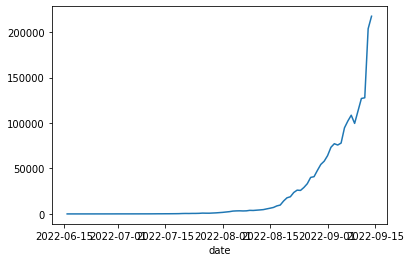

In [105]:
rc.groupby("date").agg({"profit_margin":"prod"}).profit_margin.cumprod().plot()

In [78]:
rc["profit"] = rc.profit_margin.cumprod()

/tmp/ipykernel_4564/105194822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc["profit"] = rc.profit_margin.cumprod()


<AxesSubplot:>

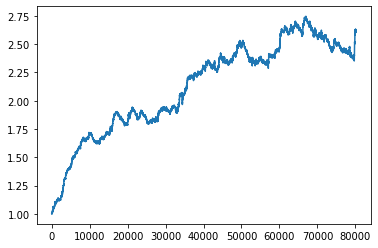

In [79]:
rc.profit.plot()

In [34]:
o1.shape
ohlc = o1[:4,:,:]
vol = o1[-1:,:,:]
ohlc = (ohlc-ohlc_mean)/ohlc_std
vol = (vol-vol_mean)/vol_std
on1 = np.concatenate((ohlc,vol),axis=0).reshape((1,*o1.shape))

In [37]:
torch.Tensor(on1).shape

torch.Size([1, 5, 32, 32])

In [43]:
dg =output.tolist()[0]

In [46]:
aa = dg[0]<dg[2]

In [47]:
aa

True